In [150]:
import os
import pandas as pd
from emobpy import DataBase
from emobpy import Mobility, DataBase, Consumption, HeatInsulation, BEVspecs, Availability, Charging
import shutil

In [151]:
home_path = os.getcwd()
os.makedirs(os.path.join(home_path, "db", "used"), exist_ok=True)
consumption_path = os.path.join(home_path, "db", "consumption")
availability_path = os.path.join(home_path, "db", "availability")
profile_path  = os.path.join(home_path, "db", "profile")

DB_profile = DataBase('db/profile')

#os.chdir("../")
data_path = os.getcwd()

In [152]:
number_profiles = 10000
year = 2020


In [153]:
def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            #elif entry.is_dir():
             #   total += get_dir_size(entry.path)
    total = total / (10**9)
    return total

def create_new_folder(path, profile_consumption_availability = None, used_dir=False):
    if used_dir == False:
        folder_list = [d for d in os.listdir(path)
                   if os.path.isdir(os.path.join(path, d))]
    
        if len(folder_list) == 0:
            new_f = "0"   
        else:
            new_f = str(max(map(int,folder_list)) + 1)
        new_f_path = os.path.join(path, new_f)
        
    else: 
        new_f_path = os.path.join(home_path, "db", "used", profile_consumption_availability)
    
    os.makedirs(new_f_path, exist_ok=True)

    return new_f_path

def transtion_files(source_dir):
    target_dir = create_new_folder(source_dir)

    file_names = [f for f in os.listdir(source_dir)
                       if os.path.isfile(os.path.join(source_dir, f))]

    for file_name in file_names:
        shutil.move(os.path.join(source_dir, file_name), target_dir)
        
def get_folders(path): 
    f_list = [d for d in os.listdir(path)
              if os.path.isdir(os.path.join(path, d))]
    if ".DS_Store" in f_list:
        f_list.remove(".DS_Store")
    
    return f_list

## Step 1: Vehicle mobility time series

In [154]:
from emobpy import Mobility

def mobility_gen (i):
    m = Mobility(config_folder='config_files')
    m.set_params(
             name_prefix="BEV{}".format(i),
             total_hours=2160, 
             time_step_in_hrs=0.5, # 15 minutes
             category="user_defined",
             reference_date=f"01/01/{year}"
            )
    m.set_stats(
            stat_ntrip_path="TripsPerDay.csv",
            stat_dest_path="DepartureDestinationTrip.csv",
            stat_km_duration_path="DistanceDurationTrip.csv",
            )
    m.set_rules(rule_key="user_defined") 
    # see /config_files/rules.yml, it contains a dictionary, whose key must be the same
    # as rule_key. To see all possible rules `from emobpy.constants import RULE; RULE` 
    m.run()
    m.save_profile(folder="db/profile", description='') # save all info in pickle file in 'db' folder

In [ ]:
for i in range(number_profiles):
    
    if get_dir_size(profile_path) >= 1:
        create_new_folder(profile_path)
        transtion_files(profile_path)
        
        
    try: 
        mobility_gen(i)
    except ValueError:
        pass
    
    DB_profile.update()                # This load new files hosted in database folder as result of new generated files

transtion_files(profile_path)

New profile running: BEV0_W13_41b9a
Progress: 2% [2 / 90] days

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Progress: 100% [90 / 90] days
Profile done: BEV0_W13_41b9a
Elapsed time (min): 0.39
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1_W13_6086c
Progress: 100% [90 / 90] days
Profile done: BEV1_W13_6086c
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2_W13_eb2e6
Progress: 100% [90 / 90] days
Profile done: BEV2_W13_eb2e6
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3_W13_5e89e
Progress: 100% [90 / 90] days
Profile done: BEV3_W13_5e89e
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4_W13_9b3f0
Progress: 100% [90 / 90] days
Profile done: BEV4_W13_9b3f0
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5_W13_65c9a
Progress: 100% [

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV39_W13_7ad10
Progress: 100% [90 / 90] days
Profile done: BEV39_W13_7ad10
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV40_W13_ea4c0
Progress: 100% [90 / 90] days
Profile done: BEV40_W13_ea4c0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV41_W13_9cb11
Progress: 100% [90 / 90] days
Profile done: BEV41_W13_9cb11
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV42_W13_b083a
Progress: 100% [90 / 90] days
Profile done: BEV42_W13_b083a
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV43_W13_54a4e
Progress: 100% [90 / 90] days
Profile done: BEV43_W13_54a4e
Elapsed time (min): 0.09
 
See

New profile running: BEV70_W13_546a2
Progress: 100% [90 / 90] days
Profile done: BEV70_W13_546a2
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV71_W13_8e829
Progress: 100% [90 / 90] days
Profile done: BEV71_W13_8e829
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV72_W13_db9a9
Progress: 100% [90 / 90] days
Profile done: BEV72_W13_db9a9
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV73_W13_2da2c
Progress: 100% [90 / 90] days
Profile done: BEV73_W13_2da2c
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV74_W13_0e52c
Progress: 100% [90 / 90] days
Profile done: BEV74_W13_0e52c
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

New profile running: BEV107_W13_a6804
Progress: 100% [90 / 90] days
Profile done: BEV107_W13_a6804
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV108_W13_eb9d7
Progress: 100% [90 / 90] days
Profile done: BEV108_W13_eb9d7
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV109_W13_4f5c2
Progress: 30% [27 / 90] days    Day 27 'select_tour' method in loop Nr. 100. See log file BEV109_W13_4f5c2
       last_trip_to home                  0.53 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 27
Progress: 100% [90 / 90] days
Profile done: BEV109_W13_4f5c2
Elapsed time (min): 0.21
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV110_W13_5c221
Progress: 100% [90 / 90] days
Profile done: BEV110_W13_5c221
Elapsed tim

Progress: 100% [90 / 90] days
Profile done: BEV142_W13_48963
Elapsed time (min): 0.19
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV143_W13_792e0
Progress: 100% [90 / 90] days
Profile done: BEV143_W13_792e0
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV144_W13_16f0b
Progress: 100% [90 / 90] days
Profile done: BEV144_W13_16f0b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV145_W13_512b6
Progress: 13% [12 / 90] days    Day 12 'select_tour' method in loop Nr. 100. See log file BEV145_W13_512b6
       last_trip_to home                  0.37 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.33 uncompliance rate (last 30 iter)
  Tour done: Day 12
Progress: 47% [43 / 90] days    Day 43 'select_tour' method in loop Nr. 100. See log file BEV145_W13_512b6
    

Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV210_W13_1975b
Progress: 100% [90 / 90] days
Profile done: BEV210_W13_1975b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV211_W13_fe98d
Progress: 100% [90 / 90] days
Profile done: BEV211_W13_fe98d
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV212_W13_78c03
Progress: 48% [44 / 90] days    Day 44 'select_tour' method in loop Nr. 100. See log file BEV212_W13_78c03
       last_trip_to home                   0.5 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 44
Progress: 100% [90 / 90] days
Profile done: BEV212_W13_78c03
Elapsed time (min): 0.22
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profi

Progress: 100% [90 / 90] days
Profile done: BEV243_W13_8d98e
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV244_W13_4f7f2
Progress: 100% [90 / 90] days
Profile done: BEV244_W13_4f7f2
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV245_W13_62ceb
Progress: 100% [90 / 90] days
Profile done: BEV245_W13_62ceb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV246_W13_26541
Progress: 100% [90 / 90] days
Profile done: BEV246_W13_26541
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV247_W13_cddb4
Progress: 98% [89 / 90] days
Profile done: BEV247_W13_cddb4
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV248_W13_c8a

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV315_W13_cbfbb
Progress: 100% [90 / 90] days
Profile done: BEV315_W13_cbfbb
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV316_W13_3d3aa
Progress: 100% [90 / 90] days
Profile done: BEV316_W13_3d3aa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV317_W13_1244b
Progress: 100% [90 / 90] days
Profile done: BEV317_W13_1244b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV318_W13_bb998
Progress: 100% [90 / 90] days
Profile done: BEV318_W13_bb998
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV319_W13_8aee4
Progress: 100% [90 / 90] days
Profile done: BEV319_W13_8aee4
Elapsed time (min): 0

New profile running: BEV354_W13_f0bbc
Progress: 100% [90 / 90] days
Profile done: BEV354_W13_f0bbc
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV355_W13_59e72
Progress: 100% [90 / 90] days
Profile done: BEV355_W13_59e72
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV356_W13_18f8a
Progress: 100% [90 / 90] days
Profile done: BEV356_W13_18f8a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV357_W13_cf845
Progress: 56% [51 / 90] days    Day 51 'select_tour' method in loop Nr. 100. See log file BEV357_W13_cf845
       last_trip_to home                   0.50 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 51
Progress: 100% [90 / 90] days
Profile done: BEV357_W13_cf845
Elapsed tim

Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV419_W13_64547
Progress: 23% [21 / 90] days    Day 21 'select_tour' method in loop Nr. 100. See log file BEV419_W13_64547
       overall_min_or_max_time_at home    0.5 uncompliance rate (last 30 iter)
       last_trip_to home                  0.4 uncompliance rate (last 30 iter)
  Tour done: Day 21
Progress: 90% [81 / 90] days    Day 81 'select_tour' method in loop Nr. 100. See log file BEV419_W13_64547
       last_trip_to home                   0.33 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 81
Progress: 100% [90 / 90] days
Profile done: BEV419_W13_64547
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV420_W13_d2e57
Progress: 100% [90 / 90] days
Profile done: BEV420_W13_d2e57
Elapsed time (min): 0.12

New profile running: BEV451_W13_ecd27
Progress: 100% [90 / 90] days
Profile done: BEV451_W13_ecd27
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV452_W13_d635c
Progress: 100% [90 / 90] days
Profile done: BEV452_W13_d635c
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV453_W13_ddc58
Progress: 100% [90 / 90] days
Profile done: BEV453_W13_ddc58
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV454_W13_2109b
Progress: 100% [90 / 90] days
Profile done: BEV454_W13_2109b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV455_W13_ad804
Progress: 100% [90 / 90] days
New profile running: BEV456_W13_2e83c
Progress: 100% [90 / 90] days
Profile done: BEV456_W13_2e83c
Elapsed time (min): 0.1
 
See 

Progress: 100% [90 / 90] days
Profile done: BEV491_W13_989c6
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV492_W13_4059b
Progress: 98% [89 / 90] days
Profile done: BEV492_W13_4059b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV493_W13_ee3f0
Progress: 100% [90 / 90] days
Profile done: BEV493_W13_ee3f0
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV494_W13_25117
Progress: 100% [90 / 90] days
Profile done: BEV494_W13_25117
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV495_W13_51027
Progress: 100% [90 / 90] days
Profile done: BEV495_W13_51027
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV496_W13_3e8eb

New profile running: BEV528_W13_76685
Progress: 100% [90 / 90] days
Profile done: BEV528_W13_76685
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV529_W13_57c84
Progress: 100% [90 / 90] days
Profile done: BEV529_W13_57c84
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV530_W13_406a0
Progress: 82% [74 / 90] days    Day 74 'select_tour' method in loop Nr. 100. See log file BEV530_W13_406a0
       last_trip_to home                    0.27 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 74
Progress: 100% [90 / 90] days
Profile done: BEV530_W13_406a0
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV531_W13_34e7b
Progress: 100% [90 / 90] days
Profile done: BEV531_W13_34e7b
Elapsed 

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV565_W13_b4fb9
Progress: 100% [90 / 90] days
Profile done: BEV565_W13_b4fb9
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV566_W13_9f66a
Progress: 67% [61 / 90] days    Day 61 'select_tour' method in loop Nr. 100. See log file BEV566_W13_9f66a
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 61
Progress: 100% [90 / 90] days
Profile done: BEV566_W13_9f66a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV567_W13_5d305
Progress: 98% [89 / 90] days
Profile done: BEV567_W13_5d305
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV568_W13_4

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV599_W13_93351
Progress: 100% [90 / 90] days
Profile done: BEV599_W13_93351
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV600_W13_53075
Progress: 100% [90 / 90] days
Profile done: BEV600_W13_53075
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV601_W13_3a007
Progress: 100% [90 / 90] days
Profile done: BEV601_W13_3a007
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV602_W13_ae3bb
Progress: 100% [90 / 90] days
Profile done: BEV602_W13_ae3bb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV603_W13_f5f30
Progress: 100% [90 / 90] days
Profile done: BEV603_W13_f5f

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV637_W13_7ed82
Progress: 100% [90 / 90] days
Profile done: BEV637_W13_7ed82
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV638_W13_bb264
Progress: 93% [84 / 90] days    Day 84 'select_tour' method in loop Nr. 100. See log file BEV638_W13_bb264
       last_trip_to home                  0.57 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.10 uncompliance rate (last 30 iter)
  Tour done: Day 84
Progress: 100% [90 / 90] days
Profile done: BEV638_W13_bb264
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV639_W13_cc49e
Progress: 100% [90 / 90] days
Profile done: BEV639_W13_cc49e
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profi

       last_trip_to home                   0.30 uncompliance rate (last 30 iter)
  Tour done: Day 53
Progress: 100% [90 / 90] days
Profile done: BEV668_W13_be3d2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV669_W13_9f7fd
Progress: 100% [90 / 90] days
Profile done: BEV669_W13_9f7fd
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV670_W13_3bc49
Progress: 100% [90 / 90] days
Profile done: BEV670_W13_3bc49
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV671_W13_02c42
Progress: 100% [90 / 90] days
Profile done: BEV671_W13_02c42
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV672_W13_5cd41
Progress: 100% [90 / 90] days
Profile done: BEV672_W13_5cd41
Elapsed time (min): 0.13
 
See Log f

Progress: 100% [90 / 90] days
Profile done: BEV707_W13_c3678
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV708_W13_591ea
Progress: 100% [90 / 90] days
Profile done: BEV708_W13_591ea
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV709_W13_12949
Progress: 100% [90 / 90] days
Profile done: BEV709_W13_12949
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV710_W13_b700a
Progress: 100% [90 / 90] days
Profile done: BEV710_W13_b700a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV711_W13_11dde
Progress: 100% [90 / 90] days
Profile done: BEV711_W13_11dde
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV712_W13_db

Progress: 100% [90 / 90] days
Profile done: BEV745_W13_8b0dd
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV746_W13_21f17
Progress: 100% [90 / 90] days
Profile done: BEV746_W13_21f17
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV747_W13_875bb
Progress: 100% [90 / 90] days
Profile done: BEV747_W13_875bb
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV748_W13_1b06e
Progress: 100% [90 / 90] days
Profile done: BEV748_W13_1b06e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV749_W13_0086f
Progress: 100% [90 / 90] days
Profile done: BEV749_W13_0086f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV750_W13_508

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV781_W13_89787
Progress: 100% [90 / 90] days
Profile done: BEV781_W13_89787
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV782_W13_07e83
Progress: 100% [90 / 90] days
Profile done: BEV782_W13_07e83
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV783_W13_3fd08
Progress: 100% [90 / 90] days
Profile done: BEV783_W13_3fd08
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV784_W13_e8f0c
Progress: 100% [90 / 90] days
Profile done: BEV784_W13_e8f0c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV785_W13_35851
Progress: 100% [90 / 90] days
Profile done: BEV785_W13_35851
Elapsed time (min): 0.

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV819_W13_72998
Progress: 100% [90 / 90] days
Profile done: BEV819_W13_72998
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV820_W13_35831
Progress: 100% [90 / 90] days
Profile done: BEV820_W13_35831
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV821_W13_20e06
Progress: 55% [50 / 90] days    Day 50 'select_tour' method in loop Nr. 100. See log file BEV821_W13_20e06
       last_trip_to home                   0.5 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 50
Progress: 100% [90 / 90] days
Profile done: BEV821_W13_20e06
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV822_W13_1

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV857_W13_7dfd0
Progress: 100% [90 / 90] days
Profile done: BEV857_W13_7dfd0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV858_W13_a8bba
Progress: 100% [90 / 90] days
Profile done: BEV858_W13_a8bba
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV859_W13_69a30
Progress: 100% [90 / 90] days
Profile done: BEV859_W13_69a30
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV860_W13_82a85
Progress: 100% [90 / 90] days
Profile done: BEV860_W13_82a85
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV861_W13_b712b
Progress: 100% [90 / 90] days
Profile done: BEV861_W13_b712b
Elapsed time (min): 0.0

New profile running: BEV921_W13_c2528
Progress: 40% [36 / 90] days    Day 36 'select_tour' method in loop Nr. 100. See log file BEV921_W13_c2528
       last_trip_to home                   0.60 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 36
Progress: 100% [90 / 90] days
Profile done: BEV921_W13_c2528
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV922_W13_0219f
Progress: 100% [90 / 90] days
Profile done: BEV922_W13_0219f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV923_W13_4cc3b
Progress: 100% [90 / 90] days
Profile done: BEV923_W13_4cc3b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV924_W13_21bb3
Progress: 100% [90 / 90] days
Profile done: BEV924_W13_21bb3
Elapsed ti

Progress: 100% [90 / 90] days
Profile done: BEV956_W13_03f4b
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV957_W13_e6955
Progress: 100% [90 / 90] days
Profile done: BEV957_W13_e6955
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV958_W13_e8a04
Progress: 10% [9 / 90] days    Day 9 'select_tour' method in loop Nr. 100. See log file BEV958_W13_e8a04
       last_trip_to home                  0.57 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.33 uncompliance rate (last 30 iter)
  Tour done: Day 9
Progress: 100% [90 / 90] days
Profile done: BEV958_W13_e8a04
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV959_W13_68017
Progress: 100% [90 / 90] days
Profile done: BEV959_W13_68017
Elapsed time (min): 0.11
 
See Log files
/Users/Jarus

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1028_W13_91c95
Progress: 100% [90 / 90] days
Profile done: BEV1028_W13_91c95
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1029_W13_d81c9
Progress: 28% [26 / 90] days    Day 26 'select_tour' method in loop Nr. 100. See log file BEV1029_W13_d81c9
       last_trip_to home                  0.5 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 26
Progress: 100% [90 / 90] days
Profile done: BEV1029_W13_d81c9
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1030_W13_fdfb7
Progress: 100% [90 / 90] days
Profile done: BEV1030_W13_fdfb7
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1063_W13_e790b
Progress: 100% [90 / 90] days
Profile done: BEV1063_W13_e790b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1064_W13_067e9
Progress: 78% [71 / 90] days    Day 71 'select_tour' method in loop Nr. 100. See log file BEV1064_W13_067e9
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
    Day 71 'select_tour' method in loop Nr. 300. See log file BEV1064_W13_067e9
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 71
Progress: 100% [90 / 90] days
Profile done: BEV1064_W13_067e9
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1095_W13_fced7
Progress: 100% [90 / 90] days
Profile done: BEV1095_W13_fced7
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1096_W13_ccf86
Progress: 100% [90 / 90] days
Profile done: BEV1096_W13_ccf86
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1097_W13_9875e
Progress: 100% [90 / 90] days
Profile done: BEV1097_W13_9875e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1098_W13_3935e
Progress: 100% [90 / 90] days
Profile done: BEV1098_W13_3935e
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1099_W13_431ec
Progress: 100% [90 / 90] days
Profile done: BEV1099_W13_431ec
Elapsed time

New profile running: BEV1167_W13_3997d
Progress: 100% [90 / 90] days
Profile done: BEV1167_W13_3997d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1168_W13_ddf93
Progress: 100% [90 / 90] days
Profile done: BEV1168_W13_ddf93
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1169_W13_4955b
Progress: 100% [90 / 90] days
Profile done: BEV1169_W13_4955b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1170_W13_73cac
Progress: 100% [90 / 90] days
Profile done: BEV1170_W13_73cac
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1171_W13_bad70
Progress: 100% [90 / 90] days
Profile done: BEV1171_W13_bad70
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

  Tour done: Day 61
Progress: 100% [90 / 90] days
Profile done: BEV1199_W13_3a559
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1200_W13_47f00
Progress: 100% [90 / 90] days
Profile done: BEV1200_W13_47f00
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1201_W13_4d5f1
Progress: 100% [90 / 90] days
Profile done: BEV1201_W13_4d5f1
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1202_W13_f267c
Progress: 100% [90 / 90] days
Profile done: BEV1202_W13_f267c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1203_W13_8002f
Progress: 100% [90 / 90] days
Profile done: BEV1203_W13_8002f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1233_W13_afab7
Progress: 100% [90 / 90] days
Profile done: BEV1233_W13_afab7
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1234_W13_6d77c
Progress: 100% [90 / 90] days
Profile done: BEV1234_W13_6d77c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1235_W13_a84d8
Progress: 100% [90 / 90] days
Profile done: BEV1235_W13_a84d8
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1236_W13_8a55e
Progress: 100% [90 / 90] days
Profile done: BEV1236_W13_8a55e
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1237_W13_2b08b
Progress: 100% [90 / 90] days
Profile done: BEV

See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1269_W13_c7c5e
Progress: 100% [90 / 90] days
Profile done: BEV1269_W13_c7c5e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1270_W13_b458b
Progress: 66% [60 / 90] days    Day 60 'select_tour' method in loop Nr. 100. See log file BEV1270_W13_b458b
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 60
Progress: 100% [90 / 90] days
Profile done: BEV1270_W13_b458b
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1271_W13_d7b11
Progress: 100% [90 / 90] days
Profile done: BEV1271_W13_d7b11
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV127

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1304_W13_1bd56
Progress: 100% [90 / 90] days
Profile done: BEV1304_W13_1bd56
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1305_W13_8481e
Progress: 98% [89 / 90] days
Profile done: BEV1305_W13_8481e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1306_W13_97d19
Progress: 98% [89 / 90] days
Profile done: BEV1306_W13_97d19
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1307_W13_801a5
Progress: 100% [90 / 90] days
Profile done: BEV1307_W13_801a5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1308_W13_67735
Progress: 100% [90 / 90] days
Profile done: BEV130

  Tour done: Day 48
Progress: 100% [90 / 90] days
Profile done: BEV1337_W13_312e9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1338_W13_cf4d7
Progress: 100% [90 / 90] days
Profile done: BEV1338_W13_cf4d7
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1339_W13_690ea
Progress: 100% [90 / 90] days
Profile done: BEV1339_W13_690ea
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1340_W13_c9787
Progress: 100% [90 / 90] days
Profile done: BEV1340_W13_c9787
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1341_W13_69a60
Progress: 100% [90 / 90] days
Profile done: BEV1341_W13_69a60
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1371_W13_30f48
Progress: 100% [90 / 90] days
Profile done: BEV1371_W13_30f48
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1372_W13_1669a
Progress: 100% [90 / 90] days
Profile done: BEV1372_W13_1669a
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1373_W13_cf58d
Progress: 100% [90 / 90] days
Profile done: BEV1373_W13_cf58d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1374_W13_25b15
Progress: 100% [90 / 90] days
Profile done: BEV1374_W13_25b15
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1375_W13_0994b
Progress: 75% [68 / 90] days    Day 68 'select_t

Progress: 86% [78 / 90] days    Day 78 'select_tour' method in loop Nr. 100. See log file BEV1408_W13_26f95
       last_trip_to home                   0.67 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 78
Progress: 98% [89 / 90] days
Profile done: BEV1408_W13_26f95
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1409_W13_73a71
Progress: 100% [90 / 90] days
Profile done: BEV1409_W13_73a71
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1410_W13_52d05
Progress: 100% [90 / 90] days
Profile done: BEV1410_W13_52d05
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1411_W13_5d303
Progress: 100% [90 / 90] days
Profile done: BEV1411_W13_5d303
Elapsed time (min): 0.11
 
See Log files

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1442_W13_4e468
Progress: 100% [90 / 90] days
Profile done: BEV1442_W13_4e468
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1443_W13_7ce31
Progress: 100% [90 / 90] days
Profile done: BEV1443_W13_7ce31
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1444_W13_ecfa7
Progress: 37% [34 / 90] days    Day 34 'select_tour' method in loop Nr. 100. See log file BEV1444_W13_ecfa7
       last_trip_to home                   0.63 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 34
Progress: 100% [90 / 90] days
Profile done: BEV1444_W13_ecfa7
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1474_W13_cbb45
Progress: 100% [90 / 90] days
Profile done: BEV1474_W13_cbb45
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1475_W13_1e99a
Progress: 100% [90 / 90] days
Profile done: BEV1475_W13_1e99a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1476_W13_7114d
Progress: 100% [90 / 90] days
Profile done: BEV1476_W13_7114d
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1477_W13_fef7d
Progress: 10% [9 / 90] days    Day 9 'select_tour' method in loop Nr. 100. See log file BEV1477_W13_fef7d
       last_trip_to home                  0.53 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour do

New profile running: BEV1507_W13_a1f17
Progress: 53% [48 / 90] days    Day 48 'select_tour' method in loop Nr. 100. See log file BEV1507_W13_a1f17
       last_trip_to home                     0.37 uncompliance rate (last 30 iter)
       min_or_max_state_duration shopping    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 48
Progress: 100% [90 / 90] days
Profile done: BEV1507_W13_a1f17
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1508_W13_afaec
Progress: 100% [90 / 90] days
Profile done: BEV1508_W13_afaec
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1509_W13_c6194
Progress: 100% [90 / 90] days
Profile done: BEV1509_W13_c6194
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1510_W13_a0420
Progress: 100% [90 / 90] days
Profile done: BEV1510_W13_a0

New profile running: BEV1575_W13_0a556
Progress: 94% [85 / 90] days    Day 85 'select_tour' method in loop Nr. 100. See log file BEV1575_W13_0a556
       last_trip_to home                  0.53 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.20 uncompliance rate (last 30 iter)
    Day 85 'select_tour' method in loop Nr. 300. See log file BEV1575_W13_0a556
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 85
Progress: 100% [90 / 90] days
Profile done: BEV1575_W13_0a556
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1576_W13_6b3b6
Progress: 100% [90 / 90] days
Profile done: BEV1576_W13_6b3b6
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1577_W13_3cb1c
Progress: 100% [90 / 90] day

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1606_W13_42a97
Progress: 100% [90 / 90] days
Profile done: BEV1606_W13_42a97
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1607_W13_92b6e
Progress: 100% [90 / 90] days
Profile done: BEV1607_W13_92b6e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1608_W13_84078
Progress: 100% [90 / 90] days
Profile done: BEV1608_W13_84078
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1609_W13_91b67
Progress: 100% [90 / 90] days
Profile done: BEV1609_W13_91b67
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1610_W13_dc95e
Progress: 100% [90 / 90] days
Profile done: BEV1610_W13_dc95e
Elapsed time (min): 0.07
 


Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1641_W13_8d6fc
Progress: 98% [89 / 90] days
Profile done: BEV1641_W13_8d6fc
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1642_W13_ecf98
Progress: 100% [90 / 90] days
Profile done: BEV1642_W13_ecf98
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1643_W13_eaf41
Progress: 100% [90 / 90] days
Profile done: BEV1643_W13_eaf41
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1644_W13_0e112
Progress: 100% [90 / 90] days
Profile done: BEV1644_W13_0e112
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1645_W13_d170b
Progress: 100% [90 / 90] days
Profile done: BEV1

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1680_W13_3f145
Progress: 100% [90 / 90] days
Profile done: BEV1680_W13_3f145
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1681_W13_28423
Progress: 100% [90 / 90] days
Profile done: BEV1681_W13_28423
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1682_W13_3de73
Progress: 100% [90 / 90] days
Profile done: BEV1682_W13_3de73
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1683_W13_f864d
Progress: 100% [90 / 90] days
Profile done: BEV1683_W13_f864d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1684_W13_dab2d
Progress: 100% [90 / 90] days
Profile done: BEV

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1716_W13_b016e
Progress: 100% [90 / 90] days
Profile done: BEV1716_W13_b016e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1717_W13_07f3e
Progress: 100% [90 / 90] days
Profile done: BEV1717_W13_07f3e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1718_W13_35f5d
Progress: 100% [90 / 90] days
Profile done: BEV1718_W13_35f5d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1719_W13_cebc6
Progress: 100% [90 / 90] days
Profile done: BEV1719_W13_cebc6
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1720_W13_2f285
Progress: 100% [90 / 90] days
Profile done: BEV1720_W13_2f285
Elapsed time

New profile running: BEV1754_W13_71061
Progress: 100% [90 / 90] days
Profile done: BEV1754_W13_71061
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1755_W13_25f8e
Progress: 100% [90 / 90] days
Profile done: BEV1755_W13_25f8e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1756_W13_8d9d2
Progress: 100% [90 / 90] days
Profile done: BEV1756_W13_8d9d2
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1757_W13_af2f0
Progress: 100% [90 / 90] days
Profile done: BEV1757_W13_af2f0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1758_W13_72695
Progress: 100% [90 / 90] days
Profile done: BEV1758_W13_72695
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1792_W13_9e3fe
Progress: 100% [90 / 90] days
Profile done: BEV1792_W13_9e3fe
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1793_W13_1f436
Progress: 100% [90 / 90] days
Profile done: BEV1793_W13_1f436
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1794_W13_285ff
Progress: 43% [39 / 90] days    Day 39 'select_tour' method in loop Nr. 100. See log file BEV1794_W13_285ff
       last_trip_to home                    0.43 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 39
Progress: 100% [90 / 90] days
Profile done: BEV1794_W13_285ff
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: B

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1824_W13_8a48d
Progress: 100% [90 / 90] days
Profile done: BEV1824_W13_8a48d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1825_W13_2d365
Progress: 100% [90 / 90] days
Profile done: BEV1825_W13_2d365
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1826_W13_ea12f
Progress: 100% [90 / 90] days
Profile done: BEV1826_W13_ea12f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1827_W13_b10a5
Progress: 100% [90 / 90] days
Profile done: BEV1827_W13_b10a5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1828_W13_9254c
Progress: 100% [90 / 90] days
Profile done: BEV1828_W13_9254c
Elapsed time (min): 0.08
 


New profile running: BEV1860_W13_86f79
Progress: 100% [90 / 90] days
Profile done: BEV1860_W13_86f79
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1861_W13_b50c4
Progress: 87% [79 / 90] days    Day 79 'select_tour' method in loop Nr. 100. See log file BEV1861_W13_b50c4
       last_trip_to home                     0.40 uncompliance rate (last 30 iter)
       min_or_max_state_duration shopping    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 79
Progress: 93% [84 / 90] days    Day 84 'select_tour' method in loop Nr. 100. See log file BEV1861_W13_b50c4
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 84
Progress: 100% [90 / 90] days
Profile done: BEV1861_W13_b50c4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile 

Progress: 78% [71 / 90] days    Day 71 'select_tour' method in loop Nr. 100. See log file BEV1929_W13_7a390
       last_trip_to home                  0.5 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.3 uncompliance rate (last 30 iter)
  Tour done: Day 71
Progress: 100% [90 / 90] days
Profile done: BEV1929_W13_7a390
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1930_W13_80dfc
Progress: 100% [90 / 90] days
Profile done: BEV1930_W13_80dfc
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1931_W13_12d78
Progress: 12% [11 / 90] days    Day 11 'select_tour' method in loop Nr. 100. See log file BEV1931_W13_12d78
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 11
Progress: 100% [90 

Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1963_W13_fddce
Progress: 44% [40 / 90] days    Day 40 'select_tour' method in loop Nr. 100. See log file BEV1963_W13_fddce
       last_trip_to home                  0.43 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 40
Progress: 100% [90 / 90] days
Profile done: BEV1963_W13_fddce
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1964_W13_25a3e
Progress: 100% [90 / 90] days
Profile done: BEV1964_W13_25a3e
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1965_W13_1af81
Progress: 100% [90 / 90] days
Profile done: BEV1965_W13_1af81
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
Ne

       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 71
Progress: 100% [90 / 90] days
Profile done: BEV1994_W13_c80aa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1995_W13_17bab
Progress: 100% [90 / 90] days
Profile done: BEV1995_W13_17bab
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1996_W13_828ff
Progress: 5% [5 / 90] days    Day 5 'select_tour' method in loop Nr. 100. See log file BEV1996_W13_828ff
       last_trip_to home                  0.43 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.33 uncompliance rate (last 30 iter)
  Tour done: Day 5
Progress: 98% [89 / 90] days    Day 89 'select_tour' method in loop Nr. 100. See log file BEV1996_W13_828ff
       last_trip_to hom

New profile running: BEV2029_W13_9336e
Progress: 100% [90 / 90] days
Profile done: BEV2029_W13_9336e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2030_W13_64ce9
Progress: 100% [90 / 90] days
Profile done: BEV2030_W13_64ce9
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2031_W13_3ea9f
Progress: 100% [90 / 90] days
Profile done: BEV2031_W13_3ea9f
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2032_W13_f4bd1
Progress: 100% [90 / 90] days
Profile done: BEV2032_W13_f4bd1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2033_W13_17d7f
Progress: 100% [90 / 90] days
Profile done: BEV2033_W13_17d7f
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2067_W13_54f90
Progress: 100% [90 / 90] days
Profile done: BEV2067_W13_54f90
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2068_W13_756a2
Progress: 100% [90 / 90] days
Profile done: BEV2068_W13_756a2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2069_W13_13507
Progress: 100% [90 / 90] days
Profile done: BEV2069_W13_13507
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2070_W13_e246d
Progress: 100% [90 / 90] days
Profile done: BEV2070_W13_e246d
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2071_W13_741ce
Progress: 100% [90 / 90] days
Profile done: BEV2071_W13_741ce
Elapsed ti

New profile running: BEV2103_W13_00120
Progress: 22% [20 / 90] days    Day 20 'select_tour' method in loop Nr. 100. See log file BEV2103_W13_00120
       last_trip_to home                   0.63 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.10 uncompliance rate (last 30 iter)
  Tour done: Day 20
Progress: 100% [90 / 90] days
Profile done: BEV2103_W13_00120
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2104_W13_6ee75
Progress: 100% [90 / 90] days
Profile done: BEV2104_W13_6ee75
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2105_W13_e9125
Progress: 100% [90 / 90] days
Profile done: BEV2105_W13_e9125
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2106_W13_013ff
Progress: 100% [90 / 90] days
New profile running: BEV2107_W13_

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2175_W13_71301
Progress: 100% [90 / 90] days
Profile done: BEV2175_W13_71301
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2176_W13_4c71f
Progress: 100% [90 / 90] days
Profile done: BEV2176_W13_4c71f
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2177_W13_49f66
Progress: 100% [90 / 90] days
Profile done: BEV2177_W13_49f66
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2178_W13_f67e3
Progress: 100% [90 / 90] days
Profile done: BEV2178_W13_f67e3
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2179_W13_3e6a9
Progress: 100% [90 / 90] days
Profile done: BEV2

  Tour done: Day 13
Progress: 100% [90 / 90] days
Profile done: BEV2208_W13_877f4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2209_W13_ef4a9
Progress: 100% [90 / 90] days
Profile done: BEV2209_W13_ef4a9
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2210_W13_5bee1
Progress: 100% [90 / 90] days
Profile done: BEV2210_W13_5bee1
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2211_W13_d354b
Progress: 100% [90 / 90] days
Profile done: BEV2211_W13_d354b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2212_W13_ca005
Progress: 100% [90 / 90] days
Profile done: BEV2212_W13_ca005
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

Progress: 100% [90 / 90] days
Profile done: BEV2280_W13_f4ecc
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2281_W13_ee91e
Progress: 100% [90 / 90] days
Profile done: BEV2281_W13_ee91e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2282_W13_4de36
Progress: 100% [90 / 90] days
Profile done: BEV2282_W13_4de36
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2283_W13_b1031
Progress: 12% [11 / 90] days    Day 11 'select_tour' method in loop Nr. 100. See log file BEV2283_W13_b1031
       last_trip_to home                    0.33 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 11
Progress: 100% [90 / 90] days
Profile done: BEV2283_W13_b1031
Elapsed time (min): 0.14
 
See Log fi

       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 75
Progress: 100% [90 / 90] days
Profile done: BEV2315_W13_a4b1b
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2316_W13_f1886
Progress: 15% [14 / 90] days    Day 14 'select_tour' method in loop Nr. 100. See log file BEV2316_W13_f1886
       last_trip_to home                   0.4 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 14
Progress: 100% [90 / 90] days
Profile done: BEV2316_W13_f1886
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2317_W13_da95e
Progress: 100% [90 / 90] days
Profile done: BEV2317_W13_da95e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Docume

Progress: 100% [90 / 90] days
Profile done: BEV2385_W13_afeb9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2386_W13_d868d
Progress: 100% [90 / 90] days
Profile done: BEV2386_W13_d868d
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2387_W13_26d4e
Progress: 100% [90 / 90] days
Profile done: BEV2387_W13_26d4e
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2388_W13_42888
Progress: 100% [90 / 90] days
Profile done: BEV2388_W13_42888
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2389_W13_4178f
Progress: 100% [90 / 90] days
Profile done: BEV2389_W13_4178f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

Progress: 100% [90 / 90] days
Profile done: BEV2420_W13_0cc07
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2421_W13_e8568
Progress: 100% [90 / 90] days
Profile done: BEV2421_W13_e8568
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2422_W13_fb65b
Progress: 100% [90 / 90] days
Profile done: BEV2422_W13_fb65b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2423_W13_ff477
Progress: 100% [90 / 90] days
Profile done: BEV2423_W13_ff477
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2424_W13_6988d
Progress: 100% [90 / 90] days
Profile done: BEV2424_W13_6988d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

Progress: 100% [90 / 90] days
Profile done: BEV2452_W13_a1a25
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2453_W13_5eeb9
Progress: 100% [90 / 90] days
Profile done: BEV2453_W13_5eeb9
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2454_W13_18816
Progress: 100% [90 / 90] days
Profile done: BEV2454_W13_18816
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2455_W13_42b90
Progress: 100% [90 / 90] days
Profile done: BEV2455_W13_42b90
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2456_W13_c3ae8
Progress: 100% [90 / 90] days
Profile done: BEV2456_W13_c3ae8
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2486_W13_ffea8
Progress: 100% [90 / 90] days
Profile done: BEV2486_W13_ffea8
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2487_W13_0bb4c
Progress: 100% [90 / 90] days
Profile done: BEV2487_W13_0bb4c
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2488_W13_71349
Progress: 100% [90 / 90] days
Profile done: BEV2488_W13_71349
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2489_W13_9c2dd
Progress: 100% [90 / 90] days
Profile done: BEV2489_W13_9c2dd
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2490_W13_db158
Progress: 100% [90 / 90] days
Profile done: BEV2

Progress: 98% [89 / 90] days
Profile done: BEV2520_W13_dde54
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2521_W13_242ef
Progress: 100% [90 / 90] days
Profile done: BEV2521_W13_242ef
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2522_W13_7a2fe
Progress: 100% [90 / 90] days
Profile done: BEV2522_W13_7a2fe
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2523_W13_b61c0
Progress: 100% [90 / 90] days
Profile done: BEV2523_W13_b61c0
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2524_W13_ef227
Progress: 100% [90 / 90] days
Profile done: BEV2524_W13_ef227
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV25

New profile running: BEV2589_W13_14936
Progress: 100% [90 / 90] days
Profile done: BEV2589_W13_14936
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2590_W13_555f4
Progress: 100% [90 / 90] days
Profile done: BEV2590_W13_555f4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2591_W13_84545
Progress: 100% [90 / 90] days
Profile done: BEV2591_W13_84545
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2592_W13_623cf
Progress: 100% [90 / 90] days
Profile done: BEV2592_W13_623cf
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2593_W13_e3b3d
Progress: 100% [90 / 90] days
Profile done: BEV2593_W13_e3b3d
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

Progress: 100% [90 / 90] days
Profile done: BEV2666_W13_233d3
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2667_W13_ffa49
Progress: 100% [90 / 90] days
Profile done: BEV2667_W13_ffa49
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2668_W13_7f1eb
Progress: 100% [90 / 90] days
Profile done: BEV2668_W13_7f1eb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2669_W13_6b658
Progress: 100% [90 / 90] days
Profile done: BEV2669_W13_6b658
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2670_W13_62b7b
Progress: 100% [90 / 90] days
Profile done: BEV2670_W13_62b7b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 28
Progress: 100% [90 / 90] days
Profile done: BEV2705_W13_f5687
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2706_W13_df1df
Progress: 100% [90 / 90] days
Profile done: BEV2706_W13_df1df
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2707_W13_77c32
Progress: 100% [90 / 90] days
Profile done: BEV2707_W13_77c32
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2708_W13_3b49b
Progress: 100% [90 / 90] days
Profile done: BEV2708_W13_3b49b
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2709_W13_76759
Progress: 100% [90 / 90] days
Profile done: BEV2709_W13_76759
Elapsed time (min): 0.09
 


Progress: 100% [90 / 90] days
Profile done: BEV2738_W13_66e17
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2739_W13_ecf99
Progress: 100% [90 / 90] days
Profile done: BEV2739_W13_ecf99
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2740_W13_6be2d
Progress: 100% [90 / 90] days
Profile done: BEV2740_W13_6be2d
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2741_W13_a6f85
Progress: 100% [90 / 90] days
Profile done: BEV2741_W13_a6f85
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2742_W13_90bac
Progress: 100% [90 / 90] days
Profile done: BEV2742_W13_90bac
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2769_W13_15d5f
Progress: 100% [90 / 90] days
Profile done: BEV2769_W13_15d5f
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2770_W13_75da2
Progress: 100% [90 / 90] days
Profile done: BEV2770_W13_75da2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2771_W13_66d3a
Progress: 100% [90 / 90] days
Profile done: BEV2771_W13_66d3a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2772_W13_c684c
Progress: 100% [90 / 90] days
Profile done: BEV2772_W13_c684c
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2773_W13_b20ed
Progress: 100% [90 / 90] days
Profile done: BEV2773_W13_b20ed
Elapsed ti

Progress: 100% [90 / 90] days
Profile done: BEV2806_W13_82398
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2807_W13_54d99
Progress: 98% [89 / 90] days
Profile done: BEV2807_W13_54d99
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2808_W13_37c25
Progress: 100% [90 / 90] days
Profile done: BEV2808_W13_37c25
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2809_W13_bcbc9
Progress: 100% [90 / 90] days
Profile done: BEV2809_W13_bcbc9
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2810_W13_e8032
Progress: 77% [70 / 90] days    Day 70 'select_tour' method in loop Nr. 100. See log file BEV2810_W13_e8032
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
  

New profile running: BEV2841_W13_1896c
Progress: 55% [50 / 90] days    Day 50 'select_tour' method in loop Nr. 100. See log file BEV2841_W13_1896c
       last_trip_to home                  0.37 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 50
Progress: 100% [90 / 90] days
Profile done: BEV2841_W13_1896c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2842_W13_f35a1
Progress: 100% [90 / 90] days
Profile done: BEV2842_W13_f35a1
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2843_W13_ff096
Progress: 100% [90 / 90] days
Profile done: BEV2843_W13_ff096
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2844_W13_2d9c8
Progress: 100% [90 / 90] days
Profile done: BEV2844_W13_2d9c8
El

Progress: 100% [90 / 90] days
Profile done: BEV2877_W13_bc9e7
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2878_W13_6f2ed
Progress: 100% [90 / 90] days
Profile done: BEV2878_W13_6f2ed
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2879_W13_d7dc3
Progress: 100% [90 / 90] days
Profile done: BEV2879_W13_d7dc3
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2880_W13_8bbea
Progress: 100% [90 / 90] days
Profile done: BEV2880_W13_8bbea
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2881_W13_6a364
Progress: 100% [90 / 90] days
Profile done: BEV2881_W13_6a364
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2913_W13_c8513
Progress: 100% [90 / 90] days
Profile done: BEV2913_W13_c8513
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2914_W13_e932d
Progress: 86% [78 / 90] days    Day 78 'select_tour' method in loop Nr. 100. See log file BEV2914_W13_e932d
       last_trip_to home                  0.53 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 78
Progress: 100% [90 / 90] days
Profile done: BEV2914_W13_e932d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2915_W13_79d6f
Progress: 100% [90 / 90] days
Profile done: BEV2915_W13_79d6f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV291

       last_trip_to home                  0.67 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 15
Progress: 100% [90 / 90] days
Profile done: BEV2977_W13_4ec7b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2978_W13_d73fb
Progress: 100% [90 / 90] days
Profile done: BEV2978_W13_d73fb
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2979_W13_e3c05
Progress: 100% [90 / 90] days
Profile done: BEV2979_W13_e3c05
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2980_W13_b1ef3
Progress: 100% [90 / 90] days
Profile done: BEV2980_W13_b1ef3
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2981_W13_e991e
Progress

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3013_W13_ea4e5
Progress: 66% [60 / 90] days    Day 60 'select_tour' method in loop Nr. 100. See log file BEV3013_W13_ea4e5
       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 60
Progress: 98% [89 / 90] days
Profile done: BEV3013_W13_ea4e5
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3014_W13_bd498
Progress: 100% [90 / 90] days
Profile done: BEV3014_W13_bd498
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3015_W13_72248
Progress: 100% [90 / 90] days
Profile done: BEV3015_W13_72248
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log


       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 40
Progress: 100% [90 / 90] days
Profile done: BEV3049_W13_36c38
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3050_W13_5c0f8
Progress: 100% [90 / 90] days
Profile done: BEV3050_W13_5c0f8
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3051_W13_d5929
Progress: 100% [90 / 90] days
Profile done: BEV3051_W13_d5929
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3052_W13_f1f4e
Progress: 100% [90 / 90] days
Profile done: BEV3052_W13_f1f4e
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3053_W13_e4dfb
Progress: 100% [90 / 90] days
Profile done: BEV3053_W13_e4dfb
Elapsed time (min): 0.09


New profile running: BEV3085_W13_6958e
Progress: 100% [90 / 90] days
Profile done: BEV3085_W13_6958e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3086_W13_78f56
Progress: 100% [90 / 90] days
Profile done: BEV3086_W13_78f56
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3087_W13_b107b
Progress: 100% [90 / 90] days
Profile done: BEV3087_W13_b107b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3088_W13_0b82a
Progress: 100% [90 / 90] days
Profile done: BEV3088_W13_0b82a
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3089_W13_f5802
Progress: 35% [32 / 90] days    Day 32 'select_tour' method in loop Nr. 100. See log file BEV3089_W13_f5802
       last_trip_to home                 

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3120_W13_0945c
Progress: 100% [90 / 90] days
Profile done: BEV3120_W13_0945c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3121_W13_cc2e7
Progress: 98% [89 / 90] days
Profile done: BEV3121_W13_cc2e7
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3122_W13_778b2
Progress: 98% [89 / 90] days
Profile done: BEV3122_W13_778b2
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3123_W13_3c0ce
Progress: 100% [90 / 90] days
Profile done: BEV3123_W13_3c0ce
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3124_W13_891fa
Progress: 100% [90 / 90] days
Profile done: BEV3124_W13_891fa
Elapsed time (

  Tour done: Day 8
Progress: 100% [90 / 90] days
Profile done: BEV3156_W13_0e262
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3157_W13_8b089
Progress: 100% [90 / 90] days
Profile done: BEV3157_W13_8b089
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3158_W13_fb56b
Progress: 100% [90 / 90] days
Profile done: BEV3158_W13_fb56b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3159_W13_e34df
Progress: 91% [82 / 90] days    Day 82 'select_tour' method in loop Nr. 100. See log file BEV3159_W13_e34df
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 82
Progress: 100% [90 / 90] days
Profile done: BEV3159_W13_e34df
Elapsed time (min): 

Progress: 100% [90 / 90] days
Profile done: BEV3188_W13_b636b
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3189_W13_08131
Progress: 100% [90 / 90] days
Profile done: BEV3189_W13_08131
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3190_W13_d1fe6
Progress: 100% [90 / 90] days
Profile done: BEV3190_W13_d1fe6
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3191_W13_4215f
Progress: 100% [90 / 90] days
Profile done: BEV3191_W13_4215f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3192_W13_21bef
Progress: 100% [90 / 90] days
Profile done: BEV3192_W13_21bef
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3193

Progress: 100% [90 / 90] days
Profile done: BEV3227_W13_416ad
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3228_W13_bc642
Progress: 100% [90 / 90] days
Profile done: BEV3228_W13_bc642
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3229_W13_aaab8
Progress: 100% [90 / 90] days
Profile done: BEV3229_W13_aaab8
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3230_W13_a9a8c
Progress: 100% [90 / 90] days
Profile done: BEV3230_W13_a9a8c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3231_W13_5ec18
Progress: 98% [89 / 90] days
Profile done: BEV3231_W13_5ec18
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV32

Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3264_W13_dff93
Progress: 100% [90 / 90] days
Profile done: BEV3264_W13_dff93
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3265_W13_85c0b
Progress: 100% [90 / 90] days
Profile done: BEV3265_W13_85c0b
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3266_W13_d5b74
Progress: 100% [90 / 90] days
Profile done: BEV3266_W13_d5b74
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3267_W13_33547
Progress: 12% [11 / 90] days    Day 11 'select_tour' method in loop Nr. 100. See log file BEV3267_W13_33547
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.37 uncompliance r

New profile running: BEV3297_W13_1a164
Progress: 100% [90 / 90] days
Profile done: BEV3297_W13_1a164
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3298_W13_8c68a
Progress: 100% [90 / 90] days
Profile done: BEV3298_W13_8c68a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3299_W13_c2adb
Progress: 100% [90 / 90] days
Profile done: BEV3299_W13_c2adb
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3300_W13_db496
Progress: 100% [90 / 90] days
Profile done: BEV3300_W13_db496
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3301_W13_e114f
Progress: 100% [90 / 90] days
Profile done: BEV3301_W13_e114f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

New profile running: BEV3336_W13_14f1b
Progress: 100% [90 / 90] days
Profile done: BEV3336_W13_14f1b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3337_W13_88b1c
Progress: 100% [90 / 90] days
Profile done: BEV3337_W13_88b1c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3338_W13_be47c
Progress: 100% [90 / 90] days
Profile done: BEV3338_W13_be47c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3339_W13_33278
Progress: 100% [90 / 90] days
Profile done: BEV3339_W13_33278
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3340_W13_ed9b5
Progress: 100% [90 / 90] days
Profile done: BEV3340_W13_ed9b5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

New profile running: BEV3370_W13_7ab12
Progress: 100% [90 / 90] days
Profile done: BEV3370_W13_7ab12
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3371_W13_1bca0
Progress: 100% [90 / 90] days
Profile done: BEV3371_W13_1bca0
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3372_W13_69d38
Progress: 100% [90 / 90] days
Profile done: BEV3372_W13_69d38
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3373_W13_b8543
Progress: 100% [90 / 90] days
Profile done: BEV3373_W13_b8543
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3374_W13_e6c49
Progress: 100% [90 / 90] days
Profile done: BEV3374_W13_e6c49
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log

Progress: 100% [90 / 90] days
Profile done: BEV3406_W13_755f7
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3407_W13_70d8c
Progress: 100% [90 / 90] days
Profile done: BEV3407_W13_70d8c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3408_W13_bd737
Progress: 100% [90 / 90] days
Profile done: BEV3408_W13_bd737
Elapsed time (min): 0.19
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3409_W13_4c717
Progress: 100% [90 / 90] days
Profile done: BEV3409_W13_4c717
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3410_W13_c0a71
Progress: 100% [90 / 90] days
Profile done: BEV3410_W13_c0a71
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3476_W13_d7417
Progress: 100% [90 / 90] days
Profile done: BEV3476_W13_d7417
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3477_W13_ef295
Progress: 100% [90 / 90] days
Profile done: BEV3477_W13_ef295
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3478_W13_27d9d
Progress: 100% [90 / 90] days
Profile done: BEV3478_W13_27d9d
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3479_W13_dfb17
Progress: 100% [90 / 90] days
Profile done: BEV3479_W13_dfb17
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3480_W13_ff9ef
Progress: 100% [90 / 90] days
Profile done: BEV3480_W13_ff9ef
Elapsed time (min): 0.1
 
Se

Progress: 100% [90 / 90] days
Profile done: BEV3552_W13_4a27c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3553_W13_a840c
Progress: 100% [90 / 90] days
Profile done: BEV3553_W13_a840c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3554_W13_a188b
Progress: 100% [90 / 90] days
Profile done: BEV3554_W13_a188b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3555_W13_5d16f
Progress: 100% [90 / 90] days
Profile done: BEV3555_W13_5d16f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3556_W13_86b2f
Progress: 100% [90 / 90] days
Profile done: BEV3556_W13_86b2f
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV35

New profile running: BEV3623_W13_db3f4
Progress: 100% [90 / 90] days
Profile done: BEV3623_W13_db3f4
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3624_W13_c218e
Progress: 100% [90 / 90] days
Profile done: BEV3624_W13_c218e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3625_W13_c3435
Progress: 100% [90 / 90] days
Profile done: BEV3625_W13_c3435
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3626_W13_36305
Progress: 100% [90 / 90] days
Profile done: BEV3626_W13_36305
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3627_W13_c90ea
Progress: 100% [90 / 90] days
Profile done: BEV3627_W13_c90ea
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log

       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 11
Progress: 100% [90 / 90] days
Profile done: BEV3654_W13_45bec
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3655_W13_30284
Progress: 100% [90 / 90] days
Profile done: BEV3655_W13_30284
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3656_W13_abaf9
Progress: 100% [90 / 90] days
Profile done: BEV3656_W13_abaf9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3657_W13_964fc
Progress: 100% [90 / 90] days
Profile done: BEV3657_W13_964fc
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3658_W13_b7603
Progress: 100% [90 / 90] days
Profile done: BEV3658_W13_b7603
Elapsed time (min): 0.13


New profile running: BEV3690_W13_2221c
Progress: 100% [90 / 90] days
Profile done: BEV3690_W13_2221c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3691_W13_2bf1b
Progress: 74% [67 / 90] days    Day 67 'select_tour' method in loop Nr. 100. See log file BEV3691_W13_2bf1b
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.33 uncompliance rate (last 30 iter)
  Tour done: Day 67
Progress: 100% [90 / 90] days
Profile done: BEV3691_W13_2bf1b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3692_W13_d061a
Progress: 100% [90 / 90] days
Profile done: BEV3692_W13_d061a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3693_W13_ebaf1
Progress: 78% [71 / 90] days    Day 71 'select_tour' method in 

New profile running: BEV3723_W13_42565
Progress: 100% [90 / 90] days
New profile running: BEV3724_W13_71ad1
Progress: 100% [90 / 90] days
Profile done: BEV3724_W13_71ad1
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3725_W13_38c2d
Progress: 68% [62 / 90] days    Day 62 'select_tour' method in loop Nr. 100. See log file BEV3725_W13_38c2d
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 62
Progress: 100% [90 / 90] days
Profile done: BEV3725_W13_38c2d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3726_W13_54cf8
Progress: 100% [90 / 90] days
Profile done: BEV3726_W13_54cf8
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3727_W13_21

  Tour done: Day 58
Progress: 100% [90 / 90] days
Profile done: BEV3757_W13_e219c
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3758_W13_d3676
Progress: 100% [90 / 90] days
Profile done: BEV3758_W13_d3676
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3759_W13_91153
Progress: 100% [90 / 90] days
Profile done: BEV3759_W13_91153
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3760_W13_3b429
Progress: 100% [90 / 90] days
Profile done: BEV3760_W13_3b429
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3761_W13_36a58
Progress: 100% [90 / 90] days
Profile done: BEV3761_W13_36a58
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3791_W13_af07b
Progress: 100% [90 / 90] days
Profile done: BEV3791_W13_af07b
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3792_W13_1167c
Progress: 100% [90 / 90] days
Profile done: BEV3792_W13_1167c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3793_W13_7b76c
Progress: 100% [90 / 90] days
Profile done: BEV3793_W13_7b76c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3794_W13_01780
Progress: 100% [90 / 90] days
Profile done: BEV3794_W13_01780
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3795_W13_944e9
Progress: 100% [90 / 90] days
Profile done: BEV3

Progress: 98% [89 / 90] days
Profile done: BEV3828_W13_97dc7
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3829_W13_de724
Progress: 100% [90 / 90] days
Profile done: BEV3829_W13_de724
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3830_W13_5ba6a
Progress: 14% [13 / 90] days    Day 13 'select_tour' method in loop Nr. 100. See log file BEV3830_W13_5ba6a
       last_trip_to home                   0.5 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 13
Progress: 47% [43 / 90] days    Day 43 'select_tour' method in loop Nr. 100. See log file BEV3830_W13_5ba6a
       last_trip_to home                   0.63 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.10 uncompliance rate (last 30 iter)
  Tour done: Day 43
Progress: 100% [90 

See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3859_W13_37922
Progress: 100% [90 / 90] days
Profile done: BEV3859_W13_37922
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3860_W13_65ddb
Progress: 100% [90 / 90] days
Profile done: BEV3860_W13_65ddb
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3861_W13_5d7d9
Progress: 100% [90 / 90] days
Profile done: BEV3861_W13_5d7d9
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3862_W13_16bf1
Progress: 100% [90 / 90] days
Profile done: BEV3862_W13_16bf1
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3863_W13_1ab6b
Progress: 100% [90 / 90] days
Profile done: BEV3863_W13_1ab6b
Elapsed time

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3894_W13_05300
Progress: 100% [90 / 90] days
Profile done: BEV3894_W13_05300
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3895_W13_1821c
Progress: 100% [90 / 90] days
Profile done: BEV3895_W13_1821c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3896_W13_c7c8c
Progress: 91% [82 / 90] days    Day 82 'select_tour' method in loop Nr. 100. See log file BEV3896_W13_c7c8c
       last_trip_to home                 0.67 uncompliance rate (last 30 iter)
       min_or_max_state_duration home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 82
Progress: 100% [90 / 90] days
Profile done: BEV3896_W13_c7c8c
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New 

Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3926_W13_d3009
Progress: 100% [90 / 90] days
Profile done: BEV3926_W13_d3009
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3927_W13_37e19
Progress: 100% [90 / 90] days
Profile done: BEV3927_W13_37e19
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3928_W13_c2ef4
Progress: 64% [58 / 90] days    Day 58 'select_tour' method in loop Nr. 100. See log file BEV3928_W13_c2ef4
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 58
Progress: 70% [63 / 90] days    Day 63 'select_tour' method in loop Nr. 100. See log file BEV3928_W13_c2ef4
       overall_min_or_max_time_at home    0.33 uncompli

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3992_W13_1f04c
Progress: 100% [90 / 90] days
Profile done: BEV3992_W13_1f04c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3993_W13_d5d28
Progress: 66% [60 / 90] days    Day 60 'select_tour' method in loop Nr. 100. See log file BEV3993_W13_d5d28
       equal_state_and_destination home     0.23 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 60
Progress: 100% [90 / 90] days
Profile done: BEV3993_W13_d5d28
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3994_W13_fc1ee
Progress: 100% [90 / 90] days
Profile done: BEV3994_W13_fc1ee
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: B

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4057_W13_60c5e
Progress: 100% [90 / 90] days
Profile done: BEV4057_W13_60c5e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4058_W13_8198b
Progress: 100% [90 / 90] days
Profile done: BEV4058_W13_8198b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4059_W13_2c6cb
Progress: 100% [90 / 90] days
Profile done: BEV4059_W13_2c6cb
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4060_W13_3986e
Progress: 100% [90 / 90] days
Profile done: BEV4060_W13_3986e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4061_W13_ac196
Progress: 100% [90 / 90] days
Profile done: BEV4061_W13_ac196
Elapsed ti

  Tour done: Day 78
Progress: 100% [90 / 90] days
Profile done: BEV4093_W13_7c037
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4094_W13_32309
Progress: 100% [90 / 90] days
Profile done: BEV4094_W13_32309
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4095_W13_c9cc4
Progress: 100% [90 / 90] days
Profile done: BEV4095_W13_c9cc4
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4096_W13_7e5ca
Progress: 100% [90 / 90] days
Profile done: BEV4096_W13_7e5ca
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4097_W13_879fc
Progress: 100% [90 / 90] days
Profile done: BEV4097_W13_879fc
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

  Tour done: Day 8
Progress: 100% [90 / 90] days
Profile done: BEV4128_W13_5f2d1
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4129_W13_fc08d
Progress: 100% [90 / 90] days
Profile done: BEV4129_W13_fc08d
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4130_W13_f2e92
Progress: 100% [90 / 90] days
Profile done: BEV4130_W13_f2e92
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4131_W13_dd8a8
Progress: 100% [90 / 90] days
Profile done: BEV4131_W13_dd8a8
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4132_W13_52ab9
Progress: 100% [90 / 90] days
Profile done: BEV4132_W13_52ab9
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

Progress: 58% [53 / 90] days    Day 53 'select_tour' method in loop Nr. 100. See log file BEV4200_W13_f37e4
       last_trip_to home                    0.50 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 53
Progress: 100% [90 / 90] days
Profile done: BEV4200_W13_f37e4
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4201_W13_5e0e5
Progress: 100% [90 / 90] days
Profile done: BEV4201_W13_5e0e5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4202_W13_30e5c
Progress: 100% [90 / 90] days
Profile done: BEV4202_W13_30e5c
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4203_W13_5197e
Progress: 100% [90 / 90] days
Profile done: BEV4203_W13_5197e
Elapsed time (min): 0.08
 
See Log fi

Progress: 58% [53 / 90] days    Day 53 'select_tour' method in loop Nr. 100. See log file BEV4268_W13_264a7
       last_trip_to home                   0.33 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 53
Progress: 100% [90 / 90] days
Profile done: BEV4268_W13_264a7
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4269_W13_c1c1c
Progress: 100% [90 / 90] days
Profile done: BEV4269_W13_c1c1c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4270_W13_4bfe4
Progress: 100% [90 / 90] days
Profile done: BEV4270_W13_4bfe4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4271_W13_fea4a
Progress: 100% [90 / 90] days
Profile done: BEV4271_W13_fea4a
Elapsed time (min): 0.08
 
See Log files

New profile running: BEV4306_W13_750f8
Progress: 100% [90 / 90] days
Profile done: BEV4306_W13_750f8
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4307_W13_2ee81
Progress: 100% [90 / 90] days
Profile done: BEV4307_W13_2ee81
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4308_W13_22e51
Progress: 100% [90 / 90] days
Profile done: BEV4308_W13_22e51
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4309_W13_17c79
Progress: 100% [90 / 90] days
Profile done: BEV4309_W13_17c79
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4310_W13_abf56
Progress: 100% [90 / 90] days
Profile done: BEV4310_W13_abf56
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

Progress: 100% [90 / 90] days
Profile done: BEV4342_W13_df703
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4343_W13_e1755
Progress: 100% [90 / 90] days
Profile done: BEV4343_W13_e1755
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4344_W13_8c0c0
Progress: 100% [90 / 90] days
Profile done: BEV4344_W13_8c0c0
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4345_W13_e987b
Progress: 100% [90 / 90] days
Profile done: BEV4345_W13_e987b
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4346_W13_bf433
Progress: 100% [90 / 90] days
Profile done: BEV4346_W13_bf433
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

New profile running: BEV4379_W13_53923
Progress: 100% [90 / 90] days
Profile done: BEV4379_W13_53923
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4380_W13_3f924
Progress: 100% [90 / 90] days
Profile done: BEV4380_W13_3f924
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4381_W13_25626
Progress: 100% [90 / 90] days
Profile done: BEV4381_W13_25626
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4382_W13_9db03
Progress: 100% [90 / 90] days
Profile done: BEV4382_W13_9db03
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4383_W13_8015e
Progress: 100% [90 / 90] days
Profile done: BEV4383_W13_8015e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4417_W13_2e155
Progress: 100% [90 / 90] days
Profile done: BEV4417_W13_2e155
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4418_W13_92b9e
Progress: 100% [90 / 90] days
Profile done: BEV4418_W13_92b9e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4419_W13_11ae8
Progress: 100% [90 / 90] days
Profile done: BEV4419_W13_11ae8
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4420_W13_64172
Progress: 100% [90 / 90] days
Profile done: BEV4420_W13_64172
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4421_W13_eda84
Progress: 51% [46 / 90] days    Day 46 'select_tour' method in loop Nr. 

Progress: 100% [90 / 90] days
Profile done: BEV4454_W13_7cb4e
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4455_W13_976aa
Progress: 100% [90 / 90] days
Profile done: BEV4455_W13_976aa
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4456_W13_c4f8d
Progress: 100% [90 / 90] days
Profile done: BEV4456_W13_c4f8d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4457_W13_a4023
Progress: 100% [90 / 90] days
Profile done: BEV4457_W13_a4023
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4458_W13_19674
Progress: 100% [90 / 90] days
Profile done: BEV4458_W13_19674
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4

       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 86
Progress: 100% [90 / 90] days
Profile done: BEV4491_W13_c3c96
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4492_W13_231ef
Progress: 100% [90 / 90] days
Profile done: BEV4492_W13_231ef
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4493_W13_ec414
Progress: 100% [90 / 90] days
Profile done: BEV4493_W13_ec414
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4494_W13_21ca1
Progress: 100% [90 / 90] days
Profile done: BEV4494_W13_21ca1
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4495_W13_315d6
Progress: 100% [90 / 90] days
Profile done: BEV4495_W13_315d6
Elapsed time (min): 0.08
 


/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4530_W13_a8044
Progress: 100% [90 / 90] days
Profile done: BEV4530_W13_a8044
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4531_W13_3a3ef
Progress: 100% [90 / 90] days
Profile done: BEV4531_W13_3a3ef
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4532_W13_81f6a
Progress: 100% [90 / 90] days
Profile done: BEV4532_W13_81f6a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4533_W13_dd2a8
Progress: 100% [90 / 90] days
Profile done: BEV4533_W13_dd2a8
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4534_W13_69983
Progress: 100% [90 / 90] days
Profile done: BEV4534_W13_69983
Elapsed time (min): 0.09
 

Progress: 98% [89 / 90] days
Profile done: BEV4603_W13_f049e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4604_W13_85fbc
Progress: 100% [90 / 90] days
Profile done: BEV4604_W13_85fbc
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4605_W13_ba2ca
Progress: 100% [90 / 90] days
Profile done: BEV4605_W13_ba2ca
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4606_W13_f4a91
Progress: 100% [90 / 90] days
Profile done: BEV4606_W13_f4a91
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4607_W13_d7bfd
Progress: 100% [90 / 90] days
Profile done: BEV4607_W13_d7bfd
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV46

New profile running: BEV4673_W13_cf787
Progress: 100% [90 / 90] days
Profile done: BEV4673_W13_cf787
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4674_W13_ab45d
Progress: 77% [70 / 90] days    Day 70 'select_tour' method in loop Nr. 100. See log file BEV4674_W13_ab45d
       last_trip_to home                  0.60 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 70
Progress: 100% [90 / 90] days
Profile done: BEV4674_W13_ab45d
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4675_W13_22a1a
Progress: 100% [90 / 90] days
Profile done: BEV4675_W13_22a1a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4676_W13_c347a
Progress: 100% [90 / 90] days
Profile done: BEV4676_W13_c347a
Ela

Progress: 100% [90 / 90] days
Profile done: BEV4709_W13_008d1
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4710_W13_c9359
Progress: 100% [90 / 90] days
Profile done: BEV4710_W13_c9359
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4711_W13_4b5ce
Progress: 100% [90 / 90] days
Profile done: BEV4711_W13_4b5ce
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4712_W13_5e4fd
Progress: 100% [90 / 90] days
Profile done: BEV4712_W13_5e4fd
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4713_W13_7daa4
Progress: 100% [90 / 90] days
Profile done: BEV4713_W13_7daa4
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4743_W13_cc953
Progress: 100% [90 / 90] days
Profile done: BEV4743_W13_cc953
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4744_W13_9291e
Progress: 100% [90 / 90] days
Profile done: BEV4744_W13_9291e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4745_W13_5e428
Progress: 100% [90 / 90] days
Profile done: BEV4745_W13_5e428
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4746_W13_31ba4
Progress: 100% [90 / 90] days
Profile done: BEV4746_W13_31ba4
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4747_W13_81786
Progress: 100% [90 / 90] days
Profile done: BEV4

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4814_W13_c9a3f
Progress: 100% [90 / 90] days
Profile done: BEV4814_W13_c9a3f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4815_W13_02b22
Progress: 100% [90 / 90] days
Profile done: BEV4815_W13_02b22
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4816_W13_65e9a
Progress: 100% [90 / 90] days
Profile done: BEV4816_W13_65e9a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4817_W13_1e427
Progress: 100% [90 / 90] days
Profile done: BEV4817_W13_1e427
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4818_W13_71a46
Progress: 100% [90 / 90] days
Profile done: BEV4818_W13_71a46
Elapsed ti

Progress: 100% [90 / 90] days
Profile done: BEV4851_W13_0f60a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4852_W13_add9f
Progress: 100% [90 / 90] days
Profile done: BEV4852_W13_add9f
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4853_W13_8bbcc
Progress: 100% [90 / 90] days
Profile done: BEV4853_W13_8bbcc
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4854_W13_ee557
Progress: 100% [90 / 90] days
Profile done: BEV4854_W13_ee557
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4855_W13_e757e
Progress: 100% [90 / 90] days
Profile done: BEV4855_W13_e757e
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

Progress: 100% [90 / 90] days
Profile done: BEV4883_W13_df327
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4884_W13_9dee2
Progress: 98% [89 / 90] days
Profile done: BEV4884_W13_9dee2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4885_W13_c7142
Progress: 100% [90 / 90] days
Profile done: BEV4885_W13_c7142
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4886_W13_a2d4f
Progress: 100% [90 / 90] days
Profile done: BEV4886_W13_a2d4f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4887_W13_a510d
Progress: 2% [2 / 90] days    Day 2 'select_tour' method in loop Nr. 100. See log file BEV4887_W13_a510d
       last_trip_to home                 0.57 uncompliance rate (last 30 iter)
      

New profile running: BEV4947_W13_9dcd2
Progress: 92% [83 / 90] days    Day 83 'select_tour' method in loop Nr. 100. See log file BEV4947_W13_9dcd2
       last_trip_to home                   0.33 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 83
Progress: 100% [90 / 90] days
Profile done: BEV4947_W13_9dcd2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4948_W13_b41f4
Progress: 100% [90 / 90] days
Profile done: BEV4948_W13_b41f4
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4949_W13_ed82e
Progress: 100% [90 / 90] days
Profile done: BEV4949_W13_ed82e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4950_W13_3d5a2
Progress: 100% [90 / 90] days
Profile done: BEV4950_W13_3d5a2


  Tour done: Day 56
Progress: 100% [90 / 90] days
Profile done: BEV4984_W13_48fb4
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4985_W13_cf960
Progress: 28% [26 / 90] days    Day 26 'select_tour' method in loop Nr. 100. See log file BEV4985_W13_cf960
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 26
Progress: 35% [32 / 90] days    Day 32 'select_tour' method in loop Nr. 100. See log file BEV4985_W13_cf960
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 32
Progress: 100% [90 / 90] days
Profile done: BEV4985_W13_cf960
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4986_W13_24

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5018_W13_1cef3
Progress: 93% [84 / 90] days    Day 84 'select_tour' method in loop Nr. 100. See log file BEV5018_W13_1cef3
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 84
Progress: 100% [90 / 90] days
Profile done: BEV5018_W13_1cef3
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5019_W13_229c9
Progress: 100% [90 / 90] days
Profile done: BEV5019_W13_229c9
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5020_W13_91a25
Progress: 100% [90 / 90] days
Profile done: BEV5020_W13_91a25
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
N

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5054_W13_961b2
Progress: 7% [7 / 90] days    Day 7 'select_tour' method in loop Nr. 100. See log file BEV5054_W13_961b2
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 7
Progress: 75% [68 / 90] days    Day 68 'select_tour' method in loop Nr. 100. See log file BEV5054_W13_961b2
       last_trip_to home                   0.57 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 68
Progress: 100% [90 / 90] days
Profile done: BEV5054_W13_961b2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5055_W13_7c728
Progress: 98% [89 / 90] days
Profile done: BEV5055_W13_7c728
Elapsed time (min): 0.09
 
See Log files
/Use

New profile running: BEV5090_W13_55b81
Progress: 100% [90 / 90] days
Profile done: BEV5090_W13_55b81
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5091_W13_62d31
Progress: 100% [90 / 90] days
Profile done: BEV5091_W13_62d31
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5092_W13_14787
Progress: 100% [90 / 90] days
Profile done: BEV5092_W13_14787
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5093_W13_baede
Progress: 100% [90 / 90] days
Profile done: BEV5093_W13_baede
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5094_W13_73786
Progress: 100% [90 / 90] days
Profile done: BEV5094_W13_73786
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

  Tour done: Day 72
Progress: 100% [90 / 90] days
Profile done: BEV5129_W13_b5887
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5130_W13_27c05
Progress: 100% [90 / 90] days
Profile done: BEV5130_W13_27c05
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5131_W13_3331c
Progress: 100% [90 / 90] days
Profile done: BEV5131_W13_3331c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5132_W13_c2803
Progress: 100% [90 / 90] days
Profile done: BEV5132_W13_c2803
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5133_W13_0b8a0
Progress: 100% [90 / 90] days
Profile done: BEV5133_W13_0b8a0
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New p

Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5170_W13_08744
Progress: 100% [90 / 90] days
Profile done: BEV5170_W13_08744
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5171_W13_b07d9
Progress: 100% [90 / 90] days
Profile done: BEV5171_W13_b07d9
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5172_W13_d04c5
Progress: 100% [90 / 90] days
Profile done: BEV5172_W13_d04c5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5173_W13_8fc53
Progress: 100% [90 / 90] days
Profile done: BEV5173_W13_8fc53
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5174_W13_cac1a
Progress: 100% [90 / 90] days
Profile done: BEV

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5206_W13_40a7b
Progress: 100% [90 / 90] days
Profile done: BEV5206_W13_40a7b
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5207_W13_187d3
Progress: 100% [90 / 90] days
Profile done: BEV5207_W13_187d3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5208_W13_7e83b
Progress: 100% [90 / 90] days
Profile done: BEV5208_W13_7e83b
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5209_W13_b6c3d
Progress: 100% [90 / 90] days
Profile done: BEV5209_W13_b6c3d
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5210_W13_970ee
Progress: 100% [90 / 90] days
Profile done: BEV5210_W13_970ee
Elapsed time (min): 0.09
 


New profile running: BEV5242_W13_d22d8
Progress: 100% [90 / 90] days
Profile done: BEV5242_W13_d22d8
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5243_W13_6f91c
Progress: 100% [90 / 90] days
Profile done: BEV5243_W13_6f91c
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5244_W13_69194
Progress: 100% [90 / 90] days
Profile done: BEV5244_W13_69194
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5245_W13_9d887
Progress: 100% [90 / 90] days
Profile done: BEV5245_W13_9d887
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5246_W13_cbb4b
Progress: 100% [90 / 90] days
Profile done: BEV5246_W13_cbb4b
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5273_W13_dca0b
Progress: 100% [90 / 90] days
Profile done: BEV5273_W13_dca0b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5274_W13_585e7
Progress: 100% [90 / 90] days
Profile done: BEV5274_W13_585e7
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5275_W13_d4f81
Progress: 100% [90 / 90] days
Profile done: BEV5275_W13_d4f81
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5276_W13_184e5
Progress: 100% [90 / 90] days
Profile done: BEV5276_W13_184e5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5277_W13_917dc
Progress: 100% [90 / 90] days
Profile done: BEV5

Profile done: BEV5343_W13_97aed
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5344_W13_89665
Progress: 38% [35 / 90] days    Day 35 'select_tour' method in loop Nr. 100. See log file BEV5344_W13_89665
       last_trip_to home                   0.60 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 35
Progress: 51% [46 / 90] days    Day 46 'select_tour' method in loop Nr. 100. See log file BEV5344_W13_89665
       last_trip_to home                    0.27 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 46
Progress: 100% [90 / 90] days
Profile done: BEV5344_W13_89665
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5345_W13_ecc5a
Progress: 100% [90 / 90] days
Profile done

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5376_W13_d313c
Progress: 100% [90 / 90] days
Profile done: BEV5376_W13_d313c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5377_W13_91398
Progress: 100% [90 / 90] days
Profile done: BEV5377_W13_91398
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5378_W13_1e6e1
Progress: 100% [90 / 90] days
Profile done: BEV5378_W13_1e6e1
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5379_W13_56b0c
Progress: 100% [90 / 90] days
Profile done: BEV5379_W13_56b0c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5380_W13_a7475
Progress: 71% [64 / 90] days    Day 64 'select_t

New profile running: BEV5409_W13_ffacb
Progress: 100% [90 / 90] days
Profile done: BEV5409_W13_ffacb
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5410_W13_17278
Progress: 100% [90 / 90] days
Profile done: BEV5410_W13_17278
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5411_W13_ff75a
Progress: 100% [90 / 90] days
Profile done: BEV5411_W13_ff75a
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5412_W13_c4590
Progress: 98% [89 / 90] days
Profile done: BEV5412_W13_c4590
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5413_W13_9183e
Progress: 100% [90 / 90] days
Profile done: BEV5413_W13_9183e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

Progress: 100% [90 / 90] days
Profile done: BEV5445_W13_37db6
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5446_W13_22c88
Progress: 100% [90 / 90] days
Profile done: BEV5446_W13_22c88
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5447_W13_040cc
Progress: 100% [90 / 90] days
Profile done: BEV5447_W13_040cc
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5448_W13_35721
Progress: 100% [90 / 90] days
Profile done: BEV5448_W13_35721
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5449_W13_d33b5
Progress: 100% [90 / 90] days
Profile done: BEV5449_W13_d33b5
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

       last_trip_to home                  0.40 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.33 uncompliance rate (last 30 iter)
  Tour done: Day 49
Progress: 100% [90 / 90] days
Profile done: BEV5481_W13_4cfcc
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5482_W13_c51f1
Progress: 100% [90 / 90] days
Profile done: BEV5482_W13_c51f1
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5483_W13_618d2
Progress: 100% [90 / 90] days
Profile done: BEV5483_W13_618d2
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5484_W13_2340c
Progress: 100% [90 / 90] days
Profile done: BEV5484_W13_2340c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5485_W13_239c1
Progress:

New profile running: BEV5518_W13_6062a
Progress: 100% [90 / 90] days
Profile done: BEV5518_W13_6062a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5519_W13_eee53
Progress: 100% [90 / 90] days
Profile done: BEV5519_W13_eee53
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5520_W13_cfa0c
Progress: 100% [90 / 90] days
Profile done: BEV5520_W13_cfa0c
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5521_W13_5de99
Progress: 100% [90 / 90] days
Profile done: BEV5521_W13_5de99
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5522_W13_8a4bb
Progress: 100% [90 / 90] days
Profile done: BEV5522_W13_8a4bb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

New profile running: BEV5553_W13_2d352
Progress: 100% [90 / 90] days
Profile done: BEV5553_W13_2d352
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5554_W13_27283
Progress: 100% [90 / 90] days
Profile done: BEV5554_W13_27283
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5555_W13_a11e2
Progress: 100% [90 / 90] days
Profile done: BEV5555_W13_a11e2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5556_W13_1eacb
Progress: 100% [90 / 90] days
Profile done: BEV5556_W13_1eacb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5557_W13_61c6c
Progress: 100% [90 / 90] days
Profile done: BEV5557_W13_61c6c
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

       last_trip_to home                 0.53 uncompliance rate (last 30 iter)
       min_or_max_state_duration home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 65
Progress: 100% [90 / 90] days
Profile done: BEV5590_W13_39873
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5591_W13_2fa15
Progress: 100% [90 / 90] days
Profile done: BEV5591_W13_2fa15
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5592_W13_2b8b1
Progress: 100% [90 / 90] days
Profile done: BEV5592_W13_2b8b1
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5593_W13_3e56e
Progress: 100% [90 / 90] days
Profile done: BEV5593_W13_3e56e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5594_W13_a646c
Progress: 10

       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 64
Progress: 100% [90 / 90] days
Profile done: BEV5623_W13_4d39f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5624_W13_9e390
Progress: 100% [90 / 90] days
Profile done: BEV5624_W13_9e390
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5625_W13_df033
Progress: 100% [90 / 90] days
Profile done: BEV5625_W13_df033
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5626_W13_9f2ee
Progress: 100% [90 / 90] days
Profile done: BEV5626_W13_9f2ee
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5627_W13_e46c3
Progress: 44% [40 / 90] days    Day 40 'select_tour' method in loop Nr. 100. See log fil

New profile running: BEV5656_W13_c1954
Progress: 100% [90 / 90] days
Profile done: BEV5656_W13_c1954
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5657_W13_8dc3a
Progress: 100% [90 / 90] days
Profile done: BEV5657_W13_8dc3a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5658_W13_dfcea
Progress: 100% [90 / 90] days
Profile done: BEV5658_W13_dfcea
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5659_W13_988c8
Progress: 100% [90 / 90] days
Profile done: BEV5659_W13_988c8
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5660_W13_c9257
Progress: 100% [90 / 90] days
Profile done: BEV5660_W13_c9257
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

Progress: 100% [90 / 90] days
Profile done: BEV5695_W13_aa5fa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5696_W13_d0a95
Progress: 100% [90 / 90] days
Profile done: BEV5696_W13_d0a95
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5697_W13_606aa
Progress: 100% [90 / 90] days
Profile done: BEV5697_W13_606aa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5698_W13_a9b0f
Progress: 100% [90 / 90] days
Profile done: BEV5698_W13_a9b0f
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5699_W13_e1d64
Progress: 100% [90 / 90] days
Profile done: BEV5699_W13_e1d64
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV57

Progress: 100% [90 / 90] days
Profile done: BEV5730_W13_de9c1
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5731_W13_24bc1
Progress: 100% [90 / 90] days
Profile done: BEV5731_W13_24bc1
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5732_W13_1c5f1
Progress: 100% [90 / 90] days
Profile done: BEV5732_W13_1c5f1
Elapsed time (min): 0.22
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5733_W13_c51dd
Progress: 100% [90 / 90] days
Profile done: BEV5733_W13_c51dd
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5734_W13_b4a00
Progress: 100% [90 / 90] days
Profile done: BEV5734_W13_b4a00
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

       overall_min_or_max_time_at home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 33
Progress: 50% [45 / 90] days    Day 45 'select_tour' method in loop Nr. 100. See log file BEV5767_W13_26014
       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 45
Progress: 100% [90 / 90] days
Profile done: BEV5767_W13_26014
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5768_W13_aef8e
Progress: 100% [90 / 90] days
Profile done: BEV5768_W13_aef8e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5769_W13_b62dd
Progress: 100% [90 / 90] days
Profile done: BEV5769_W13_b62dd
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5770_W13_38d68
Pro

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5802_W13_4049a
Progress: 92% [83 / 90] days    Day 83 'select_tour' method in loop Nr. 100. See log file BEV5802_W13_4049a
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.37 uncompliance rate (last 30 iter)
    Day 83 'select_tour' method in loop Nr. 300. See log file BEV5802_W13_4049a
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 83
Progress: 100% [90 / 90] days
Profile done: BEV5802_W13_4049a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5803_W13_3c6e9
Progress: 100% [90 / 90] days
Profile done: BEV5803_W13_3c6e9
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/

New profile running: BEV5828_W13_748f9
Progress: 100% [90 / 90] days
Profile done: BEV5828_W13_748f9
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5829_W13_4369d
Progress: 100% [90 / 90] days
Profile done: BEV5829_W13_4369d
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5830_W13_987d1
Progress: 100% [90 / 90] days
Profile done: BEV5830_W13_987d1
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5831_W13_37c4d
Progress: 100% [90 / 90] days
Profile done: BEV5831_W13_37c4d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5832_W13_06137
Progress: 100% [90 / 90] days
Profile done: BEV5832_W13_06137
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5895_W13_4d796
Progress: 100% [90 / 90] days
Profile done: BEV5895_W13_4d796
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5896_W13_ea079
Progress: 100% [90 / 90] days
Profile done: BEV5896_W13_ea079
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5897_W13_b5995
Progress: 100% [90 / 90] days
Profile done: BEV5897_W13_b5995
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5898_W13_51d13
Progress: 100% [90 / 90] days
Profile done: BEV5898_W13_51d13
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5899_W13_ae814
Progress: 100% [90 / 90] days
Profile done: BEV5899_W13_ae814
Elapsed ti

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5930_W13_d1029
Progress: 100% [90 / 90] days
Profile done: BEV5930_W13_d1029
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5931_W13_bc474
Progress: 100% [90 / 90] days
Profile done: BEV5931_W13_bc474
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5932_W13_edb73
Progress: 100% [90 / 90] days
Profile done: BEV5932_W13_edb73
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5933_W13_0a817
Progress: 100% [90 / 90] days
Profile done: BEV5933_W13_0a817
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5934_W13_2fdf8
Progress: 100% [90 / 90] days
Profile done: BEV59

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5962_W13_263b3
Progress: 100% [90 / 90] days
Profile done: BEV5962_W13_263b3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5963_W13_e9817
Progress: 100% [90 / 90] days
Profile done: BEV5963_W13_e9817
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5964_W13_5f9c0
Progress: 100% [90 / 90] days
Profile done: BEV5964_W13_5f9c0
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5965_W13_c502e
Progress: 100% [90 / 90] days
Profile done: BEV5965_W13_c502e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5966_W13_9640e
Progress: 100% [90 / 90] days
Profile done: BEV5

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5998_W13_1b4cd
Progress: 95% [86 / 90] days    Day 86 'select_tour' method in loop Nr. 100. See log file BEV5998_W13_1b4cd
       last_trip_to home                  0.33 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 86
Progress: 100% [90 / 90] days
Profile done: BEV5998_W13_1b4cd
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV5999_W13_a9104
Progress: 100% [90 / 90] days
Profile done: BEV5999_W13_a9104
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6000_W13_7a36f
Progress: 100% [90 / 90] days
Profile done: BEV6000_W13_7a36f
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV60

New profile running: BEV6034_W13_2c325
Progress: 100% [90 / 90] days
Profile done: BEV6034_W13_2c325
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6035_W13_c45bb
Progress: 51% [46 / 90] days    Day 46 'select_tour' method in loop Nr. 100. See log file BEV6035_W13_c45bb
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 46
Progress: 100% [90 / 90] days
Profile done: BEV6035_W13_c45bb
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6036_W13_40a4e
Progress: 100% [90 / 90] days
Profile done: BEV6036_W13_40a4e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6037_W13_3a300
Progress: 100% [90 / 90] days
Profile done: BEV6037_W13_3a300
E

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6072_W13_ba1fd
Progress: 100% [90 / 90] days
Profile done: BEV6072_W13_ba1fd
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6073_W13_f1349
Progress: 100% [90 / 90] days
Profile done: BEV6073_W13_f1349
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6074_W13_be9fa
Progress: 100% [90 / 90] days
Profile done: BEV6074_W13_be9fa
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6075_W13_b3e1f
Progress: 100% [90 / 90] days
Profile done: BEV6075_W13_b3e1f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6076_W13_66577
Progress: 66% [60 / 90] days    Day 60 'select_tour' method in loop Nr. 1

Progress: 100% [90 / 90] days
Profile done: BEV6101_W13_ef2e2
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6102_W13_8367f
Progress: 100% [90 / 90] days
Profile done: BEV6102_W13_8367f
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6103_W13_cb4a8
Progress: 100% [90 / 90] days
Profile done: BEV6103_W13_cb4a8
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6104_W13_a5500
Progress: 100% [90 / 90] days
Profile done: BEV6104_W13_a5500
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6105_W13_3a8da
Progress: 100% [90 / 90] days
Profile done: BEV6105_W13_3a8da
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

Progress: 100% [90 / 90] days
Profile done: BEV6176_W13_e9844
Elapsed time (min): 0.42
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6177_W13_c0560
Progress: 100% [90 / 90] days
Profile done: BEV6177_W13_c0560
Elapsed time (min): 0.27
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6178_W13_63d62
Progress: 100% [90 / 90] days
Profile done: BEV6178_W13_63d62
Elapsed time (min): 0.34
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6179_W13_8b867
Progress: 100% [90 / 90] days
Profile done: BEV6179_W13_8b867
Elapsed time (min): 0.3
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6180_W13_62dcd
Progress: 100% [90 / 90] days
Profile done: BEV6180_W13_62dcd
Elapsed time (min): 0.44
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6

New profile running: BEV6211_W13_7a615
Progress: 74% [67 / 90] days    Day 67 'select_tour' method in loop Nr. 100. See log file BEV6211_W13_7a615
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 67
Progress: 100% [90 / 90] days
Profile done: BEV6211_W13_7a615
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6212_W13_605aa
Progress: 57% [52 / 90] days    Day 52 'select_tour' method in loop Nr. 100. See log file BEV6212_W13_605aa
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 52
Progress: 100% [90 / 90] days
Profile done: BEV6212_W13_605aa
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile ru

Progress: 100% [90 / 90] days
Profile done: BEV6247_W13_7be5e
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6248_W13_0dd4c
Progress: 100% [90 / 90] days
Profile done: BEV6248_W13_0dd4c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6249_W13_5478a
Progress: 100% [90 / 90] days
Profile done: BEV6249_W13_5478a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6250_W13_d5b46
Progress: 100% [90 / 90] days
Profile done: BEV6250_W13_d5b46
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6251_W13_9a955
Progress: 98% [89 / 90] days
Profile done: BEV6251_W13_9a955
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV62

Progress: 100% [90 / 90] days
Profile done: BEV6279_W13_72832
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6280_W13_112c8
Progress: 100% [90 / 90] days
Profile done: BEV6280_W13_112c8
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6281_W13_883cc
Progress: 100% [90 / 90] days
Profile done: BEV6281_W13_883cc
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6282_W13_55305
Progress: 100% [90 / 90] days
Profile done: BEV6282_W13_55305
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6283_W13_0c9b5
Progress: 43% [39 / 90] days    Day 39 'select_tour' method in loop Nr. 100. See log file BEV6283_W13_0c9b5
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)


New profile running: BEV6314_W13_87da7
Progress: 100% [90 / 90] days
Profile done: BEV6314_W13_87da7
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6315_W13_92c40
Progress: 100% [90 / 90] days
Profile done: BEV6315_W13_92c40
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6316_W13_e2aa2
Progress: 100% [90 / 90] days
Profile done: BEV6316_W13_e2aa2
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6317_W13_b14dc
Progress: 86% [78 / 90] days    Day 78 'select_tour' method in loop Nr. 100. See log file BEV6317_W13_b14dc
       last_trip_to home                  0.37 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 78
Progress: 100% [90 / 90] days
Profile done: BEV6317_W13_b14dc
Ela

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6352_W13_96ff5
Progress: 100% [90 / 90] days
Profile done: BEV6352_W13_96ff5
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6353_W13_4c47b
Progress: 100% [90 / 90] days
Profile done: BEV6353_W13_4c47b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6354_W13_230a9
Progress: 100% [90 / 90] days
Profile done: BEV6354_W13_230a9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6355_W13_3343a
Progress: 100% [90 / 90] days
Profile done: BEV6355_W13_3343a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6356_W13_0f656
Progress: 100% [90 / 90] days
Profile done: BEV6356_W13_0f656
Elapsed time

New profile running: BEV6388_W13_0689b
Progress: 100% [90 / 90] days
Profile done: BEV6388_W13_0689b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6389_W13_2de5e
Progress: 100% [90 / 90] days
Profile done: BEV6389_W13_2de5e
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6390_W13_51a0f
Progress: 100% [90 / 90] days
Profile done: BEV6390_W13_51a0f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6391_W13_6c1f1
Progress: 100% [90 / 90] days
Profile done: BEV6391_W13_6c1f1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6392_W13_2fbff
Progress: 100% [90 / 90] days
Profile done: BEV6392_W13_2fbff
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log

New profile running: BEV6423_W13_ba6cf
Progress: 100% [90 / 90] days
Profile done: BEV6423_W13_ba6cf
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6424_W13_ea8ef
Progress: 20% [18 / 90] days    Day 18 'select_tour' method in loop Nr. 100. See log file BEV6424_W13_ea8ef
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 18
Progress: 100% [90 / 90] days
Profile done: BEV6424_W13_ea8ef
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6425_W13_5c242
Progress: 100% [90 / 90] days
Profile done: BEV6425_W13_5c242
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6426_W13_c22f3
Progress: 100% [90 / 90] days
Profile done: BEV6426_W13_c22f3


       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 44
Progress: 100% [90 / 90] days
Profile done: BEV6458_W13_148d3
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6459_W13_32774
Progress: 100% [90 / 90] days
Profile done: BEV6459_W13_32774
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6460_W13_530e5
Progress: 100% [90 / 90] days
Profile done: BEV6460_W13_530e5
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6461_W13_2b296
Progress: 62% [56 / 90] days    Day 56 'select_tour' method in loop Nr. 100. See log file BEV6461_W13_2b296
       last_trip_to home                  0.63 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 56
Pro

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6495_W13_07509
Progress: 100% [90 / 90] days
Profile done: BEV6495_W13_07509
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6496_W13_23176
Progress: 100% [90 / 90] days
Profile done: BEV6496_W13_23176
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6497_W13_d0836
Progress: 100% [90 / 90] days
Profile done: BEV6497_W13_d0836
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6498_W13_239fa
Progress: 100% [90 / 90] days
Profile done: BEV6498_W13_239fa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6499_W13_0ece2
Progress: 100% [90 / 90] days
Profile done: BEV64

Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6528_W13_d135a
Progress: 58% [53 / 90] days    Day 53 'select_tour' method in loop Nr. 100. See log file BEV6528_W13_d135a
       last_trip_to home                   0.27 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 53
Progress: 100% [90 / 90] days
Profile done: BEV6528_W13_d135a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6529_W13_91862
Progress: 100% [90 / 90] days
Profile done: BEV6529_W13_91862
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6530_W13_f18b9
Progress: 100% [90 / 90] days
Profile done: BEV6530_W13_f18b9
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log

Progress: 6% [6 / 90] days    Day 6 'select_tour' method in loop Nr. 100. See log file BEV6565_W13_30ce8
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 6
Progress: 100% [90 / 90] days
Profile done: BEV6565_W13_30ce8
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6566_W13_f68c5
Progress: 100% [90 / 90] days
Profile done: BEV6566_W13_f68c5
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6567_W13_121b2
Progress: 100% [90 / 90] days
Profile done: BEV6567_W13_121b2
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6568_W13_35bd9
Progress: 97% [88 / 90] days    Day 88 'select_tour' method in loop Nr. 100. See log file BEV6568_W13_35b

New profile running: BEV6600_W13_8b6a8
Progress: 100% [90 / 90] days
Profile done: BEV6600_W13_8b6a8
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6601_W13_b6100
Progress: 100% [90 / 90] days
Profile done: BEV6601_W13_b6100
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6602_W13_18926
Progress: 100% [90 / 90] days
Profile done: BEV6602_W13_18926
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6603_W13_24562
Progress: 100% [90 / 90] days
Profile done: BEV6603_W13_24562
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6604_W13_52b80
Progress: 100% [90 / 90] days
Profile done: BEV6604_W13_52b80
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

New profile running: BEV6635_W13_3ccbe
Progress: 100% [90 / 90] days
Profile done: BEV6635_W13_3ccbe
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6636_W13_ba7d0
Progress: 100% [90 / 90] days
Profile done: BEV6636_W13_ba7d0
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6637_W13_61186
Progress: 100% [90 / 90] days
Profile done: BEV6637_W13_61186
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6638_W13_b5e00
Progress: 98% [89 / 90] days
Profile done: BEV6638_W13_b5e00
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6639_W13_e3364
Progress: 82% [74 / 90] days    Day 74 'select_tour' method in loop Nr. 100. See log file BEV6639_W13_e3364
       last_trip_to home                  

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6665_W13_678e9
Progress: 100% [90 / 90] days
Profile done: BEV6665_W13_678e9
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6666_W13_f2931
Progress: 100% [90 / 90] days
Profile done: BEV6666_W13_f2931
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6667_W13_a5961
Progress: 100% [90 / 90] days
Profile done: BEV6667_W13_a5961
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6668_W13_06cff
Progress: 100% [90 / 90] days
Profile done: BEV6668_W13_06cff
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6669_W13_0bec1
Progress: 100% [90 / 90] days
Profile done: BEV6669_W13_0bec1
Elapsed tim

New profile running: BEV6699_W13_f0da0
Progress: 100% [90 / 90] days
Profile done: BEV6699_W13_f0da0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6700_W13_d20c9
Progress: 100% [90 / 90] days
Profile done: BEV6700_W13_d20c9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6701_W13_d078a
Progress: 100% [90 / 90] days
Profile done: BEV6701_W13_d078a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6702_W13_0df1b
Progress: 100% [90 / 90] days
Profile done: BEV6702_W13_0df1b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6703_W13_e6169
Progress: 100% [90 / 90] days
Profile done: BEV6703_W13_e6169
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/l

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6729_W13_11ffc
Progress: 100% [90 / 90] days
Profile done: BEV6729_W13_11ffc
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6730_W13_420c6
Progress: 100% [90 / 90] days
Profile done: BEV6730_W13_420c6
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6731_W13_321ba
Progress: 100% [90 / 90] days
Profile done: BEV6731_W13_321ba
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6732_W13_7876e
Progress: 27% [25 / 90] days    Day 25 'select_tour' method in loop Nr. 100. See log file BEV6732_W13_7876e
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour

Progress: 100% [90 / 90] days
Profile done: BEV6795_W13_0a15e
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6796_W13_fd390
Progress: 100% [90 / 90] days
Profile done: BEV6796_W13_fd390
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6797_W13_2eb3f
Progress: 98% [89 / 90] days
Profile done: BEV6797_W13_2eb3f
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6798_W13_29a9d
Progress: 100% [90 / 90] days
Profile done: BEV6798_W13_29a9d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6799_W13_0a369
Progress: 100% [90 / 90] days
Profile done: BEV6799_W13_0a369
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV68

New profile running: BEV6829_W13_da125
Progress: 100% [90 / 90] days
Profile done: BEV6829_W13_da125
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6830_W13_b0d99
Progress: 100% [90 / 90] days
Profile done: BEV6830_W13_b0d99
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6831_W13_142a2
Progress: 100% [90 / 90] days
Profile done: BEV6831_W13_142a2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6832_W13_590f2
Progress: 100% [90 / 90] days
Profile done: BEV6832_W13_590f2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6833_W13_11cee
Progress: 100% [90 / 90] days
Profile done: BEV6833_W13_11cee
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/

New profile running: BEV6861_W13_3cc87
Progress: 100% [90 / 90] days
Profile done: BEV6861_W13_3cc87
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6862_W13_c24b9
Progress: 18% [17 / 90] days    Day 17 'select_tour' method in loop Nr. 100. See log file BEV6862_W13_c24b9
       last_trip_to home                   0.4 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 17
Progress: 100% [90 / 90] days
Profile done: BEV6862_W13_c24b9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6863_W13_93e0a
Progress: 100% [90 / 90] days
Profile done: BEV6863_W13_93e0a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6864_W13_9b351
Progress: 100% [90 / 90] days
Profile done: BEV6864_W13_9b351
Ela

Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6895_W13_df32c
Progress: 100% [90 / 90] days
Profile done: BEV6895_W13_df32c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6896_W13_db235
Progress: 100% [90 / 90] days
Profile done: BEV6896_W13_db235
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6897_W13_3ecc3
Progress: 100% [90 / 90] days
Profile done: BEV6897_W13_3ecc3
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6898_W13_b7749
Progress: 100% [90 / 90] days
Profile done: BEV6898_W13_b7749
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6899_W13_afd6b
Progress: 51% [46 / 90] days    Day 46 'select_

New profile running: BEV6931_W13_80bb0
Progress: 100% [90 / 90] days
Profile done: BEV6931_W13_80bb0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6932_W13_9d551
Progress: 100% [90 / 90] days
Profile done: BEV6932_W13_9d551
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6933_W13_279f2
Progress: 100% [90 / 90] days
Profile done: BEV6933_W13_279f2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6934_W13_33ed9
Progress: 35% [32 / 90] days    Day 32 'select_tour' method in loop Nr. 100. See log file BEV6934_W13_33ed9
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 32
Progress: 100% [90 / 90] days
Profile done: BEV6934_W13_33ed9
E

  Tour done: Day 30
Progress: 100% [90 / 90] days
Profile done: BEV6958_W13_e2ff8
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6959_W13_ddac2
Progress: 100% [90 / 90] days
Profile done: BEV6959_W13_ddac2
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6960_W13_66a5f
Progress: 100% [90 / 90] days
Profile done: BEV6960_W13_66a5f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6961_W13_1bb3d
Progress: 100% [90 / 90] days
Profile done: BEV6961_W13_1bb3d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6962_W13_52b82
Progress: 100% [90 / 90] days
Profile done: BEV6962_W13_52b82
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

  Tour done: Day 82
Progress: 100% [90 / 90] days
Profile done: BEV6990_W13_0ee9c
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6991_W13_ee888
Progress: 100% [90 / 90] days
Profile done: BEV6991_W13_ee888
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6992_W13_144d6
Progress: 42% [38 / 90] days    Day 38 'select_tour' method in loop Nr. 100. See log file BEV6992_W13_144d6
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 38
Progress: 100% [90 / 90] days
Profile done: BEV6992_W13_144d6
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6993_W13_67282
Progress: 100% [90 / 90] days
Profile done: BEV6993_W13_67282
Elapsed time (min):

Progress: 100% [90 / 90] days
Profile done: BEV7061_W13_4d9d3
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7062_W13_c73cd
Progress: 100% [90 / 90] days
Profile done: BEV7062_W13_c73cd
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7063_W13_6d6e3
Progress: 27% [25 / 90] days    Day 25 'select_tour' method in loop Nr. 100. See log file BEV7063_W13_6d6e3
       last_trip_to home                    0.33 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 25
Progress: 100% [90 / 90] days
Profile done: BEV7063_W13_6d6e3
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7064_W13_ffef5
Progress: 100% [90 / 90] days
Profile done: BEV7064_W13_ffef5
Elapsed time (min): 0.11
 
See Log fil

Progress: 100% [90 / 90] days
Profile done: BEV7132_W13_30015
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7133_W13_46176
Progress: 100% [90 / 90] days
Profile done: BEV7133_W13_46176
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7134_W13_d1a20
Progress: 100% [90 / 90] days
Profile done: BEV7134_W13_d1a20
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7135_W13_d56c6
Progress: 91% [82 / 90] days    Day 82 'select_tour' method in loop Nr. 100. See log file BEV7135_W13_d56c6
       last_trip_to home                 0.53 uncompliance rate (last 30 iter)
       min_or_max_state_duration home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 82
Progress: 100% [90 / 90] days
Profile done: BEV7135_W13_d56c6
Elapsed time (min): 0.12
 
See Log files
/U

       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 72
Progress: 100% [90 / 90] days
Profile done: BEV7163_W13_64650
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7164_W13_dc76c
Progress: 100% [90 / 90] days
Profile done: BEV7164_W13_dc76c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7165_W13_be36d
Progress: 100% [90 / 90] days
Profile done: BEV7165_W13_be36d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7166_W13_33aa1
Progress: 100% [90 / 90] days
Profile done: BEV7166_W13_33aa1
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7167_W13_0b616
Progress: 100% [90 / 90] days
Profile done: BEV7167_W13_0b616
Elapsed time (min): 0.1
 


 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7195_W13_35702
Progress: 100% [90 / 90] days
Profile done: BEV7195_W13_35702
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7196_W13_a5046
Progress: 100% [90 / 90] days
Profile done: BEV7196_W13_a5046
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7197_W13_b1a11
Progress: 100% [90 / 90] days
Profile done: BEV7197_W13_b1a11
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7198_W13_d357c
Progress: 100% [90 / 90] days
Profile done: BEV7198_W13_d357c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7199_W13_18843
Progress: 100% [90 / 90] days
Profile done: BEV7199_W13_18843
Elapsed tim

  Tour done: Day 83
Progress: 100% [90 / 90] days
Profile done: BEV7231_W13_5ac43
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7232_W13_2a430
Progress: 100% [90 / 90] days
Profile done: BEV7232_W13_2a430
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7233_W13_8e9b3
Progress: 100% [90 / 90] days
Profile done: BEV7233_W13_8e9b3
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7234_W13_b55df
Progress: 100% [90 / 90] days
Profile done: BEV7234_W13_b55df
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7235_W13_a06e2
Progress: 100% [90 / 90] days
Profile done: BEV7235_W13_a06e2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

Progress: 100% [90 / 90] days
Profile done: BEV7302_W13_18662
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7303_W13_1babc
Progress: 100% [90 / 90] days
Profile done: BEV7303_W13_1babc
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7304_W13_9b312
Progress: 100% [90 / 90] days
Profile done: BEV7304_W13_9b312
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7305_W13_ba7ee
Progress: 100% [90 / 90] days
Profile done: BEV7305_W13_ba7ee
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7306_W13_ebcaa
Progress: 100% [90 / 90] days
Profile done: BEV7306_W13_ebcaa
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.13 uncompliance rate (last 30 iter)
  Tour done: Day 16
Progress: 100% [90 / 90] days
Profile done: BEV7335_W13_05466
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7336_W13_5840b
Progress: 100% [90 / 90] days
Profile done: BEV7336_W13_5840b
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7337_W13_179a7
Progress: 100% [90 / 90] days
Profile done: BEV7337_W13_179a7
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7338_W13_f027d
Progress: 100% [90 / 90] days
Profile done: BEV7338_W13_f027d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7339_W13_baaca
Progres

New profile running: BEV7362_W13_8f8f9
Progress: 100% [90 / 90] days
Profile done: BEV7362_W13_8f8f9
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7363_W13_a30ca
Progress: 100% [90 / 90] days
Profile done: BEV7363_W13_a30ca
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7364_W13_fe227
Progress: 100% [90 / 90] days
Profile done: BEV7364_W13_fe227
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7365_W13_476c3
Progress: 100% [90 / 90] days
Profile done: BEV7365_W13_476c3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7366_W13_e288c
Progress: 100% [90 / 90] days
Profile done: BEV7366_W13_e288c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

Progress: 100% [90 / 90] days
Profile done: BEV7398_W13_c4137
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7399_W13_30ee9
Progress: 100% [90 / 90] days
Profile done: BEV7399_W13_30ee9
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7400_W13_7c33b
Progress: 83% [75 / 90] days    Day 75 'select_tour' method in loop Nr. 100. See log file BEV7400_W13_7c33b
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 75
Progress: 90% [81 / 90] days    Day 81 'select_tour' method in loop Nr. 100. See log file BEV7400_W13_7c33b
       last_trip_to home                    0.47 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 81
Progress: 98%

Progress: 100% [90 / 90] days
Profile done: BEV7430_W13_baa01
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7431_W13_e5459
Progress: 100% [90 / 90] days
Profile done: BEV7431_W13_e5459
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7432_W13_882f5
Progress: 100% [90 / 90] days
Profile done: BEV7432_W13_882f5
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7433_W13_9aa82
Progress: 100% [90 / 90] days
Profile done: BEV7433_W13_9aa82
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7434_W13_798e7
Progress: 25% [23 / 90] days    Day 23 'select_tour' method in loop Nr. 100. See log file BEV7434_W13_798e7
       last_trip_to home                   0.50 uncompliance rate (last 30 iter)


Progress: 51% [46 / 90] days    Day 46 'select_tour' method in loop Nr. 100. See log file BEV7498_W13_92694
       last_trip_to home                    0.47 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 46
Progress: 74% [67 / 90] days    Day 67 'select_tour' method in loop Nr. 100. See log file BEV7498_W13_92694
       last_trip_to home                   0.50 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 67
Progress: 100% [90 / 90] days
Profile done: BEV7498_W13_92694
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7499_W13_e3401
Progress: 100% [90 / 90] days
Profile done: BEV7499_W13_e3401
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7500_W13_53449
Progress: 44

New profile running: BEV7529_W13_5b345
Progress: 100% [90 / 90] days
Profile done: BEV7529_W13_5b345
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7530_W13_4a24c
Progress: 100% [90 / 90] days
Profile done: BEV7530_W13_4a24c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7531_W13_6bd8c
Progress: 100% [90 / 90] days
Profile done: BEV7531_W13_6bd8c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7532_W13_e6d90
Progress: 100% [90 / 90] days
Profile done: BEV7532_W13_e6d90
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7533_W13_7a67f
Progress: 100% [90 / 90] days
Profile done: BEV7533_W13_7a67f
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

Progress: 100% [90 / 90] days
Profile done: BEV7565_W13_87afe
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7566_W13_a03f9
Progress: 100% [90 / 90] days
Profile done: BEV7566_W13_a03f9
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7567_W13_3029d
Progress: 100% [90 / 90] days
Profile done: BEV7567_W13_3029d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7568_W13_3a6e1
Progress: 100% [90 / 90] days
Profile done: BEV7568_W13_3a6e1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7569_W13_94941
Progress: 100% [90 / 90] days
Profile done: BEV7569_W13_94941
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV75

Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7598_W13_aff52
Progress: 100% [90 / 90] days
Profile done: BEV7598_W13_aff52
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7599_W13_2c9cc
Progress: 90% [81 / 90] days    Day 81 'select_tour' method in loop Nr. 100. See log file BEV7599_W13_2c9cc
       last_trip_to home                 0.4 uncompliance rate (last 30 iter)
       min_or_max_state_duration home    0.2 uncompliance rate (last 30 iter)
  Tour done: Day 81
Progress: 100% [90 / 90] days
Profile done: BEV7599_W13_2c9cc
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7600_W13_1deaf
Progress: 100% [90 / 90] days
Profile done: BEV7600_W13_1deaf
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

Progress: 100% [90 / 90] days
Profile done: BEV7635_W13_1d495
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7636_W13_b086c
Progress: 100% [90 / 90] days
Profile done: BEV7636_W13_b086c
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7637_W13_988cb
Progress: 100% [90 / 90] days
Profile done: BEV7637_W13_988cb
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7638_W13_a448b
Progress: 100% [90 / 90] days
Profile done: BEV7638_W13_a448b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7639_W13_3c42c
Progress: 100% [90 / 90] days
Profile done: BEV7639_W13_3c42c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7705_W13_01a11
Progress: 100% [90 / 90] days
Profile done: BEV7705_W13_01a11
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7706_W13_a9c06
Progress: 100% [90 / 90] days
Profile done: BEV7706_W13_a9c06
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7707_W13_bd5c9
Progress: 100% [90 / 90] days
Profile done: BEV7707_W13_bd5c9
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7708_W13_5db35
Progress: 100% [90 / 90] days
Profile done: BEV7708_W13_5db35
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7709_W13_44f56
Progress: 100% [90 / 90] days
Profile done: BEV7709_W13_44f56
Elapsed time (min): 0.12
 

Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7737_W13_2f4f4
Progress: 100% [90 / 90] days
Profile done: BEV7737_W13_2f4f4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7738_W13_789c4
Progress: 100% [90 / 90] days
Profile done: BEV7738_W13_789c4
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7739_W13_d31c0
Progress: 100% [90 / 90] days
Profile done: BEV7739_W13_d31c0
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7740_W13_95977
Progress: 100% [90 / 90] days
Profile done: BEV7740_W13_95977
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7741_W13_5cf37
Progress: 100% [90 / 90] days
Profile done: BEV7

Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7776_W13_3a67c
Progress: 100% [90 / 90] days
Profile done: BEV7776_W13_3a67c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7777_W13_5bba0
Progress: 100% [90 / 90] days
Profile done: BEV7777_W13_5bba0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7778_W13_b33e3
Progress: 100% [90 / 90] days
Profile done: BEV7778_W13_b33e3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7779_W13_f5512
Progress: 100% [90 / 90] days
Profile done: BEV7779_W13_f5512
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7780_W13_a8b7b
Progress: 100% [90 / 90] days
Profile done: BEV7

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7812_W13_c27bc
Progress: 100% [90 / 90] days
Profile done: BEV7812_W13_c27bc
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7813_W13_e1fc8
Progress: 100% [90 / 90] days
Profile done: BEV7813_W13_e1fc8
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7814_W13_1ce8c
Progress: 45% [41 / 90] days    Day 41 'select_tour' method in loop Nr. 100. See log file BEV7814_W13_1ce8c
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tour done: Day 41
Progress: 100% [90 / 90] days
Profile done: BEV7814_W13_1ce8c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7815_W13_76f75
Prog

       last_trip_to home                    0.73 uncompliance rate (last 30 iter)
       min_or_max_state_duration leisure    0.07 uncompliance rate (last 30 iter)
  Tour done: Day 86
Progress: 100% [90 / 90] days
Profile done: BEV7843_W13_a140a
Elapsed time (min): 0.17
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7844_W13_700ca
Progress: 100% [90 / 90] days
Profile done: BEV7844_W13_700ca
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7845_W13_a417a
Progress: 100% [90 / 90] days
Profile done: BEV7845_W13_a417a
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7846_W13_1cb9f
Progress: 100% [90 / 90] days
Profile done: BEV7846_W13_1cb9f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7847_W13_ccb3b
Progre

Progress: 100% [90 / 90] days
Profile done: BEV7877_W13_f3d5c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7878_W13_573db
Progress: 100% [90 / 90] days
Profile done: BEV7878_W13_573db
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7879_W13_f686f
Progress: 100% [90 / 90] days
Profile done: BEV7879_W13_f686f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7880_W13_c2089
Progress: 74% [67 / 90] days    Day 67 'select_tour' method in loop Nr. 100. See log file BEV7880_W13_c2089
       last_trip_to home                   0.47 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 67
Progress: 100% [90 / 90] days
Profile done: BEV7880_W13_c2089
Elapsed time (min): 0.14
 
See Log files


New profile running: BEV7911_W13_f53ce
Progress: 100% [90 / 90] days
Profile done: BEV7911_W13_f53ce
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7912_W13_feb4b
Progress: 100% [90 / 90] days
Profile done: BEV7912_W13_feb4b
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7913_W13_5546f
Progress: 98% [89 / 90] days
Profile done: BEV7913_W13_5546f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7914_W13_694f9
Progress: 100% [90 / 90] days
Profile done: BEV7914_W13_694f9
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7915_W13_af3d6
Progress: 100% [90 / 90] days
Profile done: BEV7915_W13_af3d6
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/

Progress: 100% [90 / 90] days
Profile done: BEV7947_W13_8e0c4
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7948_W13_12d48
Progress: 100% [90 / 90] days
Profile done: BEV7948_W13_12d48
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7949_W13_119ea
Progress: 95% [86 / 90] days    Day 86 'select_tour' method in loop Nr. 100. See log file BEV7949_W13_119ea
       last_trip_to home                  0.40 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.27 uncompliance rate (last 30 iter)
  Tour done: Day 86
Progress: 100% [90 / 90] days
Profile done: BEV7949_W13_119ea
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7950_W13_817f1
Progress: 100% [90 / 90] days
Profile done: BEV7950_W13_817f1
Elapsed time (min): 0.11
 
See Log files
/

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7981_W13_b7a0f
Progress: 100% [90 / 90] days
Profile done: BEV7981_W13_b7a0f
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7982_W13_1d0ee
Progress: 14% [13 / 90] days    Day 13 'select_tour' method in loop Nr. 100. See log file BEV7982_W13_1d0ee
       last_trip_to home                  0.57 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 13
Progress: 100% [90 / 90] days
Profile done: BEV7982_W13_1d0ee
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV7983_W13_99e03
Progress: 100% [90 / 90] days
Profile done: BEV7983_W13_99e03
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8013_W13_b4393
Progress: 100% [90 / 90] days
Profile done: BEV8013_W13_b4393
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8014_W13_674e4
Progress: 100% [90 / 90] days
Profile done: BEV8014_W13_674e4
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8015_W13_633aa
Progress: 98% [89 / 90] days
Profile done: BEV8015_W13_633aa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8016_W13_1c7c1
Progress: 100% [90 / 90] days
Profile done: BEV8016_W13_1c7c1
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8017_W13_1b9d0
Progress: 100% [90 / 90] days
Profile done: BEV8017_

See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8045_W13_11ca1
Progress: 100% [90 / 90] days
Profile done: BEV8045_W13_11ca1
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8046_W13_63475
Progress: 100% [90 / 90] days
Profile done: BEV8046_W13_63475
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8047_W13_b351e
Progress: 100% [90 / 90] days
Profile done: BEV8047_W13_b351e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8048_W13_6a19a
Progress: 22% [20 / 90] days    Day 20 'select_tour' method in loop Nr. 100. See log file BEV8048_W13_6a19a
       last_trip_to home                 0.57 uncompliance rate (last 30 iter)
       min_or_max_state_duration home    0.17 uncompliance rate (last 30 iter)
  Tour done: 

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8080_W13_6bcac
Progress: 100% [90 / 90] days
Profile done: BEV8080_W13_6bcac
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8081_W13_e79e6
Progress: 100% [90 / 90] days
Profile done: BEV8081_W13_e79e6
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8082_W13_187b8
Progress: 100% [90 / 90] days
Profile done: BEV8082_W13_187b8
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8083_W13_acdc6
Progress: 100% [90 / 90] days
Profile done: BEV8083_W13_acdc6
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8084_W13_782d9
Progress: 100% [90 / 90] days
Profile done: BEV80

See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8116_W13_f1cfd
Progress: 100% [90 / 90] days
Profile done: BEV8116_W13_f1cfd
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8117_W13_f0f93
Progress: 100% [90 / 90] days
Profile done: BEV8117_W13_f0f93
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8118_W13_0dbff
Progress: 100% [90 / 90] days
Profile done: BEV8118_W13_0dbff
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8119_W13_66f5c
Progress: 100% [90 / 90] days
Profile done: BEV8119_W13_66f5c
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8120_W13_0d2d5
Progress: 100% [90 / 90] days
Profile done: BEV8120_W13_0d2d5
Elapsed time 

Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8148_W13_ccf37
Progress: 100% [90 / 90] days
Profile done: BEV8148_W13_ccf37
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8149_W13_7b5f3
Progress: 100% [90 / 90] days
Profile done: BEV8149_W13_7b5f3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8150_W13_fed03
Progress: 100% [90 / 90] days
Profile done: BEV8150_W13_fed03
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8151_W13_0ca14
Progress: 100% [90 / 90] days
Profile done: BEV8151_W13_0ca14
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8152_W13_dbb30
Progress: 100% [90 / 90] days
Profile done: BEV8152

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8187_W13_8fb47
Progress: 100% [90 / 90] days
Profile done: BEV8187_W13_8fb47
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8188_W13_cc49c
Progress: 100% [90 / 90] days
Profile done: BEV8188_W13_cc49c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8189_W13_66445
Progress: 100% [90 / 90] days
Profile done: BEV8189_W13_66445
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8190_W13_58c68
Progress: 100% [90 / 90] days
Profile done: BEV8190_W13_58c68
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8191_W13_9289a
Progress: 100% [90 / 90] days
Profile done: BEV8191_W13_9289a
Elapsed time

New profile running: BEV8259_W13_c16e2
Progress: 100% [90 / 90] days
Profile done: BEV8259_W13_c16e2
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8260_W13_d1489
Progress: 100% [90 / 90] days
Profile done: BEV8260_W13_d1489
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8261_W13_edc01
Progress: 100% [90 / 90] days
Profile done: BEV8261_W13_edc01
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8262_W13_fb312
Progress: 98% [89 / 90] days
Profile done: BEV8262_W13_fb312
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8263_W13_181b1
Progress: 100% [90 / 90] days
Profile done: BEV8263_W13_181b1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8297_W13_bc124
Progress: 100% [90 / 90] days
Profile done: BEV8297_W13_bc124
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8298_W13_e29e8
Progress: 100% [90 / 90] days
Profile done: BEV8298_W13_e29e8
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8299_W13_8d51c
Progress: 88% [80 / 90] days    Day 80 'select_tour' method in loop Nr. 100. See log file BEV8299_W13_8d51c
       last_trip_to home                   0.63 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.10 uncompliance rate (last 30 iter)
  Tour done: Day 80
Progress: 100% [90 / 90] days
Profile done: BEV8299_W13_8d51c
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8

       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 32
Progress: 100% [90 / 90] days
Profile done: BEV8329_W13_7f110
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8330_W13_a559f
Progress: 98% [89 / 90] days
Profile done: BEV8330_W13_a559f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8331_W13_952c1
Progress: 100% [90 / 90] days
Profile done: BEV8331_W13_952c1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8332_W13_61990
Progress: 100% [90 / 90] days
Profile done: BEV8332_W13_61990
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8333_W13_197e6
Progress: 100% [90 / 90] days
Profile done: BEV8333_W13_197e6
Elapsed time (min): 0.09
 


Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8394_W13_60a8b
Progress: 100% [90 / 90] days
Profile done: BEV8394_W13_60a8b
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8395_W13_56fa8
Progress: 100% [90 / 90] days
Profile done: BEV8395_W13_56fa8
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8396_W13_51889
Progress: 100% [90 / 90] days
Profile done: BEV8396_W13_51889
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8397_W13_8ed25
Progress: 100% [90 / 90] days
Profile done: BEV8397_W13_8ed25
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8398_W13_015f2
Progress: 100% [90 / 90] days
Profile done: BEV83

Progress: 100% [90 / 90] days
Profile done: BEV8464_W13_37fad
Elapsed time (min): 0.16
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8465_W13_90d6a
Progress: 100% [90 / 90] days
Profile done: BEV8465_W13_90d6a
Elapsed time (min): 0.07
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8466_W13_99979
Progress: 100% [90 / 90] days
Profile done: BEV8466_W13_99979
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8467_W13_05b61
Progress: 100% [90 / 90] days
Profile done: BEV8467_W13_05b61
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8468_W13_60d64
Progress: 98% [89 / 90] days
Profile done: BEV8468_W13_60d64
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8

Progress: 100% [90 / 90] days
Profile done: BEV8503_W13_a4114
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8504_W13_7bc7b
Progress: 100% [90 / 90] days
Profile done: BEV8504_W13_7bc7b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8505_W13_e469d
Progress: 100% [90 / 90] days
Profile done: BEV8505_W13_e469d
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8506_W13_22137
Progress: 100% [90 / 90] days
Profile done: BEV8506_W13_22137
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8507_W13_6323f
Progress: 100% [90 / 90] days
Profile done: BEV8507_W13_6323f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8

New profile running: BEV8570_W13_dc313
Progress: 100% [90 / 90] days
Profile done: BEV8570_W13_dc313
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8571_W13_73a51
Progress: 82% [74 / 90] days    Day 74 'select_tour' method in loop Nr. 100. See log file BEV8571_W13_73a51
       last_trip_to home                   0.4 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.3 uncompliance rate (last 30 iter)
  Tour done: Day 74
Progress: 100% [90 / 90] days
Profile done: BEV8571_W13_73a51
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8572_W13_575f0
Progress: 100% [90 / 90] days
Profile done: BEV8572_W13_575f0
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8573_W13_8fd3c
Progress: 100% [90 / 90] days
Profile done: BEV8573_W13_8fd3c
El

Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8606_W13_3e22e
Progress: 100% [90 / 90] days
Profile done: BEV8606_W13_3e22e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8607_W13_cafaa
Progress: 100% [90 / 90] days
Profile done: BEV8607_W13_cafaa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8608_W13_da9d5
Progress: 100% [90 / 90] days
Profile done: BEV8608_W13_da9d5
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8609_W13_e1a8e
Progress: 100% [90 / 90] days
Profile done: BEV8609_W13_e1a8e
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8610_W13_6751b
Progress: 100% [90 / 90] days
Profile done: BEV8610

Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8645_W13_6d569
Progress: 100% [90 / 90] days
Profile done: BEV8645_W13_6d569
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8646_W13_fe8c4
Progress: 100% [90 / 90] days
Profile done: BEV8646_W13_fe8c4
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8647_W13_8ceaa
Progress: 100% [90 / 90] days
Profile done: BEV8647_W13_8ceaa
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8648_W13_3b785
Progress: 100% [90 / 90] days
Profile done: BEV8648_W13_3b785
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8649_W13_6a2ff
Progress: 100% [90 / 90] days
Profile done: BEV86

New profile running: BEV8681_W13_1205c
Progress: 100% [90 / 90] days
Profile done: BEV8681_W13_1205c
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8682_W13_e9f58
Progress: 100% [90 / 90] days
New profile running: BEV8683_W13_614b2
Progress: 100% [90 / 90] days
Profile done: BEV8683_W13_614b2
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8684_W13_81031
Progress: 100% [90 / 90] days
Profile done: BEV8684_W13_81031
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8685_W13_077dd
Progress: 70% [63 / 90] days    Day 63 'select_tour' method in loop Nr. 100. See log file BEV8685_W13_077dd
       last_trip_to home                  0.43 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 

  Tour done: Day 88
Progress: 100% [90 / 90] days
Profile done: BEV8746_W13_2c1db
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8747_W13_4ac90
Progress: 100% [90 / 90] days
Profile done: BEV8747_W13_4ac90
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8748_W13_bdc90
Progress: 100% [90 / 90] days
Profile done: BEV8748_W13_bdc90
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8749_W13_9ed31
Progress: 100% [90 / 90] days
Profile done: BEV8749_W13_9ed31
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8750_W13_5e2c6
Progress: 100% [90 / 90] days
Profile done: BEV8750_W13_5e2c6
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New pr

/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8784_W13_e1330
Progress: 100% [90 / 90] days
Profile done: BEV8784_W13_e1330
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8785_W13_1276a
Progress: 100% [90 / 90] days
Profile done: BEV8785_W13_1276a
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8786_W13_17a44
Progress: 100% [90 / 90] days
Profile done: BEV8786_W13_17a44
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8787_W13_26bc1
Progress: 100% [90 / 90] days
Profile done: BEV8787_W13_26bc1
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8788_W13_c9660
Progress: 35% [32 / 90] days    Day 32 'select_tour' method in loop Nr. 100. See log fil

Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8819_W13_e5979
Progress: 100% [90 / 90] days
Profile done: BEV8819_W13_e5979
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8820_W13_10d13
Progress: 100% [90 / 90] days
Profile done: BEV8820_W13_10d13
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8821_W13_87d9a
Progress: 100% [90 / 90] days
Profile done: BEV8821_W13_87d9a
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8822_W13_76c69
Progress: 98% [89 / 90] days
Profile done: BEV8822_W13_76c69
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8823_W13_25539
Progress: 100% [90 / 90] days
Profile done: BEV88

Progress: 100% [90 / 90] days
Profile done: BEV8887_W13_c8248
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8888_W13_dfeeb
Progress: 98% [89 / 90] days
Profile done: BEV8888_W13_dfeeb
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8889_W13_815b3
Progress: 100% [90 / 90] days
Profile done: BEV8889_W13_815b3
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8890_W13_5c870
Progress: 100% [90 / 90] days
Profile done: BEV8890_W13_5c870
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8891_W13_c0437
Progress: 100% [90 / 90] days
Profile done: BEV8891_W13_c0437
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8892

Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8926_W13_8ce4f
Progress: 100% [90 / 90] days
Profile done: BEV8926_W13_8ce4f
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8927_W13_c2b09
Progress: 100% [90 / 90] days
Profile done: BEV8927_W13_c2b09
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8928_W13_4118b
Progress: 100% [90 / 90] days
Profile done: BEV8928_W13_4118b
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8929_W13_1a5ad
Progress: 100% [90 / 90] days
Profile done: BEV8929_W13_1a5ad
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8930_W13_e3c9f
Progress: 100% [90 / 90] days
Profile done: BEV

Progress: 100% [90 / 90] days
Profile done: BEV8963_W13_dfa7a
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8964_W13_9f4e0
Progress: 100% [90 / 90] days
Profile done: BEV8964_W13_9f4e0
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8965_W13_a3fe1
Progress: 100% [90 / 90] days
Profile done: BEV8965_W13_a3fe1
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8966_W13_167bc
Progress: 100% [90 / 90] days
Profile done: BEV8966_W13_167bc
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8967_W13_c515a
Progress: 100% [90 / 90] days
Profile done: BEV8967_W13_c515a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8

New profile running: BEV9003_W13_654c6
Progress: 100% [90 / 90] days
Profile done: BEV9003_W13_654c6
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9004_W13_af8a8
Progress: 12% [11 / 90] days    Day 11 'select_tour' method in loop Nr. 100. See log file BEV9004_W13_af8a8
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 11
Progress: 64% [58 / 90] days    Day 58 'select_tour' method in loop Nr. 100. See log file BEV9004_W13_af8a8
       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.17 uncompliance rate (last 30 iter)
  Tour done: Day 58
Progress: 100% [90 / 90] days
Profile done: BEV9004_W13_af8a8
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile run

       last_trip_to home                   0.43 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.10 uncompliance rate (last 30 iter)
  Tour done: Day 84
Progress: 100% [90 / 90] days
Profile done: BEV9069_W13_09d9f
Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9070_W13_2655b
Progress: 100% [90 / 90] days
Profile done: BEV9070_W13_2655b
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9071_W13_3d85c
Progress: 100% [90 / 90] days
New profile running: BEV9072_W13_cf82f
Progress: 48% [44 / 90] days    Day 44 'select_tour' method in loop Nr. 100. See log file BEV9072_W13_cf82f
       last_trip_to home                  0.43 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.17 uncompliance rate (last 30 iter)
    Day 44 'select_tour' method in loop Nr. 300. See log file BEV9072_W13_c

New profile running: BEV9102_W13_d8630
Progress: 100% [90 / 90] days
Profile done: BEV9102_W13_d8630
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9103_W13_68c96
Progress: 100% [90 / 90] days
Profile done: BEV9103_W13_68c96
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9104_W13_03954
Progress: 100% [90 / 90] days
Profile done: BEV9104_W13_03954
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9105_W13_29cb6
Progress: 100% [90 / 90] days
Profile done: BEV9105_W13_29cb6
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9106_W13_51907
Progress: 100% [90 / 90] days
Profile done: BEV9106_W13_51907
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/lo

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9132_W13_7321f
Progress: 100% [90 / 90] days
Profile done: BEV9132_W13_7321f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9133_W13_5222f
Progress: 100% [90 / 90] days
Profile done: BEV9133_W13_5222f
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9134_W13_e7a20
Progress: 100% [90 / 90] days
Profile done: BEV9134_W13_e7a20
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9135_W13_1a603
Progress: 100% [90 / 90] days
Profile done: BEV9135_W13_1a603
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9136_W13_c04c1
Progress: 100% [90 / 90] days
Profile done: BEV9136_W13_c04c1
Elapsed time 

New profile running: BEV9168_W13_52b4b
Progress: 100% [90 / 90] days
Profile done: BEV9168_W13_52b4b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9169_W13_09a43
Progress: 100% [90 / 90] days
Profile done: BEV9169_W13_09a43
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9170_W13_4211f
Progress: 12% [11 / 90] days    Day 11 'select_tour' method in loop Nr. 100. See log file BEV9170_W13_4211f
       last_trip_to home                   0.4 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.3 uncompliance rate (last 30 iter)
  Tour done: Day 11
Progress: 100% [90 / 90] days
Profile done: BEV9170_W13_4211f
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9171_W13_34c5d
Progress: 100% [90 / 90] days
Profile done: BEV9171_W13_34c5d
El

New profile running: BEV9200_W13_f8b4e
Progress: 100% [90 / 90] days
Profile done: BEV9200_W13_f8b4e
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9201_W13_98e5c
Progress: 65% [59 / 90] days    Day 59 'select_tour' method in loop Nr. 100. See log file BEV9201_W13_98e5c
       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 59
Progress: 100% [90 / 90] days
Profile done: BEV9201_W13_98e5c
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9202_W13_7912a
Progress: 100% [90 / 90] days
Profile done: BEV9202_W13_7912a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9203_W13_399a5
Progress: 100% [90 / 90] days
Profile done: BEV9203_W13_399a5


Elapsed time (min): 0.14
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9231_W13_b9186
Progress: 100% [90 / 90] days
Profile done: BEV9231_W13_b9186
Elapsed time (min): 0.34
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9232_W13_6a963
Progress: 100% [90 / 90] days
Profile done: BEV9232_W13_6a963
Elapsed time (min): 0.18
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9233_W13_47e1d
Progress: 100% [90 / 90] days
Profile done: BEV9233_W13_47e1d
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9234_W13_bc400
Progress: 100% [90 / 90] days
Profile done: BEV9234_W13_bc400
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9235_W13_45416
Progress: 100% [90 / 90] days
Profile done: BEV9

Progress: 100% [90 / 90] days
Profile done: BEV9268_W13_474c6
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9269_W13_d60cd
Progress: 100% [90 / 90] days
Profile done: BEV9269_W13_d60cd
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9270_W13_0b3cc
Progress: 98% [89 / 90] days
Profile done: BEV9270_W13_0b3cc
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9271_W13_161a8
Progress: 100% [90 / 90] days
Profile done: BEV9271_W13_161a8
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9272_W13_0b1cb
Progress: 100% [90 / 90] days
Profile done: BEV9272_W13_0b1cb
Elapsed time (min): 0.06
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9

Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9305_W13_42b05
Progress: 100% [90 / 90] days
Profile done: BEV9305_W13_42b05
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9306_W13_c5833
Progress: 100% [90 / 90] days
Profile done: BEV9306_W13_c5833
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9307_W13_35754
Progress: 100% [90 / 90] days
Profile done: BEV9307_W13_35754
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9308_W13_2fee2
Progress: 100% [90 / 90] days
Profile done: BEV9308_W13_2fee2
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9309_W13_568e8
Progress: 100% [90 / 90] days
Profile done: BEV93

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9344_W13_5f327
Progress: 100% [90 / 90] days
Profile done: BEV9344_W13_5f327
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9345_W13_b42bb
Progress: 100% [90 / 90] days
Profile done: BEV9345_W13_b42bb
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9346_W13_b85f7
Progress: 97% [88 / 90] days    Day 88 'select_tour' method in loop Nr. 100. See log file BEV9346_W13_b85f7
       last_trip_to home                      0.30 uncompliance rate (last 30 iter)
       equal_state_and_destination leisure    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 88
Progress: 100% [90 / 90] days
Profile done: BEV9346_W13_b85f7
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running

New profile running: BEV9377_W13_1907b
Progress: 100% [90 / 90] days
Profile done: BEV9377_W13_1907b
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9378_W13_6a83a
Progress: 100% [90 / 90] days
Profile done: BEV9378_W13_6a83a
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9379_W13_30670
Progress: 100% [90 / 90] days
Profile done: BEV9379_W13_30670
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9380_W13_af270
Progress: 100% [90 / 90] days
Profile done: BEV9380_W13_af270
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9381_W13_71997
Progress: 100% [90 / 90] days
Profile done: BEV9381_W13_71997
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/

New profile running: BEV9412_W13_52488
Progress: 100% [90 / 90] days
Profile done: BEV9412_W13_52488
Elapsed time (min): 0.11
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9413_W13_a7027
Progress: 100% [90 / 90] days
Profile done: BEV9413_W13_a7027
Elapsed time (min): 0.1
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9414_W13_aa37e
Progress: 100% [90 / 90] days
Profile done: BEV9414_W13_aa37e
Elapsed time (min): 0.13
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9415_W13_f5ea0
Progress: 62% [56 / 90] days    Day 56 'select_tour' method in loop Nr. 100. See log file BEV9415_W13_f5ea0
       last_trip_to home                   0.37 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.30 uncompliance rate (last 30 iter)
  Tour done: Day 56
Progress: 100% [90 / 90] days
Profile done: BEV9415_W13_f5ea0
E

Progress: 100% [90 / 90] days
Profile done: BEV9479_W13_01e70
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9480_W13_0bf75
Progress: 100% [90 / 90] days
Profile done: BEV9480_W13_0bf75
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9481_W13_27e29
Progress: 100% [90 / 90] days
Profile done: BEV9481_W13_27e29
Elapsed time (min): 0.12
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9482_W13_e6b1d
Progress: 100% [90 / 90] days
Profile done: BEV9482_W13_e6b1d
Elapsed time (min): 0.08
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9483_W13_ad420
Progress: 100% [90 / 90] days
Profile done: BEV9483_W13_ad420
Elapsed time (min): 0.09
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9520_W13_bd71f
Progress: 100% [90 / 90] days
Profile done: BEV9520_W13_bd71f
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9521_W13_d4866
Progress: 100% [90 / 90] days
Profile done: BEV9521_W13_d4866
Elapsed time (min): 0.19
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9522_W13_ba92d
Progress: 100% [90 / 90] days
Profile done: BEV9522_W13_ba92d
Elapsed time (min): 0.15
 
See Log files
/Users/Jarusch/Documents/EES/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9523_W13_add22
Progress: 66% [60 / 90] days    Day 60 'select_tour' method in loop Nr. 100. See log file BEV9523_W13_add22
       last_trip_to home                   0.53 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.20 uncompliance rate (last 30 iter)
  Tou

In [ ]:
#m.kind
#m.description
#m.timeseries
#m.profile.head()
#from emobpy.plot import NBplot
#fig_mobility = NBplot(DB_profile).sgplot_dp(m.name)
#fig_mobility

------------------------------------------------------
## Step 2: Driving consumption time series
------------------------------------------------------
a) Vehicle model configuration

------------------------------------------------------

In [ ]:
from emobpy import Consumption, HeatInsulation, BEVspecs

In [ ]:
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

In [ ]:
p_list = os.listdir(profile_path)
if ".DS_Store" in p_list:
    p_list.remove(".DS_Store")
elif '.ipynb_checkpoints' in p_list:
    p_list.remove('.ipynb_checkpoints')
    
number_profiles_all = -1

for folder in p_list:
    number_profiles_all += len([d for d in os.listdir(os.path.join(profile_path, folder))
     if os.path.isfile(os.path.join(profile_path, folder, d))])
    
models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles_all*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
        
while i <= number_profiles_all:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1

In [ ]:
#plausibility check
len(models_assigned) - number_profiles_all

In [ ]:
def consumption_gen(i, file, DB):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB)
    try:
        c.run(
            heat_insulation=HI,
            weather_country='DE',
            weather_year=year,
            passenger_mass=75,                   # kg
            passenger_sensible_heat=70,          # W
            passenger_nr=1.5,                    # Passengers per vehicle including driver
            air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
            air_flow = 0.02,                     # m3/s. Ventilation
            driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
            road_type=0,                         # For rolling resistance, Zero represents a new road.
            road_slope=0
        )
        c.save_profile(consumption_path)
    except ValueError:
        pass

In [ ]:
for folder in p_list:
    ts_path = os.path.join(profile_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()


    pnames = list(DB.db.keys()) 
    
    for i, file in enumerate(pnames):

        if get_dir_size(consumption_path) < 1.5:
            consumption_gen(i, file, DB)

        else:
            create_new_folder(consumption_path)
            transtion_files(consumption_path)
            consumption_gen(i, file, DB)
        
        mobility_file_path = os.path.join(ts_path, f'{file}.pickle')
        
        used_profile = os.path.join(home_path, "db", "used", "profile")
        if get_dir_size(used_profile) < 1.5:
            pass

        else:
            create_new_folder(used_profile)
            transtion_files(used_profile)
            
        shutil.move(mobility_file_path, 
                    create_new_folder("not_needed", profile_consumption_availability = "profile", used_dir=True)
                   )
    
    DB = DataBase(consumption_path)
    DB.update()             
transtion_files(used_profile)
transtion_files(consumption_path)

mname = list(DB_profile.db.keys())     # getting the id of the first mobility profile
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()                    # Database that contains BEV models
#BEVS.show_models()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
while i <= number_profiles:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1
    
    #plausibility check
len(models_assigned) - number_profiles

for i, file in enumerate(mname):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB_profile)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=2016,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
    )
    c.save_profile(consumption_path)          

------------------------------
c) See some attributes

------------------------------

In [ ]:
#c.name
#c.input
#c.brand, c.model, c.year
#c.timeseries # Consumption in kWh/timestep -> timestep 15 min in this example
#c.profile.head()

-------------------------
d) Visualization

-------------------------

In [ ]:
#fig_consumption = PLT.sankey(c.name, include=None, to_html=False, path=None)
#fig_consumption

-------------------------------------------------------------------
## Step 3: Grid availability time series
-------------------------------------------------------------------
a) probability distribution and power rating for charging stations

-------------------------------------------------------------------

In [ ]:
from emobpy import Availability

In [ ]:
station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
    'prob_charging_point': {
        'errands': {'public': 0.5, 'none': 0.5},
        'escort': {'public': 0.5, 'none': 0.5},
        'leisure': {'public': 0.5, 'none': 0.5},
        'shopping': {'public': 0.5, 'none': 0.5},
        'home': {'public': 0.4, 'home': 0.6},
        'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
        'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
    'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
        'public': 22,
        'home': 3.7,
        'workplace': 11,
        'none': 0,  # dummy station
        'fast75': 75,
        'fast150': 150}
}

In [ ]:
c_list = os.listdir(consumption_path)
if ".DS_Store" in c_list:
    c_list.remove(".DS_Store")

In [ ]:
def availability_gen(file, DB):
    ga = Availability(file, DB)
    ga.set_scenario(station_distribution)
    ga.run()
    ga.save_profile(availability_path)

In [ ]:
for folder in c_list:
    ts_path = os.path.join(consumption_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()
    
    cnames = list(DB.db.keys()) 
    
    for file in cnames:

        if get_dir_size(availability_path) < 1.5:
            availability_gen(file, DB)

        else:
            create_new_folder(availability_path)
            transtion_files(availability_path)
            availability_gen(file, DB)
    
        cons_file_path = os.path.join(ts_path, f'{file}.pickle')
        
        used_consumption = os.path.join(home_path, "db", "used", "consumption")
        if get_dir_size(used_consumption) < 1.5:
            pass

        else:
            create_new_folder(used_consumption)
            transtion_files(used_consumption)
            
        shutil.move(cons_file_path, 
                        create_new_folder("not_needed", profile_consumption_availability = "consumption", used_dir=True)
                       )
    DB = DataBase(availability_path)
    DB.update()             
transtion_files(used_consumption)
transtion_files(availability_path)

--------------------------------
b) See some attributes

--------------------------------

In [ ]:
#ga.name
#ga.input
#ga.battery_capacity
#ga.charging_eff
#ga.discharging_eff
#ga.soc_init
#ga.soc_min
#ga.timeseries

# Export

In [ ]:
c_list = os.listdir(used_consumption)
if ".DS_Store" in c_list:
    c_list.remove(".DS_Store")
    
consumption_df = pd.DataFrame() 

for folder in c_list:
    DB = DataBase(os.path.join(used_consumption, folder))
    DB.update()
    DB.loadfiles()
    c_names = list(DB.db.keys()) 
    print(len(c_names))
    
    #get consumption_ts, name
    for c_file in c_names:
        profile = DB.db[c_file]
        try:
            col_name = profile["brand"]+"/" +profile["model"]+"/" +profile["year"]
            consumption = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":col_name})
            consumption_df = pd.concat([consumption_df, consumption], axis=1)
            print(col_name)
        except KeyError:
            print(c_file)
            pass

In [ ]:
availability_df = pd.DataFrame()
car_properties_df = pd.DataFrame(index = ["soc_end", "soc_init", "battery_capacity"])

ava_list = os.listdir(availability_path)
if ".DS_Store" in ava_list:
    ava_list.remove(".DS_Store")

for folder in ava_list:
    DB = DataBase(os.path.join(availability_path, folder))
    DB.update()
    DB.loadfiles()
    ava_names = list(DB.db.keys()) 
    print(len(ava_names))

    #charging cap [kW] 
    for a_file in ava_names:
        profile = DB.db[a_file]
        try:
            col_name = "_".join(profile["name"].split("_")[:-3])

            charging_eff = profile["charging_eff"]
            availability = (charging_eff*profile["timeseries"]["charging_cap"]
                           ).to_frame().rename(
                columns={"charging_cap":col_name})
            availability_df = pd.concat([availability_df, availability], axis=1)

            car_properties_df[col_name] = [
                profile["soc_end"], profile["soc_init"], profile["battery_capacity"]
            print(col_name)                  ]   
        except KeyError:
            print(a_file)
            pass

In [ ]:
#consumption_df = consumption_df*1000/4
consumption_df.mean(1).iloc[:300].plot()

In [ ]:
availability_df.mean(1).iloc[:300].plot()

In [ ]:
data_path

In [ ]:
consumption_pickle = os.path.join(data_path, "consumption_new")
availaibilty_pickle = os.path.join(data_path, "availability_new")
property_pickle = os.path.join(data_path, "properties_new")

consumption_df.to_pickle(consumption_pickle)
availability_df.to_pickle(availaibilty_pickle)
car_properties_df.to_pickle(property_pickle)


# N-sufficient

In [121]:
import math
import matplotlib.pyplot as plt

In [124]:
consumption = pd.read_pickle(consumption_pickle )

In [126]:
reduced = consumption.dropna()
n_max = reduced.shape[1]

In [117]:
rmse = {}
Y_true = reduced.mean(1)

for sample_size in range(1, n_max): 
    Y_pred = reduced.iloc[:,:sample_size].mean(1)
    rmse[f'{sample_size}'] = (100*(Y_true-Y_pred ).apply(lambda x: math.sqrt(x ** 2)).mean())

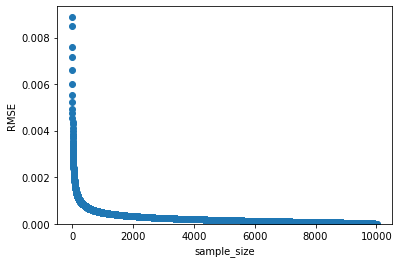

In [118]:
plt.scatter(range(1, n_max), rmse.values())
plt.xlabel("sample_size")
plt.ylabel("%")
plt.ylim(0)
plt.show()

# Plot

In [8]:
#short_profiles = os.path.join(os.getcwd(), "db", "all_in_short")
used_consumption = os.path.join(os.getcwd(), "db", "used", "consumption")
availability_path = os.path.join(os.getcwd(), "db", "availability")

In [9]:
os.makedirs(os.path.join(data_path, "ged"), exist_ok=True)
ged_path = os.path.join(data_path, "ged")

In [10]:
folder_cons = get_folders(used_consumption)
folder_ava = get_folders(availability_path)

In [136]:
strategy = "immediate"
count=0

for folder_nr in folder_ava:
    ts_path = os.path.join(availability_path, str(folder_nr))
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()
    for a_name in os.listdir(ts_path):
        if "DS_Store" not in a_name.split(".pickle")[0]:
            a_name = a_name.split(".pickle")[0]
            print(a_name)
            ged = Charging(a_name)
            ged.load_scenario(DB)
            ged.set_sub_scenario(strategy)
            ged.run()
            ged.save_profile(ged_path)
            count += 1

BEV5437_W13_067be_Volkswagen_e-Golf_SE_2019_6b977_avai_f6bbc
Profile done: BEV5437_W13_067be_Volkswagen_e-Golf_SE_2019_6b977_avai_f6bbc_immediate_5c1d8
BEV802_W13_f496e_Tesla_Model_3_Long_Range_AWD_2019_9a408_avai_369f2
Profile done: BEV802_W13_f496e_Tesla_Model_3_Long_Range_AWD_2019_9a408_avai_369f2_immediate_b6524
BEV3819_W13_56383_Tesla_Model_3_Long_Range_AWD_2019_c679c_avai_feb5d
Profile done: BEV3819_W13_56383_Tesla_Model_3_Long_Range_AWD_2019_c679c_avai_feb5d_immediate_ef4da
BEV2867_W13_5eed2_Tesla_Model_3_Long_Range_AWD_2019_579ed_avai_4b70b
Profile done: BEV2867_W13_5eed2_Tesla_Model_3_Long_Range_AWD_2019_579ed_avai_4b70b_immediate_a0971
BEV5374_W13_344a6_Renault_Zoe_Q90_2017_21cbd_avai_194a6
Profile done: BEV5374_W13_344a6_Renault_Zoe_Q90_2017_21cbd_avai_194a6_immediate_02054
BEV3_W13_9a7c1_Volkswagen_ID.3_2020_d5986_avai_fb4f5
Profile done: BEV3_W13_9a7c1_Volkswagen_ID.3_2020_d5986_avai_fb4f5_immediate_dce3e
BEV2005_W13_0e273_Tesla_Model_3_Long_Range_AWD_2019_92bc1_avai_0c697

BEV5950_W13_f663d_MINI_Cooper_SE_Level_I_2020_c6440_avai_d2444
Profile done: BEV5950_W13_f663d_MINI_Cooper_SE_Level_I_2020_c6440_avai_d2444_immediate_cd403
BEV172_W13_ca2e9_Tesla_Model_3_Long_Range_AWD_2019_836ab_avai_e04c7
Profile done: BEV172_W13_ca2e9_Tesla_Model_3_Long_Range_AWD_2019_836ab_avai_e04c7_immediate_2110d
BEV6234_W13_6397d_Volkswagen_ID.3_2020_f5ebd_avai_6c2ed
Profile done: BEV6234_W13_6397d_Volkswagen_ID.3_2020_f5ebd_avai_6c2ed_immediate_4dbe0
BEV5855_W13_ee5a6_Tesla_Model_3_Long_Range_AWD_2019_f46d3_avai_d321e
Profile done: BEV5855_W13_ee5a6_Tesla_Model_3_Long_Range_AWD_2019_f46d3_avai_d321e_immediate_256e9
BEV562_W13_17173_Audi_e-tron_55_quattro_2019_6bb55_avai_5b3f7
Profile done: BEV562_W13_17173_Audi_e-tron_55_quattro_2019_6bb55_avai_5b3f7_immediate_54db2
BEV3028_W13_b6ca5_Volkswagen_e-Golf_SE_2019_36d15_avai_86902
Profile done: BEV3028_W13_b6ca5_Volkswagen_e-Golf_SE_2019_36d15_avai_86902_immediate_61960
BEV1859_W13_4cacd_FIAT_500e_2019_cc5dd_avai_78bca
Profile done

BEV4788_W13_3d40c_FIAT_500e_2019_e7171_avai_316e8
Profile done: BEV4788_W13_3d40c_FIAT_500e_2019_e7171_avai_316e8_immediate_6d23d
BEV2498_W13_fce81_Tesla_Model_3_Long_Range_AWD_2019_b0245_avai_9f9cd
Profile done: BEV2498_W13_fce81_Tesla_Model_3_Long_Range_AWD_2019_b0245_avai_9f9cd_immediate_920fd
BEV3182_W13_68f08_Tesla_Model_3_Long_Range_AWD_2019_ce585_avai_06de6
Profile done: BEV3182_W13_68f08_Tesla_Model_3_Long_Range_AWD_2019_ce585_avai_06de6_immediate_9bc93
BEV3160_W13_3fc59_Audi_e-tron_55_quattro_2019_c09dd_avai_39cf9
Profile done: BEV3160_W13_3fc59_Audi_e-tron_55_quattro_2019_c09dd_avai_39cf9_immediate_e6789
BEV1327_W13_dd53f_Renault_Zoe_Q90_2017_23e71_avai_be038
Profile done: BEV1327_W13_dd53f_Renault_Zoe_Q90_2017_23e71_avai_be038_immediate_64e12
BEV229_W13_c9918_Volkswagen_e-Golf_SE_2019_f3b53_avai_9d761
Profile done: BEV229_W13_c9918_Volkswagen_e-Golf_SE_2019_f3b53_avai_9d761_immediate_92fa4
BEV3708_W13_9415a_Tesla_Model_3_Long_Range_AWD_2019_f0949_avai_49e85
Profile done: BEV

BEV5685_W13_10206_Tesla_Model_3_Long_Range_AWD_2019_d75c8_avai_e98ff
Profile done: BEV5685_W13_10206_Tesla_Model_3_Long_Range_AWD_2019_d75c8_avai_e98ff_immediate_3e8d7
BEV3039_W13_b8272_Volkswagen_ID.3_2020_637c4_avai_82c4c
Profile done: BEV3039_W13_b8272_Volkswagen_ID.3_2020_637c4_avai_82c4c_immediate_b40cb
BEV1965_W13_7f101_KIA_e-Niro_64_kWh_2019_796e8_avai_bef21
Profile done: BEV1965_W13_7f101_KIA_e-Niro_64_kWh_2019_796e8_avai_bef21_immediate_04f39
BEV273_W13_10d92_Audi_e-tron_55_quattro_2019_6fab0_avai_c600f
Profile done: BEV273_W13_10d92_Audi_e-tron_55_quattro_2019_6fab0_avai_c600f_immediate_699f1
BEV2096_W13_5c53c_Volkswagen_ID.3_2020_e39d2_avai_c88f2
Profile done: BEV2096_W13_5c53c_Volkswagen_ID.3_2020_e39d2_avai_c88f2_immediate_fd485
BEV2363_W13_e8777_Tesla_Model_3_Long_Range_AWD_2019_71c74_avai_75d06
Profile done: BEV2363_W13_e8777_Tesla_Model_3_Long_Range_AWD_2019_71c74_avai_75d06_immediate_e9849
BEV4185_W13_78268_Tesla_Model_3_Long_Range_AWD_2019_a843d_avai_7d149
Profile don

BEV904_W13_7877b_Tesla_Model_3_Long_Range_AWD_2019_c16f9_avai_b80fa
Profile done: BEV904_W13_7877b_Tesla_Model_3_Long_Range_AWD_2019_c16f9_avai_b80fa_immediate_f6ffa
BEV6398_W13_7eaa6_Tesla_Model_3_Long_Range_AWD_2019_3e3da_avai_dfb7f
Profile done: BEV6398_W13_7eaa6_Tesla_Model_3_Long_Range_AWD_2019_3e3da_avai_dfb7f_immediate_da556
BEV5043_W13_80fb4_Tesla_Model_3_Long_Range_AWD_2019_03105_avai_4ba24
Profile done: BEV5043_W13_80fb4_Tesla_Model_3_Long_Range_AWD_2019_03105_avai_4ba24_immediate_e54d7
BEV3701_W13_c558f_Tesla_Model_3_Long_Range_AWD_2019_fef51_avai_7406d
Profile done: BEV3701_W13_c558f_Tesla_Model_3_Long_Range_AWD_2019_fef51_avai_7406d_immediate_5134f
BEV3621_W13_adc4e_BMW_i3_33_kWh_2017_3383a_avai_d2d6a
Profile done: BEV3621_W13_adc4e_BMW_i3_33_kWh_2017_3383a_avai_d2d6a_immediate_522d7
BEV1242_W13_dc99b_Tesla_Model_3_Long_Range_AWD_2019_1af20_avai_b695e
Profile done: BEV1242_W13_dc99b_Tesla_Model_3_Long_Range_AWD_2019_1af20_avai_b695e_immediate_686d4
BEV2554_W13_98fb1_Renaul

BEV1002_W13_f2955_Renault_Zoe_Q90_2017_23bdd_avai_ff684
Balance: -0.01. Consumption: 22.15. charge_battery: 44.95. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1002_W13_f2955_Renault_Zoe_Q90_2017_23bdd_avai_ff684_immediate_b8df2
BEV647_W13_0362d_FIAT_500e_2019_3baa7_avai_1086b
Profile done: BEV647_W13_0362d_FIAT_500e_2019_3baa7_avai_1086b_immediate_98899
BEV969_W13_59449_Tesla_Model_3_Long_Range_AWD_2019_25326_avai_07868
Profile done: BEV969_W13_59449_Tesla_Model_3_Long_Range_AWD_2019_25326_avai_07868_immediate_9a447
BEV2383_W13_5f9d0_MINI_Cooper_SE_Level_I_2020_51d62_avai_a782c
Profile done: BEV2383_W13_5f9d0_MINI_Cooper_SE_Level_I_2020_51d62_avai_a782c_immediate_f9d07
BEV4165_W13_7b603_FIAT_500e_2019_916da_avai_7923d
Profile done: BEV4165_W13_7b603_FIAT_500e_2019_916da_avai_7923d_immediate_9c2d0
BEV2199_W13_96604_MINI_Cooper_SE_Level_I_2020_34b07_avai_366fa
Profile done: BEV2199_W13_96604_MINI_Cooper_SE_Level_I_2020_34b07_avai_366fa_immediate_5e6b3
BEV5664_W13_618fe_Renault_Zoe_Q9

BEV2533_W13_13b11_Tesla_Model_3_Long_Range_AWD_2019_fccf8_avai_04370
Profile done: BEV2533_W13_13b11_Tesla_Model_3_Long_Range_AWD_2019_fccf8_avai_04370_immediate_e2156
BEV5913_W13_6696a_Tesla_Model_3_Long_Range_AWD_2019_0e2ad_avai_f2a27
Profile done: BEV5913_W13_6696a_Tesla_Model_3_Long_Range_AWD_2019_0e2ad_avai_f2a27_immediate_85dd6
BEV6185_W13_09898_Hyundai_IONIQ_Electric_28_kWh_2019_e1387_avai_13abc
Profile done: BEV6185_W13_09898_Hyundai_IONIQ_Electric_28_kWh_2019_e1387_avai_13abc_immediate_9d648
BEV3450_W13_78935_KIA_e-Niro_64_kWh_2019_5fde6_avai_9b42e
Profile done: BEV3450_W13_78935_KIA_e-Niro_64_kWh_2019_5fde6_avai_9b42e_immediate_d4c0c
BEV2738_W13_66533_MINI_Cooper_SE_Level_I_2020_a20ab_avai_7c95a
Profile done: BEV2738_W13_66533_MINI_Cooper_SE_Level_I_2020_a20ab_avai_7c95a_immediate_dc2fe
BEV2831_W13_be059_Renault_Zoe_Q90_2017_28aa0_avai_90cb0
Balance: -0.01. Consumption: 21.23. charge_battery: 44.03. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2831_W13_be059_Renault_Zoe_Q9

BEV468_W13_1be3d_Volkswagen_ID.3_2020_bd69d_avai_80bea
Profile done: BEV468_W13_1be3d_Volkswagen_ID.3_2020_bd69d_avai_80bea_immediate_5d1b9
BEV1180_W13_ca193_Volkswagen_e-Golf_SE_2019_3ed72_avai_20e7a
Profile done: BEV1180_W13_ca193_Volkswagen_e-Golf_SE_2019_3ed72_avai_20e7a_immediate_5c97c
BEV2515_W13_9d5af_Tesla_Model_3_Long_Range_AWD_2019_0cabb_avai_3e580
Profile done: BEV2515_W13_9d5af_Tesla_Model_3_Long_Range_AWD_2019_0cabb_avai_3e580_immediate_a60bc
BEV1019_W13_129fe_Tesla_Model_3_Long_Range_AWD_2019_86b04_avai_66ef3
Profile done: BEV1019_W13_129fe_Tesla_Model_3_Long_Range_AWD_2019_86b04_avai_66ef3_immediate_28346
BEV4261_W13_6d1e9_Tesla_Model_3_Long_Range_AWD_2019_6b799_avai_fc5d8
Profile done: BEV4261_W13_6d1e9_Tesla_Model_3_Long_Range_AWD_2019_6b799_avai_fc5d8_immediate_2335d
BEV2892_W13_08870_Tesla_Model_3_Long_Range_AWD_2019_9f1ca_avai_58b62
Profile done: BEV2892_W13_08870_Tesla_Model_3_Long_Range_AWD_2019_9f1ca_avai_58b62_immediate_08525
BEV3294_W13_88851_MINI_Cooper_SE_Lev

Profile done: BEV20_W13_340a6_Tesla_Model_3_Long_Range_AWD_2019_602b0_avai_76681_immediate_ae1af
BEV4248_W13_a750e_MINI_Cooper_SE_Level_I_2020_f9c95_avai_54091
Profile done: BEV4248_W13_a750e_MINI_Cooper_SE_Level_I_2020_f9c95_avai_54091_immediate_90cea
BEV3083_W13_1d72f_FIAT_500e_2019_34b85_avai_824e7
Profile done: BEV3083_W13_1d72f_FIAT_500e_2019_34b85_avai_824e7_immediate_1c3e5
BEV1617_W13_5e613_Volkswagen_e-Golf_SE_2019_6b601_avai_e842a
Profile done: BEV1617_W13_5e613_Volkswagen_e-Golf_SE_2019_6b601_avai_e842a_immediate_824dd
BEV5451_W13_c33a0_Renault_Zoe_Q90_2017_75216_avai_6c7cf
Profile done: BEV5451_W13_c33a0_Renault_Zoe_Q90_2017_75216_avai_6c7cf_immediate_d0434
BEV3271_W13_4ff03_Tesla_Model_3_Long_Range_AWD_2019_b0660_avai_c65b9
Profile done: BEV3271_W13_4ff03_Tesla_Model_3_Long_Range_AWD_2019_b0660_avai_c65b9_immediate_82f16
BEV2641_W13_a4f2b_FIAT_500e_2019_5e7e3_avai_aae4e
Profile done: BEV2641_W13_a4f2b_FIAT_500e_2019_5e7e3_avai_aae4e_immediate_4f7de
BEV2494_W13_ba0e8_Volkswa

BEV5449_W13_c2265_Renault_Zoe_Q90_2017_29d12_avai_d008d
Profile done: BEV5449_W13_c2265_Renault_Zoe_Q90_2017_29d12_avai_d008d_immediate_ffbb7
BEV1630_W13_cdd87_Tesla_Model_3_Long_Range_AWD_2019_e4ab9_avai_2987e
Profile done: BEV1630_W13_cdd87_Tesla_Model_3_Long_Range_AWD_2019_e4ab9_avai_2987e_immediate_78c12
BEV2916_W13_b4160_Tesla_Model_3_Long_Range_AWD_2019_f9477_avai_b5b04
Profile done: BEV2916_W13_b4160_Tesla_Model_3_Long_Range_AWD_2019_f9477_avai_b5b04_immediate_3b103
BEV4975_W13_1991e_Tesla_Model_3_Long_Range_AWD_2019_db0ef_avai_7b920
Profile done: BEV4975_W13_1991e_Tesla_Model_3_Long_Range_AWD_2019_db0ef_avai_7b920_immediate_780c7
BEV5143_W13_875f7_Volkswagen_ID.3_2020_7631b_avai_87b83
Profile done: BEV5143_W13_875f7_Volkswagen_ID.3_2020_7631b_avai_87b83_immediate_bb75c
BEV947_W13_1fa12_BMW_i3_33_kWh_2017_e37e1_avai_d569e
Profile done: BEV947_W13_1fa12_BMW_i3_33_kWh_2017_e37e1_avai_d569e_immediate_e476c
BEV1404_W13_36a12_Tesla_Model_3_Long_Range_AWD_2019_f96ad_avai_54e9e
Profile

BEV1768_W13_3f450_Volkswagen_ID.3_2020_ef61b_avai_8378c
Profile done: BEV1768_W13_3f450_Volkswagen_ID.3_2020_ef61b_avai_8378c_immediate_424d7
BEV3950_W13_c5066_Renault_Zoe_Q90_2017_631f5_avai_0e171
Profile done: BEV3950_W13_c5066_Renault_Zoe_Q90_2017_631f5_avai_0e171_immediate_8b2a7
BEV4806_W13_2a859_Volkswagen_ID.3_2020_bc524_avai_df786
Profile done: BEV4806_W13_2a859_Volkswagen_ID.3_2020_bc524_avai_df786_immediate_6df1d
BEV4307_W13_3dade_Tesla_Model_3_Long_Range_AWD_2019_a7629_avai_03252
Profile done: BEV4307_W13_3dade_Tesla_Model_3_Long_Range_AWD_2019_a7629_avai_03252_immediate_d0827
BEV4113_W13_d341d_FIAT_500e_2019_9d0c0_avai_eb2b7
Profile done: BEV4113_W13_d341d_FIAT_500e_2019_9d0c0_avai_eb2b7_immediate_b67c9
BEV685_W13_7e7d3_Tesla_Model_3_Long_Range_AWD_2019_f8cce_avai_4e7a6
Profile done: BEV685_W13_7e7d3_Tesla_Model_3_Long_Range_AWD_2019_f8cce_avai_4e7a6_immediate_a585b
BEV2784_W13_d342a_Tesla_Model_3_Long_Range_AWD_2019_2e748_avai_00276
Profile done: BEV2784_W13_d342a_Tesla_Mod

BEV3238_W13_f22c1_Tesla_Model_3_Long_Range_AWD_2019_b9e5c_avai_e926a
Profile done: BEV3238_W13_f22c1_Tesla_Model_3_Long_Range_AWD_2019_b9e5c_avai_e926a_immediate_6b30d
BEV3482_W13_70408_Tesla_Model_3_Long_Range_AWD_2019_99657_avai_60385
Profile done: BEV3482_W13_70408_Tesla_Model_3_Long_Range_AWD_2019_99657_avai_60385_immediate_2e396
BEV1640_W13_89a7c_Tesla_Model_3_Long_Range_AWD_2019_27cff_avai_8226d
Profile done: BEV1640_W13_89a7c_Tesla_Model_3_Long_Range_AWD_2019_27cff_avai_8226d_immediate_0f466
BEV1749_W13_715b1_Tesla_Model_3_Long_Range_AWD_2019_b4dd1_avai_6e97d
Profile done: BEV1749_W13_715b1_Tesla_Model_3_Long_Range_AWD_2019_b4dd1_avai_6e97d_immediate_b58ef
BEV5340_W13_b2374_Tesla_Model_3_Long_Range_AWD_2019_4be3c_avai_7af8f
Profile done: BEV5340_W13_b2374_Tesla_Model_3_Long_Range_AWD_2019_4be3c_avai_7af8f_immediate_9f357
BEV833_W13_73ae7_BMW_i3_33_kWh_2017_b8b05_avai_5e550
Profile done: BEV833_W13_73ae7_BMW_i3_33_kWh_2017_b8b05_avai_5e550_immediate_4d83f
BEV5750_W13_e06c7_Volksw

Profile done: BEV3297_W13_82d7d_BMW_i3_33_kWh_2017_b82d4_avai_3f909_immediate_8078d
BEV1712_W13_d8103_Renault_Zoe_Q90_2017_e0bef_avai_adfa8
Profile done: BEV1712_W13_d8103_Renault_Zoe_Q90_2017_e0bef_avai_adfa8_immediate_fbac9
BEV3219_W13_42f91_Renault_Zoe_Q90_2017_3ab04_avai_e9a90
Balance: -0.01. Consumption: 22.79. charge_battery: 45.59. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3219_W13_42f91_Renault_Zoe_Q90_2017_3ab04_avai_e9a90_immediate_e1c23
BEV4119_W13_8a3ba_Renault_Zoe_Q90_2017_48acc_avai_1532d
Profile done: BEV4119_W13_8a3ba_Renault_Zoe_Q90_2017_48acc_avai_1532d_immediate_45324
BEV535_W13_05484_Audi_e-tron_55_quattro_2019_1208c_avai_60d3e
Profile done: BEV535_W13_05484_Audi_e-tron_55_quattro_2019_1208c_avai_60d3e_immediate_f1474
BEV5258_W13_4e883_Tesla_Model_3_Long_Range_AWD_2019_5a220_avai_5dae3
Profile done: BEV5258_W13_4e883_Tesla_Model_3_Long_Range_AWD_2019_5a220_avai_5dae3_immediate_a4510
BEV3302_W13_59e69_Renault_Zoe_Q90_2017_05609_avai_344b7
Profile done: BEV3302_

BEV1658_W13_8ea5c_Renault_Zoe_Q90_2017_b59ba_avai_efb3a
Profile done: BEV1658_W13_8ea5c_Renault_Zoe_Q90_2017_b59ba_avai_efb3a_immediate_4bb7e
BEV2588_W13_dd50c_Renault_Zoe_Q90_2017_572fb_avai_290cc
Balance: -0.01. Consumption: 22.4. charge_battery: 45.2. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2588_W13_dd50c_Renault_Zoe_Q90_2017_572fb_avai_290cc_immediate_1f4d3
BEV5468_W13_468f7_Volkswagen_ID.3_2020_7e0c0_avai_b084f
Profile done: BEV5468_W13_468f7_Volkswagen_ID.3_2020_7e0c0_avai_b084f_immediate_43ad6
BEV5031_W13_4ecee_MINI_Cooper_SE_Level_I_2020_8a414_avai_fe186
Profile done: BEV5031_W13_4ecee_MINI_Cooper_SE_Level_I_2020_8a414_avai_fe186_immediate_ca279
BEV1337_W13_f10fe_Renault_Zoe_Q90_2017_97d01_avai_02b4c
Balance: -0.01. Consumption: 23.5. charge_battery: 46.3. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1337_W13_f10fe_Renault_Zoe_Q90_2017_97d01_avai_02b4c_immediate_8203b
BEV3879_W13_f6ab0_Volkswagen_ID.3_2020_df342_avai_c39f8
Profile done: BEV3879_W13_f6ab0_Volkswagen_I

BEV5670_W13_64245_Tesla_Model_3_Long_Range_AWD_2019_ca31b_avai_c9240
Profile done: BEV5670_W13_64245_Tesla_Model_3_Long_Range_AWD_2019_ca31b_avai_c9240_immediate_a5095
BEV1277_W13_c1af3_FIAT_500e_2019_1cfd6_avai_56bab
Profile done: BEV1277_W13_c1af3_FIAT_500e_2019_1cfd6_avai_56bab_immediate_6dec7
BEV2734_W13_4b768_Volkswagen_ID.3_2020_c13c3_avai_22d20
Profile done: BEV2734_W13_4b768_Volkswagen_ID.3_2020_c13c3_avai_22d20_immediate_17c5f
BEV3158_W13_c72a0_Tesla_Model_3_Long_Range_AWD_2019_e460d_avai_c7190
Profile done: BEV3158_W13_c72a0_Tesla_Model_3_Long_Range_AWD_2019_e460d_avai_c7190_immediate_376e6
BEV5150_W13_3a780_Renault_Zoe_Q90_2017_92805_avai_03fbd
Profile done: BEV5150_W13_3a780_Renault_Zoe_Q90_2017_92805_avai_03fbd_immediate_a9b12
BEV633_W13_25ac4_Volkswagen_ID.3_2020_206a2_avai_abfc9
Profile done: BEV633_W13_25ac4_Volkswagen_ID.3_2020_206a2_avai_abfc9_immediate_36e79
BEV2467_W13_4fd93_BMW_i3_33_kWh_2017_4dd14_avai_ece12
Profile done: BEV2467_W13_4fd93_BMW_i3_33_kWh_2017_4dd14

Profile done: BEV848_W13_d1262_Tesla_Model_3_Long_Range_AWD_2019_b6182_avai_40b51_immediate_b96e5
BEV2847_W13_e0541_Hyundai_IONIQ_Electric_28_kWh_2019_57171_avai_af2c1
Profile done: BEV2847_W13_e0541_Hyundai_IONIQ_Electric_28_kWh_2019_57171_avai_af2c1_immediate_8bd05
BEV5717_W13_22de4_Tesla_Model_3_Long_Range_AWD_2019_7fb95_avai_d8840
Profile done: BEV5717_W13_22de4_Tesla_Model_3_Long_Range_AWD_2019_7fb95_avai_d8840_immediate_d12ac
BEV3075_W13_56e33_Tesla_Model_3_Long_Range_AWD_2019_35162_avai_e9063
Profile done: BEV3075_W13_56e33_Tesla_Model_3_Long_Range_AWD_2019_35162_avai_e9063_immediate_48b47
BEV1162_W13_06673_MINI_Cooper_SE_Level_I_2020_9648b_avai_975c1
Profile done: BEV1162_W13_06673_MINI_Cooper_SE_Level_I_2020_9648b_avai_975c1_immediate_07861
BEV1795_W13_d4142_Volkswagen_ID.3_2020_d7200_avai_61679
Profile done: BEV1795_W13_d4142_Volkswagen_ID.3_2020_d7200_avai_61679_immediate_9ff76
BEV1944_W13_a6b37_KIA_e-Niro_64_kWh_2019_83d29_avai_bee01
Profile done: BEV1944_W13_a6b37_KIA_e-Ni

BEV46_W13_d5122_Tesla_Model_3_Long_Range_AWD_2019_28195_avai_036d9
Profile done: BEV46_W13_d5122_Tesla_Model_3_Long_Range_AWD_2019_28195_avai_036d9_immediate_9176f
BEV3468_W13_ab3e6_Tesla_Model_3_Long_Range_AWD_2019_992d7_avai_47674
Profile done: BEV3468_W13_ab3e6_Tesla_Model_3_Long_Range_AWD_2019_992d7_avai_47674_immediate_72e09
BEV3966_W13_21e50_Tesla_Model_3_Long_Range_AWD_2019_a332e_avai_2db9c
Profile done: BEV3966_W13_21e50_Tesla_Model_3_Long_Range_AWD_2019_a332e_avai_2db9c_immediate_c9594
BEV4339_W13_18bab_Tesla_Model_3_Long_Range_AWD_2019_1cece_avai_4f075
Profile done: BEV4339_W13_18bab_Tesla_Model_3_Long_Range_AWD_2019_1cece_avai_4f075_immediate_c6ac2
BEV1611_W13_403e3_Tesla_Model_3_Long_Range_AWD_2019_4b731_avai_7b800
Profile done: BEV1611_W13_403e3_Tesla_Model_3_Long_Range_AWD_2019_4b731_avai_7b800_immediate_3d12e
BEV93_W13_9c64f_Tesla_Model_3_Long_Range_AWD_2019_c181d_avai_cee6e
Profile done: BEV93_W13_9c64f_Tesla_Model_3_Long_Range_AWD_2019_c181d_avai_cee6e_immediate_1bb96


BEV5354_W13_df0e7_Renault_Zoe_Q90_2017_7c621_avai_b67a3
Profile done: BEV5354_W13_df0e7_Renault_Zoe_Q90_2017_7c621_avai_b67a3_immediate_e827f
BEV2668_W13_27bb3_Tesla_Model_3_Long_Range_AWD_2019_1ff7d_avai_97a74
Profile done: BEV2668_W13_27bb3_Tesla_Model_3_Long_Range_AWD_2019_1ff7d_avai_97a74_immediate_d29e7
BEV2548_W13_1d03d_Volkswagen_e-Golf_SE_2019_e3a7e_avai_fb9e3
Profile done: BEV2548_W13_1d03d_Volkswagen_e-Golf_SE_2019_e3a7e_avai_fb9e3_immediate_7795e
BEV5889_W13_316ab_Volkswagen_ID.3_2020_42b97_avai_65d05
Profile done: BEV5889_W13_316ab_Volkswagen_ID.3_2020_42b97_avai_65d05_immediate_3d6e3
BEV1257_W13_84839_Volkswagen_ID.3_2020_9c49c_avai_480ad
Profile done: BEV1257_W13_84839_Volkswagen_ID.3_2020_9c49c_avai_480ad_immediate_61b11
BEV6305_W13_219a7_Tesla_Model_3_Long_Range_AWD_2019_095b4_avai_7d4ce
Profile done: BEV6305_W13_219a7_Tesla_Model_3_Long_Range_AWD_2019_095b4_avai_7d4ce_immediate_f8c2d
BEV5251_W13_653c2_Tesla_Model_3_Long_Range_AWD_2019_2df6b_avai_dff23
Profile done: BEV

BEV1928_W13_3ea11_Tesla_Model_3_Long_Range_AWD_2019_9fa2f_avai_2f282
Profile done: BEV1928_W13_3ea11_Tesla_Model_3_Long_Range_AWD_2019_9fa2f_avai_2f282_immediate_5cb25
BEV970_W13_ead31_Audi_e-tron_55_quattro_2019_05038_avai_75b96
Profile done: BEV970_W13_ead31_Audi_e-tron_55_quattro_2019_05038_avai_75b96_immediate_20f19
BEV5090_W13_7f360_BMW_i3_33_kWh_2017_d7d7b_avai_93978
Profile done: BEV5090_W13_7f360_BMW_i3_33_kWh_2017_d7d7b_avai_93978_immediate_494f8
BEV1453_W13_714f7_Volkswagen_e-Golf_SE_2019_fbf94_avai_0ba06
Profile done: BEV1453_W13_714f7_Volkswagen_e-Golf_SE_2019_fbf94_avai_0ba06_immediate_46444
BEV708_W13_b9a75_Renault_Zoe_Q90_2017_9c2da_avai_98de2
Profile done: BEV708_W13_b9a75_Renault_Zoe_Q90_2017_9c2da_avai_98de2_immediate_da3d9
BEV759_W13_f23a5_Volkswagen_ID.3_2020_f5783_avai_5b131
Profile done: BEV759_W13_f23a5_Volkswagen_ID.3_2020_f5783_avai_5b131_immediate_1b091
BEV210_W13_c22b3_Tesla_Model_3_Long_Range_AWD_2019_fad69_avai_6b2a2
Profile done: BEV210_W13_c22b3_Tesla_Mod

Profile done: BEV2283_W13_1b42d_MINI_Cooper_SE_Level_I_2020_78205_avai_a0839_immediate_1ed02
BEV1126_W13_44980_Renault_Zoe_Q90_2017_4b272_avai_2ca54
Balance: -0.01. Consumption: 18.13. charge_battery: 40.93. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1126_W13_44980_Renault_Zoe_Q90_2017_4b272_avai_2ca54_immediate_56c4a
BEV303_W13_fabc2_Renault_Zoe_Q90_2017_fcfbd_avai_a40e0
Balance: -0.01. Consumption: 16.85. charge_battery: 39.65. sto_init: 22.8. sto_end: 45.61
Profile done: BEV303_W13_fabc2_Renault_Zoe_Q90_2017_fcfbd_avai_a40e0_immediate_964f9
BEV829_W13_3d2a0_Tesla_Model_3_Long_Range_AWD_2019_41e6b_avai_ec661
Profile done: BEV829_W13_3d2a0_Tesla_Model_3_Long_Range_AWD_2019_41e6b_avai_ec661_immediate_73fcc
BEV3800_W13_c0e50_Renault_Zoe_Q90_2017_9242e_avai_a7b6b
Profile done: BEV3800_W13_c0e50_Renault_Zoe_Q90_2017_9242e_avai_a7b6b_immediate_a72bf
BEV5893_W13_0f7ef_Tesla_Model_3_Long_Range_AWD_2019_8677c_avai_9156c
Profile done: BEV5893_W13_0f7ef_Tesla_Model_3_Long_Range_AWD_2019_86

BEV2748_W13_09f34_Volkswagen_ID.3_2020_e103b_avai_34619
Profile done: BEV2748_W13_09f34_Volkswagen_ID.3_2020_e103b_avai_34619_immediate_4fe2b
BEV2655_W13_af8d5_MINI_Cooper_SE_Level_I_2020_ad6cf_avai_7c6b7
Profile done: BEV2655_W13_af8d5_MINI_Cooper_SE_Level_I_2020_ad6cf_avai_7c6b7_immediate_52d29
BEV3788_W13_83c7c_Tesla_Model_3_Long_Range_AWD_2019_c3a73_avai_3908a
Profile done: BEV3788_W13_83c7c_Tesla_Model_3_Long_Range_AWD_2019_c3a73_avai_3908a_immediate_86fca
BEV789_W13_eb2e9_Audi_e-tron_55_quattro_2019_75a34_avai_76507
Profile done: BEV789_W13_eb2e9_Audi_e-tron_55_quattro_2019_75a34_avai_76507_immediate_0e4af
BEV3964_W13_261f6_Tesla_Model_3_Long_Range_AWD_2019_09c5c_avai_39e80
Profile done: BEV3964_W13_261f6_Tesla_Model_3_Long_Range_AWD_2019_09c5c_avai_39e80_immediate_45694
BEV5732_W13_e8501_Audi_e-tron_55_quattro_2019_09579_avai_21e27
Profile done: BEV5732_W13_e8501_Audi_e-tron_55_quattro_2019_09579_avai_21e27_immediate_be31d
BEV670_W13_583e0_Tesla_Model_3_Long_Range_AWD_2019_dcfbb

BEV288_W13_0bde9_MINI_Cooper_SE_Level_I_2020_4464e_avai_c2038
Profile done: BEV288_W13_0bde9_MINI_Cooper_SE_Level_I_2020_4464e_avai_c2038_immediate_3bf00
BEV2556_W13_25b5b_Volkswagen_e-Golf_SE_2019_da82a_avai_4ca36
Profile done: BEV2556_W13_25b5b_Volkswagen_e-Golf_SE_2019_da82a_avai_4ca36_immediate_eed21
BEV384_W13_480d4_Volkswagen_ID.3_2020_5baf2_avai_bb476
Profile done: BEV384_W13_480d4_Volkswagen_ID.3_2020_5baf2_avai_bb476_immediate_2fbc8
BEV3274_W13_10afc_Renault_Zoe_Q90_2017_6b100_avai_f005e
Profile done: BEV3274_W13_10afc_Renault_Zoe_Q90_2017_6b100_avai_f005e_immediate_c65f5
BEV743_W13_143ca_Tesla_Model_3_Long_Range_AWD_2019_720ed_avai_a4796
Profile done: BEV743_W13_143ca_Tesla_Model_3_Long_Range_AWD_2019_720ed_avai_a4796_immediate_52f58
BEV1977_W13_cf7b1_Tesla_Model_3_Long_Range_AWD_2019_4ba16_avai_166ac
Profile done: BEV1977_W13_cf7b1_Tesla_Model_3_Long_Range_AWD_2019_4ba16_avai_166ac_immediate_37a7b
BEV2321_W13_03757_Tesla_Model_3_Long_Range_AWD_2019_0786b_avai_178a5
Profile d

BEV804_W13_ab175_Volkswagen_e-Golf_SE_2019_ff3eb_avai_ce271
Profile done: BEV804_W13_ab175_Volkswagen_e-Golf_SE_2019_ff3eb_avai_ce271_immediate_20a8f
BEV5577_W13_f0bf5_Tesla_Model_3_Long_Range_AWD_2019_5fab2_avai_32028
Profile done: BEV5577_W13_f0bf5_Tesla_Model_3_Long_Range_AWD_2019_5fab2_avai_32028_immediate_6ec4a
BEV3775_W13_6b1aa_Volkswagen_ID.3_2020_7056c_avai_207da
Profile done: BEV3775_W13_6b1aa_Volkswagen_ID.3_2020_7056c_avai_207da_immediate_259e1
BEV2177_W13_26476_Audi_e-tron_55_quattro_2019_e75de_avai_b7ecf
Profile done: BEV2177_W13_26476_Audi_e-tron_55_quattro_2019_e75de_avai_b7ecf_immediate_88fe2
BEV1684_W13_692f5_Volkswagen_e-Golf_SE_2019_3fd7f_avai_4f2cb
Profile done: BEV1684_W13_692f5_Volkswagen_e-Golf_SE_2019_3fd7f_avai_4f2cb_immediate_2e1c1
BEV3084_W13_26c61_Renault_Zoe_Q90_2017_67de8_avai_dd8e2
Balance: -0.01. Consumption: 25.09. charge_battery: 47.89. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3084_W13_26c61_Renault_Zoe_Q90_2017_67de8_avai_dd8e2_immediate_35eef


Profile done: BEV3140_W13_ca8c0_Tesla_Model_3_Long_Range_AWD_2019_95b29_avai_a5289_immediate_e6103
BEV3651_W13_e6641_Tesla_Model_3_Long_Range_AWD_2019_d460c_avai_bc4c4
Profile done: BEV3651_W13_e6641_Tesla_Model_3_Long_Range_AWD_2019_d460c_avai_bc4c4_immediate_f5a85
BEV5823_W13_29456_Renault_Zoe_Q90_2017_8688d_avai_52267
Balance: -0.01. Consumption: 25.09. charge_battery: 47.89. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5823_W13_29456_Renault_Zoe_Q90_2017_8688d_avai_52267_immediate_66792
BEV5667_W13_8ee6f_Tesla_Model_3_Long_Range_AWD_2019_93c2c_avai_998dc
Profile done: BEV5667_W13_8ee6f_Tesla_Model_3_Long_Range_AWD_2019_93c2c_avai_998dc_immediate_944fb
BEV3938_W13_ec36b_Renault_Zoe_Q90_2017_972f0_avai_4cce7
Balance: -0.01. Consumption: 23.3. charge_battery: 46.1. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3938_W13_ec36b_Renault_Zoe_Q90_2017_972f0_avai_4cce7_immediate_16fa6
BEV1624_W13_d0097_Tesla_Model_3_Long_Range_AWD_2019_950c8_avai_a2810
Profile done: BEV1624_W13_d0097_Te

BEV2065_W13_8bf2f_Tesla_Model_3_Long_Range_AWD_2019_119dd_avai_dbabd
Profile done: BEV2065_W13_8bf2f_Tesla_Model_3_Long_Range_AWD_2019_119dd_avai_dbabd_immediate_e4786
BEV1419_W13_1edc4_Tesla_Model_3_Long_Range_AWD_2019_fc329_avai_fc59c
Profile done: BEV1419_W13_1edc4_Tesla_Model_3_Long_Range_AWD_2019_fc329_avai_fc59c_immediate_b9a05
BEV1525_W13_a7183_Hyundai_IONIQ_Electric_28_kWh_2019_cca58_avai_e5fc1
Profile done: BEV1525_W13_a7183_Hyundai_IONIQ_Electric_28_kWh_2019_cca58_avai_e5fc1_immediate_46d48
BEV4709_W13_11861_FIAT_500e_2019_f2afe_avai_05e97
Profile done: BEV4709_W13_11861_FIAT_500e_2019_f2afe_avai_05e97_immediate_e351c
BEV2169_W13_bf8a6_Renault_Zoe_Q90_2017_a564b_avai_aec87
Profile done: BEV2169_W13_bf8a6_Renault_Zoe_Q90_2017_a564b_avai_aec87_immediate_7ed8f
BEV24_W13_14754_Volkswagen_ID.3_2020_02a3a_avai_1aadf
Profile done: BEV24_W13_14754_Volkswagen_ID.3_2020_02a3a_avai_1aadf_immediate_cd475
BEV2708_W13_a6274_MINI_Cooper_SE_Level_I_2020_e9fd5_avai_aa67e
Profile done: BEV2708

BEV1073_W13_e2b03_Hyundai_IONIQ_Electric_28_kWh_2019_5825b_avai_d3971
Profile done: BEV1073_W13_e2b03_Hyundai_IONIQ_Electric_28_kWh_2019_5825b_avai_d3971_immediate_39884
BEV685_W13_5982a_FIAT_500e_2019_66929_avai_222ee
Profile done: BEV685_W13_5982a_FIAT_500e_2019_66929_avai_222ee_immediate_a7631
BEV1238_W13_5531b_Tesla_Model_3_Long_Range_AWD_2019_1b563_avai_20825
Profile done: BEV1238_W13_5531b_Tesla_Model_3_Long_Range_AWD_2019_1b563_avai_20825_immediate_31575
BEV509_W13_90e32_Tesla_Model_3_Long_Range_AWD_2019_50880_avai_f70b3
Profile done: BEV509_W13_90e32_Tesla_Model_3_Long_Range_AWD_2019_50880_avai_f70b3_immediate_71808
BEV272_W13_135fb_Volkswagen_e-Golf_SE_2019_d2c65_avai_81c6e
Profile done: BEV272_W13_135fb_Volkswagen_e-Golf_SE_2019_d2c65_avai_81c6e_immediate_52cba
BEV5541_W13_6b21f_Tesla_Model_3_Long_Range_AWD_2019_84282_avai_fe532
Profile done: BEV5541_W13_6b21f_Tesla_Model_3_Long_Range_AWD_2019_84282_avai_fe532_immediate_81b8f
BEV1792_W13_2652a_Tesla_Model_3_Long_Range_AWD_201

BEV2856_W13_c9f52_Tesla_Model_3_Long_Range_AWD_2019_9eef8_avai_ea504
Profile done: BEV2856_W13_c9f52_Tesla_Model_3_Long_Range_AWD_2019_9eef8_avai_ea504_immediate_567f0
BEV3059_W13_bd905_Hyundai_IONIQ_Electric_28_kWh_2019_ccfe3_avai_49b07
Profile done: BEV3059_W13_bd905_Hyundai_IONIQ_Electric_28_kWh_2019_ccfe3_avai_49b07_immediate_23771
BEV2007_W13_1dcbf_FIAT_500e_2019_84fce_avai_fbb60
Profile done: BEV2007_W13_1dcbf_FIAT_500e_2019_84fce_avai_fbb60_immediate_cd6c6
BEV1398_W13_2ed2d_Volkswagen_e-Golf_SE_2019_f9a83_avai_8fc05
Profile done: BEV1398_W13_2ed2d_Volkswagen_e-Golf_SE_2019_f9a83_avai_8fc05_immediate_b2fed
BEV5441_W13_59909_Audi_e-tron_55_quattro_2019_92832_avai_1e0d4
Balance: 0.01. Consumption: 25.28. charge_battery: 72.79. sto_init: 47.5. sto_end: 95.0
Profile done: BEV5441_W13_59909_Audi_e-tron_55_quattro_2019_92832_avai_1e0d4_immediate_ec5e3
BEV3857_W13_bd4ca_Tesla_Model_3_Long_Range_AWD_2019_f9942_avai_f0d53
Profile done: BEV3857_W13_bd4ca_Tesla_Model_3_Long_Range_AWD_2019_f

BEV5937_W13_13cdb_BMW_i3_33_kWh_2017_66c3a_avai_ecb3b
Profile done: BEV5937_W13_13cdb_BMW_i3_33_kWh_2017_66c3a_avai_ecb3b_immediate_f7fed
BEV5877_W13_eed05_Tesla_Model_3_Long_Range_AWD_2019_169bf_avai_1061b
Profile done: BEV5877_W13_eed05_Tesla_Model_3_Long_Range_AWD_2019_169bf_avai_1061b_immediate_2fdaf
BEV1461_W13_f7d2d_Tesla_Model_3_Long_Range_AWD_2019_768b6_avai_1b2f5
Profile done: BEV1461_W13_f7d2d_Tesla_Model_3_Long_Range_AWD_2019_768b6_avai_1b2f5_immediate_e77e9
BEV3154_W13_2f7da_Tesla_Model_3_Long_Range_AWD_2019_55086_avai_1b56a
Profile done: BEV3154_W13_2f7da_Tesla_Model_3_Long_Range_AWD_2019_55086_avai_1b56a_immediate_6c544
BEV3158_W13_286f3_Tesla_Model_3_Long_Range_AWD_2019_06de2_avai_e3bb5
Profile done: BEV3158_W13_286f3_Tesla_Model_3_Long_Range_AWD_2019_06de2_avai_e3bb5_immediate_cef1e
BEV1057_W13_7f0c3_Volkswagen_ID.3_2020_cc80f_avai_d2b18
Profile done: BEV1057_W13_7f0c3_Volkswagen_ID.3_2020_cc80f_avai_d2b18_immediate_f8c05
BEV6269_W13_0f88a_MINI_Cooper_SE_Level_I_2020_38

BEV503_W13_daa2d_Volkswagen_ID.3_2020_03727_avai_d10bb
Profile done: BEV503_W13_daa2d_Volkswagen_ID.3_2020_03727_avai_d10bb_immediate_2e5a2
BEV2634_W13_9b10b_Hyundai_IONIQ_Electric_28_kWh_2019_d45c1_avai_9932e
Profile done: BEV2634_W13_9b10b_Hyundai_IONIQ_Electric_28_kWh_2019_d45c1_avai_9932e_immediate_91e99
BEV1323_W13_90229_Audi_e-tron_55_quattro_2019_e4e2f_avai_39560
Profile done: BEV1323_W13_90229_Audi_e-tron_55_quattro_2019_e4e2f_avai_39560_immediate_38089
BEV1164_W13_231b1_Renault_Zoe_Q90_2017_38f39_avai_b8e54
Balance: -0.01. Consumption: 19.5. charge_battery: 42.3. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1164_W13_231b1_Renault_Zoe_Q90_2017_38f39_avai_b8e54_immediate_a79e2
BEV689_W13_efef0_Renault_Zoe_Q90_2017_c1e9c_avai_f36c1
Profile done: BEV689_W13_efef0_Renault_Zoe_Q90_2017_c1e9c_avai_f36c1_immediate_e980b
BEV3104_W13_2a79e_Volkswagen_ID.3_2020_6cd3b_avai_51b6c
Profile done: BEV3104_W13_2a79e_Volkswagen_ID.3_2020_6cd3b_avai_51b6c_immediate_966a1
BEV4167_W13_52042_Audi

BEV3359_W13_acf3f_MINI_Cooper_SE_Level_I_2020_95ddd_avai_c0be7
Profile done: BEV3359_W13_acf3f_MINI_Cooper_SE_Level_I_2020_95ddd_avai_c0be7_immediate_a7b31
BEV3172_W13_092c0_MINI_Cooper_SE_Level_I_2020_cd288_avai_45b95
Profile done: BEV3172_W13_092c0_MINI_Cooper_SE_Level_I_2020_cd288_avai_45b95_immediate_f1d34
BEV982_W13_77dd8_Tesla_Model_3_Long_Range_AWD_2019_b6e42_avai_dfdf4
Profile done: BEV982_W13_77dd8_Tesla_Model_3_Long_Range_AWD_2019_b6e42_avai_dfdf4_immediate_509c3
BEV3556_W13_0bb26_Tesla_Model_3_Long_Range_AWD_2019_7935a_avai_c03ec
Profile done: BEV3556_W13_0bb26_Tesla_Model_3_Long_Range_AWD_2019_7935a_avai_c03ec_immediate_701e2
BEV4903_W13_b27c2_Volkswagen_e-Golf_SE_2019_f0211_avai_c2422
Profile done: BEV4903_W13_b27c2_Volkswagen_e-Golf_SE_2019_f0211_avai_c2422_immediate_94c2f
BEV3426_W13_857ce_Tesla_Model_3_Long_Range_AWD_2019_590c6_avai_df980
Profile done: BEV3426_W13_857ce_Tesla_Model_3_Long_Range_AWD_2019_590c6_avai_df980_immediate_56f5b
BEV2650_W13_44d5c_Audi_e-tron_55_q

BEV2348_W13_ca8ed_Tesla_Model_3_Long_Range_AWD_2019_8a02b_avai_24629
Profile done: BEV2348_W13_ca8ed_Tesla_Model_3_Long_Range_AWD_2019_8a02b_avai_24629_immediate_8ce1d
BEV2918_W13_0efb6_FIAT_500e_2019_67036_avai_a8af9
Profile done: BEV2918_W13_0efb6_FIAT_500e_2019_67036_avai_a8af9_immediate_6a38e
BEV3472_W13_90802_Tesla_Model_3_Long_Range_AWD_2019_a11e7_avai_05212
Profile done: BEV3472_W13_90802_Tesla_Model_3_Long_Range_AWD_2019_a11e7_avai_05212_immediate_1c236
BEV812_W13_37ac8_BMW_i3_33_kWh_2017_75dfc_avai_19a97
Profile done: BEV812_W13_37ac8_BMW_i3_33_kWh_2017_75dfc_avai_19a97_immediate_e978b
BEV6114_W13_70b83_Volkswagen_e-Golf_SE_2019_f064d_avai_5a2ea
Profile done: BEV6114_W13_70b83_Volkswagen_e-Golf_SE_2019_f064d_avai_5a2ea_immediate_022de
BEV2825_W13_98119_BMW_i3_33_kWh_2017_e716e_avai_fa468
Profile done: BEV2825_W13_98119_BMW_i3_33_kWh_2017_e716e_avai_fa468_immediate_a34dc
BEV3174_W13_c9b95_Volkswagen_ID.3_2020_4260d_avai_aef2d
Profile done: BEV3174_W13_c9b95_Volkswagen_ID.3_2020

Profile done: BEV4608_W13_15662_Renault_Zoe_Q90_2017_cfb38_avai_eeab0_immediate_a26f1
BEV2690_W13_6656b_MINI_Cooper_SE_Level_I_2020_3e90c_avai_fc03c
Profile done: BEV2690_W13_6656b_MINI_Cooper_SE_Level_I_2020_3e90c_avai_fc03c_immediate_25237
BEV3298_W13_ebbde_Volkswagen_e-Golf_SE_2019_d9f5c_avai_e44d4
Profile done: BEV3298_W13_ebbde_Volkswagen_e-Golf_SE_2019_d9f5c_avai_e44d4_immediate_159b1
BEV143_W13_bfb8d_Volkswagen_ID.3_2020_9abcd_avai_6846a
Profile done: BEV143_W13_bfb8d_Volkswagen_ID.3_2020_9abcd_avai_6846a_immediate_dd0b6
BEV89_W13_1b9d7_BMW_i3_33_kWh_2017_b2181_avai_40ddc
Profile done: BEV89_W13_1b9d7_BMW_i3_33_kWh_2017_b2181_avai_40ddc_immediate_fa842
BEV3149_W13_bf369_Volkswagen_e-Golf_SE_2019_109e5_avai_9744d
Profile done: BEV3149_W13_bf369_Volkswagen_e-Golf_SE_2019_109e5_avai_9744d_immediate_9d049
BEV1506_W13_c931f_Tesla_Model_3_Long_Range_AWD_2019_aea43_avai_ff6ec
Profile done: BEV1506_W13_c931f_Tesla_Model_3_Long_Range_AWD_2019_aea43_avai_ff6ec_immediate_663ce
BEV3504_W13_

BEV5133_W13_da910_FIAT_500e_2019_75565_avai_c4136
Profile done: BEV5133_W13_da910_FIAT_500e_2019_75565_avai_c4136_immediate_fd69b
BEV2850_W13_81d31_Renault_Zoe_Q90_2017_c2b6d_avai_57bba
Balance: -0.01. Consumption: 19.93. charge_battery: 42.73. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2850_W13_81d31_Renault_Zoe_Q90_2017_c2b6d_avai_57bba_immediate_c89bc
BEV2470_W13_582c8_BMW_i3_33_kWh_2017_d5227_avai_6d880
Profile done: BEV2470_W13_582c8_BMW_i3_33_kWh_2017_d5227_avai_6d880_immediate_c8618
BEV3138_W13_52966_Tesla_Model_3_Long_Range_AWD_2019_05513_avai_9d257
Profile done: BEV3138_W13_52966_Tesla_Model_3_Long_Range_AWD_2019_05513_avai_9d257_immediate_a9060
BEV1228_W13_4c1df_Tesla_Model_3_Long_Range_AWD_2019_fda64_avai_7fdf8
Profile done: BEV1228_W13_4c1df_Tesla_Model_3_Long_Range_AWD_2019_fda64_avai_7fdf8_immediate_56557
BEV31_W13_3b240_Tesla_Model_3_Long_Range_AWD_2019_fb75a_avai_ce248
Profile done: BEV31_W13_3b240_Tesla_Model_3_Long_Range_AWD_2019_fb75a_avai_ce248_immediate_4069b


BEV3088_W13_e6230_FIAT_500e_2019_0b298_avai_45fa0
Profile done: BEV3088_W13_e6230_FIAT_500e_2019_0b298_avai_45fa0_immediate_dd118
BEV1121_W13_8ef62_Tesla_Model_3_Long_Range_AWD_2019_e1b64_avai_fdaf7
Profile done: BEV1121_W13_8ef62_Tesla_Model_3_Long_Range_AWD_2019_e1b64_avai_fdaf7_immediate_0a08e
BEV2826_W13_dc3fe_Tesla_Model_3_Long_Range_AWD_2019_2e139_avai_1c6d9
Profile done: BEV2826_W13_dc3fe_Tesla_Model_3_Long_Range_AWD_2019_2e139_avai_1c6d9_immediate_09ad7
BEV233_W13_c18df_Renault_Zoe_Q90_2017_94f4f_avai_7d38c
Balance: -0.01. Consumption: 18.65. charge_battery: 41.45. sto_init: 22.8. sto_end: 45.61
Profile done: BEV233_W13_c18df_Renault_Zoe_Q90_2017_94f4f_avai_7d38c_immediate_497e1
BEV2475_W13_9e69f_Tesla_Model_3_Long_Range_AWD_2019_5a50b_avai_b3808
Profile done: BEV2475_W13_9e69f_Tesla_Model_3_Long_Range_AWD_2019_5a50b_avai_b3808_immediate_62e2d
BEV5668_W13_b6f1c_Volkswagen_ID.3_2020_53f28_avai_a8282
Profile done: BEV5668_W13_b6f1c_Volkswagen_ID.3_2020_53f28_avai_a8282_immediate_

BEV3449_W13_d3a04_Renault_Zoe_Q90_2017_490e8_avai_8f384
Profile done: BEV3449_W13_d3a04_Renault_Zoe_Q90_2017_490e8_avai_8f384_immediate_f9649
BEV338_W13_36da1_Tesla_Model_3_Long_Range_AWD_2019_fd961_avai_5690a
Profile done: BEV338_W13_36da1_Tesla_Model_3_Long_Range_AWD_2019_fd961_avai_5690a_immediate_31055
BEV1594_W13_fc8ce_FIAT_500e_2019_1d389_avai_48d64
Profile done: BEV1594_W13_fc8ce_FIAT_500e_2019_1d389_avai_48d64_immediate_95e8e
BEV4214_W13_48605_Volkswagen_e-Golf_SE_2019_46dbc_avai_574f6
Profile done: BEV4214_W13_48605_Volkswagen_e-Golf_SE_2019_46dbc_avai_574f6_immediate_542a1
BEV119_W13_50fe7_Tesla_Model_3_Long_Range_AWD_2019_58440_avai_978eb
Profile done: BEV119_W13_50fe7_Tesla_Model_3_Long_Range_AWD_2019_58440_avai_978eb_immediate_8f425
BEV667_W13_00ebc_Tesla_Model_3_Long_Range_AWD_2019_d19ba_avai_c19c6
Profile done: BEV667_W13_00ebc_Tesla_Model_3_Long_Range_AWD_2019_d19ba_avai_c19c6_immediate_3917d
BEV4320_W13_6f2a6_BMW_i3_33_kWh_2017_efe0d_avai_b6cb4
Profile done: BEV4320_W1

BEV2874_W13_5d28e_Tesla_Model_3_Long_Range_AWD_2019_27216_avai_70c06
Profile done: BEV2874_W13_5d28e_Tesla_Model_3_Long_Range_AWD_2019_27216_avai_70c06_immediate_3c36d
BEV2849_W13_84f98_Tesla_Model_3_Long_Range_AWD_2019_7779b_avai_b5563
Profile done: BEV2849_W13_84f98_Tesla_Model_3_Long_Range_AWD_2019_7779b_avai_b5563_immediate_d7d47
BEV4099_W13_d2734_Volkswagen_ID.3_2020_2bdde_avai_a184f
Profile done: BEV4099_W13_d2734_Volkswagen_ID.3_2020_2bdde_avai_a184f_immediate_59f6a
BEV53_W13_cbf6d_Tesla_Model_3_Long_Range_AWD_2019_0c44a_avai_4b52b
Profile done: BEV53_W13_cbf6d_Tesla_Model_3_Long_Range_AWD_2019_0c44a_avai_4b52b_immediate_b3ead
BEV5804_W13_014a8_Renault_Zoe_Q90_2017_36e4e_avai_8c763
Profile done: BEV5804_W13_014a8_Renault_Zoe_Q90_2017_36e4e_avai_8c763_immediate_65168
BEV930_W13_6f6d2_Renault_Zoe_Q90_2017_61f18_avai_dd1ed
Profile done: BEV930_W13_6f6d2_Renault_Zoe_Q90_2017_61f18_avai_dd1ed_immediate_a7aec
BEV3525_W13_55ecf_Tesla_Model_3_Long_Range_AWD_2019_69e47_avai_c019a
Profile

BEV1645_W13_00199_Tesla_Model_3_Long_Range_AWD_2019_d8636_avai_ae522
Profile done: BEV1645_W13_00199_Tesla_Model_3_Long_Range_AWD_2019_d8636_avai_ae522_immediate_0a081
BEV3268_W13_aa7bf_Tesla_Model_3_Long_Range_AWD_2019_f9723_avai_26feb
Profile done: BEV3268_W13_aa7bf_Tesla_Model_3_Long_Range_AWD_2019_f9723_avai_26feb_immediate_b5255
BEV2123_W13_0c665_Tesla_Model_3_Long_Range_AWD_2019_ad0e3_avai_f041c
Profile done: BEV2123_W13_0c665_Tesla_Model_3_Long_Range_AWD_2019_ad0e3_avai_f041c_immediate_f087b
BEV5141_W13_76662_Volkswagen_e-Golf_SE_2019_ab532_avai_8744a
Profile done: BEV5141_W13_76662_Volkswagen_e-Golf_SE_2019_ab532_avai_8744a_immediate_752b3
BEV2585_W13_f715a_MINI_Cooper_SE_Level_I_2020_eff08_avai_5b0c3
Profile done: BEV2585_W13_f715a_MINI_Cooper_SE_Level_I_2020_eff08_avai_5b0c3_immediate_a7e91
BEV1520_W13_5eaec_Renault_Zoe_Q90_2017_60e74_avai_2dbd2
Profile done: BEV1520_W13_5eaec_Renault_Zoe_Q90_2017_60e74_avai_2dbd2_immediate_0f918
BEV1487_W13_56b1c_MINI_Cooper_SE_Level_I_2020_

Profile done: BEV1724_W13_a6ea9_Renault_Zoe_Q90_2017_ef96d_avai_df667_immediate_05f95
BEV401_W13_c2b55_FIAT_500e_2019_c8dc9_avai_af2cb
Profile done: BEV401_W13_c2b55_FIAT_500e_2019_c8dc9_avai_af2cb_immediate_d0fe9
BEV5128_W13_e1ee8_Volkswagen_e-Golf_SE_2019_edf0d_avai_d1c6f
Profile done: BEV5128_W13_e1ee8_Volkswagen_e-Golf_SE_2019_edf0d_avai_d1c6f_immediate_a35f8
BEV3928_W13_becb7_Hyundai_IONIQ_Electric_28_kWh_2019_02b65_avai_ca0dc
Profile done: BEV3928_W13_becb7_Hyundai_IONIQ_Electric_28_kWh_2019_02b65_avai_ca0dc_immediate_a88c0
BEV4644_W13_a570e_MINI_Cooper_SE_Level_I_2020_8aaf4_avai_795ca
Profile done: BEV4644_W13_a570e_MINI_Cooper_SE_Level_I_2020_8aaf4_avai_795ca_immediate_342f0
BEV2522_W13_93651_Audi_e-tron_55_quattro_2019_e863c_avai_abbb6
Profile done: BEV2522_W13_93651_Audi_e-tron_55_quattro_2019_e863c_avai_abbb6_immediate_e0329
BEV1856_W13_2490a_Volkswagen_e-Golf_SE_2019_ac185_avai_25e4b
Profile done: BEV1856_W13_2490a_Volkswagen_e-Golf_SE_2019_ac185_avai_25e4b_immediate_b20af


BEV2439_W13_3d1db_MINI_Cooper_SE_Level_I_2020_c39ae_avai_78f4c
Profile done: BEV2439_W13_3d1db_MINI_Cooper_SE_Level_I_2020_c39ae_avai_78f4c_immediate_bebfb
BEV5017_W13_d1093_Hyundai_IONIQ_Electric_28_kWh_2019_71c3e_avai_2bbb9
Profile done: BEV5017_W13_d1093_Hyundai_IONIQ_Electric_28_kWh_2019_71c3e_avai_2bbb9_immediate_bf3cf
BEV3908_W13_3650e_MINI_Cooper_SE_Level_I_2020_2f1bc_avai_380fd
Profile done: BEV3908_W13_3650e_MINI_Cooper_SE_Level_I_2020_2f1bc_avai_380fd_immediate_7e7b3
BEV1521_W13_f1091_BMW_i3_33_kWh_2017_5e807_avai_9da8b
Profile done: BEV1521_W13_f1091_BMW_i3_33_kWh_2017_5e807_avai_9da8b_immediate_94d38
BEV6403_W13_e439c_Tesla_Model_3_Long_Range_AWD_2019_6b6ab_avai_72531
Profile done: BEV6403_W13_e439c_Tesla_Model_3_Long_Range_AWD_2019_6b6ab_avai_72531_immediate_1e7a9
BEV2131_W13_43bdc_Tesla_Model_3_Long_Range_AWD_2019_2a643_avai_cb9b8
Profile done: BEV2131_W13_43bdc_Tesla_Model_3_Long_Range_AWD_2019_2a643_avai_cb9b8_immediate_117b3
BEV3654_W13_da1b8_Tesla_Model_3_Long_Range_A

BEV178_W13_3601b_Volkswagen_e-Golf_SE_2019_51408_avai_3c908
Profile done: BEV178_W13_3601b_Volkswagen_e-Golf_SE_2019_51408_avai_3c908_immediate_90bf1
BEV2948_W13_2d1dc_Tesla_Model_3_Long_Range_AWD_2019_7586c_avai_124ca
Profile done: BEV2948_W13_2d1dc_Tesla_Model_3_Long_Range_AWD_2019_7586c_avai_124ca_immediate_3bfc4
BEV345_W13_1e8a9_Renault_Zoe_Q90_2017_834ed_avai_8b282
Balance: -0.01. Consumption: 23.08. charge_battery: 45.88. sto_init: 22.8. sto_end: 45.61
Profile done: BEV345_W13_1e8a9_Renault_Zoe_Q90_2017_834ed_avai_8b282_immediate_d84d3
BEV3401_W13_c78b4_Tesla_Model_3_Long_Range_AWD_2019_a6a55_avai_231b7
Profile done: BEV3401_W13_c78b4_Tesla_Model_3_Long_Range_AWD_2019_a6a55_avai_231b7_immediate_f50c3
BEV503_W13_05f30_Volkswagen_ID.3_2020_5a11f_avai_f5390
Profile done: BEV503_W13_05f30_Volkswagen_ID.3_2020_5a11f_avai_f5390_immediate_b7db7
BEV1635_W13_7d1c9_MINI_Cooper_SE_Level_I_2020_214a8_avai_6b68b
Profile done: BEV1635_W13_7d1c9_MINI_Cooper_SE_Level_I_2020_214a8_avai_6b68b_imme

BEV613_W13_a38a7_Volkswagen_ID.3_2020_228f3_avai_12037
Profile done: BEV613_W13_a38a7_Volkswagen_ID.3_2020_228f3_avai_12037_immediate_834e9
BEV1616_W13_d90d0_Tesla_Model_3_Long_Range_AWD_2019_95c79_avai_ce8f0
Profile done: BEV1616_W13_d90d0_Tesla_Model_3_Long_Range_AWD_2019_95c79_avai_ce8f0_immediate_5b909
BEV5688_W13_2455f_Tesla_Model_3_Long_Range_AWD_2019_4edec_avai_ea225
Profile done: BEV5688_W13_2455f_Tesla_Model_3_Long_Range_AWD_2019_4edec_avai_ea225_immediate_a4787
BEV908_W13_f91a5_BMW_i3_33_kWh_2017_684b9_avai_e36ff
Profile done: BEV908_W13_f91a5_BMW_i3_33_kWh_2017_684b9_avai_e36ff_immediate_f01ef
BEV502_W13_ed0ba_Tesla_Model_3_Long_Range_AWD_2019_f4fa9_avai_9eb13
Profile done: BEV502_W13_ed0ba_Tesla_Model_3_Long_Range_AWD_2019_f4fa9_avai_9eb13_immediate_d7e3b
BEV318_W13_17e15_Volkswagen_e-Golf_SE_2019_06a65_avai_24003
Profile done: BEV318_W13_17e15_Volkswagen_e-Golf_SE_2019_06a65_avai_24003_immediate_2fe8a
BEV420_W13_7b2c1_Tesla_Model_3_Long_Range_AWD_2019_4689b_avai_299cb
Prof

BEV1265_W13_47740_Tesla_Model_3_Long_Range_AWD_2019_5f6ef_avai_00e20
Profile done: BEV1265_W13_47740_Tesla_Model_3_Long_Range_AWD_2019_5f6ef_avai_00e20_immediate_dc8ce
BEV3292_W13_c9bcd_Tesla_Model_3_Long_Range_AWD_2019_bd1fd_avai_3e95a
Profile done: BEV3292_W13_c9bcd_Tesla_Model_3_Long_Range_AWD_2019_bd1fd_avai_3e95a_immediate_626b0
BEV5551_W13_b1040_Tesla_Model_3_Long_Range_AWD_2019_8dd8e_avai_b7451
Profile done: BEV5551_W13_b1040_Tesla_Model_3_Long_Range_AWD_2019_8dd8e_avai_b7451_immediate_7dea3
BEV5687_W13_3a5fa_MINI_Cooper_SE_Level_I_2020_272b7_avai_7fa06
Profile done: BEV5687_W13_3a5fa_MINI_Cooper_SE_Level_I_2020_272b7_avai_7fa06_immediate_7f309
BEV4920_W13_74bcf_Volkswagen_e-Golf_SE_2019_d5089_avai_8a2e7
Profile done: BEV4920_W13_74bcf_Volkswagen_e-Golf_SE_2019_d5089_avai_8a2e7_immediate_9cb7b
BEV1858_W13_22092_Tesla_Model_3_Long_Range_AWD_2019_942c7_avai_5706b
Profile done: BEV1858_W13_22092_Tesla_Model_3_Long_Range_AWD_2019_942c7_avai_5706b_immediate_43bee
BEV1201_W13_751ca_Te

BEV280_W13_15923_Volkswagen_ID.3_2020_3175a_avai_ee889
Profile done: BEV280_W13_15923_Volkswagen_ID.3_2020_3175a_avai_ee889_immediate_c91d0
BEV795_W13_4ec25_MINI_Cooper_SE_Level_I_2020_7e0e2_avai_984ca
Profile done: BEV795_W13_4ec25_MINI_Cooper_SE_Level_I_2020_7e0e2_avai_984ca_immediate_47f51
BEV2745_W13_02548_FIAT_500e_2019_3e0b4_avai_192aa
Profile done: BEV2745_W13_02548_FIAT_500e_2019_3e0b4_avai_192aa_immediate_3d084
BEV5362_W13_e05d9_Tesla_Model_3_Long_Range_AWD_2019_be507_avai_50d6e
Profile done: BEV5362_W13_e05d9_Tesla_Model_3_Long_Range_AWD_2019_be507_avai_50d6e_immediate_46fd2
BEV3372_W13_5832f_Tesla_Model_3_Long_Range_AWD_2019_c0fe0_avai_05641
Profile done: BEV3372_W13_5832f_Tesla_Model_3_Long_Range_AWD_2019_c0fe0_avai_05641_immediate_886a7
BEV2647_W13_71dd2_Renault_Zoe_Q90_2017_8d685_avai_6847a
Profile done: BEV2647_W13_71dd2_Renault_Zoe_Q90_2017_8d685_avai_6847a_immediate_939f6
BEV6155_W13_1f8e8_Renault_Zoe_Q90_2017_9b627_avai_c64f5
Balance: -0.01. Consumption: 25.78. charge

Profile done: BEV6041_W13_e99f8_Tesla_Model_3_Long_Range_AWD_2019_53efc_avai_84434_immediate_f77d0
BEV4416_W13_478ea_Tesla_Model_3_Long_Range_AWD_2019_0079d_avai_471a2
Profile done: BEV4416_W13_478ea_Tesla_Model_3_Long_Range_AWD_2019_0079d_avai_471a2_immediate_ff46a
BEV5406_W13_292b7_Renault_Zoe_Q90_2017_d833b_avai_d6b34
Profile done: BEV5406_W13_292b7_Renault_Zoe_Q90_2017_d833b_avai_d6b34_immediate_35fb2
BEV99_W13_ba9a9_Volkswagen_ID.3_2020_c5787_avai_04954
Profile done: BEV99_W13_ba9a9_Volkswagen_ID.3_2020_c5787_avai_04954_immediate_49dc6
BEV5543_W13_34bb7_Volkswagen_ID.3_2020_d16f3_avai_cac56
Profile done: BEV5543_W13_34bb7_Volkswagen_ID.3_2020_d16f3_avai_cac56_immediate_be280
BEV4047_W13_7102a_Tesla_Model_3_Long_Range_AWD_2019_dce51_avai_f2b9d
Profile done: BEV4047_W13_7102a_Tesla_Model_3_Long_Range_AWD_2019_dce51_avai_f2b9d_immediate_87fe3
BEV4971_W13_8c2d8_Tesla_Model_3_Long_Range_AWD_2019_6028a_avai_a5d0c
Profile done: BEV4971_W13_8c2d8_Tesla_Model_3_Long_Range_AWD_2019_6028a_av

BEV1574_W13_37a89_Volkswagen_ID.3_2020_796cc_avai_4ffca
Profile done: BEV1574_W13_37a89_Volkswagen_ID.3_2020_796cc_avai_4ffca_immediate_80945
BEV1795_W13_7a1fb_FIAT_500e_2019_db179_avai_200bf
Profile done: BEV1795_W13_7a1fb_FIAT_500e_2019_db179_avai_200bf_immediate_f22c7
BEV2321_W13_71dfa_Volkswagen_e-Golf_SE_2019_f1cac_avai_a4e00
Profile done: BEV2321_W13_71dfa_Volkswagen_e-Golf_SE_2019_f1cac_avai_a4e00_immediate_8b5d8
BEV1347_W13_2a358_Tesla_Model_3_Long_Range_AWD_2019_25c60_avai_8adac
Profile done: BEV1347_W13_2a358_Tesla_Model_3_Long_Range_AWD_2019_25c60_avai_8adac_immediate_20844
BEV2887_W13_93fce_Volkswagen_e-Golf_SE_2019_57197_avai_39018
Profile done: BEV2887_W13_93fce_Volkswagen_e-Golf_SE_2019_57197_avai_39018_immediate_47808
BEV1306_W13_094a0_Volkswagen_ID.3_2020_971a1_avai_6ac44
Profile done: BEV1306_W13_094a0_Volkswagen_ID.3_2020_971a1_avai_6ac44_immediate_0ac81
BEV2908_W13_8c0bf_Tesla_Model_3_Long_Range_AWD_2019_fdcd4_avai_49d7d
Profile done: BEV2908_W13_8c0bf_Tesla_Model_3

BEV2_W13_c4ee5_Hyundai_IONIQ_Electric_28_kWh_2019_2f810_avai_5e85d
Profile done: BEV2_W13_c4ee5_Hyundai_IONIQ_Electric_28_kWh_2019_2f810_avai_5e85d_immediate_08bf0
BEV2021_W13_23ddd_Volkswagen_ID.3_2020_0da82_avai_96e71
Profile done: BEV2021_W13_23ddd_Volkswagen_ID.3_2020_0da82_avai_96e71_immediate_74539
BEV787_W13_ba962_MINI_Cooper_SE_Level_I_2020_edee4_avai_114eb
Profile done: BEV787_W13_ba962_MINI_Cooper_SE_Level_I_2020_edee4_avai_114eb_immediate_65f7a
BEV5367_W13_3c29b_Volkswagen_ID.3_2020_a2800_avai_3bed3
Profile done: BEV5367_W13_3c29b_Volkswagen_ID.3_2020_a2800_avai_3bed3_immediate_afe3f
BEV2129_W13_4baf8_Tesla_Model_3_Long_Range_AWD_2019_e8abd_avai_4af1d
Profile done: BEV2129_W13_4baf8_Tesla_Model_3_Long_Range_AWD_2019_e8abd_avai_4af1d_immediate_19f75
BEV1998_W13_ddddd_MINI_Cooper_SE_Level_I_2020_ab60a_avai_721b1
Profile done: BEV1998_W13_ddddd_MINI_Cooper_SE_Level_I_2020_ab60a_avai_721b1_immediate_66724
BEV2782_W13_d511d_Volkswagen_ID.3_2020_23f99_avai_fc414
Profile done: BEV2

BEV2230_W13_da114_KIA_e-Niro_64_kWh_2019_a9047_avai_20271
Profile done: BEV2230_W13_da114_KIA_e-Niro_64_kWh_2019_a9047_avai_20271_immediate_af379
BEV3267_W13_da32b_FIAT_500e_2019_a23c2_avai_67210
Profile done: BEV3267_W13_da32b_FIAT_500e_2019_a23c2_avai_67210_immediate_50529
BEV1119_W13_29ac9_MINI_Cooper_SE_Level_I_2020_14bb1_avai_fd6e6
Profile done: BEV1119_W13_29ac9_MINI_Cooper_SE_Level_I_2020_14bb1_avai_fd6e6_immediate_ba955
BEV5886_W13_6de1e_FIAT_500e_2019_84a74_avai_0dcec
Profile done: BEV5886_W13_6de1e_FIAT_500e_2019_84a74_avai_0dcec_immediate_fa7a8
BEV5456_W13_f7c78_Tesla_Model_3_Long_Range_AWD_2019_b4e15_avai_b8923
Profile done: BEV5456_W13_f7c78_Tesla_Model_3_Long_Range_AWD_2019_b4e15_avai_b8923_immediate_b8d65
BEV4291_W13_dbdc2_Volkswagen_ID.3_2020_da1c7_avai_4b09a
Profile done: BEV4291_W13_dbdc2_Volkswagen_ID.3_2020_da1c7_avai_4b09a_immediate_fe92b
BEV5527_W13_eafae_Volkswagen_ID.3_2020_2c5ed_avai_570da
Profile done: BEV5527_W13_eafae_Volkswagen_ID.3_2020_2c5ed_avai_570da_im

Profile done: BEV2810_W13_85364_Renault_Zoe_Q90_2017_c665a_avai_a222a_immediate_1abc3
BEV3538_W13_282d3_Renault_Zoe_Q90_2017_06828_avai_d44be
Profile done: BEV3538_W13_282d3_Renault_Zoe_Q90_2017_06828_avai_d44be_immediate_bd209
BEV4990_W13_57d11_Tesla_Model_3_Long_Range_AWD_2019_a3ad9_avai_34f0b
Profile done: BEV4990_W13_57d11_Tesla_Model_3_Long_Range_AWD_2019_a3ad9_avai_34f0b_immediate_0e155
BEV2411_W13_956ab_BMW_i3_33_kWh_2017_49f27_avai_4c669
Profile done: BEV2411_W13_956ab_BMW_i3_33_kWh_2017_49f27_avai_4c669_immediate_8b298
BEV176_W13_4dbc5_Tesla_Model_3_Long_Range_AWD_2019_96177_avai_0df18
Profile done: BEV176_W13_4dbc5_Tesla_Model_3_Long_Range_AWD_2019_96177_avai_0df18_immediate_28fb5
BEV4206_W13_a382d_Volkswagen_ID.3_2020_b82cc_avai_b66d5
Profile done: BEV4206_W13_a382d_Volkswagen_ID.3_2020_b82cc_avai_b66d5_immediate_4915f
BEV1908_W13_08259_Volkswagen_ID.3_2020_c4440_avai_bf7c9
Profile done: BEV1908_W13_08259_Volkswagen_ID.3_2020_c4440_avai_bf7c9_immediate_7c4d9
BEV819_W13_c1592

BEV3139_W13_891f9_Tesla_Model_3_Long_Range_AWD_2019_486fa_avai_5639d
Profile done: BEV3139_W13_891f9_Tesla_Model_3_Long_Range_AWD_2019_486fa_avai_5639d_immediate_f3dea
BEV715_W13_aa0aa_Tesla_Model_3_Long_Range_AWD_2019_e8998_avai_ca258
Profile done: BEV715_W13_aa0aa_Tesla_Model_3_Long_Range_AWD_2019_e8998_avai_ca258_immediate_bbc6a
BEV3003_W13_8c30e_Renault_Zoe_Q90_2017_9353b_avai_9e8ae
Profile done: BEV3003_W13_8c30e_Renault_Zoe_Q90_2017_9353b_avai_9e8ae_immediate_f1520
BEV5649_W13_3dbfd_Tesla_Model_3_Long_Range_AWD_2019_62b6f_avai_a241d
Profile done: BEV5649_W13_3dbfd_Tesla_Model_3_Long_Range_AWD_2019_62b6f_avai_a241d_immediate_f6e9e
BEV953_W13_71c96_Renault_Zoe_Q90_2017_84693_avai_c02f7
Balance: -0.01. Consumption: 17.2. charge_battery: 40.0. sto_init: 22.8. sto_end: 45.61
Profile done: BEV953_W13_71c96_Renault_Zoe_Q90_2017_84693_avai_c02f7_immediate_3649e
BEV610_W13_51731_FIAT_500e_2019_12ed8_avai_2758c
Profile done: BEV610_W13_51731_FIAT_500e_2019_12ed8_avai_2758c_immediate_ad4ff


BEV4209_W13_b4bcf_Volkswagen_ID.3_2020_6adc3_avai_9cd63
Profile done: BEV4209_W13_b4bcf_Volkswagen_ID.3_2020_6adc3_avai_9cd63_immediate_88336
BEV5167_W13_c3083_Renault_Zoe_Q90_2017_8122d_avai_f7f85
Balance: -0.01. Consumption: 25.29. charge_battery: 48.09. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5167_W13_c3083_Renault_Zoe_Q90_2017_8122d_avai_f7f85_immediate_e4df7
BEV3929_W13_fd3c1_Volkswagen_e-Golf_SE_2019_39268_avai_fdd4f
Profile done: BEV3929_W13_fd3c1_Volkswagen_e-Golf_SE_2019_39268_avai_fdd4f_immediate_da368
BEV6146_W13_709cf_Volkswagen_e-Golf_SE_2019_a25b6_avai_7e6a8
Profile done: BEV6146_W13_709cf_Volkswagen_e-Golf_SE_2019_a25b6_avai_7e6a8_immediate_20ac5
BEV1592_W13_d2952_MINI_Cooper_SE_Level_I_2020_647af_avai_0bdc9
Profile done: BEV1592_W13_d2952_MINI_Cooper_SE_Level_I_2020_647af_avai_0bdc9_immediate_a6c52
BEV1007_W13_9550d_FIAT_500e_2019_1ba4d_avai_6ce23
Profile done: BEV1007_W13_9550d_FIAT_500e_2019_1ba4d_avai_6ce23_immediate_b655a
BEV562_W13_b3ca6_Renault_Zoe_Q90_201

BEV4198_W13_8b6f8_Volkswagen_ID.3_2020_51503_avai_4895c
Profile done: BEV4198_W13_8b6f8_Volkswagen_ID.3_2020_51503_avai_4895c_immediate_21ad2
BEV1964_W13_8ee8c_BMW_i3_33_kWh_2017_ac354_avai_bf420
Profile done: BEV1964_W13_8ee8c_BMW_i3_33_kWh_2017_ac354_avai_bf420_immediate_4ba0e
BEV379_W13_82b4e_Volkswagen_ID.3_2020_ada2b_avai_9560b
Profile done: BEV379_W13_82b4e_Volkswagen_ID.3_2020_ada2b_avai_9560b_immediate_7b0d4
BEV1728_W13_c1997_Tesla_Model_3_Long_Range_AWD_2019_2b429_avai_335da
Profile done: BEV1728_W13_c1997_Tesla_Model_3_Long_Range_AWD_2019_2b429_avai_335da_immediate_8193f
BEV2287_W13_7e527_Tesla_Model_3_Long_Range_AWD_2019_891e7_avai_7d721
Profile done: BEV2287_W13_7e527_Tesla_Model_3_Long_Range_AWD_2019_891e7_avai_7d721_immediate_c8aaf
BEV782_W13_47dd3_Volkswagen_ID.3_2020_ab7e3_avai_11ae8
Profile done: BEV782_W13_47dd3_Volkswagen_ID.3_2020_ab7e3_avai_11ae8_immediate_d9054
BEV2211_W13_72013_Volkswagen_ID.3_2020_56ca3_avai_be59d
Profile done: BEV2211_W13_72013_Volkswagen_ID.3_

BEV962_W13_b0f1c_Renault_Zoe_Q90_2017_249a3_avai_a38a0
Profile done: BEV962_W13_b0f1c_Renault_Zoe_Q90_2017_249a3_avai_a38a0_immediate_d4210
BEV4313_W13_322e5_Volkswagen_ID.3_2020_b8487_avai_995ec
Profile done: BEV4313_W13_322e5_Volkswagen_ID.3_2020_b8487_avai_995ec_immediate_7ec38
BEV4739_W13_53467_Hyundai_IONIQ_Electric_28_kWh_2019_a3701_avai_062e9
Profile done: BEV4739_W13_53467_Hyundai_IONIQ_Electric_28_kWh_2019_a3701_avai_062e9_immediate_c2efd
BEV698_W13_c5457_FIAT_500e_2019_2bf22_avai_702c6
Profile done: BEV698_W13_c5457_FIAT_500e_2019_2bf22_avai_702c6_immediate_2b9e3
BEV243_W13_af8a8_Tesla_Model_3_Long_Range_AWD_2019_e4fbc_avai_bda97
Profile done: BEV243_W13_af8a8_Tesla_Model_3_Long_Range_AWD_2019_e4fbc_avai_bda97_immediate_6d375
BEV125_W13_35898_Tesla_Model_3_Long_Range_AWD_2019_47d59_avai_91cb8
Profile done: BEV125_W13_35898_Tesla_Model_3_Long_Range_AWD_2019_47d59_avai_91cb8_immediate_dd274
BEV3440_W13_cd25b_Tesla_Model_3_Long_Range_AWD_2019_b34c9_avai_1adc9
Profile done: BEV34

BEV1570_W13_d2a6d_Hyundai_IONIQ_Electric_28_kWh_2019_46075_avai_cbc5f
Profile done: BEV1570_W13_d2a6d_Hyundai_IONIQ_Electric_28_kWh_2019_46075_avai_cbc5f_immediate_bf9db
BEV2225_W13_7c374_Tesla_Model_3_Long_Range_AWD_2019_14fdb_avai_6b5db
Profile done: BEV2225_W13_7c374_Tesla_Model_3_Long_Range_AWD_2019_14fdb_avai_6b5db_immediate_88d47
BEV4438_W13_34ee9_Renault_Zoe_Q90_2017_696f4_avai_beca1
Balance: -0.01. Consumption: 18.31. charge_battery: 41.11. sto_init: 22.8. sto_end: 45.61
Profile done: BEV4438_W13_34ee9_Renault_Zoe_Q90_2017_696f4_avai_beca1_immediate_9175b
BEV3228_W13_4893d_Tesla_Model_3_Long_Range_AWD_2019_27aa8_avai_6055e
Profile done: BEV3228_W13_4893d_Tesla_Model_3_Long_Range_AWD_2019_27aa8_avai_6055e_immediate_c5879
BEV2440_W13_2f1df_Tesla_Model_3_Long_Range_AWD_2019_9ba35_avai_992b4
Profile done: BEV2440_W13_2f1df_Tesla_Model_3_Long_Range_AWD_2019_9ba35_avai_992b4_immediate_c9808
BEV5570_W13_34768_BMW_i3_33_kWh_2017_52348_avai_07623
Profile done: BEV5570_W13_34768_BMW_i3_3

BEV1403_W13_ad24f_Volkswagen_ID.3_2020_67307_avai_33bcd
Profile done: BEV1403_W13_ad24f_Volkswagen_ID.3_2020_67307_avai_33bcd_immediate_22287
BEV3329_W13_cb0a8_Volkswagen_ID.3_2020_7fe8a_avai_d8208
Profile done: BEV3329_W13_cb0a8_Volkswagen_ID.3_2020_7fe8a_avai_d8208_immediate_c1213
BEV2064_W13_ec142_Volkswagen_e-Golf_SE_2019_0d26e_avai_f25a0
Profile done: BEV2064_W13_ec142_Volkswagen_e-Golf_SE_2019_0d26e_avai_f25a0_immediate_74290
BEV3146_W13_1ae01_KIA_e-Niro_64_kWh_2019_3c8f3_avai_029a9
Profile done: BEV3146_W13_1ae01_KIA_e-Niro_64_kWh_2019_3c8f3_avai_029a9_immediate_93d11
BEV2680_W13_f512a_Tesla_Model_3_Long_Range_AWD_2019_efe5b_avai_ba374
Profile done: BEV2680_W13_f512a_Tesla_Model_3_Long_Range_AWD_2019_efe5b_avai_ba374_immediate_fb41a
BEV4146_W13_364c1_Volkswagen_e-Golf_SE_2019_428c3_avai_0d826
Profile done: BEV4146_W13_364c1_Volkswagen_e-Golf_SE_2019_428c3_avai_0d826_immediate_48d0d
BEV2512_W13_aa1f2_BMW_i3_33_kWh_2017_8de90_avai_b7340
Profile done: BEV2512_W13_aa1f2_BMW_i3_33_kW

Profile done: BEV3098_W13_6e964_FIAT_500e_2019_51f18_avai_e6488_immediate_06989
BEV5836_W13_e191f_Volkswagen_ID.3_2020_481ca_avai_3db5a
Profile done: BEV5836_W13_e191f_Volkswagen_ID.3_2020_481ca_avai_3db5a_immediate_cdc6d
BEV3465_W13_04c40_FIAT_500e_2019_a1d7e_avai_db395
Profile done: BEV3465_W13_04c40_FIAT_500e_2019_a1d7e_avai_db395_immediate_ab4a0
BEV1650_W13_77e6a_Tesla_Model_3_Long_Range_AWD_2019_7ee6a_avai_952cc
Profile done: BEV1650_W13_77e6a_Tesla_Model_3_Long_Range_AWD_2019_7ee6a_avai_952cc_immediate_e182a
BEV5345_W13_fc5f2_Volkswagen_ID.3_2020_df846_avai_a7d8b
Profile done: BEV5345_W13_fc5f2_Volkswagen_ID.3_2020_df846_avai_a7d8b_immediate_a9c6b
BEV664_W13_dd0df_MINI_Cooper_SE_Level_I_2020_e95dc_avai_c3e72
Profile done: BEV664_W13_dd0df_MINI_Cooper_SE_Level_I_2020_e95dc_avai_c3e72_immediate_f77cb
BEV2978_W13_7172c_Volkswagen_ID.3_2020_dfe1e_avai_8b328
Profile done: BEV2978_W13_7172c_Volkswagen_ID.3_2020_dfe1e_avai_8b328_immediate_c70b9
BEV2171_W13_0bce8_Tesla_Model_3_Long_Range

BEV5029_W13_97b98_Tesla_Model_3_Long_Range_AWD_2019_d0075_avai_168f4
Profile done: BEV5029_W13_97b98_Tesla_Model_3_Long_Range_AWD_2019_d0075_avai_168f4_immediate_a3003
BEV521_W13_0fbe5_Tesla_Model_3_Long_Range_AWD_2019_30ba1_avai_cc18f
Profile done: BEV521_W13_0fbe5_Tesla_Model_3_Long_Range_AWD_2019_30ba1_avai_cc18f_immediate_bde43
BEV3312_W13_8f60b_Volkswagen_ID.3_2020_6520b_avai_8a0f0
Profile done: BEV3312_W13_8f60b_Volkswagen_ID.3_2020_6520b_avai_8a0f0_immediate_2db0e
BEV1946_W13_f9893_FIAT_500e_2019_16621_avai_4ddf3
Profile done: BEV1946_W13_f9893_FIAT_500e_2019_16621_avai_4ddf3_immediate_7cdac
BEV271_W13_8e53f_Volkswagen_ID.3_2020_e5c82_avai_d6010
Profile done: BEV271_W13_8e53f_Volkswagen_ID.3_2020_e5c82_avai_d6010_immediate_5c01e
BEV635_W13_3d1fc_Renault_Zoe_Q90_2017_ad86f_avai_899fc
Balance: -0.01. Consumption: 22.8. charge_battery: 45.6. sto_init: 22.8. sto_end: 45.61
Profile done: BEV635_W13_3d1fc_Renault_Zoe_Q90_2017_ad86f_avai_899fc_immediate_5cfc8
BEV3499_W13_c3069_Tesla_Mo

Profile done: BEV1200_W13_eec22_Tesla_Model_3_Long_Range_AWD_2019_6a512_avai_36ee2_immediate_08642
BEV1950_W13_a5a00_Volkswagen_e-Golf_SE_2019_41c72_avai_bc4d7
Profile done: BEV1950_W13_a5a00_Volkswagen_e-Golf_SE_2019_41c72_avai_bc4d7_immediate_ae451
BEV5828_W13_2b530_Tesla_Model_3_Long_Range_AWD_2019_9199c_avai_c168e
Profile done: BEV5828_W13_2b530_Tesla_Model_3_Long_Range_AWD_2019_9199c_avai_c168e_immediate_05e83
BEV558_W13_33da2_Tesla_Model_3_Long_Range_AWD_2019_feb88_avai_8c392
Profile done: BEV558_W13_33da2_Tesla_Model_3_Long_Range_AWD_2019_feb88_avai_8c392_immediate_f4f81
BEV2999_W13_77857_Volkswagen_ID.3_2020_4e7b6_avai_538b9
Profile done: BEV2999_W13_77857_Volkswagen_ID.3_2020_4e7b6_avai_538b9_immediate_665d4
BEV2138_W13_4948d_Renault_Zoe_Q90_2017_1d4e5_avai_d7c91
Balance: -0.01. Consumption: 19.43. charge_battery: 42.23. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2138_W13_4948d_Renault_Zoe_Q90_2017_1d4e5_avai_d7c91_immediate_7df2c
BEV3330_W13_ad1f1_Tesla_Model_3_Long_Rang

BEV257_W13_0cf45_Tesla_Model_3_Long_Range_AWD_2019_49761_avai_39ef6
Profile done: BEV257_W13_0cf45_Tesla_Model_3_Long_Range_AWD_2019_49761_avai_39ef6_immediate_3f891
BEV2118_W13_b2edf_Tesla_Model_3_Long_Range_AWD_2019_76caf_avai_2c25c
Profile done: BEV2118_W13_b2edf_Tesla_Model_3_Long_Range_AWD_2019_76caf_avai_2c25c_immediate_7221a
BEV2038_W13_7cf47_Tesla_Model_3_Long_Range_AWD_2019_4ee3e_avai_fadea
Profile done: BEV2038_W13_7cf47_Tesla_Model_3_Long_Range_AWD_2019_4ee3e_avai_fadea_immediate_b21ca
BEV6152_W13_b55f3_Tesla_Model_3_Long_Range_AWD_2019_9517e_avai_ca913
Profile done: BEV6152_W13_b55f3_Tesla_Model_3_Long_Range_AWD_2019_9517e_avai_ca913_immediate_3f63a
BEV113_W13_3df13_Tesla_Model_3_Long_Range_AWD_2019_fa1cb_avai_6d403
Profile done: BEV113_W13_3df13_Tesla_Model_3_Long_Range_AWD_2019_fa1cb_avai_6d403_immediate_8a826
BEV2983_W13_43495_Renault_Zoe_Q90_2017_a3476_avai_f8d77
Profile done: BEV2983_W13_43495_Renault_Zoe_Q90_2017_a3476_avai_f8d77_immediate_dbd1d
BEV1907_W13_58d31_Tesl

Profile done: BEV855_W13_4ec7a_Tesla_Model_3_Long_Range_AWD_2019_c61f6_avai_81c8b_immediate_6ffe0
BEV4822_W13_10977_Volkswagen_e-Golf_SE_2019_5656d_avai_0efd5
Profile done: BEV4822_W13_10977_Volkswagen_e-Golf_SE_2019_5656d_avai_0efd5_immediate_031e1
BEV2859_W13_87b6b_BMW_i3_33_kWh_2017_0b7d1_avai_65cce
Profile done: BEV2859_W13_87b6b_BMW_i3_33_kWh_2017_0b7d1_avai_65cce_immediate_5a683
BEV638_W13_61a48_Tesla_Model_3_Long_Range_AWD_2019_e8812_avai_1a81a
Profile done: BEV638_W13_61a48_Tesla_Model_3_Long_Range_AWD_2019_e8812_avai_1a81a_immediate_2ba4a
BEV4676_W13_940f1_Tesla_Model_3_Long_Range_AWD_2019_af09b_avai_ec718
Profile done: BEV4676_W13_940f1_Tesla_Model_3_Long_Range_AWD_2019_af09b_avai_ec718_immediate_de4dc
BEV2993_W13_f8c3d_Hyundai_IONIQ_Electric_28_kWh_2019_0d725_avai_696a7
Profile done: BEV2993_W13_f8c3d_Hyundai_IONIQ_Electric_28_kWh_2019_0d725_avai_696a7_immediate_75431
BEV2563_W13_e845c_FIAT_500e_2019_f2f31_avai_49f40
Profile done: BEV2563_W13_e845c_FIAT_500e_2019_f2f31_avai_

BEV317_W13_f2286_FIAT_500e_2019_d1641_avai_764f7
Profile done: BEV317_W13_f2286_FIAT_500e_2019_d1641_avai_764f7_immediate_c53a6
BEV2973_W13_ab2ee_Volkswagen_e-Golf_SE_2019_40684_avai_09bc5
Profile done: BEV2973_W13_ab2ee_Volkswagen_e-Golf_SE_2019_40684_avai_09bc5_immediate_a3793
BEV2627_W13_f594d_Renault_Zoe_Q90_2017_51fe4_avai_af9f8
Profile done: BEV2627_W13_f594d_Renault_Zoe_Q90_2017_51fe4_avai_af9f8_immediate_e1e99
BEV2609_W13_b10c8_BMW_i3_33_kWh_2017_6af7c_avai_2077a
Profile done: BEV2609_W13_b10c8_BMW_i3_33_kWh_2017_6af7c_avai_2077a_immediate_86024
BEV3695_W13_9678c_MINI_Cooper_SE_Level_I_2020_0bb92_avai_59afa
Profile done: BEV3695_W13_9678c_MINI_Cooper_SE_Level_I_2020_0bb92_avai_59afa_immediate_8d0a3
BEV826_W13_9aefa_Volkswagen_e-Golf_SE_2019_38cf0_avai_a0348
Profile done: BEV826_W13_9aefa_Volkswagen_e-Golf_SE_2019_38cf0_avai_a0348_immediate_a56ea
BEV5505_W13_7bac7_Volkswagen_ID.3_2020_b0560_avai_7f831
Profile done: BEV5505_W13_7bac7_Volkswagen_ID.3_2020_b0560_avai_7f831_immediat

Profile done: BEV33_W13_54ad4_Volkswagen_ID.3_2020_203fb_avai_eae77_immediate_51f1a
BEV3882_W13_e5f56_Volkswagen_ID.3_2020_cc9e6_avai_028dd
Profile done: BEV3882_W13_e5f56_Volkswagen_ID.3_2020_cc9e6_avai_028dd_immediate_b863e
BEV3292_W13_f8548_Tesla_Model_3_Long_Range_AWD_2019_f5105_avai_7ec97
Profile done: BEV3292_W13_f8548_Tesla_Model_3_Long_Range_AWD_2019_f5105_avai_7ec97_immediate_3301d
BEV1609_W13_2086d_Renault_Zoe_Q90_2017_95b63_avai_11c1c
Balance: -0.01. Consumption: 22.29. charge_battery: 45.09. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1609_W13_2086d_Renault_Zoe_Q90_2017_95b63_avai_11c1c_immediate_d15a9
BEV3595_W13_49bba_BMW_i3_33_kWh_2017_75a8f_avai_162b8
Profile done: BEV3595_W13_49bba_BMW_i3_33_kWh_2017_75a8f_avai_162b8_immediate_921de
BEV1213_W13_f40f6_Tesla_Model_3_Long_Range_AWD_2019_7eb80_avai_cb9aa
Profile done: BEV1213_W13_f40f6_Tesla_Model_3_Long_Range_AWD_2019_7eb80_avai_cb9aa_immediate_210af
BEV5142_W13_faa45_Renault_Zoe_Q90_2017_89503_avai_4834d
Balance: -0.

Profile done: BEV3388_W13_abd11_Renault_Zoe_Q90_2017_b9827_avai_bd859_immediate_a0329
BEV1985_W13_f499d_Tesla_Model_3_Long_Range_AWD_2019_81033_avai_66b0e
Profile done: BEV1985_W13_f499d_Tesla_Model_3_Long_Range_AWD_2019_81033_avai_66b0e_immediate_13761
BEV4453_W13_389d3_Hyundai_IONIQ_Electric_28_kWh_2019_8468e_avai_4ef9d
Profile done: BEV4453_W13_389d3_Hyundai_IONIQ_Electric_28_kWh_2019_8468e_avai_4ef9d_immediate_ea454
BEV1311_W13_79b2c_Volkswagen_e-Golf_SE_2019_9a835_avai_d842d
Profile done: BEV1311_W13_79b2c_Volkswagen_e-Golf_SE_2019_9a835_avai_d842d_immediate_ff1e2
BEV2874_W13_3bf9a_Tesla_Model_3_Long_Range_AWD_2019_5504a_avai_e81f9
Profile done: BEV2874_W13_3bf9a_Tesla_Model_3_Long_Range_AWD_2019_5504a_avai_e81f9_immediate_23cd0
BEV3117_W13_7f671_Tesla_Model_3_Long_Range_AWD_2019_a5540_avai_0a88a
Profile done: BEV3117_W13_7f671_Tesla_Model_3_Long_Range_AWD_2019_a5540_avai_0a88a_immediate_8ba9c
BEV1628_W13_aa329_Volkswagen_ID.3_2020_f2dbb_avai_fba82
Profile done: BEV1628_W13_aa329_

BEV738_W13_7c437_BMW_i3_33_kWh_2017_97ef5_avai_f5773
Profile done: BEV738_W13_7c437_BMW_i3_33_kWh_2017_97ef5_avai_f5773_immediate_4ae72
BEV1468_W13_2dd3e_Tesla_Model_3_Long_Range_AWD_2019_e02b3_avai_04c53
Profile done: BEV1468_W13_2dd3e_Tesla_Model_3_Long_Range_AWD_2019_e02b3_avai_04c53_immediate_b8098
BEV2886_W13_3d5fc_Renault_Zoe_Q90_2017_b5cda_avai_0b13e
Profile done: BEV2886_W13_3d5fc_Renault_Zoe_Q90_2017_b5cda_avai_0b13e_immediate_eaed5
BEV3441_W13_afa34_Tesla_Model_3_Long_Range_AWD_2019_1e2ac_avai_76fb8
Profile done: BEV3441_W13_afa34_Tesla_Model_3_Long_Range_AWD_2019_1e2ac_avai_76fb8_immediate_3a20a
BEV55_W13_15e0f_Tesla_Model_3_Long_Range_AWD_2019_16085_avai_5316b
Profile done: BEV55_W13_15e0f_Tesla_Model_3_Long_Range_AWD_2019_16085_avai_5316b_immediate_67031
BEV3956_W13_ebec8_Tesla_Model_3_Long_Range_AWD_2019_36b65_avai_3f636
Profile done: BEV3956_W13_ebec8_Tesla_Model_3_Long_Range_AWD_2019_36b65_avai_3f636_immediate_87dfd
BEV476_W13_46f81_Volkswagen_ID.3_2020_faffa_avai_248b3

BEV2018_W13_60d1c_Renault_Zoe_Q90_2017_fc096_avai_22acb
Profile done: BEV2018_W13_60d1c_Renault_Zoe_Q90_2017_fc096_avai_22acb_immediate_1fc22
BEV2410_W13_83e06_BMW_i3_33_kWh_2017_c2ee7_avai_56d82
Profile done: BEV2410_W13_83e06_BMW_i3_33_kWh_2017_c2ee7_avai_56d82_immediate_504a5
BEV5585_W13_b6afa_Audi_e-tron_55_quattro_2019_2c3a9_avai_f9884
Profile done: BEV5585_W13_b6afa_Audi_e-tron_55_quattro_2019_2c3a9_avai_f9884_immediate_671f9
BEV2325_W13_d2241_Tesla_Model_3_Long_Range_AWD_2019_e2148_avai_30354
Profile done: BEV2325_W13_d2241_Tesla_Model_3_Long_Range_AWD_2019_e2148_avai_30354_immediate_c4df7
BEV4045_W13_24c11_Audi_e-tron_55_quattro_2019_a9301_avai_ac80a
Profile done: BEV4045_W13_24c11_Audi_e-tron_55_quattro_2019_a9301_avai_ac80a_immediate_46d6b
BEV3207_W13_94fa9_Tesla_Model_3_Long_Range_AWD_2019_52d4a_avai_682cc
Profile done: BEV3207_W13_94fa9_Tesla_Model_3_Long_Range_AWD_2019_52d4a_avai_682cc_immediate_83d4e
BEV10_W13_49b16_Tesla_Model_3_Long_Range_AWD_2019_9b169_avai_ed72d
Profi

BEV2285_W13_da9d8_FIAT_500e_2019_5ca13_avai_a1f3f
Profile done: BEV2285_W13_da9d8_FIAT_500e_2019_5ca13_avai_a1f3f_immediate_8f264
BEV5683_W13_41590_Volkswagen_ID.3_2020_e811f_avai_26ce7
Profile done: BEV5683_W13_41590_Volkswagen_ID.3_2020_e811f_avai_26ce7_immediate_aabed
BEV2731_W13_9c2ba_Volkswagen_e-Golf_SE_2019_d9065_avai_fe574
Profile done: BEV2731_W13_9c2ba_Volkswagen_e-Golf_SE_2019_d9065_avai_fe574_immediate_aeb8a
BEV1372_W13_fb1c1_Renault_Zoe_Q90_2017_99988_avai_dc019
Profile done: BEV1372_W13_fb1c1_Renault_Zoe_Q90_2017_99988_avai_dc019_immediate_433d6
BEV2426_W13_13768_Renault_Zoe_Q90_2017_f1fb5_avai_c969e
Profile done: BEV2426_W13_13768_Renault_Zoe_Q90_2017_f1fb5_avai_c969e_immediate_8f8fa
BEV1671_W13_aca25_MINI_Cooper_SE_Level_I_2020_f23dc_avai_77db5
Profile done: BEV1671_W13_aca25_MINI_Cooper_SE_Level_I_2020_f23dc_avai_77db5_immediate_537cb
BEV2223_W13_df85c_FIAT_500e_2019_e8189_avai_d7cd7
Profile done: BEV2223_W13_df85c_FIAT_500e_2019_e8189_avai_d7cd7_immediate_02073
BEV711

BEV1710_W13_f50a2_Tesla_Model_3_Long_Range_AWD_2019_d563d_avai_437ca
Profile done: BEV1710_W13_f50a2_Tesla_Model_3_Long_Range_AWD_2019_d563d_avai_437ca_immediate_b1ebb
BEV1090_W13_b7bc2_Volkswagen_e-Golf_SE_2019_eca8d_avai_703d0
Profile done: BEV1090_W13_b7bc2_Volkswagen_e-Golf_SE_2019_eca8d_avai_703d0_immediate_767c9
BEV2323_W13_7dfbe_Tesla_Model_3_Long_Range_AWD_2019_aab00_avai_2b397
Profile done: BEV2323_W13_7dfbe_Tesla_Model_3_Long_Range_AWD_2019_aab00_avai_2b397_immediate_b472a
BEV517_W13_2e03b_Tesla_Model_3_Long_Range_AWD_2019_3ffce_avai_389f8
Profile done: BEV517_W13_2e03b_Tesla_Model_3_Long_Range_AWD_2019_3ffce_avai_389f8_immediate_ea2c5
BEV696_W13_ccbc7_Tesla_Model_3_Long_Range_AWD_2019_1ee8f_avai_9d48d
Profile done: BEV696_W13_ccbc7_Tesla_Model_3_Long_Range_AWD_2019_1ee8f_avai_9d48d_immediate_b2009
BEV2681_W13_6106b_Tesla_Model_3_Long_Range_AWD_2019_8400b_avai_13b27
Profile done: BEV2681_W13_6106b_Tesla_Model_3_Long_Range_AWD_2019_8400b_avai_13b27_immediate_aaad1
BEV1774_W13_

BEV2595_W13_d338a_BMW_i3_33_kWh_2017_330b3_avai_50237
Profile done: BEV2595_W13_d338a_BMW_i3_33_kWh_2017_330b3_avai_50237_immediate_8def3
BEV2677_W13_a6504_Tesla_Model_3_Long_Range_AWD_2019_b97f0_avai_25170
Profile done: BEV2677_W13_a6504_Tesla_Model_3_Long_Range_AWD_2019_b97f0_avai_25170_immediate_90817
BEV2812_W13_77649_Tesla_Model_3_Long_Range_AWD_2019_56d59_avai_880af
Profile done: BEV2812_W13_77649_Tesla_Model_3_Long_Range_AWD_2019_56d59_avai_880af_immediate_8fe24
BEV449_W13_d3ace_Renault_Zoe_Q90_2017_8efca_avai_77bf6
Balance: -0.01. Consumption: 18.17. charge_battery: 40.97. sto_init: 22.8. sto_end: 45.61
Profile done: BEV449_W13_d3ace_Renault_Zoe_Q90_2017_8efca_avai_77bf6_immediate_0a025
BEV776_W13_1e24b_FIAT_500e_2019_e37b1_avai_7a8e7
Profile done: BEV776_W13_1e24b_FIAT_500e_2019_e37b1_avai_7a8e7_immediate_dda4b
BEV5078_W13_f42be_Tesla_Model_3_Long_Range_AWD_2019_00098_avai_1c848
Profile done: BEV5078_W13_f42be_Tesla_Model_3_Long_Range_AWD_2019_00098_avai_1c848_immediate_f1253


BEV2391_W13_d098a_MINI_Cooper_SE_Level_I_2020_1e783_avai_63196
Profile done: BEV2391_W13_d098a_MINI_Cooper_SE_Level_I_2020_1e783_avai_63196_immediate_4b6c9
BEV3306_W13_749c4_BMW_i3_33_kWh_2017_e83eb_avai_c4eae
Profile done: BEV3306_W13_749c4_BMW_i3_33_kWh_2017_e83eb_avai_c4eae_immediate_6c7f2
BEV4719_W13_9f921_FIAT_500e_2019_f45f7_avai_d529f
Profile done: BEV4719_W13_9f921_FIAT_500e_2019_f45f7_avai_d529f_immediate_e9368
BEV3435_W13_08d0d_Volkswagen_ID.3_2020_35efd_avai_c22d3
Profile done: BEV3435_W13_08d0d_Volkswagen_ID.3_2020_35efd_avai_c22d3_immediate_c8fa8
BEV5827_W13_900bb_MINI_Cooper_SE_Level_I_2020_23829_avai_4d68e
Profile done: BEV5827_W13_900bb_MINI_Cooper_SE_Level_I_2020_23829_avai_4d68e_immediate_e95e8
BEV5416_W13_19af6_Renault_Zoe_Q90_2017_5c96f_avai_56abb
Profile done: BEV5416_W13_19af6_Renault_Zoe_Q90_2017_5c96f_avai_56abb_immediate_6a705
BEV4500_W13_0c8f6_Tesla_Model_3_Long_Range_AWD_2019_b7487_avai_b3b2d
Profile done: BEV4500_W13_0c8f6_Tesla_Model_3_Long_Range_AWD_2019_b

BEV6128_W13_fc7c1_Volkswagen_ID.3_2020_62bf7_avai_345fa
Profile done: BEV6128_W13_fc7c1_Volkswagen_ID.3_2020_62bf7_avai_345fa_immediate_74dee
BEV817_W13_07dbc_Volkswagen_ID.3_2020_64595_avai_eea6f
Profile done: BEV817_W13_07dbc_Volkswagen_ID.3_2020_64595_avai_eea6f_immediate_e4537
BEV1337_W13_2c43b_Volkswagen_ID.3_2020_2a460_avai_c8e66
Profile done: BEV1337_W13_2c43b_Volkswagen_ID.3_2020_2a460_avai_c8e66_immediate_86ad6
BEV2810_W13_43e5f_Tesla_Model_3_Long_Range_AWD_2019_648a4_avai_51d3b
Profile done: BEV2810_W13_43e5f_Tesla_Model_3_Long_Range_AWD_2019_648a4_avai_51d3b_immediate_327d2
BEV702_W13_09ca5_Volkswagen_ID.3_2020_93c95_avai_30760
Profile done: BEV702_W13_09ca5_Volkswagen_ID.3_2020_93c95_avai_30760_immediate_17dc3
BEV412_W13_b6419_MINI_Cooper_SE_Level_I_2020_2065f_avai_aa4fc
Profile done: BEV412_W13_b6419_MINI_Cooper_SE_Level_I_2020_2065f_avai_aa4fc_immediate_cdbc8
BEV3166_W13_34a61_Volkswagen_e-Golf_SE_2019_1515e_avai_fd21e
Profile done: BEV3166_W13_34a61_Volkswagen_e-Golf_SE_

BEV1581_W13_c4806_Tesla_Model_3_Long_Range_AWD_2019_6b250_avai_12f9e
Profile done: BEV1581_W13_c4806_Tesla_Model_3_Long_Range_AWD_2019_6b250_avai_12f9e_immediate_9eedd
BEV5119_W13_5cb46_Tesla_Model_3_Long_Range_AWD_2019_eadad_avai_f26f1
Profile done: BEV5119_W13_5cb46_Tesla_Model_3_Long_Range_AWD_2019_eadad_avai_f26f1_immediate_de241
BEV5346_W13_0df44_Volkswagen_ID.3_2020_bf463_avai_c4498
Profile done: BEV5346_W13_0df44_Volkswagen_ID.3_2020_bf463_avai_c4498_immediate_815ad
BEV718_W13_f87cd_Tesla_Model_3_Long_Range_AWD_2019_b389c_avai_dfaee
Profile done: BEV718_W13_f87cd_Tesla_Model_3_Long_Range_AWD_2019_b389c_avai_dfaee_immediate_a1977
BEV2600_W13_2dec7_Volkswagen_ID.3_2020_6aaae_avai_509db
Profile done: BEV2600_W13_2dec7_Volkswagen_ID.3_2020_6aaae_avai_509db_immediate_afa22
BEV2299_W13_235f8_Audi_e-tron_55_quattro_2019_f5b98_avai_fd6ca
Profile done: BEV2299_W13_235f8_Audi_e-tron_55_quattro_2019_f5b98_avai_fd6ca_immediate_0ca5e
BEV1811_W13_6dc0b_Renault_Zoe_Q90_2017_4a7f3_avai_5f489
Ba

BEV2226_W13_8007d_Renault_Zoe_Q90_2017_ccbb4_avai_1d826
Profile done: BEV2226_W13_8007d_Renault_Zoe_Q90_2017_ccbb4_avai_1d826_immediate_d3723
BEV583_W13_91659_Tesla_Model_3_Long_Range_AWD_2019_bfd5d_avai_55b61
Profile done: BEV583_W13_91659_Tesla_Model_3_Long_Range_AWD_2019_bfd5d_avai_55b61_immediate_21a98
BEV993_W13_eb54b_Tesla_Model_3_Long_Range_AWD_2019_c3f21_avai_92cf1
Profile done: BEV993_W13_eb54b_Tesla_Model_3_Long_Range_AWD_2019_c3f21_avai_92cf1_immediate_40ba6
BEV4871_W13_cfa1a_Volkswagen_ID.3_2020_e0ed1_avai_029cc
Profile done: BEV4871_W13_cfa1a_Volkswagen_ID.3_2020_e0ed1_avai_029cc_immediate_2f780
BEV2209_W13_e0a98_Tesla_Model_3_Long_Range_AWD_2019_63b3a_avai_55969
Profile done: BEV2209_W13_e0a98_Tesla_Model_3_Long_Range_AWD_2019_63b3a_avai_55969_immediate_1bd0c
BEV5896_W13_b3b49_Volkswagen_e-Golf_SE_2019_ebdc1_avai_d4f30
Profile done: BEV5896_W13_b3b49_Volkswagen_e-Golf_SE_2019_ebdc1_avai_d4f30_immediate_e7583
BEV4094_W13_46505_Tesla_Model_3_Long_Range_AWD_2019_6c901_avai_c

BEV970_W13_af05d_MINI_Cooper_SE_Level_I_2020_bc300_avai_d25ca
Profile done: BEV970_W13_af05d_MINI_Cooper_SE_Level_I_2020_bc300_avai_d25ca_immediate_dfc0c
BEV3217_W13_3d8f0_Tesla_Model_3_Long_Range_AWD_2019_d7588_avai_fc936
Profile done: BEV3217_W13_3d8f0_Tesla_Model_3_Long_Range_AWD_2019_d7588_avai_fc936_immediate_a2541
BEV263_W13_f87b8_Tesla_Model_3_Long_Range_AWD_2019_8ca23_avai_fe192
Profile done: BEV263_W13_f87b8_Tesla_Model_3_Long_Range_AWD_2019_8ca23_avai_fe192_immediate_87a93
BEV963_W13_33a84_Tesla_Model_3_Long_Range_AWD_2019_ac952_avai_3a977
Profile done: BEV963_W13_33a84_Tesla_Model_3_Long_Range_AWD_2019_ac952_avai_3a977_immediate_966ef
BEV2921_W13_4023c_Tesla_Model_3_Long_Range_AWD_2019_cb9e8_avai_b778f
Profile done: BEV2921_W13_4023c_Tesla_Model_3_Long_Range_AWD_2019_cb9e8_avai_b778f_immediate_3f288
BEV3470_W13_a4d7f_Renault_Zoe_Q90_2017_cede1_avai_b46b0
Profile done: BEV3470_W13_a4d7f_Renault_Zoe_Q90_2017_cede1_avai_b46b0_immediate_f5a56
BEV936_W13_d43fd_Renault_Zoe_Q90_201

Profile done: BEV3180_W13_dc005_Tesla_Model_3_Long_Range_AWD_2019_7e831_avai_c54c6_immediate_4557d
BEV3458_W13_86fc5_Tesla_Model_3_Long_Range_AWD_2019_9a4ac_avai_8969a
Profile done: BEV3458_W13_86fc5_Tesla_Model_3_Long_Range_AWD_2019_9a4ac_avai_8969a_immediate_4ec76
BEV858_W13_fcdf8_FIAT_500e_2019_2089f_avai_d221e
Profile done: BEV858_W13_fcdf8_FIAT_500e_2019_2089f_avai_d221e_immediate_44a9a
BEV3118_W13_09fd8_Hyundai_IONIQ_Electric_28_kWh_2019_ac60b_avai_a825f
Profile done: BEV3118_W13_09fd8_Hyundai_IONIQ_Electric_28_kWh_2019_ac60b_avai_a825f_immediate_e5c75
BEV4950_W13_99c02_FIAT_500e_2019_9121a_avai_14a0c
Profile done: BEV4950_W13_99c02_FIAT_500e_2019_9121a_avai_14a0c_immediate_a6214
BEV6078_W13_e4a74_Volkswagen_ID.3_2020_135a6_avai_643ba
Profile done: BEV6078_W13_e4a74_Volkswagen_ID.3_2020_135a6_avai_643ba_immediate_87ec0
BEV2060_W13_3946c_Volkswagen_ID.3_2020_abcd4_avai_f0e33
Profile done: BEV2060_W13_3946c_Volkswagen_ID.3_2020_abcd4_avai_f0e33_immediate_b1b50
BEV4192_W13_f1b27_Ren

Profile done: BEV5833_W13_22444_Audi_e-tron_55_quattro_2019_b6c91_avai_fa4a8_immediate_549fc
BEV63_W13_e3f84_Volkswagen_ID.3_2020_46351_avai_13bc5
Profile done: BEV63_W13_e3f84_Volkswagen_ID.3_2020_46351_avai_13bc5_immediate_7c352
BEV285_W13_b3310_Volkswagen_e-Golf_SE_2019_af18a_avai_a0f19
Profile done: BEV285_W13_b3310_Volkswagen_e-Golf_SE_2019_af18a_avai_a0f19_immediate_f31fa
BEV249_W13_f463a_Renault_Zoe_Q90_2017_31ab6_avai_a6c71
Balance: -0.01. Consumption: 22.18. charge_battery: 44.98. sto_init: 22.8. sto_end: 45.61
Profile done: BEV249_W13_f463a_Renault_Zoe_Q90_2017_31ab6_avai_a6c71_immediate_0cd9b
BEV2329_W13_88fa8_Tesla_Model_3_Long_Range_AWD_2019_57bfc_avai_67f2a
Profile done: BEV2329_W13_88fa8_Tesla_Model_3_Long_Range_AWD_2019_57bfc_avai_67f2a_immediate_8d4c4
BEV4938_W13_9922c_FIAT_500e_2019_007b3_avai_3d9a2
Profile done: BEV4938_W13_9922c_FIAT_500e_2019_007b3_avai_3d9a2_immediate_ce277
BEV4072_W13_035ca_Volkswagen_ID.3_2020_42005_avai_17c42
Profile done: BEV4072_W13_035ca_Vol

BEV5983_W13_3a198_Volkswagen_e-Golf_SE_2019_a4ebb_avai_79abf
Profile done: BEV5983_W13_3a198_Volkswagen_e-Golf_SE_2019_a4ebb_avai_79abf_immediate_0a6d9
BEV1033_W13_b85e6_Tesla_Model_3_Long_Range_AWD_2019_7cd5e_avai_3d537
Profile done: BEV1033_W13_b85e6_Tesla_Model_3_Long_Range_AWD_2019_7cd5e_avai_3d537_immediate_853d7
BEV3287_W13_bab40_Tesla_Model_3_Long_Range_AWD_2019_2e4ec_avai_dc3cb
Profile done: BEV3287_W13_bab40_Tesla_Model_3_Long_Range_AWD_2019_2e4ec_avai_dc3cb_immediate_256e3
BEV30_W13_866fe_Renault_Zoe_Q90_2017_55e44_avai_7cb9b
Profile done: BEV30_W13_866fe_Renault_Zoe_Q90_2017_55e44_avai_7cb9b_immediate_94c57
BEV693_W13_960f5_Tesla_Model_3_Long_Range_AWD_2019_51376_avai_007ed
Profile done: BEV693_W13_960f5_Tesla_Model_3_Long_Range_AWD_2019_51376_avai_007ed_immediate_4b2d8
BEV72_W13_9867e_Volkswagen_e-Golf_SE_2019_c5de5_avai_600db
Profile done: BEV72_W13_9867e_Volkswagen_e-Golf_SE_2019_c5de5_avai_600db_immediate_84348
BEV4632_W13_a2821_Renault_Zoe_Q90_2017_43e6f_avai_8fd22
Bala

BEV5099_W13_51b72_Tesla_Model_3_Long_Range_AWD_2019_09087_avai_92d79
Profile done: BEV5099_W13_51b72_Tesla_Model_3_Long_Range_AWD_2019_09087_avai_92d79_immediate_6db31
BEV1366_W13_8e38f_Tesla_Model_3_Long_Range_AWD_2019_61fa2_avai_adb36
Profile done: BEV1366_W13_8e38f_Tesla_Model_3_Long_Range_AWD_2019_61fa2_avai_adb36_immediate_d7c60
BEV2967_W13_fbbac_Tesla_Model_3_Long_Range_AWD_2019_9600e_avai_f5bda
Profile done: BEV2967_W13_fbbac_Tesla_Model_3_Long_Range_AWD_2019_9600e_avai_f5bda_immediate_c1db4
BEV669_W13_66846_Renault_Zoe_Q90_2017_2ca07_avai_f7f1c
Balance: -0.01. Consumption: 21.74. charge_battery: 44.54. sto_init: 22.8. sto_end: 45.61
Profile done: BEV669_W13_66846_Renault_Zoe_Q90_2017_2ca07_avai_f7f1c_immediate_a8a51
BEV6056_W13_82e22_Tesla_Model_3_Long_Range_AWD_2019_8b692_avai_c8f5f
Profile done: BEV6056_W13_82e22_Tesla_Model_3_Long_Range_AWD_2019_8b692_avai_c8f5f_immediate_58e06
BEV4139_W13_6429c_Tesla_Model_3_Long_Range_AWD_2019_dbdd0_avai_9aa4e
Profile done: BEV4139_W13_642

Profile done: BEV674_W13_6b6cf_Renault_Zoe_Q90_2017_ea902_avai_9949d_immediate_0c801
BEV5068_W13_e68dc_FIAT_500e_2019_5a1cd_avai_8051a
Profile done: BEV5068_W13_e68dc_FIAT_500e_2019_5a1cd_avai_8051a_immediate_193a8
BEV352_W13_c19c7_BMW_i3_33_kWh_2017_3aabf_avai_24702
Profile done: BEV352_W13_c19c7_BMW_i3_33_kWh_2017_3aabf_avai_24702_immediate_e287a
BEV2240_W13_7681f_Audi_e-tron_55_quattro_2019_a7383_avai_9434c
Profile done: BEV2240_W13_7681f_Audi_e-tron_55_quattro_2019_a7383_avai_9434c_immediate_19ba8
BEV5905_W13_d148b_Volkswagen_e-Golf_SE_2019_05bae_avai_2ee5b
Profile done: BEV5905_W13_d148b_Volkswagen_e-Golf_SE_2019_05bae_avai_2ee5b_immediate_e6785
BEV294_W13_669ca_Volkswagen_e-Golf_SE_2019_b5615_avai_3a9fa
Profile done: BEV294_W13_669ca_Volkswagen_e-Golf_SE_2019_b5615_avai_3a9fa_immediate_f6b80
BEV62_W13_f815d_Audi_e-tron_55_quattro_2019_47e83_avai_6259b
Profile done: BEV62_W13_f815d_Audi_e-tron_55_quattro_2019_47e83_avai_6259b_immediate_69f3a
BEV2337_W13_7fade_Hyundai_IONIQ_Electri

BEV2206_W13_85fd5_FIAT_500e_2019_c56e1_avai_c0939
Profile done: BEV2206_W13_85fd5_FIAT_500e_2019_c56e1_avai_c0939_immediate_26047
BEV2997_W13_ba5d9_Tesla_Model_3_Long_Range_AWD_2019_850ef_avai_a4b5b
Profile done: BEV2997_W13_ba5d9_Tesla_Model_3_Long_Range_AWD_2019_850ef_avai_a4b5b_immediate_c9d36
BEV2137_W13_b23c7_Tesla_Model_3_Long_Range_AWD_2019_f7f35_avai_96668
Profile done: BEV2137_W13_b23c7_Tesla_Model_3_Long_Range_AWD_2019_f7f35_avai_96668_immediate_4dc7f
BEV540_W13_637f1_Tesla_Model_3_Long_Range_AWD_2019_e201f_avai_13127
Profile done: BEV540_W13_637f1_Tesla_Model_3_Long_Range_AWD_2019_e201f_avai_13127_immediate_91c43
BEV4707_W13_ec65c_Audi_e-tron_55_quattro_2019_b8ac9_avai_526de
Profile done: BEV4707_W13_ec65c_Audi_e-tron_55_quattro_2019_b8ac9_avai_526de_immediate_a41e8
BEV1508_W13_3fb4d_Tesla_Model_3_Long_Range_AWD_2019_19379_avai_8488d
Profile done: BEV1508_W13_3fb4d_Tesla_Model_3_Long_Range_AWD_2019_19379_avai_8488d_immediate_28670
BEV6285_W13_36186_Tesla_Model_3_Long_Range_A

BEV1124_W13_249b0_Volkswagen_ID.3_2020_7e68b_avai_efc30
Profile done: BEV1124_W13_249b0_Volkswagen_ID.3_2020_7e68b_avai_efc30_immediate_365f1
BEV678_W13_e0b11_Volkswagen_ID.3_2020_bb9d7_avai_39c07
Profile done: BEV678_W13_e0b11_Volkswagen_ID.3_2020_bb9d7_avai_39c07_immediate_25bd0
BEV9_W13_847a8_Volkswagen_e-Golf_SE_2019_d6f71_avai_e133e
Profile done: BEV9_W13_847a8_Volkswagen_e-Golf_SE_2019_d6f71_avai_e133e_immediate_6e38e
BEV1259_W13_72778_Volkswagen_e-Golf_SE_2019_dc808_avai_0eab5
Profile done: BEV1259_W13_72778_Volkswagen_e-Golf_SE_2019_dc808_avai_0eab5_immediate_cc7fc
BEV53_W13_21743_FIAT_500e_2019_1e7d4_avai_7872f
Profile done: BEV53_W13_21743_FIAT_500e_2019_1e7d4_avai_7872f_immediate_c1729
BEV15_W13_defb2_BMW_i3_33_kWh_2017_0996a_avai_3b519
Profile done: BEV15_W13_defb2_BMW_i3_33_kWh_2017_0996a_avai_3b519_immediate_69c08
BEV81_W13_b4103_FIAT_500e_2019_d8d5a_avai_a7d75
Profile done: BEV81_W13_b4103_FIAT_500e_2019_d8d5a_avai_a7d75_immediate_327a4
BEV694_W13_314ff_Volkswagen_ID.3_2

BEV5112_W13_f8cbf_Tesla_Model_3_Long_Range_AWD_2019_d65d6_avai_76b45
Profile done: BEV5112_W13_f8cbf_Tesla_Model_3_Long_Range_AWD_2019_d65d6_avai_76b45_immediate_d16fa
BEV6017_W13_8cfa4_Tesla_Model_3_Long_Range_AWD_2019_68707_avai_a8a0b
Profile done: BEV6017_W13_8cfa4_Tesla_Model_3_Long_Range_AWD_2019_68707_avai_a8a0b_immediate_a6c3c
BEV1942_W13_9a90e_Volkswagen_ID.3_2020_dff41_avai_0109d
Profile done: BEV1942_W13_9a90e_Volkswagen_ID.3_2020_dff41_avai_0109d_immediate_8cea8
BEV2992_W13_0be55_Tesla_Model_3_Long_Range_AWD_2019_6bb1c_avai_7fe3a
Profile done: BEV2992_W13_0be55_Tesla_Model_3_Long_Range_AWD_2019_6bb1c_avai_7fe3a_immediate_ab7db
BEV1811_W13_7c303_Tesla_Model_3_Long_Range_AWD_2019_a1474_avai_0530d
Profile done: BEV1811_W13_7c303_Tesla_Model_3_Long_Range_AWD_2019_a1474_avai_0530d_immediate_c637c
BEV138_W13_65928_Audi_e-tron_55_quattro_2019_30550_avai_52d99
Profile done: BEV138_W13_65928_Audi_e-tron_55_quattro_2019_30550_avai_52d99_immediate_5b511
BEV4943_W13_62dc2_Tesla_Model_3_

BEV2903_W13_73a5f_Renault_Zoe_Q90_2017_a14b7_avai_0ecfa
Balance: -0.01. Consumption: 20.46. charge_battery: 43.26. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2903_W13_73a5f_Renault_Zoe_Q90_2017_a14b7_avai_0ecfa_immediate_a92ee
BEV4869_W13_c8b31_Tesla_Model_3_Long_Range_AWD_2019_39129_avai_d52bf
Profile done: BEV4869_W13_c8b31_Tesla_Model_3_Long_Range_AWD_2019_39129_avai_d52bf_immediate_02a9c
BEV924_W13_5dd56_Volkswagen_ID.3_2020_9a44d_avai_ebf6d
Profile done: BEV924_W13_5dd56_Volkswagen_ID.3_2020_9a44d_avai_ebf6d_immediate_c59d5
BEV5697_W13_69936_KIA_e-Niro_64_kWh_2019_81bdd_avai_5af0b
Profile done: BEV5697_W13_69936_KIA_e-Niro_64_kWh_2019_81bdd_avai_5af0b_immediate_20d05
BEV6399_W13_5580c_Volkswagen_e-Golf_SE_2019_31801_avai_9b5b7
Profile done: BEV6399_W13_5580c_Volkswagen_e-Golf_SE_2019_31801_avai_9b5b7_immediate_05866
BEV350_W13_f74aa_FIAT_500e_2019_03305_avai_f6943
Profile done: BEV350_W13_f74aa_FIAT_500e_2019_03305_avai_f6943_immediate_82cc2
BEV4340_W13_bd544_Hyundai_IONIQ_El

BEV5328_W13_84f66_Audi_e-tron_55_quattro_2019_d8985_avai_d85ee
Profile done: BEV5328_W13_84f66_Audi_e-tron_55_quattro_2019_d8985_avai_d85ee_immediate_341de
BEV712_W13_4f033_FIAT_500e_2019_f5539_avai_2079d
Profile done: BEV712_W13_4f033_FIAT_500e_2019_f5539_avai_2079d_immediate_54c76
BEV4998_W13_d0ed0_Tesla_Model_3_Long_Range_AWD_2019_e258d_avai_664c6
Profile done: BEV4998_W13_d0ed0_Tesla_Model_3_Long_Range_AWD_2019_e258d_avai_664c6_immediate_c9df1
BEV2002_W13_0b99b_Tesla_Model_3_Long_Range_AWD_2019_e19a9_avai_d597e
Profile done: BEV2002_W13_0b99b_Tesla_Model_3_Long_Range_AWD_2019_e19a9_avai_d597e_immediate_6203d
BEV2977_W13_946fd_Renault_Zoe_Q90_2017_760dc_avai_09971
Balance: -0.01. Consumption: 23.28. charge_battery: 46.08. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2977_W13_946fd_Renault_Zoe_Q90_2017_760dc_avai_09971_immediate_5ce3c
BEV2304_W13_3b87b_Renault_Zoe_Q90_2017_d5fe3_avai_0423e
Profile done: BEV2304_W13_3b87b_Renault_Zoe_Q90_2017_d5fe3_avai_0423e_immediate_d7351
BEV311

BEV5993_W13_e5fc2_Tesla_Model_3_Long_Range_AWD_2019_62a43_avai_58ad5
Profile done: BEV5993_W13_e5fc2_Tesla_Model_3_Long_Range_AWD_2019_62a43_avai_58ad5_immediate_dc872
BEV260_W13_a5c7f_Tesla_Model_3_Long_Range_AWD_2019_cfde7_avai_18fb2
Profile done: BEV260_W13_a5c7f_Tesla_Model_3_Long_Range_AWD_2019_cfde7_avai_18fb2_immediate_c7f96
BEV2003_W13_336c5_Hyundai_IONIQ_Electric_28_kWh_2019_8fa3b_avai_67a12
Profile done: BEV2003_W13_336c5_Hyundai_IONIQ_Electric_28_kWh_2019_8fa3b_avai_67a12_immediate_efb24
BEV2590_W13_54bd4_Tesla_Model_3_Long_Range_AWD_2019_59e01_avai_1270d
Profile done: BEV2590_W13_54bd4_Tesla_Model_3_Long_Range_AWD_2019_59e01_avai_1270d_immediate_30165
BEV5874_W13_f23a7_Volkswagen_ID.3_2020_5e81b_avai_666d0
Profile done: BEV5874_W13_f23a7_Volkswagen_ID.3_2020_5e81b_avai_666d0_immediate_78bc7
BEV2444_W13_7dbbc_Volkswagen_e-Golf_SE_2019_698f9_avai_0957f
Profile done: BEV2444_W13_7dbbc_Volkswagen_e-Golf_SE_2019_698f9_avai_0957f_immediate_0b88b
BEV83_W13_3ee47_Tesla_Model_3_Long

BEV1750_W13_6c9ca_Tesla_Model_3_Long_Range_AWD_2019_fe576_avai_c202f
Profile done: BEV1750_W13_6c9ca_Tesla_Model_3_Long_Range_AWD_2019_fe576_avai_c202f_immediate_3e203
BEV1364_W13_ce362_Tesla_Model_3_Long_Range_AWD_2019_9ccde_avai_a24c8
Profile done: BEV1364_W13_ce362_Tesla_Model_3_Long_Range_AWD_2019_9ccde_avai_a24c8_immediate_a0cf5
BEV3754_W13_a6cff_Hyundai_IONIQ_Electric_28_kWh_2019_2e06c_avai_10159
Profile done: BEV3754_W13_a6cff_Hyundai_IONIQ_Electric_28_kWh_2019_2e06c_avai_10159_immediate_2f742
BEV3281_W13_699d1_Volkswagen_e-Golf_SE_2019_7e71e_avai_9a6b0
Profile done: BEV3281_W13_699d1_Volkswagen_e-Golf_SE_2019_7e71e_avai_9a6b0_immediate_abd8f
BEV5988_W13_9ed4e_Tesla_Model_3_Long_Range_AWD_2019_a25fb_avai_c2623
Profile done: BEV5988_W13_9ed4e_Tesla_Model_3_Long_Range_AWD_2019_a25fb_avai_c2623_immediate_39f62
BEV1071_W13_10311_Tesla_Model_3_Long_Range_AWD_2019_1ad78_avai_ea3ae
Profile done: BEV1071_W13_10311_Tesla_Model_3_Long_Range_AWD_2019_1ad78_avai_ea3ae_immediate_b3705
BEV411

BEV5355_W13_41a04_Renault_Zoe_Q90_2017_6ba9b_avai_bf2ef
Profile done: BEV5355_W13_41a04_Renault_Zoe_Q90_2017_6ba9b_avai_bf2ef_immediate_2994d
BEV3087_W13_67f3a_MINI_Cooper_SE_Level_I_2020_0c951_avai_fe749
Profile done: BEV3087_W13_67f3a_MINI_Cooper_SE_Level_I_2020_0c951_avai_fe749_immediate_8309d
BEV607_W13_9f0f0_FIAT_500e_2019_ce636_avai_1b6f1
Profile done: BEV607_W13_9f0f0_FIAT_500e_2019_ce636_avai_1b6f1_immediate_b046a
BEV1879_W13_612eb_Volkswagen_e-Golf_SE_2019_b736d_avai_966cd
Profile done: BEV1879_W13_612eb_Volkswagen_e-Golf_SE_2019_b736d_avai_966cd_immediate_1e507
BEV3290_W13_d5feb_Volkswagen_ID.3_2020_6f015_avai_9917e
Profile done: BEV3290_W13_d5feb_Volkswagen_ID.3_2020_6f015_avai_9917e_immediate_7069d
BEV6051_W13_235f8_Tesla_Model_3_Long_Range_AWD_2019_6c317_avai_f4bf6
Profile done: BEV6051_W13_235f8_Tesla_Model_3_Long_Range_AWD_2019_6c317_avai_f4bf6_immediate_0c345
BEV1578_W13_8261f_Tesla_Model_3_Long_Range_AWD_2019_5d88d_avai_715c7
Profile done: BEV1578_W13_8261f_Tesla_Model

Profile done: BEV4987_W13_d80d6_Volkswagen_e-Golf_SE_2019_5aafb_avai_049d9_immediate_74970
BEV4672_W13_eb80a_FIAT_500e_2019_d7fa3_avai_41d02
Profile done: BEV4672_W13_eb80a_FIAT_500e_2019_d7fa3_avai_41d02_immediate_ce440
BEV239_W13_9b4ae_Tesla_Model_3_Long_Range_AWD_2019_c57cc_avai_5b9aa
Profile done: BEV239_W13_9b4ae_Tesla_Model_3_Long_Range_AWD_2019_c57cc_avai_5b9aa_immediate_7ec73
BEV227_W13_66f80_BMW_i3_33_kWh_2017_e7eaa_avai_b2d92
Profile done: BEV227_W13_66f80_BMW_i3_33_kWh_2017_e7eaa_avai_b2d92_immediate_b060f
BEV444_W13_cc741_Volkswagen_e-Golf_SE_2019_e726c_avai_fa23b
Profile done: BEV444_W13_cc741_Volkswagen_e-Golf_SE_2019_e726c_avai_fa23b_immediate_35f14
BEV1798_W13_96cfe_Tesla_Model_3_Long_Range_AWD_2019_168ed_avai_58f6e
Profile done: BEV1798_W13_96cfe_Tesla_Model_3_Long_Range_AWD_2019_168ed_avai_58f6e_immediate_3cdba
BEV1820_W13_8048b_KIA_e-Niro_64_kWh_2019_8bcd6_avai_a88e3
Profile done: BEV1820_W13_8048b_KIA_e-Niro_64_kWh_2019_8bcd6_avai_a88e3_immediate_663a3
BEV2237_W13_1

Profile done: BEV2977_W13_3585b_Renault_Zoe_Q90_2017_f8d44_avai_b85ea_immediate_cbd90
BEV3409_W13_0c3d5_Renault_Zoe_Q90_2017_28c06_avai_09d45
Profile done: BEV3409_W13_0c3d5_Renault_Zoe_Q90_2017_28c06_avai_09d45_immediate_b7ac9
BEV2605_W13_5b619_KIA_e-Niro_64_kWh_2019_629bd_avai_f7e7a
Profile done: BEV2605_W13_5b619_KIA_e-Niro_64_kWh_2019_629bd_avai_f7e7a_immediate_5f50f
BEV717_W13_ad33e_Tesla_Model_3_Long_Range_AWD_2019_7f346_avai_e74ee
Profile done: BEV717_W13_ad33e_Tesla_Model_3_Long_Range_AWD_2019_7f346_avai_e74ee_immediate_9ac2b
BEV72_W13_1b588_Hyundai_IONIQ_Electric_28_kWh_2019_c8ddd_avai_7d7d9
Profile done: BEV72_W13_1b588_Hyundai_IONIQ_Electric_28_kWh_2019_c8ddd_avai_7d7d9_immediate_d2200
BEV2949_W13_704f7_BMW_i3_33_kWh_2017_6e287_avai_19c3b
Profile done: BEV2949_W13_704f7_BMW_i3_33_kWh_2017_6e287_avai_19c3b_immediate_f8bf2
BEV1098_W13_24e87_Audi_e-tron_55_quattro_2019_8fac1_avai_1e7d5
Profile done: BEV1098_W13_24e87_Audi_e-tron_55_quattro_2019_8fac1_avai_1e7d5_immediate_f5bf3


Profile done: BEV2329_W13_6738c_Tesla_Model_3_Long_Range_AWD_2019_d8a5f_avai_85f8a_immediate_14b02
BEV3509_W13_33e05_KIA_e-Niro_64_kWh_2019_9f119_avai_e907b
Profile done: BEV3509_W13_33e05_KIA_e-Niro_64_kWh_2019_9f119_avai_e907b_immediate_3cb50
BEV3196_W13_f4e70_Volkswagen_ID.3_2020_2813b_avai_937d2
Profile done: BEV3196_W13_f4e70_Volkswagen_ID.3_2020_2813b_avai_937d2_immediate_95373
BEV1878_W13_530ae_Tesla_Model_3_Long_Range_AWD_2019_c166c_avai_6f9ef
Profile done: BEV1878_W13_530ae_Tesla_Model_3_Long_Range_AWD_2019_c166c_avai_6f9ef_immediate_49236
BEV5436_W13_f1ba5_Tesla_Model_3_Long_Range_AWD_2019_5b4ca_avai_2f1f0
Profile done: BEV5436_W13_f1ba5_Tesla_Model_3_Long_Range_AWD_2019_5b4ca_avai_2f1f0_immediate_bd154
BEV1817_W13_bff75_Tesla_Model_3_Long_Range_AWD_2019_71854_avai_3c3ca
Profile done: BEV1817_W13_bff75_Tesla_Model_3_Long_Range_AWD_2019_71854_avai_3c3ca_immediate_95568
BEV6009_W13_d27d0_Renault_Zoe_Q90_2017_f2875_avai_a4600
Balance: -0.01. Consumption: 24.4. charge_battery: 47

BEV955_W13_e8fd6_Renault_Zoe_Q90_2017_40839_avai_bef09
Profile done: BEV955_W13_e8fd6_Renault_Zoe_Q90_2017_40839_avai_bef09_immediate_429a9
BEV2840_W13_d6bf5_Volkswagen_e-Golf_SE_2019_4c569_avai_018ea
Profile done: BEV2840_W13_d6bf5_Volkswagen_e-Golf_SE_2019_4c569_avai_018ea_immediate_a8c4d
BEV1084_W13_2cb0b_Tesla_Model_3_Long_Range_AWD_2019_1b14b_avai_a9152
Profile done: BEV1084_W13_2cb0b_Tesla_Model_3_Long_Range_AWD_2019_1b14b_avai_a9152_immediate_bfb68
BEV3894_W13_e959c_Renault_Zoe_Q90_2017_6a4e0_avai_00041
Balance: -0.01. Consumption: 21.24. charge_battery: 44.04. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3894_W13_e959c_Renault_Zoe_Q90_2017_6a4e0_avai_00041_immediate_abdbd
BEV2164_W13_60c22_Hyundai_IONIQ_Electric_28_kWh_2019_60717_avai_00cef
Profile done: BEV2164_W13_60c22_Hyundai_IONIQ_Electric_28_kWh_2019_60717_avai_00cef_immediate_20941
BEV3639_W13_fda7d_Tesla_Model_3_Long_Range_AWD_2019_eef2f_avai_c5041
Profile done: BEV3639_W13_fda7d_Tesla_Model_3_Long_Range_AWD_2019_eef

BEV6077_W13_79cc7_Tesla_Model_3_Long_Range_AWD_2019_f06d8_avai_557a7
Profile done: BEV6077_W13_79cc7_Tesla_Model_3_Long_Range_AWD_2019_f06d8_avai_557a7_immediate_a29bf
BEV2562_W13_165f0_Renault_Zoe_Q90_2017_f00e0_avai_ee6cd
Balance: -0.01. Consumption: 25.55. charge_battery: 48.35. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2562_W13_165f0_Renault_Zoe_Q90_2017_f00e0_avai_ee6cd_immediate_3e15f
BEV5014_W13_04e35_Renault_Zoe_Q90_2017_a329a_avai_5cb53
Profile done: BEV5014_W13_04e35_Renault_Zoe_Q90_2017_a329a_avai_5cb53_immediate_187bd
BEV43_W13_1171f_Volkswagen_e-Golf_SE_2019_bd2b3_avai_0bffb
Profile done: BEV43_W13_1171f_Volkswagen_e-Golf_SE_2019_bd2b3_avai_0bffb_immediate_b1bb5
BEV2916_W13_9f2b0_KIA_e-Niro_64_kWh_2019_920c7_avai_7c63e
Profile done: BEV2916_W13_9f2b0_KIA_e-Niro_64_kWh_2019_920c7_avai_7c63e_immediate_c5bb6
BEV1288_W13_bf8f7_Volkswagen_ID.3_2020_827b4_avai_54abe
Profile done: BEV1288_W13_bf8f7_Volkswagen_ID.3_2020_827b4_avai_54abe_immediate_ff85a
BEV1272_W13_9c2a7_Tesl

Profile done: BEV15_W13_f0685_Renault_Zoe_Q90_2017_766e1_avai_7fb0e_immediate_190ba
BEV2368_W13_085d6_BMW_i3_33_kWh_2017_74285_avai_0a97a
Profile done: BEV2368_W13_085d6_BMW_i3_33_kWh_2017_74285_avai_0a97a_immediate_b304d
BEV2328_W13_8d232_Tesla_Model_3_Long_Range_AWD_2019_7d512_avai_fae5b
Profile done: BEV2328_W13_8d232_Tesla_Model_3_Long_Range_AWD_2019_7d512_avai_fae5b_immediate_350ee
BEV3184_W13_0e8af_Tesla_Model_3_Long_Range_AWD_2019_653de_avai_16de0
Profile done: BEV3184_W13_0e8af_Tesla_Model_3_Long_Range_AWD_2019_653de_avai_16de0_immediate_7a670
BEV1346_W13_ff3ff_Renault_Zoe_Q90_2017_2191e_avai_929a9
Profile done: BEV1346_W13_ff3ff_Renault_Zoe_Q90_2017_2191e_avai_929a9_immediate_166ee
BEV5917_W13_9d898_Renault_Zoe_Q90_2017_623af_avai_f9dc7
Balance: -0.01. Consumption: 23.45. charge_battery: 46.25. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5917_W13_9d898_Renault_Zoe_Q90_2017_623af_avai_f9dc7_immediate_1413f
BEV342_W13_7e5ee_Volkswagen_e-Golf_SE_2019_4df98_avai_9712a
Profile 

BEV1901_W13_69bfe_Tesla_Model_3_Long_Range_AWD_2019_87f05_avai_60529
Profile done: BEV1901_W13_69bfe_Tesla_Model_3_Long_Range_AWD_2019_87f05_avai_60529_immediate_2887e
BEV699_W13_c7bdb_Tesla_Model_3_Long_Range_AWD_2019_660cc_avai_33c34
Profile done: BEV699_W13_c7bdb_Tesla_Model_3_Long_Range_AWD_2019_660cc_avai_33c34_immediate_56b09
BEV478_W13_46c1c_MINI_Cooper_SE_Level_I_2020_7b78f_avai_500d4
Profile done: BEV478_W13_46c1c_MINI_Cooper_SE_Level_I_2020_7b78f_avai_500d4_immediate_61ef5
BEV6008_W13_011bc_Hyundai_IONIQ_Electric_28_kWh_2019_75330_avai_a6caa
Profile done: BEV6008_W13_011bc_Hyundai_IONIQ_Electric_28_kWh_2019_75330_avai_a6caa_immediate_aaa3e
BEV1592_W13_ab82d_Volkswagen_ID.3_2020_56c0d_avai_75ec4
Profile done: BEV1592_W13_ab82d_Volkswagen_ID.3_2020_56c0d_avai_75ec4_immediate_82e56
BEV2788_W13_51444_Tesla_Model_3_Long_Range_AWD_2019_6f5b9_avai_44c72
Profile done: BEV2788_W13_51444_Tesla_Model_3_Long_Range_AWD_2019_6f5b9_avai_44c72_immediate_9a2c0
BEV2964_W13_95b83_Renault_Zoe_Q9

BEV3836_W13_3ba14_Tesla_Model_3_Long_Range_AWD_2019_bb0aa_avai_19e4f
Profile done: BEV3836_W13_3ba14_Tesla_Model_3_Long_Range_AWD_2019_bb0aa_avai_19e4f_immediate_ad5dc
BEV2698_W13_0f4fe_Volkswagen_ID.3_2020_ad202_avai_43c6e
Profile done: BEV2698_W13_0f4fe_Volkswagen_ID.3_2020_ad202_avai_43c6e_immediate_a721d
BEV4508_W13_159a6_Volkswagen_e-Golf_SE_2019_0bab5_avai_712bd
Profile done: BEV4508_W13_159a6_Volkswagen_e-Golf_SE_2019_0bab5_avai_712bd_immediate_5a3c4
BEV5773_W13_920ef_Tesla_Model_3_Long_Range_AWD_2019_c833c_avai_49301
Profile done: BEV5773_W13_920ef_Tesla_Model_3_Long_Range_AWD_2019_c833c_avai_49301_immediate_c337d
BEV2244_W13_3782f_Renault_Zoe_Q90_2017_de58b_avai_917ea
Profile done: BEV2244_W13_3782f_Renault_Zoe_Q90_2017_de58b_avai_917ea_immediate_46ba9
BEV2876_W13_17bbd_Volkswagen_ID.3_2020_80a3d_avai_c570f
Profile done: BEV2876_W13_17bbd_Volkswagen_ID.3_2020_80a3d_avai_c570f_immediate_d38ce
BEV1002_W13_138aa_Tesla_Model_3_Long_Range_AWD_2019_ec71c_avai_41ef7
Profile done: BEV

BEV1556_W13_35027_Tesla_Model_3_Long_Range_AWD_2019_891b6_avai_491db
Profile done: BEV1556_W13_35027_Tesla_Model_3_Long_Range_AWD_2019_891b6_avai_491db_immediate_e78d3
BEV6150_W13_84812_Tesla_Model_3_Long_Range_AWD_2019_8d6ce_avai_32167
Profile done: BEV6150_W13_84812_Tesla_Model_3_Long_Range_AWD_2019_8d6ce_avai_32167_immediate_23d7d
BEV5500_W13_d1c30_FIAT_500e_2019_d0540_avai_4425e
Profile done: BEV5500_W13_d1c30_FIAT_500e_2019_d0540_avai_4425e_immediate_26a14
BEV1316_W13_590a2_Tesla_Model_3_Long_Range_AWD_2019_457ec_avai_c524e
Profile done: BEV1316_W13_590a2_Tesla_Model_3_Long_Range_AWD_2019_457ec_avai_c524e_immediate_a494b
BEV945_W13_8bf3a_Renault_Zoe_Q90_2017_a823e_avai_826c0
Balance: -0.01. Consumption: 26.07. charge_battery: 48.87. sto_init: 22.8. sto_end: 45.61
Profile done: BEV945_W13_8bf3a_Renault_Zoe_Q90_2017_a823e_avai_826c0_immediate_bd587
BEV3236_W13_44cb5_Volkswagen_e-Golf_SE_2019_462e1_avai_aa5ae
Profile done: BEV3236_W13_44cb5_Volkswagen_e-Golf_SE_2019_462e1_avai_aa5ae_

BEV763_W13_fbc8e_Renault_Zoe_Q90_2017_14541_avai_33c2f
Balance: -0.01. Consumption: 18.09. charge_battery: 40.89. sto_init: 22.8. sto_end: 45.61
Profile done: BEV763_W13_fbc8e_Renault_Zoe_Q90_2017_14541_avai_33c2f_immediate_9c9f8
BEV3149_W13_cd38f_Volkswagen_e-Golf_SE_2019_55d87_avai_1ab51
Profile done: BEV3149_W13_cd38f_Volkswagen_e-Golf_SE_2019_55d87_avai_1ab51_immediate_b6e8a
BEV6139_W13_ff4b8_Hyundai_IONIQ_Electric_28_kWh_2019_3d518_avai_310ab
Profile done: BEV6139_W13_ff4b8_Hyundai_IONIQ_Electric_28_kWh_2019_3d518_avai_310ab_immediate_70cb8
BEV3009_W13_85bf3_Audi_e-tron_55_quattro_2019_47b71_avai_2a2e8
Profile done: BEV3009_W13_85bf3_Audi_e-tron_55_quattro_2019_47b71_avai_2a2e8_immediate_596d3
BEV879_W13_d5409_Volkswagen_e-Golf_SE_2019_60497_avai_24886
Profile done: BEV879_W13_d5409_Volkswagen_e-Golf_SE_2019_60497_avai_24886_immediate_41482
BEV1122_W13_2568e_Audi_e-tron_55_quattro_2019_2def4_avai_8e757
Profile done: BEV1122_W13_2568e_Audi_e-tron_55_quattro_2019_2def4_avai_8e757_im

Profile done: BEV4674_W13_62201_BMW_i3_33_kWh_2017_2acd9_avai_485c9_immediate_706aa
BEV646_W13_a2221_Volkswagen_ID.3_2020_fad84_avai_64369
Profile done: BEV646_W13_a2221_Volkswagen_ID.3_2020_fad84_avai_64369_immediate_7af0f
BEV1163_W13_f4494_Volkswagen_e-Golf_SE_2019_99a1e_avai_99b37
Profile done: BEV1163_W13_f4494_Volkswagen_e-Golf_SE_2019_99a1e_avai_99b37_immediate_94a2a
BEV1103_W13_da146_Hyundai_IONIQ_Electric_28_kWh_2019_7290a_avai_8a4b4
Profile done: BEV1103_W13_da146_Hyundai_IONIQ_Electric_28_kWh_2019_7290a_avai_8a4b4_immediate_fa216
BEV77_W13_e816d_Tesla_Model_3_Long_Range_AWD_2019_a2374_avai_2c192
Profile done: BEV77_W13_e816d_Tesla_Model_3_Long_Range_AWD_2019_a2374_avai_2c192_immediate_eb1a0
BEV73_W13_6e07b_Renault_Zoe_Q90_2017_cf340_avai_bafeb
Profile done: BEV73_W13_6e07b_Renault_Zoe_Q90_2017_cf340_avai_bafeb_immediate_eda1c
BEV1417_W13_5dce7_FIAT_500e_2019_9b4eb_avai_d28fd
Profile done: BEV1417_W13_5dce7_FIAT_500e_2019_9b4eb_avai_d28fd_immediate_3826c
BEV2851_W13_5ac0f_FIAT

BEV4503_W13_0a417_MINI_Cooper_SE_Level_I_2020_ebd70_avai_fb25a
Profile done: BEV4503_W13_0a417_MINI_Cooper_SE_Level_I_2020_ebd70_avai_fb25a_immediate_54910
BEV1518_W13_d6e07_MINI_Cooper_SE_Level_I_2020_ddc6c_avai_610dc
Profile done: BEV1518_W13_d6e07_MINI_Cooper_SE_Level_I_2020_ddc6c_avai_610dc_immediate_e778c
BEV5182_W13_3724f_BMW_i3_33_kWh_2017_fbbe0_avai_b9f6a
Profile done: BEV5182_W13_3724f_BMW_i3_33_kWh_2017_fbbe0_avai_b9f6a_immediate_01036
BEV926_W13_26f84_Tesla_Model_3_Long_Range_AWD_2019_c6d53_avai_8b78f
Profile done: BEV926_W13_26f84_Tesla_Model_3_Long_Range_AWD_2019_c6d53_avai_8b78f_immediate_5f7f8
BEV3592_W13_4c3ba_Renault_Zoe_Q90_2017_714e0_avai_ec020
Balance: -0.01. Consumption: 21.41. charge_battery: 44.21. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3592_W13_4c3ba_Renault_Zoe_Q90_2017_714e0_avai_ec020_immediate_3e3d4
BEV2324_W13_f091a_Tesla_Model_3_Long_Range_AWD_2019_7a854_avai_7bc3c
Profile done: BEV2324_W13_f091a_Tesla_Model_3_Long_Range_AWD_2019_7a854_avai_7bc3c_

BEV2096_W13_1c672_Volkswagen_e-Golf_SE_2019_760de_avai_f2505
Profile done: BEV2096_W13_1c672_Volkswagen_e-Golf_SE_2019_760de_avai_f2505_immediate_20f56
BEV924_W13_da8bc_Tesla_Model_3_Long_Range_AWD_2019_6ad67_avai_84dbf
Profile done: BEV924_W13_da8bc_Tesla_Model_3_Long_Range_AWD_2019_6ad67_avai_84dbf_immediate_84de7
BEV3013_W13_59105_FIAT_500e_2019_2d1d5_avai_347b6
Profile done: BEV3013_W13_59105_FIAT_500e_2019_2d1d5_avai_347b6_immediate_f909f
BEV5033_W13_fb0cb_Tesla_Model_3_Long_Range_AWD_2019_4eac6_avai_2e895
Profile done: BEV5033_W13_fb0cb_Tesla_Model_3_Long_Range_AWD_2019_4eac6_avai_2e895_immediate_9c8f1
BEV3000_W13_6b55e_Renault_Zoe_Q90_2017_753ed_avai_d1cd6
Profile done: BEV3000_W13_6b55e_Renault_Zoe_Q90_2017_753ed_avai_d1cd6_immediate_e72c7
BEV3513_W13_95688_Volkswagen_ID.3_2020_e7d20_avai_f8aaa
Profile done: BEV3513_W13_95688_Volkswagen_ID.3_2020_e7d20_avai_f8aaa_immediate_e6364
BEV2116_W13_b00e8_Tesla_Model_3_Long_Range_AWD_2019_0d0a0_avai_9b36f
Profile done: BEV2116_W13_b00e8

BEV5868_W13_5eb36_Tesla_Model_3_Long_Range_AWD_2019_02835_avai_e4e3f
Profile done: BEV5868_W13_5eb36_Tesla_Model_3_Long_Range_AWD_2019_02835_avai_e4e3f_immediate_7850f
BEV1414_W13_7d5d3_Renault_Zoe_Q90_2017_a4138_avai_f3065
Profile done: BEV1414_W13_7d5d3_Renault_Zoe_Q90_2017_a4138_avai_f3065_immediate_54d6e
BEV1605_W13_732b7_BMW_i3_33_kWh_2017_ecec8_avai_6bb07
Profile done: BEV1605_W13_732b7_BMW_i3_33_kWh_2017_ecec8_avai_6bb07_immediate_d4efc
BEV1881_W13_0b1f3_FIAT_500e_2019_b261e_avai_5f069
Profile done: BEV1881_W13_0b1f3_FIAT_500e_2019_b261e_avai_5f069_immediate_4b757
BEV1938_W13_c80f1_Tesla_Model_3_Long_Range_AWD_2019_0e319_avai_eb549
Profile done: BEV1938_W13_c80f1_Tesla_Model_3_Long_Range_AWD_2019_0e319_avai_eb549_immediate_21b63
BEV918_W13_66267_Tesla_Model_3_Long_Range_AWD_2019_c820d_avai_d6907
Profile done: BEV918_W13_66267_Tesla_Model_3_Long_Range_AWD_2019_c820d_avai_d6907_immediate_f578e
BEV139_W13_af963_Tesla_Model_3_Long_Range_AWD_2019_0b849_avai_4647b
Profile done: BEV139

Profile done: BEV714_W13_76e99_Audi_e-tron_55_quattro_2019_0f232_avai_9eeef_immediate_49534
BEV1380_W13_e27bc_Tesla_Model_3_Long_Range_AWD_2019_77628_avai_93b99
Profile done: BEV1380_W13_e27bc_Tesla_Model_3_Long_Range_AWD_2019_77628_avai_93b99_immediate_4f2f1
BEV3194_W13_ea172_Volkswagen_ID.3_2020_6552b_avai_22467
Profile done: BEV3194_W13_ea172_Volkswagen_ID.3_2020_6552b_avai_22467_immediate_754b7
BEV2191_W13_f633d_BMW_i3_33_kWh_2017_8327a_avai_9a0eb
Profile done: BEV2191_W13_f633d_BMW_i3_33_kWh_2017_8327a_avai_9a0eb_immediate_f51a0
BEV281_W13_e5a0f_Volkswagen_ID.3_2020_33bea_avai_dddc6
Profile done: BEV281_W13_e5a0f_Volkswagen_ID.3_2020_33bea_avai_dddc6_immediate_2f970
BEV3074_W13_d2db4_Tesla_Model_3_Long_Range_AWD_2019_3ebb8_avai_44ad7
Profile done: BEV3074_W13_d2db4_Tesla_Model_3_Long_Range_AWD_2019_3ebb8_avai_44ad7_immediate_633ee
BEV3842_W13_1867d_Hyundai_IONIQ_Electric_28_kWh_2019_2083f_avai_a205d
Profile done: BEV3842_W13_1867d_Hyundai_IONIQ_Electric_28_kWh_2019_2083f_avai_a205

BEV796_W13_36123_Renault_Zoe_Q90_2017_420bf_avai_0f7a6
Profile done: BEV796_W13_36123_Renault_Zoe_Q90_2017_420bf_avai_0f7a6_immediate_136cb
BEV5513_W13_aa8f7_Volkswagen_e-Golf_SE_2019_cff70_avai_78c29
Profile done: BEV5513_W13_aa8f7_Volkswagen_e-Golf_SE_2019_cff70_avai_78c29_immediate_a23e7
BEV942_W13_9daf6_Renault_Zoe_Q90_2017_75cc9_avai_27117
Balance: -0.01. Consumption: 20.4. charge_battery: 43.2. sto_init: 22.8. sto_end: 45.61
Profile done: BEV942_W13_9daf6_Renault_Zoe_Q90_2017_75cc9_avai_27117_immediate_431ca
BEV64_W13_1fae7_FIAT_500e_2019_747fe_avai_20bf4
Profile done: BEV64_W13_1fae7_FIAT_500e_2019_747fe_avai_20bf4_immediate_a49ac
BEV2687_W13_c57dd_Tesla_Model_3_Long_Range_AWD_2019_aab83_avai_d30bd
Profile done: BEV2687_W13_c57dd_Tesla_Model_3_Long_Range_AWD_2019_aab83_avai_d30bd_immediate_74b7a
BEV1086_W13_dafad_Volkswagen_e-Golf_SE_2019_79784_avai_356c6
Profile done: BEV1086_W13_dafad_Volkswagen_e-Golf_SE_2019_79784_avai_356c6_immediate_8a212
BEV2923_W13_0d565_MINI_Cooper_SE_L

BEV2348_W13_37490_FIAT_500e_2019_aed3c_avai_2263d
Profile done: BEV2348_W13_37490_FIAT_500e_2019_aed3c_avai_2263d_immediate_7f01a
BEV1554_W13_30ae1_Volkswagen_ID.3_2020_bfc9c_avai_ca4ae
Profile done: BEV1554_W13_30ae1_Volkswagen_ID.3_2020_bfc9c_avai_ca4ae_immediate_5d3b5
BEV5447_W13_f8ecf_Tesla_Model_3_Long_Range_AWD_2019_f8241_avai_c4145
Profile done: BEV5447_W13_f8ecf_Tesla_Model_3_Long_Range_AWD_2019_f8241_avai_c4145_immediate_16c68
BEV683_W13_6fd1d_Tesla_Model_3_Long_Range_AWD_2019_be79a_avai_ef0c9
Profile done: BEV683_W13_6fd1d_Tesla_Model_3_Long_Range_AWD_2019_be79a_avai_ef0c9_immediate_a8377
BEV5241_W13_31cd9_Audi_e-tron_55_quattro_2019_c2cd2_avai_cf9bf
Profile done: BEV5241_W13_31cd9_Audi_e-tron_55_quattro_2019_c2cd2_avai_cf9bf_immediate_e4cfe
BEV5761_W13_536ec_Volkswagen_ID.3_2020_2b704_avai_355e2
Profile done: BEV5761_W13_536ec_Volkswagen_ID.3_2020_2b704_avai_355e2_immediate_22981
BEV22_W13_aea9f_Tesla_Model_3_Long_Range_AWD_2019_3fa34_avai_f3b9b
Profile done: BEV22_W13_aea9f

BEV1037_W13_4353c_FIAT_500e_2019_b683a_avai_07122
Profile done: BEV1037_W13_4353c_FIAT_500e_2019_b683a_avai_07122_immediate_de084
BEV2902_W13_40d22_Volkswagen_e-Golf_SE_2019_32528_avai_308fe
Profile done: BEV2902_W13_40d22_Volkswagen_e-Golf_SE_2019_32528_avai_308fe_immediate_c01e4
BEV2768_W13_5ef76_FIAT_500e_2019_d7628_avai_5b671
Profile done: BEV2768_W13_5ef76_FIAT_500e_2019_d7628_avai_5b671_immediate_59b89
BEV551_W13_4d4ee_BMW_i3_33_kWh_2017_89c54_avai_ee3a5
Profile done: BEV551_W13_4d4ee_BMW_i3_33_kWh_2017_89c54_avai_ee3a5_immediate_8594a
BEV235_W13_fdad2_Volkswagen_e-Golf_SE_2019_ad6c0_avai_40523
Profile done: BEV235_W13_fdad2_Volkswagen_e-Golf_SE_2019_ad6c0_avai_40523_immediate_5be43
BEV2165_W13_55f49_BMW_i3_33_kWh_2017_56cde_avai_9cce2
Profile done: BEV2165_W13_55f49_BMW_i3_33_kWh_2017_56cde_avai_9cce2_immediate_257aa
BEV583_W13_a66c6_Tesla_Model_3_Long_Range_AWD_2019_28b31_avai_67da7
Profile done: BEV583_W13_a66c6_Tesla_Model_3_Long_Range_AWD_2019_28b31_avai_67da7_immediate_9a79

BEV1988_W13_9dbbe_Volkswagen_ID.3_2020_ab68d_avai_b95f1
Profile done: BEV1988_W13_9dbbe_Volkswagen_ID.3_2020_ab68d_avai_b95f1_immediate_ae28e
BEV3601_W13_c4fe3_Renault_Zoe_Q90_2017_c1810_avai_2dfeb
Balance: -0.01. Consumption: 26.43. charge_battery: 49.23. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3601_W13_c4fe3_Renault_Zoe_Q90_2017_c1810_avai_2dfeb_immediate_0991e
BEV3474_W13_d6f9b_Tesla_Model_3_Long_Range_AWD_2019_728f8_avai_fb23a
Profile done: BEV3474_W13_d6f9b_Tesla_Model_3_Long_Range_AWD_2019_728f8_avai_fb23a_immediate_fca29
BEV1211_W13_30171_Audi_e-tron_55_quattro_2019_ea8bc_avai_365d9
Profile done: BEV1211_W13_30171_Audi_e-tron_55_quattro_2019_ea8bc_avai_365d9_immediate_db066
BEV1226_W13_530f5_Volkswagen_e-Golf_SE_2019_2d273_avai_4419b
Profile done: BEV1226_W13_530f5_Volkswagen_e-Golf_SE_2019_2d273_avai_4419b_immediate_35e04
BEV1310_W13_27a3b_Tesla_Model_3_Long_Range_AWD_2019_7b956_avai_325b5
Profile done: BEV1310_W13_27a3b_Tesla_Model_3_Long_Range_AWD_2019_7b956_avai_325b

Profile done: BEV2678_W13_fe073_Hyundai_IONIQ_Electric_28_kWh_2019_2583d_avai_c5b59_immediate_fe63c
BEV1826_W13_71f26_Volkswagen_e-Golf_SE_2019_0d699_avai_4c472
Profile done: BEV1826_W13_71f26_Volkswagen_e-Golf_SE_2019_0d699_avai_4c472_immediate_a951d
BEV1438_W13_2a823_Volkswagen_ID.3_2020_8f0fe_avai_a69ea
Profile done: BEV1438_W13_2a823_Volkswagen_ID.3_2020_8f0fe_avai_a69ea_immediate_3abbf
BEV2051_W13_b51e6_Volkswagen_ID.3_2020_1c802_avai_fb757
Profile done: BEV2051_W13_b51e6_Volkswagen_ID.3_2020_1c802_avai_fb757_immediate_4e408
BEV2529_W13_cfad8_Tesla_Model_3_Long_Range_AWD_2019_1c03d_avai_00f6a
Profile done: BEV2529_W13_cfad8_Tesla_Model_3_Long_Range_AWD_2019_1c03d_avai_00f6a_immediate_4e222
BEV5323_W13_f3ff2_Tesla_Model_3_Long_Range_AWD_2019_6b80b_avai_9987b
Profile done: BEV5323_W13_f3ff2_Tesla_Model_3_Long_Range_AWD_2019_6b80b_avai_9987b_immediate_410c7
BEV112_W13_7e21f_FIAT_500e_2019_ebb07_avai_1b963
Profile done: BEV112_W13_7e21f_FIAT_500e_2019_ebb07_avai_1b963_immediate_1352d


Profile done: BEV1974_W13_29362_Volkswagen_e-Golf_SE_2019_614d9_avai_49675_immediate_499b1
BEV2045_W13_760e7_Hyundai_IONIQ_Electric_28_kWh_2019_7ec5c_avai_eca74
Profile done: BEV2045_W13_760e7_Hyundai_IONIQ_Electric_28_kWh_2019_7ec5c_avai_eca74_immediate_807ae
BEV4658_W13_7b19a_Volkswagen_e-Golf_SE_2019_98034_avai_c8c12
Profile done: BEV4658_W13_7b19a_Volkswagen_e-Golf_SE_2019_98034_avai_c8c12_immediate_a73fd
BEV4343_W13_c7a4b_KIA_e-Niro_64_kWh_2019_6b847_avai_97a0e
Profile done: BEV4343_W13_c7a4b_KIA_e-Niro_64_kWh_2019_6b847_avai_97a0e_immediate_8fd7b
BEV3413_W13_5bdaa_Renault_Zoe_Q90_2017_c400e_avai_a031d
Profile done: BEV3413_W13_5bdaa_Renault_Zoe_Q90_2017_c400e_avai_a031d_immediate_59afa
BEV3438_W13_6aea4_FIAT_500e_2019_ff53e_avai_24808
Profile done: BEV3438_W13_6aea4_FIAT_500e_2019_ff53e_avai_24808_immediate_a33b6
BEV51_W13_4847a_Volkswagen_e-Golf_SE_2019_d94d8_avai_7663d
Profile done: BEV51_W13_4847a_Volkswagen_e-Golf_SE_2019_d94d8_avai_7663d_immediate_13577
BEV5034_W13_22de1_MIN

BEV222_W13_7e620_MINI_Cooper_SE_Level_I_2020_15980_avai_3645a
Profile done: BEV222_W13_7e620_MINI_Cooper_SE_Level_I_2020_15980_avai_3645a_immediate_9109b
BEV2861_W13_14f47_Tesla_Model_3_Long_Range_AWD_2019_dbeeb_avai_eac9d
Profile done: BEV2861_W13_14f47_Tesla_Model_3_Long_Range_AWD_2019_dbeeb_avai_eac9d_immediate_0a5c8
BEV2942_W13_9ce71_BMW_i3_33_kWh_2017_f2605_avai_6aefa
Profile done: BEV2942_W13_9ce71_BMW_i3_33_kWh_2017_f2605_avai_6aefa_immediate_0230c
BEV1055_W13_5bb04_Tesla_Model_3_Long_Range_AWD_2019_8ff78_avai_356b5
Profile done: BEV1055_W13_5bb04_Tesla_Model_3_Long_Range_AWD_2019_8ff78_avai_356b5_immediate_d5cd1
BEV3099_W13_015c6_BMW_i3_33_kWh_2017_555dd_avai_60935
Profile done: BEV3099_W13_015c6_BMW_i3_33_kWh_2017_555dd_avai_60935_immediate_29866
BEV2920_W13_c73ad_MINI_Cooper_SE_Level_I_2020_8ed98_avai_56b78
Profile done: BEV2920_W13_c73ad_MINI_Cooper_SE_Level_I_2020_8ed98_avai_56b78_immediate_08182
BEV407_W13_61e61_Tesla_Model_3_Long_Range_AWD_2019_acaf4_avai_2a853
Profile do

BEV1022_W13_82445_Volkswagen_ID.3_2020_7a821_avai_49920
Profile done: BEV1022_W13_82445_Volkswagen_ID.3_2020_7a821_avai_49920_immediate_b2ff9
BEV2681_W13_07706_KIA_e-Niro_64_kWh_2019_23ec2_avai_1e76e
Profile done: BEV2681_W13_07706_KIA_e-Niro_64_kWh_2019_23ec2_avai_1e76e_immediate_dbb56
BEV259_W13_06c8d_FIAT_500e_2019_37d95_avai_173f0
Profile done: BEV259_W13_06c8d_FIAT_500e_2019_37d95_avai_173f0_immediate_1c770
BEV3676_W13_3c380_Volkswagen_ID.3_2020_6625a_avai_7a1a6
Profile done: BEV3676_W13_3c380_Volkswagen_ID.3_2020_6625a_avai_7a1a6_immediate_eba60
BEV3235_W13_ae619_Renault_Zoe_Q90_2017_0f300_avai_0c303
Balance: -0.01. Consumption: 27.33. charge_battery: 50.13. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3235_W13_ae619_Renault_Zoe_Q90_2017_0f300_avai_0c303_immediate_79a4d
BEV185_W13_e38bf_Volkswagen_e-Golf_SE_2019_b4d48_avai_2960d
Profile done: BEV185_W13_e38bf_Volkswagen_e-Golf_SE_2019_b4d48_avai_2960d_immediate_e10c8
BEV2966_W13_aa991_Volkswagen_ID.3_2020_5df91_avai_ecd42
Prof

BEV5897_W13_0f92d_Tesla_Model_3_Long_Range_AWD_2019_4102b_avai_197ed
Profile done: BEV5897_W13_0f92d_Tesla_Model_3_Long_Range_AWD_2019_4102b_avai_197ed_immediate_7d66d
BEV126_W13_b8964_Volkswagen_e-Golf_SE_2019_448b5_avai_8a253
Profile done: BEV126_W13_b8964_Volkswagen_e-Golf_SE_2019_448b5_avai_8a253_immediate_68773
BEV6065_W13_5585b_Renault_Zoe_Q90_2017_0deb5_avai_99be0
Balance: -0.01. Consumption: 22.34. charge_battery: 45.14. sto_init: 22.8. sto_end: 45.61
Profile done: BEV6065_W13_5585b_Renault_Zoe_Q90_2017_0deb5_avai_99be0_immediate_1fe71
BEV2633_W13_a0735_Renault_Zoe_Q90_2017_16afe_avai_7340a
Profile done: BEV2633_W13_a0735_Renault_Zoe_Q90_2017_16afe_avai_7340a_immediate_537f0
BEV4625_W13_05783_MINI_Cooper_SE_Level_I_2020_398f5_avai_af20d
Profile done: BEV4625_W13_05783_MINI_Cooper_SE_Level_I_2020_398f5_avai_af20d_immediate_efee2
BEV2949_W13_170f8_Tesla_Model_3_Long_Range_AWD_2019_b08de_avai_9b07e
Profile done: BEV2949_W13_170f8_Tesla_Model_3_Long_Range_AWD_2019_b08de_avai_9b07e_

BEV3407_W13_195db_Tesla_Model_3_Long_Range_AWD_2019_ab897_avai_27965
Profile done: BEV3407_W13_195db_Tesla_Model_3_Long_Range_AWD_2019_ab897_avai_27965_immediate_bf1ec
BEV4445_W13_ac21c_Audi_e-tron_55_quattro_2019_3be6a_avai_2ce7d
Profile done: BEV4445_W13_ac21c_Audi_e-tron_55_quattro_2019_3be6a_avai_2ce7d_immediate_e23e3
BEV2369_W13_3f845_Volkswagen_ID.3_2020_1ddc9_avai_581a7
Profile done: BEV2369_W13_3f845_Volkswagen_ID.3_2020_1ddc9_avai_581a7_immediate_a64d9
BEV2418_W13_b0aee_Tesla_Model_3_Long_Range_AWD_2019_6359d_avai_37196
Profile done: BEV2418_W13_b0aee_Tesla_Model_3_Long_Range_AWD_2019_6359d_avai_37196_immediate_21f56
BEV1535_W13_43b1f_Tesla_Model_3_Long_Range_AWD_2019_86947_avai_f5801
Profile done: BEV1535_W13_43b1f_Tesla_Model_3_Long_Range_AWD_2019_86947_avai_f5801_immediate_2b1db
BEV1874_W13_fb68f_Tesla_Model_3_Long_Range_AWD_2019_e36dc_avai_1b9a3
Profile done: BEV1874_W13_fb68f_Tesla_Model_3_Long_Range_AWD_2019_e36dc_avai_1b9a3_immediate_57b86
BEV193_W13_e35ef_Renault_Zoe_Q

Profile done: BEV990_W13_b5198_Volkswagen_e-Golf_SE_2019_d95c3_avai_a0998_immediate_07c38
BEV378_W13_96f77_Renault_Zoe_Q90_2017_edf2d_avai_6a115
Balance: -0.01. Consumption: 22.54. charge_battery: 45.34. sto_init: 22.8. sto_end: 45.61
Profile done: BEV378_W13_96f77_Renault_Zoe_Q90_2017_edf2d_avai_6a115_immediate_3043d
BEV5022_W13_82f86_Volkswagen_ID.3_2020_39e6b_avai_db1a2
Profile done: BEV5022_W13_82f86_Volkswagen_ID.3_2020_39e6b_avai_db1a2_immediate_3b5c4
BEV3317_W13_7e8d7_Hyundai_IONIQ_Electric_28_kWh_2019_77ddb_avai_395cc
Profile done: BEV3317_W13_7e8d7_Hyundai_IONIQ_Electric_28_kWh_2019_77ddb_avai_395cc_immediate_289b3
BEV109_W13_435e0_Volkswagen_ID.3_2020_30a72_avai_be16f
Profile done: BEV109_W13_435e0_Volkswagen_ID.3_2020_30a72_avai_be16f_immediate_e3bb6
BEV5638_W13_df599_Tesla_Model_3_Long_Range_AWD_2019_3eb04_avai_e20b2
Profile done: BEV5638_W13_df599_Tesla_Model_3_Long_Range_AWD_2019_3eb04_avai_e20b2_immediate_38240
BEV4791_W13_52355_Volkswagen_ID.3_2020_0c799_avai_20b35
Prof

Profile done: BEV2137_W13_98da1_Hyundai_IONIQ_Electric_28_kWh_2019_0202a_avai_e0b6c_immediate_42bca
BEV3987_W13_849f8_KIA_e-Niro_64_kWh_2019_e732a_avai_ac0d6
Profile done: BEV3987_W13_849f8_KIA_e-Niro_64_kWh_2019_e732a_avai_ac0d6_immediate_b3e25
BEV3251_W13_aa9a3_Volkswagen_ID.3_2020_635b4_avai_43315
Profile done: BEV3251_W13_aa9a3_Volkswagen_ID.3_2020_635b4_avai_43315_immediate_b0ae4
BEV1530_W13_8b7dc_Tesla_Model_3_Long_Range_AWD_2019_48ef4_avai_e284b
Profile done: BEV1530_W13_8b7dc_Tesla_Model_3_Long_Range_AWD_2019_48ef4_avai_e284b_immediate_bb701
BEV1360_W13_80b9c_Hyundai_IONIQ_Electric_28_kWh_2019_ea37a_avai_c6a38
Profile done: BEV1360_W13_80b9c_Hyundai_IONIQ_Electric_28_kWh_2019_ea37a_avai_c6a38_immediate_b2c9e
BEV972_W13_2ddcf_Volkswagen_e-Golf_SE_2019_c4ee1_avai_fb2c2
Profile done: BEV972_W13_2ddcf_Volkswagen_e-Golf_SE_2019_c4ee1_avai_fb2c2_immediate_d005c
BEV473_W13_3756a_Renault_Zoe_Q90_2017_41525_avai_9e549
Profile done: BEV473_W13_3756a_Renault_Zoe_Q90_2017_41525_avai_9e549_

BEV3456_W13_cadd7_Renault_Zoe_Q90_2017_38dfe_avai_60e57
Balance: -0.01. Consumption: 16.25. charge_battery: 39.05. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3456_W13_cadd7_Renault_Zoe_Q90_2017_38dfe_avai_60e57_immediate_b9a65
BEV894_W13_95ad7_Tesla_Model_3_Long_Range_AWD_2019_c632a_avai_2ecce
Profile done: BEV894_W13_95ad7_Tesla_Model_3_Long_Range_AWD_2019_c632a_avai_2ecce_immediate_c42cf
BEV1429_W13_3b540_Tesla_Model_3_Long_Range_AWD_2019_cd2d2_avai_7923c
Profile done: BEV1429_W13_3b540_Tesla_Model_3_Long_Range_AWD_2019_cd2d2_avai_7923c_immediate_cbaad
BEV1843_W13_4a583_Hyundai_IONIQ_Electric_28_kWh_2019_41500_avai_3ef90
Profile done: BEV1843_W13_4a583_Hyundai_IONIQ_Electric_28_kWh_2019_41500_avai_3ef90_immediate_e67c1
BEV3201_W13_977f8_BMW_i3_33_kWh_2017_e9c6e_avai_54e08
Profile done: BEV3201_W13_977f8_BMW_i3_33_kWh_2017_e9c6e_avai_54e08_immediate_cb290
BEV254_W13_01bde_MINI_Cooper_SE_Level_I_2020_8e806_avai_fdb29
Profile done: BEV254_W13_01bde_MINI_Cooper_SE_Level_I_2020_8e806

Profile done: BEV177_W13_adac3_Renault_Zoe_Q90_2017_5ac0f_avai_44278_immediate_01ad0
BEV3324_W13_25e94_FIAT_500e_2019_0e3a8_avai_ea0ae
Profile done: BEV3324_W13_25e94_FIAT_500e_2019_0e3a8_avai_ea0ae_immediate_bf47d
BEV4698_W13_c06df_BMW_i3_33_kWh_2017_77cdc_avai_290c5
Profile done: BEV4698_W13_c06df_BMW_i3_33_kWh_2017_77cdc_avai_290c5_immediate_e5293
BEV2132_W13_e5a75_KIA_e-Niro_64_kWh_2019_931b7_avai_e5387
Profile done: BEV2132_W13_e5a75_KIA_e-Niro_64_kWh_2019_931b7_avai_e5387_immediate_6dd7e
BEV1545_W13_5af2d_Volkswagen_ID.3_2020_7f747_avai_39478
Profile done: BEV1545_W13_5af2d_Volkswagen_ID.3_2020_7f747_avai_39478_immediate_7a363
BEV1110_W13_f291b_Volkswagen_e-Golf_SE_2019_af7c1_avai_0d19c
Profile done: BEV1110_W13_f291b_Volkswagen_e-Golf_SE_2019_af7c1_avai_0d19c_immediate_f7a5b
BEV5198_W13_df100_FIAT_500e_2019_d371e_avai_801a0
Profile done: BEV5198_W13_df100_FIAT_500e_2019_d371e_avai_801a0_immediate_b0b0f
BEV5232_W13_0b8c5_BMW_i3_33_kWh_2017_593f9_avai_c8d54
Profile done: BEV5232_W

BEV4889_W13_033a1_FIAT_500e_2019_6ed2d_avai_705f1
Profile done: BEV4889_W13_033a1_FIAT_500e_2019_6ed2d_avai_705f1_immediate_567a9
BEV1612_W13_95111_Renault_Zoe_Q90_2017_90d61_avai_2605c
Profile done: BEV1612_W13_95111_Renault_Zoe_Q90_2017_90d61_avai_2605c_immediate_250fa
BEV5908_W13_76376_Renault_Zoe_Q90_2017_c3eda_avai_bc9a5
Profile done: BEV5908_W13_76376_Renault_Zoe_Q90_2017_c3eda_avai_bc9a5_immediate_4b235
BEV3640_W13_f92f1_Tesla_Model_3_Long_Range_AWD_2019_f9dd1_avai_1c92e
Profile done: BEV3640_W13_f92f1_Tesla_Model_3_Long_Range_AWD_2019_f9dd1_avai_1c92e_immediate_ab68b
BEV1703_W13_e47f1_KIA_e-Niro_64_kWh_2019_ac6fb_avai_dfeb6
Profile done: BEV1703_W13_e47f1_KIA_e-Niro_64_kWh_2019_ac6fb_avai_dfeb6_immediate_35077
BEV2194_W13_de580_Volkswagen_e-Golf_SE_2019_bcc94_avai_e7a18
Profile done: BEV2194_W13_de580_Volkswagen_e-Golf_SE_2019_bcc94_avai_e7a18_immediate_d88cd
BEV648_W13_a2f96_Volkswagen_ID.3_2020_fe563_avai_25847
Profile done: BEV648_W13_a2f96_Volkswagen_ID.3_2020_fe563_avai_25

BEV976_W13_719e2_MINI_Cooper_SE_Level_I_2020_6c037_avai_78566
Profile done: BEV976_W13_719e2_MINI_Cooper_SE_Level_I_2020_6c037_avai_78566_immediate_8355a
BEV6280_W13_b60d3_Tesla_Model_3_Long_Range_AWD_2019_391c8_avai_6b636
Profile done: BEV6280_W13_b60d3_Tesla_Model_3_Long_Range_AWD_2019_391c8_avai_6b636_immediate_2ab08
BEV5134_W13_e12fe_Tesla_Model_3_Long_Range_AWD_2019_79d73_avai_3f302
Profile done: BEV5134_W13_e12fe_Tesla_Model_3_Long_Range_AWD_2019_79d73_avai_3f302_immediate_4d085
BEV67_W13_ca5e0_BMW_i3_33_kWh_2017_f6e1a_avai_4f9f9
Profile done: BEV67_W13_ca5e0_BMW_i3_33_kWh_2017_f6e1a_avai_4f9f9_immediate_6c7de
BEV4522_W13_fd508_Audi_e-tron_55_quattro_2019_d511c_avai_b669d
Profile done: BEV4522_W13_fd508_Audi_e-tron_55_quattro_2019_d511c_avai_b669d_immediate_a6805
BEV2802_W13_9f1ed_Tesla_Model_3_Long_Range_AWD_2019_f02bb_avai_7314e
Profile done: BEV2802_W13_9f1ed_Tesla_Model_3_Long_Range_AWD_2019_f02bb_avai_7314e_immediate_bfe23
BEV2155_W13_bb807_Renault_Zoe_Q90_2017_a34a9_avai_51

BEV2265_W13_2d673_Tesla_Model_3_Long_Range_AWD_2019_411b1_avai_a0342
Profile done: BEV2265_W13_2d673_Tesla_Model_3_Long_Range_AWD_2019_411b1_avai_a0342_immediate_710a7
BEV2690_W13_5c226_FIAT_500e_2019_f26ae_avai_a9d49
Profile done: BEV2690_W13_5c226_FIAT_500e_2019_f26ae_avai_a9d49_immediate_de6ff
BEV2740_W13_fe60c_Volkswagen_ID.3_2020_faaf6_avai_4073e
Profile done: BEV2740_W13_fe60c_Volkswagen_ID.3_2020_faaf6_avai_4073e_immediate_b920a
BEV79_W13_e805c_Tesla_Model_3_Long_Range_AWD_2019_a22c7_avai_6c18d
Profile done: BEV79_W13_e805c_Tesla_Model_3_Long_Range_AWD_2019_a22c7_avai_6c18d_immediate_d763f
BEV1980_W13_e2655_Volkswagen_ID.3_2020_c353d_avai_3d161
Profile done: BEV1980_W13_e2655_Volkswagen_ID.3_2020_c353d_avai_3d161_immediate_2c0dc
BEV783_W13_956db_Hyundai_IONIQ_Electric_28_kWh_2019_37332_avai_c47c0
Profile done: BEV783_W13_956db_Hyundai_IONIQ_Electric_28_kWh_2019_37332_avai_c47c0_immediate_5c13b
BEV143_W13_bc82f_Tesla_Model_3_Long_Range_AWD_2019_96152_avai_fd2dc
Profile done: BEV1

BEV1644_W13_c3d3b_Tesla_Model_3_Long_Range_AWD_2019_2d5b4_avai_91dbe
Profile done: BEV1644_W13_c3d3b_Tesla_Model_3_Long_Range_AWD_2019_2d5b4_avai_91dbe_immediate_c961a
BEV1284_W13_8e440_Volkswagen_ID.3_2020_e844d_avai_a4a12
Profile done: BEV1284_W13_8e440_Volkswagen_ID.3_2020_e844d_avai_a4a12_immediate_055bc
BEV5756_W13_c5842_Volkswagen_ID.3_2020_2006f_avai_80aee
Profile done: BEV5756_W13_c5842_Volkswagen_ID.3_2020_2006f_avai_80aee_immediate_3444c
BEV879_W13_ce2f6_Volkswagen_ID.3_2020_b6374_avai_f0518
Profile done: BEV879_W13_ce2f6_Volkswagen_ID.3_2020_b6374_avai_f0518_immediate_fbe65
BEV6355_W13_8d308_Volkswagen_e-Golf_SE_2019_c0828_avai_4fbef
Profile done: BEV6355_W13_8d308_Volkswagen_e-Golf_SE_2019_c0828_avai_4fbef_immediate_076bb
BEV5052_W13_d3c7e_Tesla_Model_3_Long_Range_AWD_2019_d0dd1_avai_3b791
Profile done: BEV5052_W13_d3c7e_Tesla_Model_3_Long_Range_AWD_2019_d0dd1_avai_3b791_immediate_8f248
BEV2508_W13_4fb17_Tesla_Model_3_Long_Range_AWD_2019_b31b4_avai_f7563
Profile done: BEV25

BEV5796_W13_35913_Tesla_Model_3_Long_Range_AWD_2019_49d5d_avai_30c61
Profile done: BEV5796_W13_35913_Tesla_Model_3_Long_Range_AWD_2019_49d5d_avai_30c61_immediate_ed806
BEV728_W13_f37e7_Audi_e-tron_55_quattro_2019_5a4b5_avai_16f15
Profile done: BEV728_W13_f37e7_Audi_e-tron_55_quattro_2019_5a4b5_avai_16f15_immediate_4b259
BEV5588_W13_708eb_Renault_Zoe_Q90_2017_de598_avai_2cc0f
Balance: -0.01. Consumption: 21.64. charge_battery: 44.44. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5588_W13_708eb_Renault_Zoe_Q90_2017_de598_avai_2cc0f_immediate_e52b8
BEV5331_W13_fbfa6_Volkswagen_ID.3_2020_3a0d0_avai_aeb6d
Profile done: BEV5331_W13_fbfa6_Volkswagen_ID.3_2020_3a0d0_avai_aeb6d_immediate_95741
BEV4128_W13_31d35_FIAT_500e_2019_3448b_avai_d6e67
Profile done: BEV4128_W13_31d35_FIAT_500e_2019_3448b_avai_d6e67_immediate_a2d33
BEV1318_W13_b3ff1_Renault_Zoe_Q90_2017_a0694_avai_77851
Balance: -0.01. Consumption: 20.79. charge_battery: 43.59. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1318_W13_b3

Profile done: BEV1032_W13_f25ea_Tesla_Model_3_Long_Range_AWD_2019_1812d_avai_46dba_immediate_7b7e9
BEV1488_W13_0c070_Volkswagen_e-Golf_SE_2019_5a442_avai_07ada
Profile done: BEV1488_W13_0c070_Volkswagen_e-Golf_SE_2019_5a442_avai_07ada_immediate_577d2
BEV860_W13_8b0d4_Volkswagen_ID.3_2020_2c861_avai_8e0e4
Profile done: BEV860_W13_8b0d4_Volkswagen_ID.3_2020_2c861_avai_8e0e4_immediate_04f19
BEV5263_W13_3c319_Tesla_Model_3_Long_Range_AWD_2019_4f434_avai_de122
Profile done: BEV5263_W13_3c319_Tesla_Model_3_Long_Range_AWD_2019_4f434_avai_de122_immediate_438fe
BEV36_W13_66721_FIAT_500e_2019_5c10c_avai_e7938
Profile done: BEV36_W13_66721_FIAT_500e_2019_5c10c_avai_e7938_immediate_363a5
BEV2787_W13_1bdb5_Volkswagen_ID.3_2020_fbd90_avai_36483
Profile done: BEV2787_W13_1bdb5_Volkswagen_ID.3_2020_fbd90_avai_36483_immediate_ea264
BEV2745_W13_77540_Volkswagen_e-Golf_SE_2019_cce65_avai_a5f56
Profile done: BEV2745_W13_77540_Volkswagen_e-Golf_SE_2019_cce65_avai_a5f56_immediate_cf786
BEV824_W13_8806b_Volk

BEV3473_W13_b6867_Volkswagen_ID.3_2020_a612f_avai_b2ffc
Profile done: BEV3473_W13_b6867_Volkswagen_ID.3_2020_a612f_avai_b2ffc_immediate_8b54d
BEV6069_W13_861ab_Volkswagen_ID.3_2020_40d2e_avai_5e231
Profile done: BEV6069_W13_861ab_Volkswagen_ID.3_2020_40d2e_avai_5e231_immediate_0759f
BEV2939_W13_d44fa_Audi_e-tron_55_quattro_2019_decf1_avai_35bbc
Profile done: BEV2939_W13_d44fa_Audi_e-tron_55_quattro_2019_decf1_avai_35bbc_immediate_132f9
BEV210_W13_3036e_Hyundai_IONIQ_Electric_28_kWh_2019_dada8_avai_781d2
Profile done: BEV210_W13_3036e_Hyundai_IONIQ_Electric_28_kWh_2019_dada8_avai_781d2_immediate_6b566
BEV6151_W13_c2c5a_Volkswagen_e-Golf_SE_2019_6a521_avai_2c408
Profile done: BEV6151_W13_c2c5a_Volkswagen_e-Golf_SE_2019_6a521_avai_2c408_immediate_5bc06
BEV1748_W13_d9a6f_Tesla_Model_3_Long_Range_AWD_2019_b3efc_avai_cffd3
Profile done: BEV1748_W13_d9a6f_Tesla_Model_3_Long_Range_AWD_2019_b3efc_avai_cffd3_immediate_cf226
BEV2587_W13_ca213_Volkswagen_e-Golf_SE_2019_3a567_avai_da6ce
Profile don

BEV1756_W13_04090_Tesla_Model_3_Long_Range_AWD_2019_ad5b0_avai_9fa4e
Profile done: BEV1756_W13_04090_Tesla_Model_3_Long_Range_AWD_2019_ad5b0_avai_9fa4e_immediate_83c8b
BEV3212_W13_f071d_MINI_Cooper_SE_Level_I_2020_392d5_avai_71f68
Profile done: BEV3212_W13_f071d_MINI_Cooper_SE_Level_I_2020_392d5_avai_71f68_immediate_788c4
BEV38_W13_22a50_Volkswagen_ID.3_2020_eab45_avai_52f4f
Profile done: BEV38_W13_22a50_Volkswagen_ID.3_2020_eab45_avai_52f4f_immediate_ce1f9
BEV2831_W13_51688_Tesla_Model_3_Long_Range_AWD_2019_1e217_avai_d62f0
Profile done: BEV2831_W13_51688_Tesla_Model_3_Long_Range_AWD_2019_1e217_avai_d62f0_immediate_3af21
BEV4104_W13_81a1d_Volkswagen_e-Golf_SE_2019_02b01_avai_fb7dc
Profile done: BEV4104_W13_81a1d_Volkswagen_e-Golf_SE_2019_02b01_avai_fb7dc_immediate_6acb3
BEV2331_W13_0ba5b_Tesla_Model_3_Long_Range_AWD_2019_713d0_avai_de2a6
Profile done: BEV2331_W13_0ba5b_Tesla_Model_3_Long_Range_AWD_2019_713d0_avai_de2a6_immediate_95857
BEV1007_W13_27d47_Tesla_Model_3_Long_Range_AWD_201

BEV2202_W13_93cee_Tesla_Model_3_Long_Range_AWD_2019_6bf7b_avai_33b48
Profile done: BEV2202_W13_93cee_Tesla_Model_3_Long_Range_AWD_2019_6bf7b_avai_33b48_immediate_2d92e
BEV3544_W13_c6b60_KIA_e-Niro_64_kWh_2019_34476_avai_bdd8e
Profile done: BEV3544_W13_c6b60_KIA_e-Niro_64_kWh_2019_34476_avai_bdd8e_immediate_cf9bb
BEV634_W13_e7b0d_FIAT_500e_2019_6368b_avai_9a1ff
Profile done: BEV634_W13_e7b0d_FIAT_500e_2019_6368b_avai_9a1ff_immediate_a5d53
BEV2432_W13_c7fc2_Tesla_Model_3_Long_Range_AWD_2019_eaa6a_avai_87d97
Profile done: BEV2432_W13_c7fc2_Tesla_Model_3_Long_Range_AWD_2019_eaa6a_avai_87d97_immediate_899c9
BEV429_W13_a6c86_Tesla_Model_3_Long_Range_AWD_2019_b988e_avai_e390a
Profile done: BEV429_W13_a6c86_Tesla_Model_3_Long_Range_AWD_2019_b988e_avai_e390a_immediate_732bc
BEV6169_W13_340e0_Volkswagen_ID.3_2020_d0614_avai_68ea2
Profile done: BEV6169_W13_340e0_Volkswagen_ID.3_2020_d0614_avai_68ea2_immediate_1b7a5
BEV2896_W13_3f535_MINI_Cooper_SE_Level_I_2020_c01df_avai_ab692
Profile done: BEV28

Profile done: BEV5152_W13_895a4_BMW_i3_33_kWh_2017_4b992_avai_38ce7_immediate_843ed
BEV872_W13_c62a7_Renault_Zoe_Q90_2017_0b450_avai_2ed00
Profile done: BEV872_W13_c62a7_Renault_Zoe_Q90_2017_0b450_avai_2ed00_immediate_ce119
BEV840_W13_f8a0a_Hyundai_IONIQ_Electric_28_kWh_2019_0e5b3_avai_25c4f
Profile done: BEV840_W13_f8a0a_Hyundai_IONIQ_Electric_28_kWh_2019_0e5b3_avai_25c4f_immediate_d9cd9
BEV2769_W13_72542_Renault_Zoe_Q90_2017_fe593_avai_919eb
Balance: -0.01. Consumption: 19.54. charge_battery: 42.34. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2769_W13_72542_Renault_Zoe_Q90_2017_fe593_avai_919eb_immediate_0b86a
BEV983_W13_e8b54_FIAT_500e_2019_42418_avai_6100f
Profile done: BEV983_W13_e8b54_FIAT_500e_2019_42418_avai_6100f_immediate_805b9
BEV2156_W13_4fc03_Renault_Zoe_Q90_2017_59ee2_avai_cbb1e
Profile done: BEV2156_W13_4fc03_Renault_Zoe_Q90_2017_59ee2_avai_cbb1e_immediate_47761
BEV870_W13_93131_Volkswagen_ID.3_2020_5a8cb_avai_c36a7
Profile done: BEV870_W13_93131_Volkswagen_ID.3_2020

BEV1392_W13_4d1ea_Tesla_Model_3_Long_Range_AWD_2019_fc164_avai_65e3a
Profile done: BEV1392_W13_4d1ea_Tesla_Model_3_Long_Range_AWD_2019_fc164_avai_65e3a_immediate_cbd08
BEV2288_W13_9d5d9_Tesla_Model_3_Long_Range_AWD_2019_e7fdd_avai_165a2
Profile done: BEV2288_W13_9d5d9_Tesla_Model_3_Long_Range_AWD_2019_e7fdd_avai_165a2_immediate_98ba9
BEV2592_W13_b3242_Tesla_Model_3_Long_Range_AWD_2019_853c9_avai_b4efd
Profile done: BEV2592_W13_b3242_Tesla_Model_3_Long_Range_AWD_2019_853c9_avai_b4efd_immediate_f422c
BEV2026_W13_d77d3_Volkswagen_ID.3_2020_5e1a6_avai_03baa
Profile done: BEV2026_W13_d77d3_Volkswagen_ID.3_2020_5e1a6_avai_03baa_immediate_da2ee
BEV596_W13_4d609_FIAT_500e_2019_0818c_avai_b32a8
Profile done: BEV596_W13_4d609_FIAT_500e_2019_0818c_avai_b32a8_immediate_6843c
BEV520_W13_80416_Renault_Zoe_Q90_2017_e57f8_avai_de66b
Balance: -0.01. Consumption: 24.47. charge_battery: 47.27. sto_init: 22.8. sto_end: 45.61
Profile done: BEV520_W13_80416_Renault_Zoe_Q90_2017_e57f8_avai_de66b_immediate_7b

Profile done: BEV13_W13_a7f4a_Renault_Zoe_Q90_2017_21bc0_avai_d7908_immediate_396c4
BEV6066_W13_f7915_Tesla_Model_3_Long_Range_AWD_2019_ffeb9_avai_32b9f
Profile done: BEV6066_W13_f7915_Tesla_Model_3_Long_Range_AWD_2019_ffeb9_avai_32b9f_immediate_6d826
BEV2059_W13_4efba_Audi_e-tron_55_quattro_2019_5b379_avai_16635
Profile done: BEV2059_W13_4efba_Audi_e-tron_55_quattro_2019_5b379_avai_16635_immediate_32165
BEV146_W13_59b67_KIA_e-Niro_64_kWh_2019_5e07b_avai_6154a
Profile done: BEV146_W13_59b67_KIA_e-Niro_64_kWh_2019_5e07b_avai_6154a_immediate_a3cff
BEV6057_W13_28a04_Renault_Zoe_Q90_2017_289e4_avai_1fe34
Balance: -0.01. Consumption: 22.89. charge_battery: 45.69. sto_init: 22.8. sto_end: 45.61
Profile done: BEV6057_W13_28a04_Renault_Zoe_Q90_2017_289e4_avai_1fe34_immediate_ab1f6
BEV2776_W13_69e96_Tesla_Model_3_Long_Range_AWD_2019_eeea0_avai_686ca
Profile done: BEV2776_W13_69e96_Tesla_Model_3_Long_Range_AWD_2019_eeea0_avai_686ca_immediate_87b50
BEV1708_W13_b49c3_Tesla_Model_3_Long_Range_AWD_2

Profile done: BEV394_W13_147f1_Renault_Zoe_Q90_2017_173ce_avai_03395_immediate_d71dd
BEV1877_W13_128ce_Volkswagen_ID.3_2020_9ebdd_avai_3c933
Profile done: BEV1877_W13_128ce_Volkswagen_ID.3_2020_9ebdd_avai_3c933_immediate_fa76e
BEV2780_W13_34d1e_Tesla_Model_3_Long_Range_AWD_2019_dbcee_avai_dba7c
Profile done: BEV2780_W13_34d1e_Tesla_Model_3_Long_Range_AWD_2019_dbcee_avai_dba7c_immediate_2c7e0
BEV1038_W13_7ee0c_Tesla_Model_3_Long_Range_AWD_2019_9f918_avai_56a8e
Profile done: BEV1038_W13_7ee0c_Tesla_Model_3_Long_Range_AWD_2019_9f918_avai_56a8e_immediate_ea763
BEV1413_W13_7f18d_Renault_Zoe_Q90_2017_edcd8_avai_7ac30
Profile done: BEV1413_W13_7f18d_Renault_Zoe_Q90_2017_edcd8_avai_7ac30_immediate_403a3
BEV85_W13_125e4_Volkswagen_e-Golf_SE_2019_bf2c5_avai_64570
Profile done: BEV85_W13_125e4_Volkswagen_e-Golf_SE_2019_bf2c5_avai_64570_immediate_5fc58
BEV673_W13_07b49_Tesla_Model_3_Long_Range_AWD_2019_e9e21_avai_0ca88
Profile done: BEV673_W13_07b49_Tesla_Model_3_Long_Range_AWD_2019_e9e21_avai_0ca

BEV383_W13_db8c1_Volkswagen_ID.3_2020_f149e_avai_3f30d
Profile done: BEV383_W13_db8c1_Volkswagen_ID.3_2020_f149e_avai_3f30d_immediate_1c2ef
BEV4357_W13_c2470_FIAT_500e_2019_20aee_avai_26ba1
Profile done: BEV4357_W13_c2470_FIAT_500e_2019_20aee_avai_26ba1_immediate_bb691
BEV3265_W13_fd90a_FIAT_500e_2019_66d23_avai_f26ff
Profile done: BEV3265_W13_fd90a_FIAT_500e_2019_66d23_avai_f26ff_immediate_0f035
BEV2143_W13_0e47a_Tesla_Model_3_Long_Range_AWD_2019_4d6d6_avai_843f0
Profile done: BEV2143_W13_0e47a_Tesla_Model_3_Long_Range_AWD_2019_4d6d6_avai_843f0_immediate_a7d06
BEV3662_W13_0427d_Tesla_Model_3_Long_Range_AWD_2019_2b05b_avai_00397
Profile done: BEV3662_W13_0427d_Tesla_Model_3_Long_Range_AWD_2019_2b05b_avai_00397_immediate_b1384
BEV5548_W13_0f7fe_Tesla_Model_3_Long_Range_AWD_2019_9398d_avai_83cc9
Profile done: BEV5548_W13_0f7fe_Tesla_Model_3_Long_Range_AWD_2019_9398d_avai_83cc9_immediate_92a2c
BEV734_W13_6f54c_Renault_Zoe_Q90_2017_ae149_avai_4d076
Balance: -0.01. Consumption: 20.73. charg

BEV2794_W13_6d927_Renault_Zoe_Q90_2017_df450_avai_8e48d
Profile done: BEV2794_W13_6d927_Renault_Zoe_Q90_2017_df450_avai_8e48d_immediate_7c9b2
BEV1895_W13_76a35_Tesla_Model_3_Long_Range_AWD_2019_77f10_avai_e4e12
Profile done: BEV1895_W13_76a35_Tesla_Model_3_Long_Range_AWD_2019_77f10_avai_e4e12_immediate_0be95
BEV534_W13_a799e_Tesla_Model_3_Long_Range_AWD_2019_3e6a6_avai_67cfa
Profile done: BEV534_W13_a799e_Tesla_Model_3_Long_Range_AWD_2019_3e6a6_avai_67cfa_immediate_9514c
BEV3200_W13_aad01_Tesla_Model_3_Long_Range_AWD_2019_f7656_avai_a2418
Profile done: BEV3200_W13_aad01_Tesla_Model_3_Long_Range_AWD_2019_f7656_avai_a2418_immediate_cb75a
BEV3209_W13_a38ae_MINI_Cooper_SE_Level_I_2020_54c93_avai_4c808
Profile done: BEV3209_W13_a38ae_MINI_Cooper_SE_Level_I_2020_54c93_avai_4c808_immediate_9b76e
BEV423_W13_5fe06_MINI_Cooper_SE_Level_I_2020_86c91_avai_88c73
Profile done: BEV423_W13_5fe06_MINI_Cooper_SE_Level_I_2020_86c91_avai_88c73_immediate_32755
BEV5956_W13_8d719_Volkswagen_ID.3_2020_bbd1e_a

Profile done: BEV1602_W13_a7090_Tesla_Model_3_Long_Range_AWD_2019_8a3ba_avai_39ecb_immediate_c0bbc
BEV6384_W13_97ee9_KIA_e-Niro_64_kWh_2019_41074_avai_a8f2b
Profile done: BEV6384_W13_97ee9_KIA_e-Niro_64_kWh_2019_41074_avai_a8f2b_immediate_5879a
BEV1821_W13_fc55c_Tesla_Model_3_Long_Range_AWD_2019_1a048_avai_c47a3
Profile done: BEV1821_W13_fc55c_Tesla_Model_3_Long_Range_AWD_2019_1a048_avai_c47a3_immediate_c4765
BEV1294_W13_7d7c0_Tesla_Model_3_Long_Range_AWD_2019_6e6c9_avai_e4492
Profile done: BEV1294_W13_7d7c0_Tesla_Model_3_Long_Range_AWD_2019_6e6c9_avai_e4492_immediate_3ca77
BEV1937_W13_9a5f4_Renault_Zoe_Q90_2017_2ab61_avai_773ec
Profile done: BEV1937_W13_9a5f4_Renault_Zoe_Q90_2017_2ab61_avai_773ec_immediate_fcd73
BEV4332_W13_96eb0_Volkswagen_e-Golf_SE_2019_19ad3_avai_01e8d
Profile done: BEV4332_W13_96eb0_Volkswagen_e-Golf_SE_2019_19ad3_avai_01e8d_immediate_b4a98
BEV1280_W13_c3557_Tesla_Model_3_Long_Range_AWD_2019_8afd4_avai_7b927
Profile done: BEV1280_W13_c3557_Tesla_Model_3_Long_Range

BEV1365_W13_48e51_BMW_i3_33_kWh_2017_2029b_avai_107d4
Profile done: BEV1365_W13_48e51_BMW_i3_33_kWh_2017_2029b_avai_107d4_immediate_60d71
BEV24_W13_423e9_Tesla_Model_3_Long_Range_AWD_2019_bdcf1_avai_9e161
Profile done: BEV24_W13_423e9_Tesla_Model_3_Long_Range_AWD_2019_bdcf1_avai_9e161_immediate_ea0a0
BEV5373_W13_8da24_Volkswagen_ID.3_2020_815e9_avai_2fe37
Profile done: BEV5373_W13_8da24_Volkswagen_ID.3_2020_815e9_avai_2fe37_immediate_98723
BEV2077_W13_9c4fe_Volkswagen_e-Golf_SE_2019_6a777_avai_e14a2
Profile done: BEV2077_W13_9c4fe_Volkswagen_e-Golf_SE_2019_6a777_avai_e14a2_immediate_097de
BEV494_W13_aa732_BMW_i3_33_kWh_2017_c9be8_avai_900d0
Profile done: BEV494_W13_aa732_BMW_i3_33_kWh_2017_c9be8_avai_900d0_immediate_e442a
BEV2985_W13_5d12b_Volkswagen_ID.3_2020_0d1e1_avai_f2bb4
Profile done: BEV2985_W13_5d12b_Volkswagen_ID.3_2020_0d1e1_avai_f2bb4_immediate_90dd1
BEV5414_W13_6d30d_Audi_e-tron_55_quattro_2019_264df_avai_e567e
Profile done: BEV5414_W13_6d30d_Audi_e-tron_55_quattro_2019_264

BEV1307_W13_4ee7f_Renault_Zoe_Q90_2017_ce182_avai_a3367
Profile done: BEV1307_W13_4ee7f_Renault_Zoe_Q90_2017_ce182_avai_a3367_immediate_e9b0e
BEV871_W13_fc9db_Volkswagen_e-Golf_SE_2019_f6354_avai_faffc
Profile done: BEV871_W13_fc9db_Volkswagen_e-Golf_SE_2019_f6354_avai_faffc_immediate_1aab4
BEV4200_W13_def2a_MINI_Cooper_SE_Level_I_2020_6c9f3_avai_3c924
Profile done: BEV4200_W13_def2a_MINI_Cooper_SE_Level_I_2020_6c9f3_avai_3c924_immediate_74433
BEV4666_W13_9098a_Tesla_Model_3_Long_Range_AWD_2019_da8b0_avai_dc8b2
Profile done: BEV4666_W13_9098a_Tesla_Model_3_Long_Range_AWD_2019_da8b0_avai_dc8b2_immediate_57cad
BEV487_W13_c2be4_Renault_Zoe_Q90_2017_39df6_avai_2a084
Balance: -0.01. Consumption: 24.14. charge_battery: 46.94. sto_init: 22.8. sto_end: 45.61
Profile done: BEV487_W13_c2be4_Renault_Zoe_Q90_2017_39df6_avai_2a084_immediate_904bf
BEV4940_W13_1920e_Volkswagen_ID.3_2020_c337b_avai_08cef
Profile done: BEV4940_W13_1920e_Volkswagen_ID.3_2020_c337b_avai_08cef_immediate_0e90e
BEV2224_W13_

Profile done: BEV2141_W13_58510_Tesla_Model_3_Long_Range_AWD_2019_8b868_avai_c4bc4_immediate_97ae5
BEV22_W13_407d2_Renault_Zoe_Q90_2017_74f11_avai_f3d54
Balance: -0.01. Consumption: 25.08. charge_battery: 47.88. sto_init: 22.8. sto_end: 45.61
Profile done: BEV22_W13_407d2_Renault_Zoe_Q90_2017_74f11_avai_f3d54_immediate_45cc6
BEV1049_W13_1d1d7_Volkswagen_ID.3_2020_72d90_avai_76a67
Profile done: BEV1049_W13_1d1d7_Volkswagen_ID.3_2020_72d90_avai_76a67_immediate_194d4
BEV5007_W13_dac23_Renault_Zoe_Q90_2017_ff861_avai_9d408
Profile done: BEV5007_W13_dac23_Renault_Zoe_Q90_2017_ff861_avai_9d408_immediate_0fc32
BEV561_W13_624fc_Hyundai_IONIQ_Electric_28_kWh_2019_deec5_avai_d5374
Profile done: BEV561_W13_624fc_Hyundai_IONIQ_Electric_28_kWh_2019_deec5_avai_d5374_immediate_80f50
BEV1205_W13_10930_Renault_Zoe_Q90_2017_3f5fd_avai_8ac47
Profile done: BEV1205_W13_10930_Renault_Zoe_Q90_2017_3f5fd_avai_8ac47_immediate_da840
BEV1429_W13_b6090_Hyundai_IONIQ_Electric_28_kWh_2019_aa872_avai_340bb
Profile d

BEV323_W13_66b49_Volkswagen_e-Golf_SE_2019_ba7b4_avai_939e0
Profile done: BEV323_W13_66b49_Volkswagen_e-Golf_SE_2019_ba7b4_avai_939e0_immediate_460a7
BEV4782_W13_4f42f_Tesla_Model_3_Long_Range_AWD_2019_d2c5d_avai_9aebd
Profile done: BEV4782_W13_4f42f_Tesla_Model_3_Long_Range_AWD_2019_d2c5d_avai_9aebd_immediate_a714e
BEV957_W13_c5fed_FIAT_500e_2019_9bf9f_avai_01275
Profile done: BEV957_W13_c5fed_FIAT_500e_2019_9bf9f_avai_01275_immediate_3e328
BEV5347_W13_1a023_Tesla_Model_3_Long_Range_AWD_2019_53997_avai_bb719
Profile done: BEV5347_W13_1a023_Tesla_Model_3_Long_Range_AWD_2019_53997_avai_bb719_immediate_33153
BEV1258_W13_12088_Tesla_Model_3_Long_Range_AWD_2019_54c8b_avai_5136b
Profile done: BEV1258_W13_12088_Tesla_Model_3_Long_Range_AWD_2019_54c8b_avai_5136b_immediate_e76dc
BEV1006_W13_1a3c6_Volkswagen_e-Golf_SE_2019_de3c1_avai_d59bd
Profile done: BEV1006_W13_1a3c6_Volkswagen_e-Golf_SE_2019_de3c1_avai_d59bd_immediate_ccee4
BEV5592_W13_75ea1_KIA_e-Niro_64_kWh_2019_0d22d_avai_6194b
Profile 

BEV4657_W13_3b33c_Tesla_Model_3_Long_Range_AWD_2019_06b84_avai_49934
Profile done: BEV4657_W13_3b33c_Tesla_Model_3_Long_Range_AWD_2019_06b84_avai_49934_immediate_d8669
BEV100_W13_530fd_Tesla_Model_3_Long_Range_AWD_2019_17a7c_avai_1149d
Profile done: BEV100_W13_530fd_Tesla_Model_3_Long_Range_AWD_2019_17a7c_avai_1149d_immediate_477e3
BEV1273_W13_326ad_Tesla_Model_3_Long_Range_AWD_2019_2e8b6_avai_5ed30
Profile done: BEV1273_W13_326ad_Tesla_Model_3_Long_Range_AWD_2019_2e8b6_avai_5ed30_immediate_0990a
BEV2333_W13_fcb5f_Tesla_Model_3_Long_Range_AWD_2019_af695_avai_75fd5
Profile done: BEV2333_W13_fcb5f_Tesla_Model_3_Long_Range_AWD_2019_af695_avai_75fd5_immediate_7278d
BEV2995_W13_551f1_Volkswagen_ID.3_2020_8b477_avai_1c5d1
Profile done: BEV2995_W13_551f1_Volkswagen_ID.3_2020_8b477_avai_1c5d1_immediate_97d6c
BEV4299_W13_dd42a_BMW_i3_33_kWh_2017_3bf22_avai_a8268
Profile done: BEV4299_W13_dd42a_BMW_i3_33_kWh_2017_3bf22_avai_a8268_immediate_82096
BEV5914_W13_1662a_Volkswagen_ID.3_2020_9c94d_avai_

BEV3937_W13_4a12a_Volkswagen_ID.3_2020_97ce4_avai_8e9b8
Profile done: BEV3937_W13_4a12a_Volkswagen_ID.3_2020_97ce4_avai_8e9b8_immediate_befec
BEV1573_W13_61db3_Volkswagen_ID.3_2020_e5316_avai_8177c
Profile done: BEV1573_W13_61db3_Volkswagen_ID.3_2020_e5316_avai_8177c_immediate_04e8a
BEV1603_W13_55802_Volkswagen_ID.3_2020_eac24_avai_161cd
Profile done: BEV1603_W13_55802_Volkswagen_ID.3_2020_eac24_avai_161cd_immediate_bcd04
BEV4973_W13_a9347_Tesla_Model_3_Long_Range_AWD_2019_4ef45_avai_54660
Profile done: BEV4973_W13_a9347_Tesla_Model_3_Long_Range_AWD_2019_4ef45_avai_54660_immediate_2d7b2
BEV4234_W13_c374a_Volkswagen_ID.3_2020_9060d_avai_d7e78
Profile done: BEV4234_W13_c374a_Volkswagen_ID.3_2020_9060d_avai_d7e78_immediate_83f8b
BEV6176_W13_14f77_Renault_Zoe_Q90_2017_d4dd0_avai_06e66
Profile done: BEV6176_W13_14f77_Renault_Zoe_Q90_2017_d4dd0_avai_06e66_immediate_0b514
BEV1030_W13_80548_Volkswagen_e-Golf_SE_2019_82156_avai_b3274
Profile done: BEV1030_W13_80548_Volkswagen_e-Golf_SE_2019_821

Profile done: BEV2131_W13_9659c_MINI_Cooper_SE_Level_I_2020_e7ff8_avai_984b7_immediate_537c4
BEV1852_W13_19c76_Tesla_Model_3_Long_Range_AWD_2019_82fb3_avai_cf32e
Profile done: BEV1852_W13_19c76_Tesla_Model_3_Long_Range_AWD_2019_82fb3_avai_cf32e_immediate_0d516
BEV2935_W13_e3557_Volkswagen_ID.3_2020_7cd97_avai_8afb0
Profile done: BEV2935_W13_e3557_Volkswagen_ID.3_2020_7cd97_avai_8afb0_immediate_84910
BEV987_W13_e72ec_Tesla_Model_3_Long_Range_AWD_2019_200bd_avai_8148e
Profile done: BEV987_W13_e72ec_Tesla_Model_3_Long_Range_AWD_2019_200bd_avai_8148e_immediate_57369
BEV3436_W13_97d8a_Tesla_Model_3_Long_Range_AWD_2019_2e2b9_avai_40240
Profile done: BEV3436_W13_97d8a_Tesla_Model_3_Long_Range_AWD_2019_2e2b9_avai_40240_immediate_d8f01
BEV4991_W13_54593_KIA_e-Niro_64_kWh_2019_ffb60_avai_61887
Profile done: BEV4991_W13_54593_KIA_e-Niro_64_kWh_2019_ffb60_avai_61887_immediate_0a470
BEV2752_W13_761ae_Tesla_Model_3_Long_Range_AWD_2019_d00cd_avai_eca2a
Profile done: BEV2752_W13_761ae_Tesla_Model_3_Lo

BEV610_W13_a4c85_Tesla_Model_3_Long_Range_AWD_2019_668e5_avai_a82df
Profile done: BEV610_W13_a4c85_Tesla_Model_3_Long_Range_AWD_2019_668e5_avai_a82df_immediate_c00ad
BEV805_W13_d2343_Tesla_Model_3_Long_Range_AWD_2019_04a55_avai_af04c
Profile done: BEV805_W13_d2343_Tesla_Model_3_Long_Range_AWD_2019_04a55_avai_af04c_immediate_e1e9c
BEV1705_W13_af338_Tesla_Model_3_Long_Range_AWD_2019_325b5_avai_c637d
Profile done: BEV1705_W13_af338_Tesla_Model_3_Long_Range_AWD_2019_325b5_avai_c637d_immediate_7b2ac
BEV68_W13_71659_MINI_Cooper_SE_Level_I_2020_830c4_avai_c4570
Profile done: BEV68_W13_71659_MINI_Cooper_SE_Level_I_2020_830c4_avai_c4570_immediate_4bee8
BEV5777_W13_2ce1c_MINI_Cooper_SE_Level_I_2020_05b12_avai_670b0
Profile done: BEV5777_W13_2ce1c_MINI_Cooper_SE_Level_I_2020_05b12_avai_670b0_immediate_a89c8
BEV1219_W13_89c81_Renault_Zoe_Q90_2017_c6c61_avai_315b6
Balance: -0.01. Consumption: 21.88. charge_battery: 44.68. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1219_W13_89c81_Renault_Zoe_Q9

Profile done: BEV446_W13_12839_Tesla_Model_3_Long_Range_AWD_2019_26c5a_avai_397ac_immediate_eb08a
BEV3813_W13_362e1_Tesla_Model_3_Long_Range_AWD_2019_ff3f2_avai_d133f
Profile done: BEV3813_W13_362e1_Tesla_Model_3_Long_Range_AWD_2019_ff3f2_avai_d133f_immediate_794b2
BEV2702_W13_aede8_BMW_i3_33_kWh_2017_a9e08_avai_0303a
Profile done: BEV2702_W13_aede8_BMW_i3_33_kWh_2017_a9e08_avai_0303a_immediate_c7cde
BEV361_W13_a0bbb_Volkswagen_ID.3_2020_01da7_avai_7edb3
Profile done: BEV361_W13_a0bbb_Volkswagen_ID.3_2020_01da7_avai_7edb3_immediate_27013
BEV4375_W13_90f39_Tesla_Model_3_Long_Range_AWD_2019_07c02_avai_dff8e
Profile done: BEV4375_W13_90f39_Tesla_Model_3_Long_Range_AWD_2019_07c02_avai_dff8e_immediate_f4cbc
BEV427_W13_7874d_Tesla_Model_3_Long_Range_AWD_2019_76853_avai_8a7c9
Profile done: BEV427_W13_7874d_Tesla_Model_3_Long_Range_AWD_2019_76853_avai_8a7c9_immediate_0f8d8
BEV6395_W13_51f3a_Tesla_Model_3_Long_Range_AWD_2019_109a6_avai_cb13b
Profile done: BEV6395_W13_51f3a_Tesla_Model_3_Long_Ra

Profile done: BEV6367_W13_b1c45_Volkswagen_ID.3_2020_09b55_avai_58888_immediate_f30f1
BEV2035_W13_d4899_MINI_Cooper_SE_Level_I_2020_4276b_avai_2c803
Profile done: BEV2035_W13_d4899_MINI_Cooper_SE_Level_I_2020_4276b_avai_2c803_immediate_c7a5a
BEV169_W13_3adfb_BMW_i3_33_kWh_2017_afac1_avai_2ecb0
Profile done: BEV169_W13_3adfb_BMW_i3_33_kWh_2017_afac1_avai_2ecb0_immediate_889cc
BEV580_W13_3da3c_Tesla_Model_3_Long_Range_AWD_2019_da8d7_avai_53144
Profile done: BEV580_W13_3da3c_Tesla_Model_3_Long_Range_AWD_2019_da8d7_avai_53144_immediate_aa16a
BEV3250_W13_684ac_Volkswagen_e-Golf_SE_2019_bca37_avai_84e2a
Profile done: BEV3250_W13_684ac_Volkswagen_e-Golf_SE_2019_bca37_avai_84e2a_immediate_fa471
BEV1052_W13_800fc_Volkswagen_ID.3_2020_45c8d_avai_d94db
Profile done: BEV1052_W13_800fc_Volkswagen_ID.3_2020_45c8d_avai_d94db_immediate_5c5dd
BEV2649_W13_1f11e_FIAT_500e_2019_07909_avai_98199
Profile done: BEV2649_W13_1f11e_FIAT_500e_2019_07909_avai_98199_immediate_bff4c
BEV72_W13_6f404_Renault_Zoe_Q90_

Profile done: BEV1367_W13_ccd21_Tesla_Model_3_Long_Range_AWD_2019_137b3_avai_0a872_immediate_4696c
BEV4378_W13_3cbb1_Renault_Zoe_Q90_2017_5d43a_avai_3f441
Balance: -0.01. Consumption: 23.5. charge_battery: 46.3. sto_init: 22.8. sto_end: 45.61
Profile done: BEV4378_W13_3cbb1_Renault_Zoe_Q90_2017_5d43a_avai_3f441_immediate_814cb
BEV577_W13_3c487_Tesla_Model_3_Long_Range_AWD_2019_744dc_avai_70ae3
Profile done: BEV577_W13_3c487_Tesla_Model_3_Long_Range_AWD_2019_744dc_avai_70ae3_immediate_caf28
BEV1927_W13_8918c_Tesla_Model_3_Long_Range_AWD_2019_4233c_avai_0de69
Profile done: BEV1927_W13_8918c_Tesla_Model_3_Long_Range_AWD_2019_4233c_avai_0de69_immediate_ae6c3
BEV137_W13_d3abe_Renault_Zoe_Q90_2017_4e649_avai_18348
Balance: -0.01. Consumption: 25.73. charge_battery: 48.53. sto_init: 22.8. sto_end: 45.61
Profile done: BEV137_W13_d3abe_Renault_Zoe_Q90_2017_4e649_avai_18348_immediate_2b97b
BEV4004_W13_934d9_Tesla_Model_3_Long_Range_AWD_2019_136c7_avai_a30ae
Profile done: BEV4004_W13_934d9_Tesla_

Profile done: BEV770_W13_06d1a_Tesla_Model_3_Long_Range_AWD_2019_6a322_avai_6efe1_immediate_cf782
BEV84_W13_95530_Tesla_Model_3_Long_Range_AWD_2019_45bbe_avai_3ec4c
Profile done: BEV84_W13_95530_Tesla_Model_3_Long_Range_AWD_2019_45bbe_avai_3ec4c_immediate_e30cc
BEV1497_W13_3d16d_BMW_i3_33_kWh_2017_6fe50_avai_68270
Profile done: BEV1497_W13_3d16d_BMW_i3_33_kWh_2017_6fe50_avai_68270_immediate_6340f
BEV5102_W13_7daa2_BMW_i3_33_kWh_2017_09192_avai_6621f
Profile done: BEV5102_W13_7daa2_BMW_i3_33_kWh_2017_09192_avai_6621f_immediate_5ad46
BEV2507_W13_76773_Tesla_Model_3_Long_Range_AWD_2019_699e8_avai_924b2
Profile done: BEV2507_W13_76773_Tesla_Model_3_Long_Range_AWD_2019_699e8_avai_924b2_immediate_0f47c
BEV2511_W13_b21d7_BMW_i3_33_kWh_2017_e3f84_avai_9d5cb
Profile done: BEV2511_W13_b21d7_BMW_i3_33_kWh_2017_e3f84_avai_9d5cb_immediate_55af1
BEV4996_W13_4cb29_Volkswagen_ID.3_2020_0bfc9_avai_42fc5
Profile done: BEV4996_W13_4cb29_Volkswagen_ID.3_2020_0bfc9_avai_42fc5_immediate_bffba
BEV4118_W13_1f

BEV2173_W13_f1e0c_Volkswagen_e-Golf_SE_2019_127ed_avai_9f4dc
Profile done: BEV2173_W13_f1e0c_Volkswagen_e-Golf_SE_2019_127ed_avai_9f4dc_immediate_4df5b
BEV3065_W13_e9690_Volkswagen_e-Golf_SE_2019_7b799_avai_700ed
Profile done: BEV3065_W13_e9690_Volkswagen_e-Golf_SE_2019_7b799_avai_700ed_immediate_f59a8
BEV2780_W13_e2de2_FIAT_500e_2019_4f8aa_avai_aa371
Profile done: BEV2780_W13_e2de2_FIAT_500e_2019_4f8aa_avai_aa371_immediate_eb9c4
BEV3780_W13_b8a11_MINI_Cooper_SE_Level_I_2020_838bd_avai_d6b57
Profile done: BEV3780_W13_b8a11_MINI_Cooper_SE_Level_I_2020_838bd_avai_d6b57_immediate_60cb9
BEV2403_W13_1a0d3_Volkswagen_e-Golf_SE_2019_e2a4f_avai_2838d
Profile done: BEV2403_W13_1a0d3_Volkswagen_e-Golf_SE_2019_e2a4f_avai_2838d_immediate_f64f3
BEV183_W13_90032_Tesla_Model_3_Long_Range_AWD_2019_94505_avai_eaca5
Profile done: BEV183_W13_90032_Tesla_Model_3_Long_Range_AWD_2019_94505_avai_eaca5_immediate_afef2
BEV375_W13_c0b9b_Renault_Zoe_Q90_2017_d59a8_avai_e1d8c
Balance: -0.01. Consumption: 23.62. c

Profile done: BEV5277_W13_99282_Tesla_Model_3_Long_Range_AWD_2019_6a08e_avai_d1375_immediate_67344
BEV2388_W13_4ea1e_BMW_i3_33_kWh_2017_21924_avai_5a6ac
Profile done: BEV2388_W13_4ea1e_BMW_i3_33_kWh_2017_21924_avai_5a6ac_immediate_7e45e
BEV6334_W13_93a4c_Renault_Zoe_Q90_2017_f17f9_avai_7d6ef
Balance: -0.01. Consumption: 21.18. charge_battery: 43.98. sto_init: 22.8. sto_end: 45.61
Profile done: BEV6334_W13_93a4c_Renault_Zoe_Q90_2017_f17f9_avai_7d6ef_immediate_b1210
BEV3678_W13_0583e_Tesla_Model_3_Long_Range_AWD_2019_964fb_avai_127bf
Profile done: BEV3678_W13_0583e_Tesla_Model_3_Long_Range_AWD_2019_964fb_avai_127bf_immediate_81df6
BEV6149_W13_d3119_Tesla_Model_3_Long_Range_AWD_2019_886d9_avai_df71d
Profile done: BEV6149_W13_d3119_Tesla_Model_3_Long_Range_AWD_2019_886d9_avai_df71d_immediate_3097d
BEV4031_W13_11e12_Volkswagen_ID.3_2020_930d8_avai_b8b05
Profile done: BEV4031_W13_11e12_Volkswagen_ID.3_2020_930d8_avai_b8b05_immediate_327f4
BEV2013_W13_92d5a_Hyundai_IONIQ_Electric_28_kWh_2019_

BEV1874_W13_35c35_Tesla_Model_3_Long_Range_AWD_2019_40443_avai_c7a6d
Profile done: BEV1874_W13_35c35_Tesla_Model_3_Long_Range_AWD_2019_40443_avai_c7a6d_immediate_58dba
BEV109_W13_067d6_Tesla_Model_3_Long_Range_AWD_2019_2d306_avai_10e3f
Profile done: BEV109_W13_067d6_Tesla_Model_3_Long_Range_AWD_2019_2d306_avai_10e3f_immediate_074ac
BEV25_W13_2e374_Tesla_Model_3_Long_Range_AWD_2019_4d341_avai_30f66
Profile done: BEV25_W13_2e374_Tesla_Model_3_Long_Range_AWD_2019_4d341_avai_30f66_immediate_25c76
BEV2352_W13_e3b23_Tesla_Model_3_Long_Range_AWD_2019_ea70d_avai_a2b90
Profile done: BEV2352_W13_e3b23_Tesla_Model_3_Long_Range_AWD_2019_ea70d_avai_a2b90_immediate_aac09
BEV459_W13_41288_Renault_Zoe_Q90_2017_7cc16_avai_8f75a
Profile done: BEV459_W13_41288_Renault_Zoe_Q90_2017_7cc16_avai_8f75a_immediate_87905
BEV1426_W13_bd83d_Tesla_Model_3_Long_Range_AWD_2019_44e21_avai_7bbfe
Profile done: BEV1426_W13_bd83d_Tesla_Model_3_Long_Range_AWD_2019_44e21_avai_7bbfe_immediate_71e46
BEV884_W13_66ef0_Volkswage

Profile done: BEV4002_W13_94d49_Tesla_Model_3_Long_Range_AWD_2019_b4b39_avai_85ec8_immediate_4083f
BEV4882_W13_daa41_BMW_i3_33_kWh_2017_500de_avai_1f84a
Profile done: BEV4882_W13_daa41_BMW_i3_33_kWh_2017_500de_avai_1f84a_immediate_c2dca
BEV1080_W13_a73b2_Volkswagen_e-Golf_SE_2019_d1622_avai_6088c
Profile done: BEV1080_W13_a73b2_Volkswagen_e-Golf_SE_2019_d1622_avai_6088c_immediate_87a3e
BEV1510_W13_921d1_FIAT_500e_2019_11a9b_avai_be35c
Profile done: BEV1510_W13_921d1_FIAT_500e_2019_11a9b_avai_be35c_immediate_7f170
BEV4046_W13_c9639_Tesla_Model_3_Long_Range_AWD_2019_c8734_avai_65d4a
Profile done: BEV4046_W13_c9639_Tesla_Model_3_Long_Range_AWD_2019_c8734_avai_65d4a_immediate_d59fa
BEV1111_W13_6479b_Volkswagen_e-Golf_SE_2019_83af3_avai_11509
Profile done: BEV1111_W13_6479b_Volkswagen_e-Golf_SE_2019_83af3_avai_11509_immediate_650e2
BEV5352_W13_cca98_Tesla_Model_3_Long_Range_AWD_2019_ce686_avai_dd5b3
Profile done: BEV5352_W13_cca98_Tesla_Model_3_Long_Range_AWD_2019_ce686_avai_dd5b3_immediate

BEV4195_W13_0357d_Tesla_Model_3_Long_Range_AWD_2019_8e99d_avai_1557d
Profile done: BEV4195_W13_0357d_Tesla_Model_3_Long_Range_AWD_2019_8e99d_avai_1557d_immediate_c6cb2
BEV542_W13_ed6d8_Renault_Zoe_Q90_2017_87cd5_avai_e16f6
Balance: -0.01. Consumption: 27.59. charge_battery: 50.39. sto_init: 22.8. sto_end: 45.61
Profile done: BEV542_W13_ed6d8_Renault_Zoe_Q90_2017_87cd5_avai_e16f6_immediate_f4a7f
BEV1824_W13_dd821_BMW_i3_33_kWh_2017_ea43a_avai_59c4f
Profile done: BEV1824_W13_dd821_BMW_i3_33_kWh_2017_ea43a_avai_59c4f_immediate_3d61d
BEV3283_W13_c9253_FIAT_500e_2019_4ae5d_avai_e5ac4
Profile done: BEV3283_W13_c9253_FIAT_500e_2019_4ae5d_avai_e5ac4_immediate_3a753
BEV1454_W13_fc823_Audi_e-tron_55_quattro_2019_83c94_avai_3b891
Profile done: BEV1454_W13_fc823_Audi_e-tron_55_quattro_2019_83c94_avai_3b891_immediate_fa0c9
BEV3886_W13_1a5a0_BMW_i3_33_kWh_2017_53cac_avai_b1555
Profile done: BEV3886_W13_1a5a0_BMW_i3_33_kWh_2017_53cac_avai_b1555_immediate_33a00
BEV3437_W13_19b29_MINI_Cooper_SE_Level_I

BEV6187_W13_3a68d_FIAT_500e_2019_dcd1a_avai_0d6d1
Profile done: BEV6187_W13_3a68d_FIAT_500e_2019_dcd1a_avai_0d6d1_immediate_6ed39
BEV149_W13_2827e_Volkswagen_e-Golf_SE_2019_3f5f4_avai_28a44
Profile done: BEV149_W13_2827e_Volkswagen_e-Golf_SE_2019_3f5f4_avai_28a44_immediate_efd5b
BEV3443_W13_d6952_BMW_i3_33_kWh_2017_04475_avai_6b00b
Profile done: BEV3443_W13_d6952_BMW_i3_33_kWh_2017_04475_avai_6b00b_immediate_ba46a
BEV4361_W13_3e0ef_BMW_i3_33_kWh_2017_faab1_avai_0f88f
Profile done: BEV4361_W13_3e0ef_BMW_i3_33_kWh_2017_faab1_avai_0f88f_immediate_d3bd2
BEV3740_W13_85b6e_MINI_Cooper_SE_Level_I_2020_28935_avai_b52fe
Profile done: BEV3740_W13_85b6e_MINI_Cooper_SE_Level_I_2020_28935_avai_b52fe_immediate_4ed35
BEV567_W13_a5b4b_Volkswagen_ID.3_2020_2148f_avai_c33bd
Profile done: BEV567_W13_a5b4b_Volkswagen_ID.3_2020_2148f_avai_c33bd_immediate_cfe58
BEV585_W13_ab354_MINI_Cooper_SE_Level_I_2020_5c60e_avai_0de96
Profile done: BEV585_W13_ab354_MINI_Cooper_SE_Level_I_2020_5c60e_avai_0de96_immediate_

Profile done: BEV6296_W13_2b795_Renault_Zoe_Q90_2017_f2a5f_avai_f21d7_immediate_31516
BEV598_W13_726d4_Tesla_Model_3_Long_Range_AWD_2019_e265b_avai_47e76
Profile done: BEV598_W13_726d4_Tesla_Model_3_Long_Range_AWD_2019_e265b_avai_47e76_immediate_561e0
BEV524_W13_c3f5b_Tesla_Model_3_Long_Range_AWD_2019_56aa4_avai_886b5
Profile done: BEV524_W13_c3f5b_Tesla_Model_3_Long_Range_AWD_2019_56aa4_avai_886b5_immediate_d03b6
BEV3397_W13_ef5c4_Tesla_Model_3_Long_Range_AWD_2019_69ccd_avai_43e37
Profile done: BEV3397_W13_ef5c4_Tesla_Model_3_Long_Range_AWD_2019_69ccd_avai_43e37_immediate_b5bf8
BEV1716_W13_4c6ca_Tesla_Model_3_Long_Range_AWD_2019_721e7_avai_a5cee
Profile done: BEV1716_W13_4c6ca_Tesla_Model_3_Long_Range_AWD_2019_721e7_avai_a5cee_immediate_0a8c1
BEV2343_W13_3f823_Tesla_Model_3_Long_Range_AWD_2019_6dad6_avai_2f658
Profile done: BEV2343_W13_3f823_Tesla_Model_3_Long_Range_AWD_2019_6dad6_avai_2f658_immediate_41de1
BEV546_W13_6d490_KIA_e-Niro_64_kWh_2019_46082_avai_46684
Profile done: BEV546_

Profile done: BEV985_W13_09789_Renault_Zoe_Q90_2017_6ca9f_avai_82c04_immediate_9ed3f
BEV5446_W13_487dd_Tesla_Model_3_Long_Range_AWD_2019_91eac_avai_d3a13
Profile done: BEV5446_W13_487dd_Tesla_Model_3_Long_Range_AWD_2019_91eac_avai_d3a13_immediate_868dc
BEV1033_W13_8fae7_Tesla_Model_3_Long_Range_AWD_2019_caf2f_avai_09ea3
Profile done: BEV1033_W13_8fae7_Tesla_Model_3_Long_Range_AWD_2019_caf2f_avai_09ea3_immediate_41f4e
BEV3734_W13_b48c9_MINI_Cooper_SE_Level_I_2020_4ac8b_avai_04adc
Profile done: BEV3734_W13_b48c9_MINI_Cooper_SE_Level_I_2020_4ac8b_avai_04adc_immediate_c6ebf
BEV838_W13_0fef7_KIA_e-Niro_64_kWh_2019_a93ec_avai_50599
Profile done: BEV838_W13_0fef7_KIA_e-Niro_64_kWh_2019_a93ec_avai_50599_immediate_4c9f8
BEV2208_W13_b2939_Tesla_Model_3_Long_Range_AWD_2019_a18d6_avai_30f10
Profile done: BEV2208_W13_b2939_Tesla_Model_3_Long_Range_AWD_2019_a18d6_avai_30f10_immediate_5d27b
BEV939_W13_c3fb5_Volkswagen_e-Golf_SE_2019_438d5_avai_70e74
Profile done: BEV939_W13_c3fb5_Volkswagen_e-Golf_SE

BEV2781_W13_40635_Volkswagen_e-Golf_SE_2019_d181f_avai_d1c6b
Profile done: BEV2781_W13_40635_Volkswagen_e-Golf_SE_2019_d181f_avai_d1c6b_immediate_09d93
BEV1536_W13_83869_Renault_Zoe_Q90_2017_950c8_avai_14cd5
Profile done: BEV1536_W13_83869_Renault_Zoe_Q90_2017_950c8_avai_14cd5_immediate_d4ff2
BEV1922_W13_6755c_Tesla_Model_3_Long_Range_AWD_2019_2d70b_avai_b3c5f
Profile done: BEV1922_W13_6755c_Tesla_Model_3_Long_Range_AWD_2019_2d70b_avai_b3c5f_immediate_9b46a
BEV1377_W13_8bb20_Tesla_Model_3_Long_Range_AWD_2019_5759e_avai_22250
Profile done: BEV1377_W13_8bb20_Tesla_Model_3_Long_Range_AWD_2019_5759e_avai_22250_immediate_06f68
BEV76_W13_60e82_Volkswagen_e-Golf_SE_2019_e3922_avai_563c2
Profile done: BEV76_W13_60e82_Volkswagen_e-Golf_SE_2019_e3922_avai_563c2_immediate_8fbbb
BEV2847_W13_0f87d_Volkswagen_ID.3_2020_1ddb7_avai_306d7
Profile done: BEV2847_W13_0f87d_Volkswagen_ID.3_2020_1ddb7_avai_306d7_immediate_7146f
BEV111_W13_75615_MINI_Cooper_SE_Level_I_2020_5b6b1_avai_8d9db
Profile done: BEV1

Profile done: BEV5260_W13_01a37_Tesla_Model_3_Long_Range_AWD_2019_bcf68_avai_2c76c_immediate_a7fde
BEV166_W13_88b08_Volkswagen_e-Golf_SE_2019_a5a14_avai_c33c8
Profile done: BEV166_W13_88b08_Volkswagen_e-Golf_SE_2019_a5a14_avai_c33c8_immediate_aeab8
BEV3487_W13_ea7e7_Renault_Zoe_Q90_2017_3c8a2_avai_c56d0
Profile done: BEV3487_W13_ea7e7_Renault_Zoe_Q90_2017_3c8a2_avai_c56d0_immediate_2cbb4
BEV4761_W13_73a9e_Renault_Zoe_Q90_2017_fec7e_avai_03243
Profile done: BEV4761_W13_73a9e_Renault_Zoe_Q90_2017_fec7e_avai_03243_immediate_dad2e
BEV2408_W13_9e8a3_Renault_Zoe_Q90_2017_37732_avai_52d4e
Profile done: BEV2408_W13_9e8a3_Renault_Zoe_Q90_2017_37732_avai_52d4e_immediate_3ce72
BEV2845_W13_8c2e5_Renault_Zoe_Q90_2017_443d9_avai_c833c
Balance: -0.01. Consumption: 22.87. charge_battery: 45.67. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2845_W13_8c2e5_Renault_Zoe_Q90_2017_443d9_avai_c833c_immediate_0b504
BEV2375_W13_1ae45_Tesla_Model_3_Long_Range_AWD_2019_6bc5f_avai_f23ac
Profile done: BEV2375_W1

BEV4900_W13_2bbb7_Tesla_Model_3_Long_Range_AWD_2019_f0327_avai_82cc5
Profile done: BEV4900_W13_2bbb7_Tesla_Model_3_Long_Range_AWD_2019_f0327_avai_82cc5_immediate_518d0
BEV1757_W13_0462d_BMW_i3_33_kWh_2017_b3341_avai_4be7f
Profile done: BEV1757_W13_0462d_BMW_i3_33_kWh_2017_b3341_avai_4be7f_immediate_4ead8
BEV5879_W13_5fc86_Tesla_Model_3_Long_Range_AWD_2019_ac14d_avai_6cdcc
Profile done: BEV5879_W13_5fc86_Tesla_Model_3_Long_Range_AWD_2019_ac14d_avai_6cdcc_immediate_5706a
BEV1606_W13_2d96a_Audi_e-tron_55_quattro_2019_cd4a0_avai_a0471
Profile done: BEV1606_W13_2d96a_Audi_e-tron_55_quattro_2019_cd4a0_avai_a0471_immediate_938e1
BEV2499_W13_4999b_Hyundai_IONIQ_Electric_28_kWh_2019_ff62c_avai_605a4
Profile done: BEV2499_W13_4999b_Hyundai_IONIQ_Electric_28_kWh_2019_ff62c_avai_605a4_immediate_90be9
BEV931_W13_d797e_Renault_Zoe_Q90_2017_4eb6d_avai_55b12
Profile done: BEV931_W13_d797e_Renault_Zoe_Q90_2017_4eb6d_avai_55b12_immediate_3925e
BEV3458_W13_ca84b_Tesla_Model_3_Long_Range_AWD_2019_d4cc7_av

BEV3185_W13_8edae_Renault_Zoe_Q90_2017_f39bc_avai_19c84
Balance: -0.01. Consumption: 18.52. charge_battery: 41.32. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3185_W13_8edae_Renault_Zoe_Q90_2017_f39bc_avai_19c84_immediate_b24db
BEV238_W13_658c7_MINI_Cooper_SE_Level_I_2020_5f9e5_avai_cb4de
Profile done: BEV238_W13_658c7_MINI_Cooper_SE_Level_I_2020_5f9e5_avai_cb4de_immediate_60bbf
BEV1061_W13_9f2be_Tesla_Model_3_Long_Range_AWD_2019_aae7c_avai_700ab
Profile done: BEV1061_W13_9f2be_Tesla_Model_3_Long_Range_AWD_2019_aae7c_avai_700ab_immediate_f3e31
BEV1208_W13_7d58e_Tesla_Model_3_Long_Range_AWD_2019_39340_avai_742db
Profile done: BEV1208_W13_7d58e_Tesla_Model_3_Long_Range_AWD_2019_39340_avai_742db_immediate_1d993
BEV5410_W13_8628f_Volkswagen_e-Golf_SE_2019_fc881_avai_f68f3
Profile done: BEV5410_W13_8628f_Volkswagen_e-Golf_SE_2019_fc881_avai_f68f3_immediate_80e1a
BEV1888_W13_b3c3e_Volkswagen_e-Golf_SE_2019_f90c9_avai_213cd
Profile done: BEV1888_W13_b3c3e_Volkswagen_e-Golf_SE_2019_f90c9_a

BEV6025_W13_f9f2d_Tesla_Model_3_Long_Range_AWD_2019_8595f_avai_71c73
Profile done: BEV6025_W13_f9f2d_Tesla_Model_3_Long_Range_AWD_2019_8595f_avai_71c73_immediate_5009c
BEV1245_W13_e982d_Renault_Zoe_Q90_2017_82726_avai_7aabe
Balance: -0.01. Consumption: 26.49. charge_battery: 49.29. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1245_W13_e982d_Renault_Zoe_Q90_2017_82726_avai_7aabe_immediate_6140f
BEV2783_W13_35be7_Tesla_Model_3_Long_Range_AWD_2019_38fa6_avai_86c0e
Profile done: BEV2783_W13_35be7_Tesla_Model_3_Long_Range_AWD_2019_38fa6_avai_86c0e_immediate_0a48e
BEV5569_W13_4691d_Volkswagen_ID.3_2020_16906_avai_f81bc
Profile done: BEV5569_W13_4691d_Volkswagen_ID.3_2020_16906_avai_f81bc_immediate_b9c7b
BEV5130_W13_17ebe_Volkswagen_ID.3_2020_724ad_avai_a9200
Profile done: BEV5130_W13_17ebe_Volkswagen_ID.3_2020_724ad_avai_a9200_immediate_8bd16
BEV1150_W13_11074_KIA_e-Niro_64_kWh_2019_05b91_avai_71337
Profile done: BEV1150_W13_11074_KIA_e-Niro_64_kWh_2019_05b91_avai_71337_immediate_420a8
BE

Profile done: BEV5487_W13_61c49_Tesla_Model_3_Long_Range_AWD_2019_b41e2_avai_271f8_immediate_27324
BEV1566_W13_e9bc9_Renault_Zoe_Q90_2017_c11e0_avai_4e596
Balance: -0.01. Consumption: 25.46. charge_battery: 48.26. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1566_W13_e9bc9_Renault_Zoe_Q90_2017_c11e0_avai_4e596_immediate_e1c10
BEV1480_W13_3c7fa_Tesla_Model_3_Long_Range_AWD_2019_c4fc6_avai_56732
Profile done: BEV1480_W13_3c7fa_Tesla_Model_3_Long_Range_AWD_2019_c4fc6_avai_56732_immediate_be1ce
BEV1708_W13_86536_MINI_Cooper_SE_Level_I_2020_9c089_avai_29bbc
Profile done: BEV1708_W13_86536_MINI_Cooper_SE_Level_I_2020_9c089_avai_29bbc_immediate_04b40
BEV814_W13_ea405_FIAT_500e_2019_d40e1_avai_b0f92
Profile done: BEV814_W13_ea405_FIAT_500e_2019_d40e1_avai_b0f92_immediate_9e175
BEV900_W13_2c8b5_Renault_Zoe_Q90_2017_5fdee_avai_9714d
Balance: -0.01. Consumption: 21.66. charge_battery: 44.46. sto_init: 22.8. sto_end: 45.61
Profile done: BEV900_W13_2c8b5_Renault_Zoe_Q90_2017_5fdee_avai_9714d_imm

BEV1859_W13_e3500_FIAT_500e_2019_8d6b0_avai_3700f
Profile done: BEV1859_W13_e3500_FIAT_500e_2019_8d6b0_avai_3700f_immediate_5188f
BEV1432_W13_d45d5_Tesla_Model_3_Long_Range_AWD_2019_2b245_avai_30d5d
Profile done: BEV1432_W13_d45d5_Tesla_Model_3_Long_Range_AWD_2019_2b245_avai_30d5d_immediate_528ef
BEV5689_W13_bac9f_Tesla_Model_3_Long_Range_AWD_2019_e22eb_avai_c46dd
Profile done: BEV5689_W13_bac9f_Tesla_Model_3_Long_Range_AWD_2019_e22eb_avai_c46dd_immediate_e4daf
BEV1173_W13_0e23f_BMW_i3_33_kWh_2017_dc15a_avai_9655a
Profile done: BEV1173_W13_0e23f_BMW_i3_33_kWh_2017_dc15a_avai_9655a_immediate_d5b2e
BEV1727_W13_d49e3_Tesla_Model_3_Long_Range_AWD_2019_9d00d_avai_34d7c
Profile done: BEV1727_W13_d49e3_Tesla_Model_3_Long_Range_AWD_2019_9d00d_avai_34d7c_immediate_b8cb2
BEV4285_W13_f7fb1_BMW_i3_33_kWh_2017_73b8e_avai_630a5
Profile done: BEV4285_W13_f7fb1_BMW_i3_33_kWh_2017_73b8e_avai_630a5_immediate_de711
BEV5408_W13_be2d2_Volkswagen_ID.3_2020_0ee18_avai_dee7a
Profile done: BEV5408_W13_be2d2_Vo

BEV3386_W13_c922a_Volkswagen_e-Golf_SE_2019_f6881_avai_3de5c
Profile done: BEV3386_W13_c922a_Volkswagen_e-Golf_SE_2019_f6881_avai_3de5c_immediate_28624
BEV2120_W13_2b843_Tesla_Model_3_Long_Range_AWD_2019_7f300_avai_71818
Profile done: BEV2120_W13_2b843_Tesla_Model_3_Long_Range_AWD_2019_7f300_avai_71818_immediate_fc4af
BEV449_W13_aef95_Volkswagen_ID.3_2020_6b8c6_avai_88fda
Profile done: BEV449_W13_aef95_Volkswagen_ID.3_2020_6b8c6_avai_88fda_immediate_5a23f
BEV582_W13_bb672_BMW_i3_33_kWh_2017_c7bf0_avai_38577
Profile done: BEV582_W13_bb672_BMW_i3_33_kWh_2017_c7bf0_avai_38577_immediate_f6187
BEV3121_W13_f3924_Tesla_Model_3_Long_Range_AWD_2019_98eb8_avai_63814
Profile done: BEV3121_W13_f3924_Tesla_Model_3_Long_Range_AWD_2019_98eb8_avai_63814_immediate_2577d
BEV4978_W13_c2211_Volkswagen_ID.3_2020_18a16_avai_3dc0f
Profile done: BEV4978_W13_c2211_Volkswagen_ID.3_2020_18a16_avai_3dc0f_immediate_399ac
BEV2701_W13_1c490_Hyundai_IONIQ_Electric_28_kWh_2019_eec8d_avai_3a8b1
Profile done: BEV2701_W1

Profile done: BEV1099_W13_29240_Volkswagen_ID.3_2020_e557c_avai_20c99_immediate_c5e61
BEV2578_W13_cc0e7_Tesla_Model_3_Long_Range_AWD_2019_468ec_avai_51fa1
Profile done: BEV2578_W13_cc0e7_Tesla_Model_3_Long_Range_AWD_2019_468ec_avai_51fa1_immediate_4c963
BEV2632_W13_dba8c_Tesla_Model_3_Long_Range_AWD_2019_2c78c_avai_d9e11
Profile done: BEV2632_W13_dba8c_Tesla_Model_3_Long_Range_AWD_2019_2c78c_avai_d9e11_immediate_c3eb5
BEV3118_W13_86152_Tesla_Model_3_Long_Range_AWD_2019_e7521_avai_5976a
Profile done: BEV3118_W13_86152_Tesla_Model_3_Long_Range_AWD_2019_e7521_avai_5976a_immediate_222d9
BEV71_W13_2b8b4_BMW_i3_33_kWh_2017_f4247_avai_31c6e
Profile done: BEV71_W13_2b8b4_BMW_i3_33_kWh_2017_f4247_avai_31c6e_immediate_1b8ec
BEV4233_W13_a582e_Renault_Zoe_Q90_2017_d3201_avai_4e1e1
Balance: -0.01. Consumption: 25.26. charge_battery: 48.06. sto_init: 22.8. sto_end: 45.61
Profile done: BEV4233_W13_a582e_Renault_Zoe_Q90_2017_d3201_avai_4e1e1_immediate_3daf0
BEV38_W13_75eb6_Tesla_Model_3_Long_Range_AWD

Profile done: BEV1619_W13_138ee_Audi_e-tron_55_quattro_2019_da453_avai_d87fe_immediate_afc3a
BEV713_W13_4bf25_Volkswagen_ID.3_2020_3fb65_avai_b11f2
Profile done: BEV713_W13_4bf25_Volkswagen_ID.3_2020_3fb65_avai_b11f2_immediate_7d771
BEV5469_W13_8daef_Tesla_Model_3_Long_Range_AWD_2019_45646_avai_43b99
Profile done: BEV5469_W13_8daef_Tesla_Model_3_Long_Range_AWD_2019_45646_avai_43b99_immediate_000f7
BEV5155_W13_14409_Renault_Zoe_Q90_2017_afbcf_avai_16625
Profile done: BEV5155_W13_14409_Renault_Zoe_Q90_2017_afbcf_avai_16625_immediate_5b572
BEV3603_W13_af5e0_Volkswagen_ID.3_2020_8ac35_avai_132ca
Profile done: BEV3603_W13_af5e0_Volkswagen_ID.3_2020_8ac35_avai_132ca_immediate_02ec4
BEV1742_W13_8f967_Renault_Zoe_Q90_2017_c0b5c_avai_6ce76
Balance: -0.01. Consumption: 23.97. charge_battery: 46.77. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1742_W13_8f967_Renault_Zoe_Q90_2017_c0b5c_avai_6ce76_immediate_89453
BEV307_W13_fe464_Audi_e-tron_55_quattro_2019_619db_avai_f1c93
Profile done: BEV307_

Profile done: BEV732_W13_da46d_Tesla_Model_3_Long_Range_AWD_2019_41e54_avai_b5034_immediate_cdbf8
BEV1441_W13_28005_Tesla_Model_3_Long_Range_AWD_2019_3537d_avai_9d547
Profile done: BEV1441_W13_28005_Tesla_Model_3_Long_Range_AWD_2019_3537d_avai_9d547_immediate_01b08
BEV4371_W13_f6d02_Tesla_Model_3_Long_Range_AWD_2019_9d886_avai_cc323
Profile done: BEV4371_W13_f6d02_Tesla_Model_3_Long_Range_AWD_2019_9d886_avai_cc323_immediate_b8a31
BEV1186_W13_f43f4_Renault_Zoe_Q90_2017_28554_avai_c4234
Profile done: BEV1186_W13_f43f4_Renault_Zoe_Q90_2017_28554_avai_c4234_immediate_fc31d
BEV2599_W13_3b12b_Volkswagen_e-Golf_SE_2019_4fd4e_avai_efc40
Profile done: BEV2599_W13_3b12b_Volkswagen_e-Golf_SE_2019_4fd4e_avai_efc40_immediate_384be
BEV3633_W13_68706_Tesla_Model_3_Long_Range_AWD_2019_2bf6d_avai_c7d41
Profile done: BEV3633_W13_68706_Tesla_Model_3_Long_Range_AWD_2019_2bf6d_avai_c7d41_immediate_5597e
BEV73_W13_83f2b_Tesla_Model_3_Long_Range_AWD_2019_ccec6_avai_a0200
Profile done: BEV73_W13_83f2b_Tesla_M

BEV53_W13_51a80_Renault_Zoe_Q90_2017_54a2f_avai_d4a3e
Balance: -0.01. Consumption: 17.6. charge_battery: 40.4. sto_init: 22.8. sto_end: 45.61
Profile done: BEV53_W13_51a80_Renault_Zoe_Q90_2017_54a2f_avai_d4a3e_immediate_436e9
BEV2957_W13_e4774_Tesla_Model_3_Long_Range_AWD_2019_4cd38_avai_e7158
Profile done: BEV2957_W13_e4774_Tesla_Model_3_Long_Range_AWD_2019_4cd38_avai_e7158_immediate_b40ab
BEV5037_W13_1d86a_Tesla_Model_3_Long_Range_AWD_2019_f7797_avai_a3184
Profile done: BEV5037_W13_1d86a_Tesla_Model_3_Long_Range_AWD_2019_f7797_avai_a3184_immediate_a5a0c
BEV1918_W13_ac4a4_Tesla_Model_3_Long_Range_AWD_2019_1dcee_avai_c6a1f
Profile done: BEV1918_W13_ac4a4_Tesla_Model_3_Long_Range_AWD_2019_1dcee_avai_c6a1f_immediate_7c820
BEV2258_W13_7da85_Volkswagen_e-Golf_SE_2019_b7b23_avai_42e48
Profile done: BEV2258_W13_7da85_Volkswagen_e-Golf_SE_2019_b7b23_avai_42e48_immediate_c8ef9
BEV976_W13_10a3b_Tesla_Model_3_Long_Range_AWD_2019_3287e_avai_5f81d
Profile done: BEV976_W13_10a3b_Tesla_Model_3_Long_

Profile done: BEV6200_W13_05e68_Renault_Zoe_Q90_2017_32de8_avai_54f12_immediate_ff83e
BEV1933_W13_f29b7_Renault_Zoe_Q90_2017_1c4ba_avai_38687
Profile done: BEV1933_W13_f29b7_Renault_Zoe_Q90_2017_1c4ba_avai_38687_immediate_fc4fc
BEV2737_W13_0356f_Tesla_Model_3_Long_Range_AWD_2019_468b0_avai_1b413
Profile done: BEV2737_W13_0356f_Tesla_Model_3_Long_Range_AWD_2019_468b0_avai_1b413_immediate_b9f47
BEV2786_W13_8c977_Tesla_Model_3_Long_Range_AWD_2019_203f2_avai_58d94
Profile done: BEV2786_W13_8c977_Tesla_Model_3_Long_Range_AWD_2019_203f2_avai_58d94_immediate_940ba
BEV326_W13_fd45a_Audi_e-tron_55_quattro_2019_b0b68_avai_e65c2
Profile done: BEV326_W13_fd45a_Audi_e-tron_55_quattro_2019_b0b68_avai_e65c2_immediate_f5e0e
BEV3081_W13_25309_MINI_Cooper_SE_Level_I_2020_ac846_avai_830d5
Profile done: BEV3081_W13_25309_MINI_Cooper_SE_Level_I_2020_ac846_avai_830d5_immediate_6c8ad
BEV5084_W13_9f0aa_Volkswagen_ID.3_2020_8f79b_avai_7c3e6
Profile done: BEV5084_W13_9f0aa_Volkswagen_ID.3_2020_8f79b_avai_7c3e6_

Profile done: BEV2952_W13_caec5_Tesla_Model_3_Long_Range_AWD_2019_cce26_avai_1d82b_immediate_2f75f
BEV560_W13_54751_Tesla_Model_3_Long_Range_AWD_2019_60ca6_avai_bc2c0
Profile done: BEV560_W13_54751_Tesla_Model_3_Long_Range_AWD_2019_60ca6_avai_bc2c0_immediate_5fe7b
BEV2871_W13_29e74_Volkswagen_ID.3_2020_8dcb9_avai_dbd4b
Profile done: BEV2871_W13_29e74_Volkswagen_ID.3_2020_8dcb9_avai_dbd4b_immediate_4c62b
BEV3445_W13_f9981_Tesla_Model_3_Long_Range_AWD_2019_e33d1_avai_ea9e6
Profile done: BEV3445_W13_f9981_Tesla_Model_3_Long_Range_AWD_2019_e33d1_avai_ea9e6_immediate_f3ed4
BEV1292_W13_2f528_MINI_Cooper_SE_Level_I_2020_525c5_avai_e4062
Profile done: BEV1292_W13_2f528_MINI_Cooper_SE_Level_I_2020_525c5_avai_e4062_immediate_e50f2
BEV2184_W13_15513_Tesla_Model_3_Long_Range_AWD_2019_53e51_avai_57abd
Profile done: BEV2184_W13_15513_Tesla_Model_3_Long_Range_AWD_2019_53e51_avai_57abd_immediate_ede3e
BEV2135_W13_3d3c8_Tesla_Model_3_Long_Range_AWD_2019_0faed_avai_bfaaa
Profile done: BEV2135_W13_3d3c8_

BEV3015_W13_4dcf5_Renault_Zoe_Q90_2017_73275_avai_954dc
Balance: -0.01. Consumption: 23.89. charge_battery: 46.69. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3015_W13_4dcf5_Renault_Zoe_Q90_2017_73275_avai_954dc_immediate_dbdb4
BEV2722_W13_80a20_Tesla_Model_3_Long_Range_AWD_2019_796b1_avai_e1df8
Profile done: BEV2722_W13_80a20_Tesla_Model_3_Long_Range_AWD_2019_796b1_avai_e1df8_immediate_cf95f
BEV0_W13_456d9_Volkswagen_ID.3_2020_e329d_avai_b5b6b
Profile done: BEV0_W13_456d9_Volkswagen_ID.3_2020_e329d_avai_b5b6b_immediate_1e6a8
BEV3489_W13_fd7fd_Renault_Zoe_Q90_2017_da4e9_avai_e1492
Balance: -0.01. Consumption: 21.24. charge_battery: 44.04. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3489_W13_fd7fd_Renault_Zoe_Q90_2017_da4e9_avai_e1492_immediate_fb701
BEV2885_W13_c7e49_Tesla_Model_3_Long_Range_AWD_2019_f7f6d_avai_4e763
Profile done: BEV2885_W13_c7e49_Tesla_Model_3_Long_Range_AWD_2019_f7f6d_avai_4e763_immediate_d58e0
BEV4140_W13_1cbb9_Volkswagen_e-Golf_SE_2019_f4f79_avai_a168c
Pro

BEV5403_W13_d0675_Renault_Zoe_Q90_2017_5f0bb_avai_c49d2
Profile done: BEV5403_W13_d0675_Renault_Zoe_Q90_2017_5f0bb_avai_c49d2_immediate_0f954
BEV1161_W13_ab096_Tesla_Model_3_Long_Range_AWD_2019_b7d91_avai_50252
Profile done: BEV1161_W13_ab096_Tesla_Model_3_Long_Range_AWD_2019_b7d91_avai_50252_immediate_3b703
BEV5401_W13_7ccda_Tesla_Model_3_Long_Range_AWD_2019_91c7c_avai_a9f41
Profile done: BEV5401_W13_7ccda_Tesla_Model_3_Long_Range_AWD_2019_91c7c_avai_a9f41_immediate_c2686
BEV5121_W13_f295c_Volkswagen_ID.3_2020_2f2ad_avai_029c6
Profile done: BEV5121_W13_f295c_Volkswagen_ID.3_2020_2f2ad_avai_029c6_immediate_96597
BEV2172_W13_9e7f6_Tesla_Model_3_Long_Range_AWD_2019_c5e3a_avai_c614b
Profile done: BEV2172_W13_9e7f6_Tesla_Model_3_Long_Range_AWD_2019_c5e3a_avai_c614b_immediate_bc74d
BEV3086_W13_392a0_Tesla_Model_3_Long_Range_AWD_2019_c9356_avai_be1a9
Profile done: BEV3086_W13_392a0_Tesla_Model_3_Long_Range_AWD_2019_c9356_avai_be1a9_immediate_2c1fc
BEV3359_W13_ea06e_Volkswagen_e-Golf_SE_2019_

BEV5859_W13_23ed5_Tesla_Model_3_Long_Range_AWD_2019_47b86_avai_cbe38
Profile done: BEV5859_W13_23ed5_Tesla_Model_3_Long_Range_AWD_2019_47b86_avai_cbe38_immediate_7746c
BEV5996_W13_397fd_Renault_Zoe_Q90_2017_3e549_avai_1cbd6
Profile done: BEV5996_W13_397fd_Renault_Zoe_Q90_2017_3e549_avai_1cbd6_immediate_88c74
BEV2081_W13_8d1c0_Tesla_Model_3_Long_Range_AWD_2019_6005b_avai_7ca3d
Profile done: BEV2081_W13_8d1c0_Tesla_Model_3_Long_Range_AWD_2019_6005b_avai_7ca3d_immediate_7e9a0
BEV2284_W13_c2e78_Tesla_Model_3_Long_Range_AWD_2019_b6aaf_avai_c90b0
Profile done: BEV2284_W13_c2e78_Tesla_Model_3_Long_Range_AWD_2019_b6aaf_avai_c90b0_immediate_fc2f3
BEV570_W13_a6b0e_Tesla_Model_3_Long_Range_AWD_2019_d68a4_avai_8377b
Profile done: BEV570_W13_a6b0e_Tesla_Model_3_Long_Range_AWD_2019_d68a4_avai_8377b_immediate_758c3
BEV3427_W13_28d37_Tesla_Model_3_Long_Range_AWD_2019_f5654_avai_5ef74
Profile done: BEV3427_W13_28d37_Tesla_Model_3_Long_Range_AWD_2019_f5654_avai_5ef74_immediate_897b4
BEV321_W13_ad581_Tes

BEV1669_W13_372bf_Renault_Zoe_Q90_2017_cc7ed_avai_87d8e
Balance: -0.01. Consumption: 17.31. charge_battery: 40.11. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1669_W13_372bf_Renault_Zoe_Q90_2017_cc7ed_avai_87d8e_immediate_69652
BEV1753_W13_9d5fc_Tesla_Model_3_Long_Range_AWD_2019_e17a4_avai_04da6
Profile done: BEV1753_W13_9d5fc_Tesla_Model_3_Long_Range_AWD_2019_e17a4_avai_04da6_immediate_bf245
BEV3926_W13_8ca10_Volkswagen_ID.3_2020_7c66d_avai_832fc
Profile done: BEV3926_W13_8ca10_Volkswagen_ID.3_2020_7c66d_avai_832fc_immediate_c9c80
BEV421_W13_f259d_Volkswagen_ID.3_2020_76947_avai_3c1f7
Profile done: BEV421_W13_f259d_Volkswagen_ID.3_2020_76947_avai_3c1f7_immediate_0123f
BEV4524_W13_45ace_MINI_Cooper_SE_Level_I_2020_69f3a_avai_e60e7
Profile done: BEV4524_W13_45ace_MINI_Cooper_SE_Level_I_2020_69f3a_avai_e60e7_immediate_8c0ae
BEV5939_W13_82647_Tesla_Model_3_Long_Range_AWD_2019_bbfa9_avai_bb1eb
Profile done: BEV5939_W13_82647_Tesla_Model_3_Long_Range_AWD_2019_bbfa9_avai_bb1eb_immediate_

BEV1569_W13_7cb34_FIAT_500e_2019_de00b_avai_ff048
Profile done: BEV1569_W13_7cb34_FIAT_500e_2019_de00b_avai_ff048_immediate_2ee56
BEV3242_W13_17c9a_Tesla_Model_3_Long_Range_AWD_2019_c0672_avai_4fcc6
Profile done: BEV3242_W13_17c9a_Tesla_Model_3_Long_Range_AWD_2019_c0672_avai_4fcc6_immediate_e132c
BEV3192_W13_ad97e_Volkswagen_ID.3_2020_23311_avai_5e4a4
Profile done: BEV3192_W13_ad97e_Volkswagen_ID.3_2020_23311_avai_5e4a4_immediate_b55d6
BEV617_W13_86d80_Tesla_Model_3_Long_Range_AWD_2019_6e43e_avai_81692
Profile done: BEV617_W13_86d80_Tesla_Model_3_Long_Range_AWD_2019_6e43e_avai_81692_immediate_96176
BEV3737_W13_81ae2_Tesla_Model_3_Long_Range_AWD_2019_efb6b_avai_d8349
Profile done: BEV3737_W13_81ae2_Tesla_Model_3_Long_Range_AWD_2019_efb6b_avai_d8349_immediate_7c337
BEV2366_W13_ea529_Renault_Zoe_Q90_2017_7a910_avai_b8fb6
Profile done: BEV2366_W13_ea529_Renault_Zoe_Q90_2017_7a910_avai_b8fb6_immediate_d6659
BEV1951_W13_a125b_BMW_i3_33_kWh_2017_d59bb_avai_a5691
Profile done: BEV1951_W13_a125

BEV481_W13_8d15e_Volkswagen_e-Golf_SE_2019_096e3_avai_65470
Profile done: BEV481_W13_8d15e_Volkswagen_e-Golf_SE_2019_096e3_avai_65470_immediate_2456a
BEV858_W13_09724_Tesla_Model_3_Long_Range_AWD_2019_8277b_avai_80d92
Profile done: BEV858_W13_09724_Tesla_Model_3_Long_Range_AWD_2019_8277b_avai_80d92_immediate_0a27f
BEV4600_W13_59e92_Hyundai_IONIQ_Electric_28_kWh_2019_05f88_avai_4b5d3
Profile done: BEV4600_W13_59e92_Hyundai_IONIQ_Electric_28_kWh_2019_05f88_avai_4b5d3_immediate_fd28f
BEV837_W13_d7f4a_FIAT_500e_2019_a27a5_avai_d4f98
Profile done: BEV837_W13_d7f4a_FIAT_500e_2019_a27a5_avai_d4f98_immediate_7ec8a
BEV70_W13_89ca1_Volkswagen_ID.3_2020_4c512_avai_0de30
Profile done: BEV70_W13_89ca1_Volkswagen_ID.3_2020_4c512_avai_0de30_immediate_c48ad
BEV2032_W13_9bb35_MINI_Cooper_SE_Level_I_2020_f7414_avai_425bf
Profile done: BEV2032_W13_9bb35_MINI_Cooper_SE_Level_I_2020_f7414_avai_425bf_immediate_f69e8
BEV1515_W13_7f51d_Volkswagen_ID.3_2020_99d02_avai_2fdbf
Profile done: BEV1515_W13_7f51d_Volk

BEV841_W13_cef2b_MINI_Cooper_SE_Level_I_2020_3367b_avai_cba3c
Profile done: BEV841_W13_cef2b_MINI_Cooper_SE_Level_I_2020_3367b_avai_cba3c_immediate_f31c3
BEV4293_W13_199f6_Hyundai_IONIQ_Electric_28_kWh_2019_076d8_avai_25425
Profile done: BEV4293_W13_199f6_Hyundai_IONIQ_Electric_28_kWh_2019_076d8_avai_25425_immediate_2ef92
BEV3360_W13_f8008_Hyundai_IONIQ_Electric_28_kWh_2019_f5736_avai_4cb91
Profile done: BEV3360_W13_f8008_Hyundai_IONIQ_Electric_28_kWh_2019_f5736_avai_4cb91_immediate_6ac60
BEV1671_W13_c07af_Tesla_Model_3_Long_Range_AWD_2019_609b6_avai_f9550
Profile done: BEV1671_W13_c07af_Tesla_Model_3_Long_Range_AWD_2019_609b6_avai_f9550_immediate_39192
BEV533_W13_a609b_BMW_i3_33_kWh_2017_b19ad_avai_1f25b
Profile done: BEV533_W13_a609b_BMW_i3_33_kWh_2017_b19ad_avai_1f25b_immediate_613c5
BEV5891_W13_781a7_Volkswagen_ID.3_2020_d59f7_avai_ead70
Profile done: BEV5891_W13_781a7_Volkswagen_ID.3_2020_d59f7_avai_ead70_immediate_02607
BEV5272_W13_f1f21_Tesla_Model_3_Long_Range_AWD_2019_a3f13_av

Profile done: BEV6091_W13_03185_FIAT_500e_2019_e6d91_avai_47823_immediate_c1415
BEV5597_W13_5fecd_MINI_Cooper_SE_Level_I_2020_a84a4_avai_a5454
Profile done: BEV5597_W13_5fecd_MINI_Cooper_SE_Level_I_2020_a84a4_avai_a5454_immediate_2700f
BEV1991_W13_35934_FIAT_500e_2019_96ec4_avai_f142b
Profile done: BEV1991_W13_35934_FIAT_500e_2019_96ec4_avai_f142b_immediate_535d9
BEV5593_W13_27f24_Tesla_Model_3_Long_Range_AWD_2019_757f5_avai_b9a10
Profile done: BEV5593_W13_27f24_Tesla_Model_3_Long_Range_AWD_2019_757f5_avai_b9a10_immediate_316d3
BEV1856_W13_df08b_Tesla_Model_3_Long_Range_AWD_2019_02c1e_avai_e7fa2
Profile done: BEV1856_W13_df08b_Tesla_Model_3_Long_Range_AWD_2019_02c1e_avai_e7fa2_immediate_b4577
BEV4850_W13_4b7c5_Tesla_Model_3_Long_Range_AWD_2019_991e4_avai_c3d6b
Profile done: BEV4850_W13_4b7c5_Tesla_Model_3_Long_Range_AWD_2019_991e4_avai_c3d6b_immediate_715d5
BEV1048_W13_fe475_Hyundai_IONIQ_Electric_28_kWh_2019_96edc_avai_98861
Profile done: BEV1048_W13_fe475_Hyundai_IONIQ_Electric_28_kW

BEV1480_W13_a30c0_Tesla_Model_3_Long_Range_AWD_2019_308ac_avai_d95fc
Profile done: BEV1480_W13_a30c0_Tesla_Model_3_Long_Range_AWD_2019_308ac_avai_d95fc_immediate_f2b8a
BEV1721_W13_ab65b_Volkswagen_ID.3_2020_88c41_avai_92994
Profile done: BEV1721_W13_ab65b_Volkswagen_ID.3_2020_88c41_avai_92994_immediate_0b6fd
BEV498_W13_690ff_Renault_Zoe_Q90_2017_9e549_avai_facd7
Balance: -0.01. Consumption: 23.33. charge_battery: 46.13. sto_init: 22.8. sto_end: 45.61
Profile done: BEV498_W13_690ff_Renault_Zoe_Q90_2017_9e549_avai_facd7_immediate_22dc8
BEV1105_W13_46966_Renault_Zoe_Q90_2017_e1981_avai_31781
Profile done: BEV1105_W13_46966_Renault_Zoe_Q90_2017_e1981_avai_31781_immediate_be92b
BEV2063_W13_7cd3c_MINI_Cooper_SE_Level_I_2020_19dc6_avai_49027
Profile done: BEV2063_W13_7cd3c_MINI_Cooper_SE_Level_I_2020_19dc6_avai_49027_immediate_41898
BEV1982_W13_919a3_Volkswagen_e-Golf_SE_2019_1eed5_avai_6be44
Profile done: BEV1982_W13_919a3_Volkswagen_e-Golf_SE_2019_1eed5_avai_6be44_immediate_dfb69
BEV1925_W1

BEV5214_W13_eef4b_Tesla_Model_3_Long_Range_AWD_2019_140c8_avai_1e36f
Profile done: BEV5214_W13_eef4b_Tesla_Model_3_Long_Range_AWD_2019_140c8_avai_1e36f_immediate_b4963
BEV1458_W13_2ca25_Renault_Zoe_Q90_2017_2c355_avai_4111e
Balance: -0.01. Consumption: 16.64. charge_battery: 39.44. sto_init: 22.8. sto_end: 45.61
Profile done: BEV1458_W13_2ca25_Renault_Zoe_Q90_2017_2c355_avai_4111e_immediate_cead1
BEV4196_W13_117e0_Tesla_Model_3_Long_Range_AWD_2019_8ffcc_avai_4860d
Profile done: BEV4196_W13_117e0_Tesla_Model_3_Long_Range_AWD_2019_8ffcc_avai_4860d_immediate_42633
BEV2863_W13_67151_Volkswagen_e-Golf_SE_2019_0fc72_avai_e3ce2
Profile done: BEV2863_W13_67151_Volkswagen_e-Golf_SE_2019_0fc72_avai_e3ce2_immediate_8d173
BEV2481_W13_5641e_Volkswagen_e-Golf_SE_2019_7d023_avai_f6220
Profile done: BEV2481_W13_5641e_Volkswagen_e-Golf_SE_2019_7d023_avai_f6220_immediate_da9e5
BEV3970_W13_c968f_Volkswagen_e-Golf_SE_2019_d2de0_avai_25a7c
Profile done: BEV3970_W13_c968f_Volkswagen_e-Golf_SE_2019_d2de0_ava

BEV54_W13_cc272_Tesla_Model_3_Long_Range_AWD_2019_28d5f_avai_00e62
Profile done: BEV54_W13_cc272_Tesla_Model_3_Long_Range_AWD_2019_28d5f_avai_00e62_immediate_40df6
BEV966_W13_bc5a6_Renault_Zoe_Q90_2017_a957d_avai_00b18
Balance: -0.01. Consumption: 18.94. charge_battery: 41.74. sto_init: 22.8. sto_end: 45.61
Profile done: BEV966_W13_bc5a6_Renault_Zoe_Q90_2017_a957d_avai_00b18_immediate_6ed17
BEV6213_W13_f2134_Tesla_Model_3_Long_Range_AWD_2019_eb425_avai_b384c
Profile done: BEV6213_W13_f2134_Tesla_Model_3_Long_Range_AWD_2019_eb425_avai_b384c_immediate_467f0
BEV599_W13_da668_Tesla_Model_3_Long_Range_AWD_2019_7f89f_avai_977ec
Profile done: BEV599_W13_da668_Tesla_Model_3_Long_Range_AWD_2019_7f89f_avai_977ec_immediate_34514
BEV416_W13_7a3ee_FIAT_500e_2019_76def_avai_f8cc1
Profile done: BEV416_W13_7a3ee_FIAT_500e_2019_76def_avai_f8cc1_immediate_25fb7
BEV2040_W13_2abe0_Tesla_Model_3_Long_Range_AWD_2019_dd0c0_avai_007c4
Profile done: BEV2040_W13_2abe0_Tesla_Model_3_Long_Range_AWD_2019_dd0c0_ava

Profile done: BEV3965_W13_81a89_Renault_Zoe_Q90_2017_d7cbc_avai_01706_immediate_f02ba
BEV3138_W13_fe384_BMW_i3_33_kWh_2017_06759_avai_31a52
Profile done: BEV3138_W13_fe384_BMW_i3_33_kWh_2017_06759_avai_31a52_immediate_3166d
BEV1076_W13_2a009_Volkswagen_e-Golf_SE_2019_eb597_avai_e3798
Profile done: BEV1076_W13_2a009_Volkswagen_e-Golf_SE_2019_eb597_avai_e3798_immediate_93842
BEV5020_W13_932c4_Tesla_Model_3_Long_Range_AWD_2019_eccaa_avai_7e7a7
Profile done: BEV5020_W13_932c4_Tesla_Model_3_Long_Range_AWD_2019_eccaa_avai_7e7a7_immediate_f8703
BEV1266_W13_89daf_FIAT_500e_2019_d1e13_avai_d6354
Profile done: BEV1266_W13_89daf_FIAT_500e_2019_d1e13_avai_d6354_immediate_60cc7
BEV223_W13_c5a32_Renault_Zoe_Q90_2017_4f3a4_avai_8f252
Profile done: BEV223_W13_c5a32_Renault_Zoe_Q90_2017_4f3a4_avai_8f252_immediate_40401
BEV212_W13_45789_Renault_Zoe_Q90_2017_387bc_avai_aaafb
Profile done: BEV212_W13_45789_Renault_Zoe_Q90_2017_387bc_avai_aaafb_immediate_9e90e
BEV3240_W13_8825e_Hyundai_IONIQ_Electric_28_kW

BEV2514_W13_3c6b2_Volkswagen_e-Golf_SE_2019_c303c_avai_05c7b
Profile done: BEV2514_W13_3c6b2_Volkswagen_e-Golf_SE_2019_c303c_avai_05c7b_immediate_904ce
BEV2201_W13_c0f0f_Tesla_Model_3_Long_Range_AWD_2019_d4a4f_avai_8991a
Profile done: BEV2201_W13_c0f0f_Tesla_Model_3_Long_Range_AWD_2019_d4a4f_avai_8991a_immediate_c5644
BEV6219_W13_e303e_Renault_Zoe_Q90_2017_be711_avai_b7beb
Profile done: BEV6219_W13_e303e_Renault_Zoe_Q90_2017_be711_avai_b7beb_immediate_0f670
BEV4627_W13_0c9cd_Tesla_Model_3_Long_Range_AWD_2019_4710c_avai_97a20
Profile done: BEV4627_W13_0c9cd_Tesla_Model_3_Long_Range_AWD_2019_4710c_avai_97a20_immediate_51100
BEV2544_W13_0f4cd_Tesla_Model_3_Long_Range_AWD_2019_804e9_avai_137c0
Profile done: BEV2544_W13_0f4cd_Tesla_Model_3_Long_Range_AWD_2019_804e9_avai_137c0_immediate_2b828
BEV1165_W13_a2d1b_Tesla_Model_3_Long_Range_AWD_2019_3d91b_avai_856ba
Profile done: BEV1165_W13_a2d1b_Tesla_Model_3_Long_Range_AWD_2019_3d91b_avai_856ba_immediate_47b49
BEV5389_W13_585c5_Renault_Zoe_Q90_

Profile done: BEV3425_W13_6cd48_KIA_e-Niro_64_kWh_2019_042bc_avai_2d988_immediate_7b533
BEV4977_W13_c1504_Volkswagen_e-Golf_SE_2019_56b6f_avai_6e4a3
Profile done: BEV4977_W13_c1504_Volkswagen_e-Golf_SE_2019_56b6f_avai_6e4a3_immediate_491f9
BEV316_W13_eb646_Volkswagen_ID.3_2020_e0171_avai_432cc
Profile done: BEV316_W13_eb646_Volkswagen_ID.3_2020_e0171_avai_432cc_immediate_47ef4
BEV1836_W13_09a45_Tesla_Model_3_Long_Range_AWD_2019_0a749_avai_8f7ff
Profile done: BEV1836_W13_09a45_Tesla_Model_3_Long_Range_AWD_2019_0a749_avai_8f7ff_immediate_5678a
BEV3905_W13_31cfb_Renault_Zoe_Q90_2017_28ff7_avai_a674f
Profile done: BEV3905_W13_31cfb_Renault_Zoe_Q90_2017_28ff7_avai_a674f_immediate_67040
BEV1703_W13_27035_Tesla_Model_3_Long_Range_AWD_2019_d8091_avai_a4c88
Profile done: BEV1703_W13_27035_Tesla_Model_3_Long_Range_AWD_2019_d8091_avai_a4c88_immediate_60341
BEV1767_W13_d8441_Tesla_Model_3_Long_Range_AWD_2019_2487e_avai_0ec4c
Profile done: BEV1767_W13_d8441_Tesla_Model_3_Long_Range_AWD_2019_2487e_a

BEV2684_W13_c8fe2_Tesla_Model_3_Long_Range_AWD_2019_f0b6b_avai_e49ff
Profile done: BEV2684_W13_c8fe2_Tesla_Model_3_Long_Range_AWD_2019_f0b6b_avai_e49ff_immediate_cadf8
BEV3209_W13_fc9ec_Audi_e-tron_55_quattro_2019_9fdf7_avai_9534f
Profile done: BEV3209_W13_fc9ec_Audi_e-tron_55_quattro_2019_9fdf7_avai_9534f_immediate_1fdca
BEV1802_W13_1a7c5_Audi_e-tron_55_quattro_2019_bc338_avai_700c3
Profile done: BEV1802_W13_1a7c5_Audi_e-tron_55_quattro_2019_bc338_avai_700c3_immediate_277ae
BEV3669_W13_9fa44_Tesla_Model_3_Long_Range_AWD_2019_bb030_avai_60abb
Profile done: BEV3669_W13_9fa44_Tesla_Model_3_Long_Range_AWD_2019_bb030_avai_60abb_immediate_fa20c
BEV4988_W13_9d720_KIA_e-Niro_64_kWh_2019_1f7a0_avai_3cafc
Profile done: BEV4988_W13_9d720_KIA_e-Niro_64_kWh_2019_1f7a0_avai_3cafc_immediate_d1d7d
BEV3106_W13_4e2e9_Audi_e-tron_55_quattro_2019_2fc2a_avai_2f346
Profile done: BEV3106_W13_4e2e9_Audi_e-tron_55_quattro_2019_2fc2a_avai_2f346_immediate_da1c7
BEV845_W13_2b7ae_Tesla_Model_3_Long_Range_AWD_2019

Profile done: BEV2272_W13_720d8_Audi_e-tron_55_quattro_2019_c1c44_avai_4cebc_immediate_d3f5d
BEV3698_W13_c32e7_Renault_Zoe_Q90_2017_ee616_avai_646e8
Profile done: BEV3698_W13_c32e7_Renault_Zoe_Q90_2017_ee616_avai_646e8_immediate_55aee
BEV942_W13_845d3_Tesla_Model_3_Long_Range_AWD_2019_7cc6f_avai_76eef
Profile done: BEV942_W13_845d3_Tesla_Model_3_Long_Range_AWD_2019_7cc6f_avai_76eef_immediate_9bfb9
BEV1318_W13_bdc96_Tesla_Model_3_Long_Range_AWD_2019_ed22e_avai_2bb97
Profile done: BEV1318_W13_bdc96_Tesla_Model_3_Long_Range_AWD_2019_ed22e_avai_2bb97_immediate_de9ea
BEV2030_W13_85ba8_KIA_e-Niro_64_kWh_2019_661d1_avai_7578a
Profile done: BEV2030_W13_85ba8_KIA_e-Niro_64_kWh_2019_661d1_avai_7578a_immediate_d2211
BEV1416_W13_f8ec9_Tesla_Model_3_Long_Range_AWD_2019_febe6_avai_a5bac
Profile done: BEV1416_W13_f8ec9_Tesla_Model_3_Long_Range_AWD_2019_febe6_avai_a5bac_immediate_f0010
BEV2181_W13_a2321_Renault_Zoe_Q90_2017_316ef_avai_c61be
Profile done: BEV2181_W13_a2321_Renault_Zoe_Q90_2017_316ef_av

Profile done: BEV3810_W13_6000f_Tesla_Model_3_Long_Range_AWD_2019_c1555_avai_90514_immediate_ebd9b
BEV507_W13_d9237_Tesla_Model_3_Long_Range_AWD_2019_a84e6_avai_9ec18
Profile done: BEV507_W13_d9237_Tesla_Model_3_Long_Range_AWD_2019_a84e6_avai_9ec18_immediate_465ab
BEV1432_W13_5e125_Tesla_Model_3_Long_Range_AWD_2019_9ed34_avai_894b0
Profile done: BEV1432_W13_5e125_Tesla_Model_3_Long_Range_AWD_2019_9ed34_avai_894b0_immediate_2c686
BEV4404_W13_dc8bd_MINI_Cooper_SE_Level_I_2020_f1e27_avai_54147
Profile done: BEV4404_W13_dc8bd_MINI_Cooper_SE_Level_I_2020_f1e27_avai_54147_immediate_c2228
BEV5382_W13_a76f5_Renault_Zoe_Q90_2017_2ae32_avai_98a61
Balance: -0.01. Consumption: 24.18. charge_battery: 46.98. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5382_W13_a76f5_Renault_Zoe_Q90_2017_2ae32_avai_98a61_immediate_0bf7a
BEV5627_W13_f37bd_Tesla_Model_3_Long_Range_AWD_2019_96345_avai_68c77
Profile done: BEV5627_W13_f37bd_Tesla_Model_3_Long_Range_AWD_2019_96345_avai_68c77_immediate_af628
BEV896_W13_

Profile done: BEV1647_W13_95354_Tesla_Model_3_Long_Range_AWD_2019_569ca_avai_aaf4d_immediate_3b0d9
BEV3352_W13_25606_Tesla_Model_3_Long_Range_AWD_2019_a7ad8_avai_0e3a8
Profile done: BEV3352_W13_25606_Tesla_Model_3_Long_Range_AWD_2019_a7ad8_avai_0e3a8_immediate_de614
BEV2221_W13_d2371_Volkswagen_ID.3_2020_413ca_avai_e17f4
Profile done: BEV2221_W13_d2371_Volkswagen_ID.3_2020_413ca_avai_e17f4_immediate_fb480
BEV1260_W13_4d058_Volkswagen_ID.3_2020_8f32b_avai_61eb0
Profile done: BEV1260_W13_4d058_Volkswagen_ID.3_2020_8f32b_avai_61eb0_immediate_9d192
BEV885_W13_ade9e_Tesla_Model_3_Long_Range_AWD_2019_82e57_avai_44250
Profile done: BEV885_W13_ade9e_Tesla_Model_3_Long_Range_AWD_2019_82e57_avai_44250_immediate_f540c
BEV2409_W13_e269e_FIAT_500e_2019_92b2d_avai_c344c
Profile done: BEV2409_W13_e269e_FIAT_500e_2019_92b2d_avai_c344c_immediate_7c3da
BEV2568_W13_a5cbb_Tesla_Model_3_Long_Range_AWD_2019_ae8d4_avai_0473d
Profile done: BEV2568_W13_a5cbb_Tesla_Model_3_Long_Range_AWD_2019_ae8d4_avai_0473d_i

Profile done: BEV3623_W13_d42e6_Tesla_Model_3_Long_Range_AWD_2019_8f1ed_avai_a9ffa_immediate_486e9
BEV3548_W13_73137_Tesla_Model_3_Long_Range_AWD_2019_4bbc8_avai_5a751
Profile done: BEV3548_W13_73137_Tesla_Model_3_Long_Range_AWD_2019_4bbc8_avai_5a751_immediate_f0649
BEV6248_W13_88a54_Renault_Zoe_Q90_2017_2af6f_avai_bc931
Profile done: BEV6248_W13_88a54_Renault_Zoe_Q90_2017_2af6f_avai_bc931_immediate_0c2e2
BEV6122_W13_11dc4_Renault_Zoe_Q90_2017_2b6af_avai_475ab
Balance: -0.01. Consumption: 18.02. charge_battery: 40.82. sto_init: 22.8. sto_end: 45.61
Profile done: BEV6122_W13_11dc4_Renault_Zoe_Q90_2017_2b6af_avai_475ab_immediate_2bb09
BEV4876_W13_f787c_Volkswagen_ID.3_2020_a3bf2_avai_90c42
Profile done: BEV4876_W13_f787c_Volkswagen_ID.3_2020_a3bf2_avai_90c42_immediate_14c02
BEV4506_W13_04cff_BMW_i3_33_kWh_2017_42370_avai_e4398
Profile done: BEV4506_W13_04cff_BMW_i3_33_kWh_2017_42370_avai_e4398_immediate_c909c
BEV3088_W13_1c92c_Tesla_Model_3_Long_Range_AWD_2019_7e45a_avai_54eab
Profile do

BEV5799_W13_a026a_Hyundai_IONIQ_Electric_28_kWh_2019_fe021_avai_a1727
Profile done: BEV5799_W13_a026a_Hyundai_IONIQ_Electric_28_kWh_2019_fe021_avai_a1727_immediate_accee
BEV4238_W13_186e9_Tesla_Model_3_Long_Range_AWD_2019_e65ae_avai_365b5
Profile done: BEV4238_W13_186e9_Tesla_Model_3_Long_Range_AWD_2019_e65ae_avai_365b5_immediate_ee328
BEV56_W13_79e1f_Volkswagen_ID.3_2020_13b3e_avai_c303b
Profile done: BEV56_W13_79e1f_Volkswagen_ID.3_2020_13b3e_avai_c303b_immediate_45b8a
BEV42_W13_a3e79_Audi_e-tron_55_quattro_2019_f2eaf_avai_c903f
Profile done: BEV42_W13_a3e79_Audi_e-tron_55_quattro_2019_f2eaf_avai_c903f_immediate_05e9e
BEV3963_W13_7b4d8_BMW_i3_33_kWh_2017_1acad_avai_968fa
Profile done: BEV3963_W13_7b4d8_BMW_i3_33_kWh_2017_1acad_avai_968fa_immediate_492ea
BEV1887_W13_aa4f6_Tesla_Model_3_Long_Range_AWD_2019_84bdc_avai_6fb68
Profile done: BEV1887_W13_aa4f6_Tesla_Model_3_Long_Range_AWD_2019_84bdc_avai_6fb68_immediate_9a82a
BEV6082_W13_59df7_Renault_Zoe_Q90_2017_6cef0_avai_2403e
Balance: -

Profile done: BEV3478_W13_c974e_Volkswagen_ID.3_2020_aa17a_avai_0ce5d_immediate_a0d57
BEV4706_W13_72d2d_KIA_e-Niro_64_kWh_2019_f8b80_avai_e4a49
Profile done: BEV4706_W13_72d2d_KIA_e-Niro_64_kWh_2019_f8b80_avai_e4a49_immediate_73cd0
BEV5326_W13_7b712_FIAT_500e_2019_da91d_avai_cb051
Profile done: BEV5326_W13_7b712_FIAT_500e_2019_da91d_avai_cb051_immediate_b5ebc
BEV3917_W13_ffb8f_Tesla_Model_3_Long_Range_AWD_2019_1c076_avai_e55f8
Profile done: BEV3917_W13_ffb8f_Tesla_Model_3_Long_Range_AWD_2019_1c076_avai_e55f8_immediate_cc8d2
BEV6265_W13_72f2d_Renault_Zoe_Q90_2017_d52f3_avai_c5c2a
Balance: -0.01. Consumption: 18.73. charge_battery: 41.53. sto_init: 22.8. sto_end: 45.61
Profile done: BEV6265_W13_72f2d_Renault_Zoe_Q90_2017_d52f3_avai_c5c2a_immediate_998e0
BEV5366_W13_1f201_Volkswagen_ID.3_2020_dd41e_avai_fa1d2
Profile done: BEV5366_W13_1f201_Volkswagen_ID.3_2020_dd41e_avai_fa1d2_immediate_6a77b
BEV3133_W13_a1c5c_KIA_e-Niro_64_kWh_2019_1ab60_avai_f679b
Profile done: BEV3133_W13_a1c5c_KIA_e-

Profile done: BEV344_W13_aa0e4_KIA_e-Niro_64_kWh_2019_8ff87_avai_9812a_immediate_ec9e5
BEV2165_W13_3e285_Renault_Zoe_Q90_2017_a5512_avai_ef4df
Balance: -0.01. Consumption: 24.01. charge_battery: 46.81. sto_init: 22.8. sto_end: 45.61
Profile done: BEV2165_W13_3e285_Renault_Zoe_Q90_2017_a5512_avai_ef4df_immediate_5488d
BEV2084_W13_6828e_Volkswagen_ID.3_2020_7a96c_avai_59eae
Profile done: BEV2084_W13_6828e_Volkswagen_ID.3_2020_7a96c_avai_59eae_immediate_8556f
BEV3345_W13_19034_Tesla_Model_3_Long_Range_AWD_2019_c08c5_avai_7c113
Profile done: BEV3345_W13_19034_Tesla_Model_3_Long_Range_AWD_2019_c08c5_avai_7c113_immediate_23c45
BEV4610_W13_81660_Tesla_Model_3_Long_Range_AWD_2019_62b38_avai_1d905
Profile done: BEV4610_W13_81660_Tesla_Model_3_Long_Range_AWD_2019_62b38_avai_1d905_immediate_b84bf
BEV2862_W13_35668_Volkswagen_ID.3_2020_962df_avai_536a2
Profile done: BEV2862_W13_35668_Volkswagen_ID.3_2020_962df_avai_536a2_immediate_897fc
BEV2216_W13_8c42c_Renault_Zoe_Q90_2017_47dcb_avai_64bcb
Balan

Profile done: BEV3185_W13_c25f3_Volkswagen_e-Golf_SE_2019_08f22_avai_f4df3_immediate_6aac1
BEV2428_W13_c41ea_BMW_i3_33_kWh_2017_9c9f2_avai_b9835
Profile done: BEV2428_W13_c41ea_BMW_i3_33_kWh_2017_9c9f2_avai_b9835_immediate_f1a70
BEV5870_W13_19725_Tesla_Model_3_Long_Range_AWD_2019_a1290_avai_5e8ce
Profile done: BEV5870_W13_19725_Tesla_Model_3_Long_Range_AWD_2019_a1290_avai_5e8ce_immediate_4d11b
BEV2443_W13_24c5d_Volkswagen_e-Golf_SE_2019_0b090_avai_2a747
Profile done: BEV2443_W13_24c5d_Volkswagen_e-Golf_SE_2019_0b090_avai_2a747_immediate_55945
BEV3767_W13_34e40_Tesla_Model_3_Long_Range_AWD_2019_98f3e_avai_0cec5
Profile done: BEV3767_W13_34e40_Tesla_Model_3_Long_Range_AWD_2019_98f3e_avai_0cec5_immediate_30401
BEV1218_W13_bdffb_FIAT_500e_2019_d67d3_avai_639dd
Profile done: BEV1218_W13_bdffb_FIAT_500e_2019_d67d3_avai_639dd_immediate_42f9a
BEV1278_W13_f5e46_Volkswagen_ID.3_2020_0895d_avai_e066a
Profile done: BEV1278_W13_f5e46_Volkswagen_ID.3_2020_0895d_avai_e066a_immediate_1c0d1
BEV1442_W13

Profile done: BEV2019_W13_200e7_Volkswagen_e-Golf_SE_2019_7e317_avai_8b46e_immediate_f0998
BEV2178_W13_58d03_Volkswagen_ID.3_2020_da6fe_avai_f2be0
Profile done: BEV2178_W13_58d03_Volkswagen_ID.3_2020_da6fe_avai_f2be0_immediate_2e8e0
BEV50_W13_1fe0b_Tesla_Model_3_Long_Range_AWD_2019_b0556_avai_6957a
Profile done: BEV50_W13_1fe0b_Tesla_Model_3_Long_Range_AWD_2019_b0556_avai_6957a_immediate_713b3
BEV4013_W13_ee91f_FIAT_500e_2019_5e360_avai_46309
Profile done: BEV4013_W13_ee91f_FIAT_500e_2019_5e360_avai_46309_immediate_79041
BEV3184_W13_10d0d_Tesla_Model_3_Long_Range_AWD_2019_e31b5_avai_f0f61
Profile done: BEV3184_W13_10d0d_Tesla_Model_3_Long_Range_AWD_2019_e31b5_avai_f0f61_immediate_07912
BEV5605_W13_e61a9_BMW_i3_33_kWh_2017_4d849_avai_ffecd
Profile done: BEV5605_W13_e61a9_BMW_i3_33_kWh_2017_4d849_avai_ffecd_immediate_c311e
BEV1142_W13_1b9ba_FIAT_500e_2019_4a381_avai_270d8
Profile done: BEV1142_W13_1b9ba_FIAT_500e_2019_4a381_avai_270d8_immediate_fea91
BEV4936_W13_b6f68_MINI_Cooper_SE_Leve

BEV4024_W13_ccf52_FIAT_500e_2019_51048_avai_b6f75
Profile done: BEV4024_W13_ccf52_FIAT_500e_2019_51048_avai_b6f75_immediate_a822b
BEV5686_W13_8a771_Renault_Zoe_Q90_2017_1e547_avai_bafce
Balance: -0.01. Consumption: 19.0. charge_battery: 41.8. sto_init: 22.8. sto_end: 45.61
Profile done: BEV5686_W13_8a771_Renault_Zoe_Q90_2017_1e547_avai_bafce_immediate_e0998
BEV5841_W13_20376_Tesla_Model_3_Long_Range_AWD_2019_dba27_avai_d2b37
Profile done: BEV5841_W13_20376_Tesla_Model_3_Long_Range_AWD_2019_dba27_avai_d2b37_immediate_beeee
BEV665_W13_7ef7a_Tesla_Model_3_Long_Range_AWD_2019_0d35b_avai_4e037
Profile done: BEV665_W13_7ef7a_Tesla_Model_3_Long_Range_AWD_2019_0d35b_avai_4e037_immediate_5c371
BEV532_W13_7120f_Tesla_Model_3_Long_Range_AWD_2019_ed9c0_avai_a2b75
Profile done: BEV532_W13_7120f_Tesla_Model_3_Long_Range_AWD_2019_ed9c0_avai_a2b75_immediate_ca3eb
BEV2057_W13_f3062_Volkswagen_ID.3_2020_f9b8b_avai_5aadf
Profile done: BEV2057_W13_f3062_Volkswagen_ID.3_2020_f9b8b_avai_5aadf_immediate_094d

BEV1990_W13_85e33_KIA_e-Niro_64_kWh_2019_48ddb_avai_d1ebd
Profile done: BEV1990_W13_85e33_KIA_e-Niro_64_kWh_2019_48ddb_avai_d1ebd_immediate_ab02e
BEV1495_W13_a5be6_FIAT_500e_2019_47b2a_avai_17dc3
Profile done: BEV1495_W13_a5be6_FIAT_500e_2019_47b2a_avai_17dc3_immediate_689b3
BEV1773_W13_15378_Tesla_Model_3_Long_Range_AWD_2019_8efb6_avai_a4eaa
Profile done: BEV1773_W13_15378_Tesla_Model_3_Long_Range_AWD_2019_8efb6_avai_a4eaa_immediate_f9a86
BEV3015_W13_6d667_Renault_Zoe_Q90_2017_a7725_avai_fff16
Profile done: BEV3015_W13_6d667_Renault_Zoe_Q90_2017_a7725_avai_fff16_immediate_74f1d
BEV893_W13_95b1f_Volkswagen_ID.3_2020_e886d_avai_660d3
Profile done: BEV893_W13_95b1f_Volkswagen_ID.3_2020_e886d_avai_660d3_immediate_55bd4
BEV626_W13_02b2e_Tesla_Model_3_Long_Range_AWD_2019_14d4d_avai_e6f15
Profile done: BEV626_W13_02b2e_Tesla_Model_3_Long_Range_AWD_2019_14d4d_avai_e6f15_immediate_d7485
BEV3736_W13_16cf7_Tesla_Model_3_Long_Range_AWD_2019_26ecd_avai_0fe9c
Profile done: BEV3736_W13_16cf7_Tesla_M

BEV3072_W13_e5d2b_Tesla_Model_3_Long_Range_AWD_2019_f04f7_avai_45ff1
Profile done: BEV3072_W13_e5d2b_Tesla_Model_3_Long_Range_AWD_2019_f04f7_avai_45ff1_immediate_ff1a6
BEV1722_W13_8b10f_Volkswagen_e-Golf_SE_2019_729b1_avai_fd78f
Profile done: BEV1722_W13_8b10f_Volkswagen_e-Golf_SE_2019_729b1_avai_fd78f_immediate_72c40
BEV6229_W13_3b98b_FIAT_500e_2019_fa14a_avai_b5b32
Profile done: BEV6229_W13_3b98b_FIAT_500e_2019_fa14a_avai_b5b32_immediate_2246b
BEV1427_W13_0bfe6_Volkswagen_e-Golf_SE_2019_43a28_avai_6f0ad
Profile done: BEV1427_W13_0bfe6_Volkswagen_e-Golf_SE_2019_43a28_avai_6f0ad_immediate_2dd12
BEV3877_W13_256b7_Tesla_Model_3_Long_Range_AWD_2019_fd102_avai_6e381
Profile done: BEV3877_W13_256b7_Tesla_Model_3_Long_Range_AWD_2019_fd102_avai_6e381_immediate_10dcd
BEV4650_W13_4ea5e_Volkswagen_ID.3_2020_97901_avai_38a35
Profile done: BEV4650_W13_4ea5e_Volkswagen_ID.3_2020_97901_avai_38a35_immediate_fdf7a
BEV1512_W13_410ab_MINI_Cooper_SE_Level_I_2020_ffe66_avai_61786
Profile done: BEV1512_W13

BEV2656_W13_f4205_Volkswagen_ID.3_2020_d11bd_avai_501a9
Profile done: BEV2656_W13_f4205_Volkswagen_ID.3_2020_d11bd_avai_501a9_immediate_0fb88
BEV3117_W13_e71b2_Volkswagen_e-Golf_SE_2019_dd7ac_avai_b49fe
Profile done: BEV3117_W13_e71b2_Volkswagen_e-Golf_SE_2019_dd7ac_avai_b49fe_immediate_c5d12
BEV4388_W13_fe817_Volkswagen_ID.3_2020_e7408_avai_68231
Profile done: BEV4388_W13_fe817_Volkswagen_ID.3_2020_e7408_avai_68231_immediate_36317
BEV364_W13_d4a89_Tesla_Model_3_Long_Range_AWD_2019_eb506_avai_98f4b
Profile done: BEV364_W13_d4a89_Tesla_Model_3_Long_Range_AWD_2019_eb506_avai_98f4b_immediate_b7bc9
BEV960_W13_2c186_FIAT_500e_2019_7e294_avai_93de8
Profile done: BEV960_W13_2c186_FIAT_500e_2019_7e294_avai_93de8_immediate_8c535
BEV4318_W13_ae4f2_Tesla_Model_3_Long_Range_AWD_2019_6404a_avai_ba313
Profile done: BEV4318_W13_ae4f2_Tesla_Model_3_Long_Range_AWD_2019_6404a_avai_ba313_immediate_28901
BEV3943_W13_f7950_MINI_Cooper_SE_Level_I_2020_31636_avai_7e158
Profile done: BEV3943_W13_f7950_MINI_Co

Profile done: BEV2377_W13_9c7d6_Renault_Zoe_Q90_2017_6defa_avai_6fac1_immediate_47e63
BEV5970_W13_2a799_Audi_e-tron_55_quattro_2019_b283f_avai_46080
Profile done: BEV5970_W13_2a799_Audi_e-tron_55_quattro_2019_b283f_avai_46080_immediate_a5055
BEV2838_W13_cc14b_Tesla_Model_3_Long_Range_AWD_2019_80f11_avai_57acb
Profile done: BEV2838_W13_cc14b_Tesla_Model_3_Long_Range_AWD_2019_80f11_avai_57acb_immediate_934b2
BEV2865_W13_70ee5_Volkswagen_e-Golf_SE_2019_7e1f7_avai_9a93c
Profile done: BEV2865_W13_70ee5_Volkswagen_e-Golf_SE_2019_7e1f7_avai_9a93c_immediate_c0b5a
BEV1340_W13_401bc_Renault_Zoe_Q90_2017_1b2ed_avai_d5cfd
Profile done: BEV1340_W13_401bc_Renault_Zoe_Q90_2017_1b2ed_avai_d5cfd_immediate_71329
BEV2192_W13_177cf_Tesla_Model_3_Long_Range_AWD_2019_5b2dc_avai_b16b3
Profile done: BEV2192_W13_177cf_Tesla_Model_3_Long_Range_AWD_2019_5b2dc_avai_b16b3_immediate_e6f66
BEV5153_W13_aa072_Tesla_Model_3_Long_Range_AWD_2019_55a10_avai_dcafd
Profile done: BEV5153_W13_aa072_Tesla_Model_3_Long_Range_AW

BEV2617_W13_44130_Audi_e-tron_55_quattro_2019_803b8_avai_65e91
Profile done: BEV2617_W13_44130_Audi_e-tron_55_quattro_2019_803b8_avai_65e91_immediate_0f63a
BEV3314_W13_ff4bd_Volkswagen_ID.3_2020_1ad5e_avai_a14a9
Profile done: BEV3314_W13_ff4bd_Volkswagen_ID.3_2020_1ad5e_avai_a14a9_immediate_6b68f
BEV6037_W13_583f6_Tesla_Model_3_Long_Range_AWD_2019_cdda1_avai_2023c
Profile done: BEV6037_W13_583f6_Tesla_Model_3_Long_Range_AWD_2019_cdda1_avai_2023c_immediate_59579
BEV2036_W13_82b1e_Audi_e-tron_55_quattro_2019_2d633_avai_c9c45
Profile done: BEV2036_W13_82b1e_Audi_e-tron_55_quattro_2019_2d633_avai_c9c45_immediate_0be82
BEV355_W13_29e3e_Volkswagen_ID.3_2020_a5928_avai_27ff7
Profile done: BEV355_W13_29e3e_Volkswagen_ID.3_2020_a5928_avai_27ff7_immediate_dfe57
BEV2750_W13_1b7f2_Volkswagen_ID.3_2020_7855d_avai_02f5f
Profile done: BEV2750_W13_1b7f2_Volkswagen_ID.3_2020_7855d_avai_02f5f_immediate_432c8
BEV1450_W13_331f2_Tesla_Model_3_Long_Range_AWD_2019_5bc7c_avai_22c64
Profile done: BEV1450_W13_3

In [71]:
import pickle

file = os.path.join(ged_path, "BEV5437_W13_067be_Volkswagen_e-Golf_SE_2019_6b977_avai_f6bbc_immediate_5e8ae.pickle")
with open(file, 'rb') as fo:
    pickle = pickle.load(fo, encoding='latin1')


UnpicklingError: invalid load key, '\x1f'.

In [11]:
GDB = DataBase(ged_path)
GDB.update()
GDB.loadfiles()

data = []
for grid_demand in GDB.db:
    df = GDB.db[grid_demand]['timeseries']
    df['id'] = grid_demand
    data.append(df[['id','hh','state','charging_point','charge_grid']]) # must include 'id','hh','state' remaining are optional and depend on the time series type

df = pd.concat(data)
fleet_size = len(df["id"].unique())
df.to_pickle("ged_df")

<AxesSubplot:xlabel='date'>

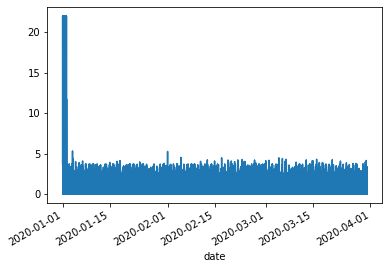

In [148]:
df.charge_grid.plot()#.charge_grid.plot()

In [111]:
overall_peak = df.charge_grid.groupby(by=df.index).sum().max()

In [112]:
overall_peak

110379.69999998857

In [106]:
increasing_df = pd.DataFrame(index=range(1, len(df["id"].unique())+1), columns=["peak_load"])
sub_index = []
for n, i in enumerate(df["id"].unique()):
    print(n)
    sub_index.append(i)
    sub_peak = df[~df.id.isin(sub_index)].charge_grid.groupby(level=0).sum().max()
    scaled_peak = sub_peak * fleet_size / (n+1)
    increasing_df.iloc[n] = scaled_peak

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


In [113]:
increasing_df["difference"] = overall_peak - increasing_df["peak_load"]

<AxesSubplot:>

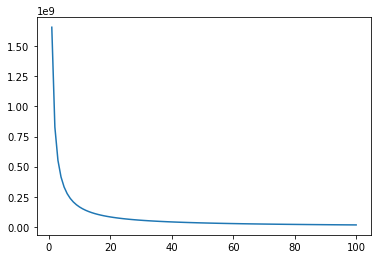

In [126]:
#increasing_df.peak_load.plot()
(-increasing_df.iloc[:100].difference*1.5).plot() #10k [kW] fleet -->*1,5 15mio [MW]

<AxesSubplot:xlabel='date'>

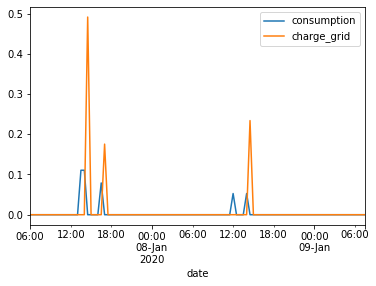

In [149]:
ts = GDB.db[grid_demand]['timeseries'][["consumption", "charge_grid"]]#.plot()
ts.charge_grid.head()

In [139]:
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [140]:
#ged_import = "/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/save/demand.csv"
#df = pd.read_csv(ged_import, index_col = 0)
df.index = pd.DatetimeIndex(df.index)

In [141]:
df_new = df.loc[df.index.date<pd.Timestamp(2020,1,8).date()]

In [ ]:
def start_and_end_week(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt["date"] = pd.to_datetime(dt["date"])
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    #dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df

In [ ]:
def data_curation(df, column_values='charge_grid'):
    ''' 
    Convert data frame with all profiles to days of the week and hours of the day
    id represents every profile
    step1 sum up all profiles
    step2 makes the average
    '''
    profiles_n = len(set(df['id'].values))
    step1 = df.groupby([df.index.day_name(),df.index.hour,df.index.isocalendar().week])[column_values].sum()
    step2 = step1/profiles_n
    step3 = pd.DataFrame(step2)
    step4 = step3.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    return step4.unstack().T 

def start_and_end_week_full(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df

def shares_plot(df, column_values='state', order=['driving','workplace','errands','escort','shopping','leisure','home']):
    '''
    Plot of category shares either locations ('states') or charging point names ('charging_point')
    '''
    sr_count = df.groupby([df.index.day_name(),df.index.hour,column_values])[column_values].count()
    df_count = pd.DataFrame(sr_count).rename(columns={column_values:'count'}).unstack(level=-1).fillna(0)
    df_count.columns = df_count.columns.droplevel()
    present = [exists for exists in order if exists in df_count.columns]
    df_count_sorted = df_count[present[::-1]].reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    df_new_index = (df_count_sorted.T/df_count_sorted.T.sum(axis=0)).T
    df_new_index.loc[:,'new_index'] = [d[:3] for d,h in df_new_index.index.values]
    #[[str(h) if h > 9 else '0'+str(h)][0] ]+ ',' + d[:3] for d,h in df_new_index.index.values]
    df_new_index.set_index('new_index',inplace=True)
    df_new_index.index.name = 'January'
    return df_new_index
    fig = df_new_index#.iplot(kind='area', fill=True,asFigure=True)
    fig['layout'] = {}
    return fig

def box_plot(df, name, column_values='charge_grid', factor=1, color='#14868c',legendname_position=2):
  '''
  Box plot of distance, consumption, or charge_grid. 
  column_values must exist in the df
  '''
  dt = data_curation(df,column_values=column_values)
  data = []
  # Every boxplot has given name. The legend takes the name, legendgroup allows all boxplot with the same identifier have the same color
  flag = legendname_position  # as we the first boxplot is used as xaxis tick we move the name to the next position
  flagcompare = 0
  for key, v in dt.iteritems():
      flagcompare += 1
      data.append({'boxpoints': False, # 'suspectedoutliers' or False
                        'line': {'width': 1.2},
                      'marker': {'color': color},
                        'name': f'''{str(key[1]).zfill(2)},{key[0][0:3]}''' if flag != flagcompare else name,
                  'orientation': 'v',
                        'type': 'box',
                            'y': v.values*factor,
                        'xaxis': 'x',
                      'jitter': 0.0,
                'whiskerwidth': 1.0,
                      'notched': False,
                  'notchwidth': 0.2,
                  'showlegend': False if flag != flagcompare else True,
                  'legendgroup': name
                  })
  return go.Figure(data)

In [ ]:
dt = start_and_end_week(df_new)
#figa = shares_plot(dt) 
#shares_plot(dt, column_values='charging_point', order=['none', 'public', 'fast150', 'fast75'])
#figb = box_plot(dt, 'Average vehicle [kWh]', column_values='charge_grid', factor=1, color='#14868c',legendname_position=2)
#fig = cf.subplots([shares_plot(dt),figb],shape=(2,1),shared_xaxes=False)

In [ ]:
df_charge = shares_plot(dt, column_values='charging_point', order=['none', 'public', 'fast150', 'fast75'])
ax = df_charge.plot.area(title="charging")
ax.legend(bbox_to_anchor=(1,1))

In [ ]:
df_ = shares_plot(dt) # with state as default
ax = df_.plot.area(title="consumption")
ax.legend(bbox_to_anchor=(1,1))

In [ ]:
# Final customization

fig['layout']['xaxis'].update({'showticklabels':True})
xaxisdct = {'automargin': False,
              'showgrid': False,
              'showline': True,
#               'zeroline':True,
              'tickmode':'array',
              'tickvals': ['00,Mon', '06,Mon', '12,Mon', '18,Mon',
                           '00,Tue', '06,Tue', '12,Tue', '18,Tue',
                           '00,Wed', '06,Wed', '12,Wed', '18,Wed',
                           '00,Thu', '06,Thu', '12,Thu', '18,Thu',
                           '00,Fri', '06,Fri', '12,Fri', '18,Fri',
                           '00,Sat', '06,Sat', '12,Sat', '18,Sat',
                           '00,Sun', '06,Sun', '12,Sun', '18,Sun','23,Sun'],
              'ticktext': ['00:00<br>', '06:00<br>', '12:00<br>Monday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Tuesday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Wednesday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Thursday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Friday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Saturday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Sunday', '18:00<br>','23:00<br>'],
               'ticklen': 2,
             'tickwidth': 2,
              'tickfont':{'family': 'Arial, sans-serif',
                            'size': 7,
                           'color': 'black'},
             'linewidth': 2,
#          'zerolinecolor': '#969696',
#          'zerolinewidth': 2,
        'showticklabels':True,
                "ticks":"outside",
                'ticklen': 2,
                'tickwidth': 2,
            'linecolor': 'black',
           }
fig['layout']['xaxis'].update(xaxisdct)
fig['layout']['xaxis'].update({'showticklabels':True})


iplot(fig,show_link=False)

In [ ]:
fig['layout']['xaxis'].update(xaxisdct)

fig['layout']['yaxis'].update({'title': 'Share',
                           'titlefont': {'size':12},
                            'showgrid': False,'showline':True,'rangemode':"tozero", 'zeroline' : True,
                              'domain': [0.6, 1.0],'tickformat' : ',.0%',
                            'tickfont': {'family': 'Arial, sans-serif',
                                           'size': 12,
                                          'color': 'black'},
                           'linewidth':2,
                            "ticks":"outside",
                            'ticklen': 2,
                            'tickwidth': 2,
                               'linecolor': 'black',
                              })
fig['layout']['yaxis'].update({'title': 'Grid electricity demand (kWh)',
                            'titlefont': {'size':12},
                             'showgrid': True,'showline':True,'rangemode':"tozero",
                               'domain': [0.0, 0.5],
                             'tickfont': {'family': 'Arial, sans-serif',
                                            'size': 12,
                                           'color': 'black'},
                            'linewidth':2,
                                'range': [0,35],
                                'dtick': 5,
                            "ticks":"outside",
                            'ticklen': 2,
                            'tickwidth': 2,
                            'linecolor': 'black',
                               })

fig['layout'].update({'paper_bgcolor': 'white',
                       'plot_bgcolor': 'white',
                             'margin': dict(l=70, r=15, t=20, b=50, pad=0),
                              'width': 1000,
                             'height': 700,
                         'showlegend': True,
                             'legend': {'orientation': 'h','x': 0.15, 'y': 1.04,
                                        'font': dict(family= 'Arial, sans-serif',
                                                       size= 12,
                                                      color= 'black')}
                     })

In [ ]:
from emobpy.plot import NBplot

DB = DataBase(os.path.join(used_profile, "0"))
DB.update()
DB.loadfiles()
PLT = NBplot(DB)

m = DB.db[
    list(DB.db.keys())[0]
]

In [ ]:
fig_availability = PLT.sgplot_ga(ga["name"], rng=None, to_html=False, path=None)
fig_availability

In [ ]:
fig_consumption = PLT.sankey(c["name"], include=None, to_html=False, path=None)
fig_consumption

In [ ]:
fig_mobility = NBplot(DB).sgplot_dp(m["name"])
fig_mobility